# EDA

In [148]:
from mmpose.apis import Pose2DInferencer, init_model
import cv2

import pandas as pd
from tqdm import tqdm
import gc
from operator import add
import torch
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

In [127]:
cv2.__version__

'4.8.0'

In [126]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='cspnext-m_udp_8xb64-210e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
09/23 16:24:36 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
09/23 16:24:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth
09/23 16:24:37 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" i

In [127]:
#inferencer = Pose2DInferencer('wholebody', device='cuda')

In [ ]:
result_generator = inferencer('webcam',
                              show=True,
                              return_vis=True,
                              return_datasample=False)
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [129]:
result_generator = inferencer('demo.jpg',
                              show=True,
                              return_vis=True,
                              return_datasample=False,
                              wait_time=5)
result = next(result_generator)
cv2.destroyAllWindows()

Output()

In [130]:
result['visualization'][0]

array([[[  0,  34,  59],
        [  0,  34,  59],
        [  1,  35,  60],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  1,  35,  60],
        [  1,  35,  60],
        [  2,  36,  61],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  3,  37,  62],
        [  3,  37,  62],
        [  3,  37,  62],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       ...,

       [[ 95,  74,  69],
        [ 94,  74,  67],
        [ 92,  71,  66],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[103,  84,  80],
        [ 99,  80,  74],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[102,  84,  80],
        [ 98,  80,  76],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]]

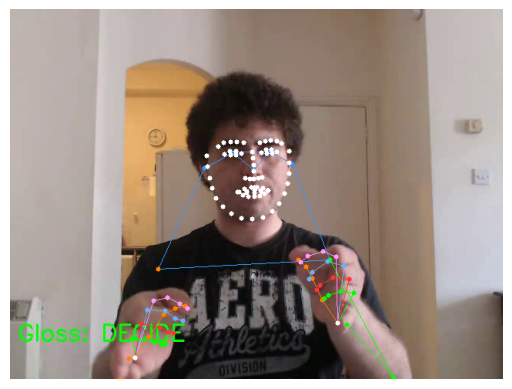

In [158]:
# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]

# Display the image using Matplotlib
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

In [160]:
# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]
bgr_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
cv2.imshow('Color Image', bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture(
    "file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4"
)
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("CspNext Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [162]:
result['predictions'][0][0]['keypoints']

[[340.38791996268355, 222.4053898186179],
 [367.9717395846618, 201.74877665983138],
 [314.29409792605895, 197.83224132301893],
 [399.63694350597666, 227.4101850508365],
 [279.3311621985358, 223.0197965496401],
 [474.87049896833537, 378.6657875215724],
 [231.67318077169068, 398.22609886440205],
 [556.8505731649063, 496.30236118303105],
 [204.41374956014812, 510.6369445310529],
 [521.2265827371541, 505.3291569389846],
 [196.18577043925126, 349.29093229482396],
 [425.39426517009633, 511.6356230328629],
 [280.8888138152729, 533.0186496718328],
 [527.7471925134205, 466.64523854591175],
 [236.0012891069996, 403.52920533853785],
 [562.2059810177814, 495.45395856971913],
 [214.24382601994517, 516.7009127122084],
 [176.71385822528964, 92.63827917377449],
 [501.19950121988177, 396.1610456937592],
 [565.5639056051818, 496.6262785401343],
 [396.00005665064566, 211.96113554889791],
 [337.9926374282544, 200.17586102019732],
 [174.81036961771565, 334.9668714597615],
 [282.99279586885416, 201.94262295

In [163]:
np.array(result['predictions'][0][0]['keypoints']).shape

(133, 2)

In [66]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [67]:
def extract_keypoints_from_file_flip(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [ ]:
result_generator = inferencer(
    'webcam',
    show=True,
    return_vis=True,
    return_datasample=False,
)
results = [result for result in result_generator]
cv2.destroyAllWindows()

In [167]:
test = extract_keypoints_from_file(
    'file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4'
)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [168]:
test_flip = extract_keypoints_from_file_flip(
    'file://media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/0023159093449660606-CAFETERIA.mp4'
)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [169]:
test[0]

array([8.82143259e-01, 9.41623032e-01, 9.40438986e-01, 8.79736423e-01,
       9.21689272e-01, 8.11476707e-01, 7.92172372e-01, 6.15188539e-01,
       3.82438302e-01, 2.66277045e-02, 1.88575797e-02, 5.30553572e-02,
       2.40469128e-02, 6.66843876e-02, 2.75597367e-02, 5.61714321e-02,
       2.21673474e-02, 1.94816533e-02, 9.87884682e-03, 6.82943687e-03,
       1.56321421e-01, 9.98151973e-02, 7.35376263e-03, 9.33728397e-01,
       9.36857581e-01, 8.94915521e-01, 9.23893869e-01, 9.41972435e-01,
       9.18592870e-01, 9.16634500e-01, 9.29870844e-01, 9.11408365e-01,
       9.02467787e-01, 9.31336224e-01, 9.23449337e-01, 9.24252629e-01,
       9.28934157e-01, 9.42648172e-01, 9.09311473e-01, 9.29058373e-01,
       9.36838806e-01, 9.09767032e-01, 9.27101731e-01, 9.44119692e-01,
       9.51003611e-01, 9.49271142e-01, 9.41336811e-01, 9.52074766e-01,
       9.64701593e-01, 9.22409415e-01, 9.55051541e-01, 9.41290379e-01,
       9.34439540e-01, 9.05640423e-01, 8.94813776e-01, 9.27967310e-01,
      

In [170]:
test_flip[0]

array([9.10401702e-01, 9.41074371e-01, 9.37654614e-01, 9.11512673e-01,
       8.52180064e-01, 7.82650411e-01, 7.74133742e-01, 4.22125429e-01,
       6.82153761e-01, 1.94119886e-02, 4.36527766e-02, 2.99756639e-02,
       6.62090108e-02, 5.59023693e-02, 2.70892307e-02, 5.89044765e-03,
       2.83485893e-02, 6.65203575e-03, 9.55008063e-03, 6.03237795e-03,
       1.43058687e-01, 9.83899608e-02, 1.63073018e-02, 8.98539901e-01,
       9.20610964e-01, 9.29115057e-01, 9.07180846e-01, 9.37883794e-01,
       9.40055132e-01, 9.38108027e-01, 9.40509140e-01, 9.30656433e-01,
       9.24283028e-01, 9.16485667e-01, 9.26136971e-01, 9.33869302e-01,
       9.35117781e-01, 9.50266004e-01, 9.47352469e-01, 9.70290244e-01,
       9.47416961e-01, 9.53197122e-01, 9.64527249e-01, 9.64046061e-01,
       9.51641679e-01, 9.35116827e-01, 9.31082845e-01, 9.37773049e-01,
       9.41599369e-01, 9.55074012e-01, 9.43852663e-01, 9.45170641e-01,
       9.52481627e-01, 9.42688704e-01, 9.39154148e-01, 9.59055841e-01,
      

In [171]:
test.shape

(55, 399)

In [68]:
def signvideodataframe(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Define the path to the videos directory
    #path = 'file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/'
    path = 'file:///home/kristian/ASL_Citizen/videos/'
    # Create a 'Path' column by concatenating the path with 'Video file' column
    df['Path'] = path + df['Video file']

    # Calculate the frequency of each gloss and create a 'frequency' column
    df['Frequency'] = df['Gloss'].map(df['Gloss'].value_counts())

    # Sort the DataFrame by the 'Gloss' column
    df = df.sort_values(by='Gloss')

    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    return df

In [69]:
#traindf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/train.csv')
traindf = signvideodataframe(
    'file:///home/kristian/ASL_Citizen/splits/train.csv')

In [70]:
traindf.head()

Participant ID                      Video file    Gloss ASL-LEX Code  \
0            P31   3827306090663467-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P37  16792698524451422-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P11   6868778695018762-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P11   6870709051348651-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P50   0719792557216079-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/38273...         15  
1  file:///home/kristian/ASL_Citizen/videos/16792...         15  
2  file:///home/kristian/ASL_Citizen/videos/68687...         15  
3  file:///home/kristian/ASL_Citizen/videos/68707...         15  
4  file:///home/kristian/ASL_Citizen/videos/07197...         15

In [132]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
40149            P37   9716493262876276-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40150            P31   7550572181460327-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40151            P46  47985881750082227-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40152            P50  04671245574824856-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
40153            P51  19959052532136146-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
40149  file:///home/kristian/ASL_Citizen/videos/97164...         15  
40150  file:///home/kristian/ASL_Citizen/videos/75505...         15  
40151  file:///home/kristian/ASL_Citizen/videos/47985...         15  
40152  file:///home/kristian/ASL_Citizen/videos/04671...         15  
40153  file:///home/kristian/ASL_Citizen/videos/19959...         15

In [71]:
traindf['Path'][100]

'file:///home/kristian/ASL_Citizen/videos/44951093832888867-seedABOUT.mp4'

In [134]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture(traindf['Path'][100])
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("CspNext Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

[ERROR:0@188.779] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




In [135]:
traindf.sample(20)

Participant ID                           Video file         Gloss  \
21755            P52       39017907015121867-seedMESS.mp4          MESS   
37395            P31        4148502782625585-UNIVERSE.mp4      UNIVERSE   
22536             P4            0909056403412476-MOVE.mp4          MOVE   
22149            P50          24781695300999185-MIX 3.mp4          MIX2   
23756            P37          5180931702231095-OFFEND.mp4        OFFEND   
15977            P33       9526781160149522-HAMBURGER.mp4     HAMBURGER   
30551            P45       5529327143293021-SHARPEN 1.mp4      SHARPEN1   
9483             P40           9553318754297411-DIP 3.mp4          DIP3   
26161            P32           1596543216308992-PLANT.mp4         PLANT   
33442            P23   4059043146141006-STETHOSCOPE 4.mp4  STETHOSCOPE3   
4024             P38         12301657845922032-BRAIDS.mp4        BRAIDS   
5046             P16           629918688259232-CANCEL.mp4       CANCEL1   
32359            P29    2404786212034853-SOMERSAULT 2.mp4   SOMERSAULT1   
7971             P36       7835139700219875-CRACKER 2.mp4      CRACKER2   
274              P40          8384344275744424-ACTION.mp4        ACTION   
35139            P40      3274515703834051-TEAR RIP_2.mp4      TEARRIP2   
22398            P52  019021288975465955-seedMOSQUITO.mp4      MOSQUITO   
7681             P34            8153384297148962-COPY.mp4          COPY   
20698            P20       7764622739129698-LONG WORD.mp4      LONGWORD   
10857             P7        06467313990217516-EARS UP.mp4        EARSUP   

      ASL-LEX Code                                               Path  \
21755     J_03_008  file:///home/kristian/ASL_Citizen/videos/39017...   
37395     K_01_127  file:///home/kristian/ASL_Citizen/videos/41485...   
22536     D_03_090  file:///home/kristian/ASL_Citizen/videos/09090...   
22149     K_03_118  file:///home/kristian/ASL_Citizen/videos/24781...   
23756     D_03_039  file:///home/kristian/ASL_Citizen/videos/51809...   
15977     A_01_004  file:///home/kristian/ASL_Citizen/videos/95267...   
30551     H_03_060  file:///home/kristian/ASL_Citizen/videos/55293...   
9483      K_02_052  file:///home/kristian/ASL_Citizen/videos/95533...   
26161     E_01_029  file:///home/kristian/ASL_Citizen/videos/15965...   
33442     K_02_031  file:///home/kristian/ASL_Citizen/videos/40590...   
4024      K_03_125  file:///home/kristian/ASL_Citizen/videos/12301...   
5046      F_03_083  file:///home/kristian/ASL_Citizen/videos/62991...   
32359     K_02_118  file:///home/kristian/ASL_Citizen/videos/24047...   
7971      K_03_093  file:///home/kristian/ASL_Citizen/videos/78351...   
274       C_01_026  file:///home/kristian/ASL_Citizen/videos/83843...   
35139     K_03_050  file:///home/kristian/ASL_Citizen/videos/32745...   
22398     H_03_053  file:///home/kristian/ASL_Citizen/videos/01902...   
7681      D_01_064  file:///home/kristian/ASL_Citizen/videos/81533...   
20698     H_02_047  file:///home/kristian/ASL_Citizen/videos/77646...   
10857     E_02_099  file:///home/kristian/ASL_Citizen/videos/06467...   

       Frequency  
21755         16  
37395         13  
22536         15  
22149         15  
23756         17  
15977         13  
30551         16  
9483          15  
26161         16  
33442         13  
4024          16  
5046          15  
32359         16  
7971          16  
274           14  
35139         15  
22398         16  
7681          17  
20698         14  
10857         14

In [72]:
traindf = traindf[traindf['Frequency'] > 17]
traindf = traindf.reset_index(drop=True)

In [137]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4  AXE1     G_03_066   
1            P28       7179300005186042-AXE.mp4  AXE1     G_03_066   
2            P29      16216064841959765-AXE.mp4  AXE1     G_03_066   
3            P37       6193814382865199-AXE.mp4  AXE1     G_03_066   
4            P40       5947453960317015-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/07157...         19  
1  file:///home/kristian/ASL_Citizen/videos/71793...         19  
2  file:///home/kristian/ASL_Citizen/videos/16216...         19  
3  file:///home/kristian/ASL_Citizen/videos/61938...         19  
4  file:///home/kristian/ASL_Citizen/videos/59474...         19

In [138]:
traindf.tail()

Participant ID                      Video file     Gloss ASL-LEX Code  \
945            P50   9161417844146778-WHAT FOR.mp4  WHATFOR1     C_02_054   
946            P14  00930662603221255-WHAT FOR.mp4  WHATFOR1     C_02_054   
947            P27     82063651021682-WHAT FOR.mp4  WHATFOR1     C_02_054   
948            P40   5268072837528903-WHAT FOR.mp4  WHATFOR1     C_02_054   
949            P40   6363286086951516-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
945  file:///home/kristian/ASL_Citizen/videos/91614...         20  
946  file:///home/kristian/ASL_Citizen/videos/00930...         20  
947  file:///home/kristian/ASL_Citizen/videos/82063...         20  
948  file:///home/kristian/ASL_Citizen/videos/52680...         20  
949  file:///home/kristian/ASL_Citizen/videos/63632...         20

In [139]:
traindf.describe()

Frequency
count  950.000000
mean    19.082105
std      1.316026
min     18.000000
25%     18.000000
50%     19.000000
75%     20.000000
max     24.000000

In [73]:
traindf['Gloss'].nunique()

50

In [74]:
words = traindf['Gloss'].unique()
words

array(['AXE1', 'BACKPACK1', 'BASKETBALL1', 'BEE1', 'BELT1', 'BITE1',
       'BREAKFAST1', 'CANCER1', 'CHRISTMAS1', 'CONFUSED1', 'DARK1',
       'DEAF1', 'DECIDE1', 'DEMAND1', 'DEVELOP1', 'DINNER1', 'DOG1',
       'DOWNSIZE1', 'DRAG1', 'EAT1', 'EDIT1', 'ELEVATOR1', 'FINE1',
       'FLOAT1', 'FOREIGNER1', 'GUESS1', 'HALLOWEEN1', 'HOSPITAL1',
       'HURDLE/TRIP1', 'JEWELRY', 'KNIGHT1', 'LOCK1', 'LUNCH1', 'MAPLE',
       'MEAT1', 'MECHANIC1', 'MICROSCOPE1', 'MOVIE1', 'NOON1', 'PARTY1',
       'PATIENT2', 'RAZOR2', 'RIVER1', 'ROCKINGCHAIR1', 'SHAVE1', 'SINK',
       'SQUEEZE', 'THEY1', 'TWINS1', 'WHATFOR1'], dtype=object)

In [75]:
#valdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/val.csv')
valdf = signvideodataframe('file:///home/kristian/ASL_Citizen/splits/val.csv')

In [76]:
valdf.head()

Participant ID                      Video file     Gloss ASL-LEX Code  \
0            P26  22595012150860327-1 DOLLAR.mp4   1DOLLAR     C_02_025   
1            P39   7421622940519235-1 DOLLAR.mp4   1DOLLAR     C_02_025   
2            P21    686738356933241-1 DOLLAR.mp4   1DOLLAR     C_02_025   
3            P12  9219095671540121-5 DOLLARS.mp4  5DOLLARS     B_01_062   
4            P21  1448188216215387-5 DOLLARS.mp4  5DOLLARS     B_01_062   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/22595...          3  
1  file:///home/kristian/ASL_Citizen/videos/74216...          3  
2  file:///home/kristian/ASL_Citizen/videos/68673...          3  
3  file:///home/kristian/ASL_Citizen/videos/92190...          4  
4  file:///home/kristian/ASL_Citizen/videos/14481...          4

In [144]:
valdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
10299            P21    6959326205750493-ZOOM IN.mp4   ZOOMIN     B_02_056   
10300            P12   7758716133684984-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10301            P39    844134294032034-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10302            P21   5548062993721732-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
10303            P26  19366754134806952-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
10299  file:///home/kristian/ASL_Citizen/videos/69593...          3  
10300  file:///home/kristian/ASL_Citizen/videos/77587...          4  
10301  file:///home/kristian/ASL_Citizen/videos/84413...          4  
10302  file:///home/kristian/ASL_Citizen/videos/55480...          4  
10303  file:///home/kristian/ASL_Citizen/videos/19366...          4

In [77]:
#testdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/test.csv')
testdf = signvideodataframe(
    'file:///home/kristian/ASL_Citizen/splits/test.csv')

In [146]:
testdf.head()

Participant ID                       Video file    Gloss ASL-LEX Code  \
0            P18   23521769221811684-1 DOLLAR.mp4  1DOLLAR     C_02_025   
1            P42  023931338852502426-1 DOLLAR.mp4  1DOLLAR     C_02_025   
2            P49    4893817008748198-1 DOLLAR.mp4  1DOLLAR     C_02_025   
3            P17   13991818149960333-1 DOLLAR.mp4  1DOLLAR     C_02_025   
4            P49   34625615110480457-1 DOLLAR.mp4  1DOLLAR     C_02_025   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/23521...         13  
1  file:///home/kristian/ASL_Citizen/videos/02393...         13  
2  file:///home/kristian/ASL_Citizen/videos/48938...         13  
3  file:///home/kristian/ASL_Citizen/videos/13991...         13  
4  file:///home/kristian/ASL_Citizen/videos/34625...         13

In [147]:
testdf.tail()

Participant ID                     Video file    Gloss ASL-LEX Code  \
32936            P18  4320702510886756-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32937             P9  7676354653247301-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32938            P47  5386272465310649-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32939            P18   738440364224181-ZOOM OFF.mp4  ZOOMOFF     D_01_057   
32940            P17  9953298353288469-ZOOM OFF.mp4  ZOOMOFF     D_01_057   

                                                    Path  Frequency  
32936  file:///home/kristian/ASL_Citizen/videos/43207...         13  
32937  file:///home/kristian/ASL_Citizen/videos/76763...         13  
32938  file:///home/kristian/ASL_Citizen/videos/53862...         13  
32939  file:///home/kristian/ASL_Citizen/videos/73844...         13  
32940  file:///home/kristian/ASL_Citizen/videos/99532...         13

In [78]:
valdf = valdf[valdf['Gloss'].isin(words)]
valdf = valdf.reset_index(drop=True)

In [149]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [150]:
valdf.tail()

Participant ID                       Video file     Gloss ASL-LEX Code  \
186            P26  032677896012150764-WHAT FOR.mp4  WHATFOR1     C_02_054   
187             P5    6523145816470133-WHAT FOR.mp4  WHATFOR1     C_02_054   
188            P39    0283886564670357-WHAT FOR.mp4  WHATFOR1     C_02_054   
189            P21    6142521746642153-WHAT FOR.mp4  WHATFOR1     C_02_054   
190            P12   06408604416165864-WHAT FOR.mp4  WHATFOR1     C_02_054   

                                                  Path  Frequency  
186  file:///home/kristian/ASL_Citizen/videos/03267...          5  
187  file:///home/kristian/ASL_Citizen/videos/65231...          5  
188  file:///home/kristian/ASL_Citizen/videos/02838...          5  
189  file:///home/kristian/ASL_Citizen/videos/61425...          5  
190  file:///home/kristian/ASL_Citizen/videos/06408...          5

In [79]:
valdf['Gloss'].nunique()

50

In [152]:
valdf.describe()

Frequency
count  191.000000
mean     3.963351
std      0.770316
min      3.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      6.000000

In [153]:
valdf.head()

Participant ID                     Video file      Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE1     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE1     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE1     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE1     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK1     G_03_091   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/19778...          4  
1  file:///home/kristian/ASL_Citizen/videos/85811...          4  
2  file:///home/kristian/ASL_Citizen/videos/38774...          4  
3  file:///home/kristian/ASL_Citizen/videos/85214...          4  
4  file:///home/kristian/ASL_Citizen/videos/99902...          3

In [80]:
testdf = testdf[testdf['Gloss'].isin(words)]
testdf = testdf.reset_index(drop=True)

In [155]:
testdf['Gloss'].nunique()

50

In [81]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4  AXE1     G_03_066   
1            P47    519067006979435-AXE.mp4  AXE1     G_03_066   
2            P35   5104381603195376-AXE.mp4  AXE1     G_03_066   
3            P42  44458614013793873-AXE.mp4  AXE1     G_03_066   
4            P42   9604797909481075-AXE.mp4  AXE1     G_03_066   

                                                Path  Frequency  
0  file:///home/kristian/ASL_Citizen/videos/33721...         15  
1  file:///home/kristian/ASL_Citizen/videos/51906...         15  
2  file:///home/kristian/ASL_Citizen/videos/51043...         15  
3  file:///home/kristian/ASL_Citizen/videos/44458...         15  
4  file:///home/kristian/ASL_Citizen/videos/96047...         15

In [ ]:
testdf.tail()

In [157]:
testdf.describe()

Frequency
count  729.000000
mean    14.978052
std      2.229192
min      9.000000
25%     14.000000
50%     15.000000
75%     16.000000
max     20.000000

In [82]:
traindf['Gloss'] = traindf['Gloss'].str.replace('\d+', '', regex=True)
valdf['Gloss'] = valdf['Gloss'].str.replace('\d+', '', regex=True)
testdf['Gloss'] = testdf['Gloss'].str.replace('\d+', '', regex=True)

In [83]:
words = traindf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [84]:
words = valdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [85]:
words = testdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [86]:
print(traindf['Gloss'].nunique())
print(valdf['Gloss'].nunique())
print(testdf['Gloss'].nunique())

50
50
50


In [172]:
extract_keypoints_from_file(traindf['Path'][0]).shape

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(100, 399)

In [173]:
type(extract_keypoints_from_file(traindf.Path[0]))

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

numpy.ndarray

In [174]:
cap = cv2.VideoCapture(traindf.Path[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

100


In [175]:
cap = cv2.VideoCapture(traindf.Path[0])
frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = round(frames / fps)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(frames)
print(fps)
print(length)
print(width)
print(height)

100
31
3
640
480


In [176]:
traindf.count()

Participant ID    950
Video file        950
Gloss             950
ASL-LEX Code      950
Path              950
Frequency         950
dtype: int64

In [87]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = round(frames / fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return frames, fps, length, width, height

In [167]:
frames_from_file(traindf.Path[643])

(83, 29, 3, 640, 480)

In [168]:
tqdm.pandas()
traindf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = traindf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 950/950 [00:45<00:00, 20.96it/s]


In [169]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         19     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         19      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         19      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         19      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         19      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [170]:
traindf['Frames'].max()

540

In [171]:
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  950.000000  950.000000  950.000000  950.000000  950.000000  950.000000
mean    19.082105   87.755789   29.354737    3.016842  641.347368  480.252632
std      1.316026   46.654745    2.197195    1.568167   20.731496    3.887155
min     18.000000   25.000000   11.000000    1.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   77.000000   30.000000    3.000000  640.000000  480.000000
75%     20.000000   97.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  540.000000   31.000000   18.000000  960.000000  540.000000

In [172]:
traindf = traindf[(traindf['Length'] > 1) & (traindf['FPS'] > 28) &
                  (traindf['Frames'] < 131)]
traindf = traindf.reset_index(drop=True)
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    19.084577   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.305343   20.091965    0.479790    0.671427   22.528858    4.224161
min     18.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     18.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     19.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     20.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     24.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [173]:
traindf['Frequency'] = traindf['Gloss'].map(traindf['Gloss'].value_counts())
traindf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000
mean    16.261194   76.113184   29.680348    2.593284  641.592040  480.298507
std      1.722009   20.091965    0.479790    0.671427   22.528858    4.224161
min     13.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     15.000000   60.000000   29.000000    2.000000  640.000000  480.000000
50%     16.000000   74.000000   30.000000    2.000000  640.000000  480.000000
75%     17.000000   88.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [174]:
traindf.head(10)

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   
5            P40        929570016067665-AXE.mp4   AXE     G_03_066   
6            P16        904767261814883-AXE.mp4   AXE     G_03_066   
7            P43     016134052760367945-AXE.mp4   AXE     G_03_066   
8            P40      23099527328070546-AXE.mp4   AXE     G_03_066   
9            P37      21310388087265242-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   
5  file:///home/kristian/ASL_Citizen/videos/92957...         18     112   29   
6  file:///home/kristian/ASL_Citizen/videos/90476...         18      64   30   
7  file:///home/kristian/ASL_Citizen/videos/01613...         18      75   30   
8  file:///home/kristian/ASL_Citizen/videos/23099...         18      91   29   
9  file:///home/kristian/ASL_Citizen/videos/21310...         18      69   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       2    640     480  
8       3    640     480  
9       2    640     480

In [175]:
print(traindf['Gloss'].nunique())

50


In [176]:
tqdm.pandas()
valdf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = valdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 191/191 [00:07<00:00, 25.30it/s]


In [177]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480

In [178]:
valdf['Frames'].max()

207

In [179]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  191.000000  191.000000  191.000000  191.000000  191.0   191.0
mean     3.963351   88.905759   29.706806    3.000000  640.0   480.0
std      0.770316   36.214006    0.456423    1.248157    0.0     0.0
min      3.000000   37.000000   29.000000    1.000000  640.0   480.0
25%      3.000000   61.500000   29.000000    2.000000  640.0   480.0
50%      4.000000   76.000000   30.000000    3.000000  640.0   480.0
75%      4.000000  117.500000   30.000000    4.000000  640.0   480.0
max      6.000000  207.000000   30.000000    7.000000  640.0   480.0

In [180]:
valdf = valdf[(valdf['Length'] > 1) & (valdf['FPS'] > 28) &
              (valdf['Frames'] < 131)]
valdf = valdf.reset_index(drop=True)
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.993827   78.203704   29.691358    2.623457  640.0   480.0
std      0.760001   23.787397    0.463365    0.772311    0.0     0.0
min      3.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      6.000000  130.000000   30.000000    4.000000  640.0   480.0

In [181]:
valdf['Frequency'] = valdf['Gloss'].map(valdf['Gloss'].value_counts())
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [182]:
valdf.tail(60)

Participant ID                          Video file         Gloss  \
102            P12          2553847483769758-LUNCH.mp4         LUNCH   
103            P12          5796656512680336-LUNCH.mp4         LUNCH   
104             P5          5530107164077924-LUNCH.mp4         LUNCH   
105            P21         07736207797943306-LUNCH.mp4         LUNCH   
106            P26          2560023931191153-MAPLE.mp4         MAPLE   
107            P21          7629092396207264-MAPLE.mp4         MAPLE   
108            P39           6940052288653344-MEAT.mp4          MEAT   
109            P21          23447000304598498-MEAT.mp4          MEAT   
110            P26          46170617189439445-MEAT.mp4          MEAT   
111            P26        424117143455232-MECHANIC.mp4      MECHANIC   
112            P21       7355641552290353-MECHANIC.mp4      MECHANIC   
113            P26     1550944296003025-MICROSCOPE.mp4    MICROSCOPE   
114            P21     9187403001004872-MICROSCOPE.mp4    MICROSCOPE   
115            P39     5547731542068628-MICROSCOPE.mp4    MICROSCOPE   
116             P5    10557248501909733-MICROSCOPE.mp4    MICROSCOPE   
117            P26          2838376949179944-MOVIE.mp4         MOVIE   
118            P12         39474504957896217-MOVIE.mp4         MOVIE   
119            P21           671764401941833-MOVIE.mp4         MOVIE   
120            P39          5535338426456671-MOVIE.mp4         MOVIE   
121            P12          15347326711184706-NOON.mp4          NOON   
122            P26          22732217637347518-NOON.mp4          NOON   
123            P21           7713607971692202-NOON.mp4          NOON   
124            P39            717958009426233-NOON.mp4          NOON   
125            P12           878457250310533-PARTY.mp4         PARTY   
126            P26         29398177566155903-PARTY.mp4         PARTY   
127            P21        006918970578539518-PARTY.mp4         PARTY   
128            P39          6496108914533325-PARTY.mp4         PARTY   
129            P26     08197479357139326-PATIENT 2.mp4       PATIENT   
130            P12     06585822033156608-PATIENT 2.mp4       PATIENT   
131            P21      9858541230690814-PATIENT 2.mp4       PATIENT   
132            P26       28202328150486666-RAZOR 2.mp4         RAZOR   
133            P21        2710513815020268-RAZOR 2.mp4         RAZOR   
134            P21          5962378845845178-RIVER.mp4         RIVER   
135            P12          3054167723169219-RIVER.mp4         RIVER   
136            P26         05621288177415629-RIVER.mp4         RIVER   
137            P26  9826258167906428-ROCKING CHAIR.mp4  ROCKINGCHAIR   
138            P21  6414524542629407-ROCKING CHAIR.mp4  ROCKINGCHAIR   
139            P12  6050297960065525-ROCKING CHAIR.mp4  ROCKINGCHAIR   
140            P39  8563899734807414-ROCKING CHAIR.mp4  ROCKINGCHAIR   
141            P26          6416983573445294-SHAVE.mp4         SHAVE   
142            P39          3159241677201454-SHAVE.mp4         SHAVE   
143            P21        021193533049441937-SHAVE.mp4         SHAVE   
144            P12          3423044704100937-SHAVE.mp4         SHAVE   
145            P12          6961575623504714-SHAVE.mp4         SHAVE   
146            P12          36176458889227514-SINK.mp4          SINK   
147            P21           6376722418151588-SINK.mp4          SINK   
148            P26           9377718462347715-SINK.mp4          SINK   
149            P26       17092802473126545-SQUEEZE.mp4       SQUEEZE   
150            P21       03951129691638511-SQUEEZE.mp4       SQUEEZE   
151            P26           2151941336300882-THEY.mp4          THEY   
152            P21           9598803772091737-THEY.mp4          THEY   
153            P39         30415256515089983-TWINS.mp4         TWINS   
154            P26          9969703511848236-TWINS.mp4         TWINS   
155             P5          7359133874002342-TWINS.mp4         TWINS   
156            P21          9942639780287319

In [183]:
valdf.head(10)

Participant ID                       Video file       Gloss ASL-LEX Code  \
0            P39        19778675091674147-AXE.mp4         AXE     G_03_066   
1            P26         8581142177964065-AXE.mp4         AXE     G_03_066   
2            P39         3877478645046861-AXE.mp4         AXE     G_03_066   
3            P21         8521417940364975-AXE.mp4         AXE     G_03_066   
4             P5    9990244640190733-BACKPACK.mp4    BACKPACK     G_03_091   
5            P39    4985293038019454-BACKPACK.mp4    BACKPACK     G_03_091   
6            P21      20198961584817-BACKPACK.mp4    BACKPACK     G_03_091   
7             P5  8423017864044668-BASKETBALL.mp4  BASKETBALL     A_03_045   
8            P39  6251993314243527-BASKETBALL.mp4  BASKETBALL     A_03_045   
9            P26  6152714959604932-BASKETBALL.mp4  BASKETBALL     A_03_045   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   
5  file:///home/kristian/ASL_Citizen/videos/49852...          3     128   30   
6  file:///home/kristian/ASL_Citizen/videos/20198...          3      48   30   
7  file:///home/kristian/ASL_Citizen/videos/84230...          5      90   30   
8  file:///home/kristian/ASL_Citizen/videos/62519...          5     127   30   
9  file:///home/kristian/ASL_Citizen/videos/61527...          5      60   30   

   Length  Width  Height  
0       4    640     480  
1       3    640     480  
2       4    640     480  
3       2    640     480  
4       3    640     480  
5       4    640     480  
6       2    640     480  
7       3    640     480  
8       4    640     480  
9       2    640     480

In [184]:
valdf.describe()

Frequency      Frames         FPS      Length  Width  Height
count  162.000000  162.000000  162.000000  162.000000  162.0   162.0
mean     3.506173   78.203704   29.691358    2.623457  640.0   480.0
std      0.907162   23.787397    0.463365    0.772311    0.0     0.0
min      2.000000   45.000000   29.000000    2.000000  640.0   480.0
25%      3.000000   59.250000   29.000000    2.000000  640.0   480.0
50%      4.000000   71.500000   30.000000    2.000000  640.0   480.0
75%      4.000000   92.000000   30.000000    3.000000  640.0   480.0
max      5.000000  130.000000   30.000000    4.000000  640.0   480.0

In [185]:
print(valdf['Gloss'].nunique())

50


In [186]:
tqdm.pandas()
testdf[[
    'Frames', 'FPS', 'Length', 'Width', 'Height'
]] = testdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 729/729 [00:31<00:00, 23.20it/s]


In [187]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P15  33721516025652254-AXE.mp4   AXE     G_03_066   
1            P47    519067006979435-AXE.mp4   AXE     G_03_066   
2            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
3            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
4            P42   9604797909481075-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/33721...         15     196   29   
1  file:///home/kristian/ASL_Citizen/videos/51906...         15     102   26   
2  file:///home/kristian/ASL_Citizen/videos/51043...         15      70   29   
3  file:///home/kristian/ASL_Citizen/videos/44458...         15      57   30   
4  file:///home/kristian/ASL_Citizen/videos/96047...         15      66   30   

   Length  Width  Height  
0       7    640     480  
1       4    640     480  
2       2    640     480  
3       2    960     540  
4       2    960     540

In [188]:
testdf['Frames'].max()

234

In [189]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000
mean    14.978052   75.192044   28.696845    2.624143  684.334705  488.312757
std      2.229192   27.848864    3.113689    1.003439  110.626974   20.742558
min      9.000000   10.000000   14.000000    0.000000  640.000000  480.000000
25%     14.000000   56.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   73.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   90.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  234.000000   31.000000    8.000000  960.000000  540.000000

In [190]:
testdf = testdf[(testdf['Length'] > 1) & (testdf['FPS'] > 28) &
                (testdf['Frames'] < 131)]
testdf = testdf.reset_index(drop=True)
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    15.014981   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.217904   19.420007    0.526337    0.670792  114.896647   21.543121
min      9.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     14.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     15.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     16.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     20.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [191]:
testdf['Frequency'] = testdf['Gloss'].map(testdf['Gloss'].value_counts())

testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [192]:
testdf.tail(60)

Participant ID                      Video file    Gloss ASL-LEX Code  \
474             P9      5911137084980156-SHAVE.mp4    SHAVE     J_02_018   
475            P35      5887689273566759-SHAVE.mp4    SHAVE     J_02_018   
476            P48      6621939724418062-SHAVE.mp4    SHAVE     J_02_018   
477            P17     09709454810039175-SHAVE.mp4    SHAVE     J_02_018   
478            P42      3588759801071051-SHAVE.mp4    SHAVE     J_02_018   
479            P35      4608324102845509-SHAVE.mp4    SHAVE     J_02_018   
480             P6     37779347947817365-SHAVE.mp4    SHAVE     J_02_018   
481            P35      5403299092715226-SHAVE.mp4    SHAVE     J_02_018   
482            P47      4814760954431352-SHAVE.mp4    SHAVE     J_02_018   
483            P22      4185420608277408-SHAVE.mp4    SHAVE     J_02_018   
484            P42     45913985094539034-SHAVE.mp4    SHAVE     J_02_018   
485            P48      9572472020825835-SHAVE.mp4    SHAVE     J_02_018   
486            P48       8837115118398433-SINK.mp4     SINK     E_02_042   
487             P9       8342342809172125-SINK.mp4     SINK     E_02_042   
488            P35       5780399875754547-SINK.mp4     SINK     E_02_042   
489             P6      30542066641425136-SINK.mp4     SINK     E_02_042   
490            P47      10941417100216433-SINK.mp4     SINK     E_02_042   
491            P49       9462586175856116-SINK.mp4     SINK     E_02_042   
492            P17         65783462643741-SINK.mp4     SINK     E_02_042   
493            P22       8675465806927196-SINK.mp4     SINK     E_02_042   
494            P42     013933028993222907-SINK.mp4     SINK     E_02_042   
495            P42    1507074049477588-SQUEEZE.mp4  SQUEEZE     H_03_019   
496            P35   47046133854683725-SQUEEZE.mp4  SQUEEZE     H_03_019   
497            P48    5650251393797099-SQUEEZE.mp4  SQUEEZE     H_03_019   
498             P9    1630741460505114-SQUEEZE.mp4  SQUEEZE     H_03_019   
499            P49    6110727438268888-SQUEEZE.mp4  SQUEEZE     H_03_019   
500            P35       4877518027558987-THEY.mp4     THEY     F_02_103   
501            P47      27954487382286475-THEY.mp4     THEY     F_02_103   
502            P17       5713986054090463-THEY.mp4     THEY     F_02_103   
503            P42       9506371438753063-THEY.mp4     THEY     F_02_103   
504            P42       6351385061595975-THEY.mp4     THEY     F_02_103   
505            P35      37410330681116033-THEY.mp4     THEY     F_02_103   
506             P9       8208473879770646-THEY.mp4     THEY     F_02_103   
507            P15       8161529489147155-THEY.mp4     THEY     F_02_103   
508             P6       4843002553575395-THEY.mp4     THEY     F_02_103   
509            P48       6294547374725679-THEY.mp4     THEY     F_02_103   
510            P48     24605674688653978-TWINS.mp4    TWINS     F_01_032   
511            P17     31730779368330464-TWINS.mp4    TWINS     F_01_032   
512            P42      5607838772101854-TWINS.mp4    TWINS     F_01_032   
513             P9      4032127809635533-TWINS.mp4    TWINS     F_01_032   
514            P22     29587887363119436-TWINS.mp4    TWINS     F_01_032   
515            P35     06625351805349333-TWINS.mp4    TWINS     F_01_032   
516            P49      5414581968670888-TWINS.mp4    TWINS     F_01_032   
517            P15     03604051300002031-TWINS.mp4    TWINS     F_01_032   
518            P35      2825233660609592-TWINS.mp4    TWINS     F_01_032   
519             P6      8598719617773274-TWINS.mp4    TWINS     F_01_032   
520            P47     18536227362107272-TWINS.mp4    TWINS     F_01_032   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
523             P6  41953269936944704-WHAT FOR.mp4  WHATFOR     C_02_054   
524            P48  11542521046357379-WHAT FOR.mp4  WHATFOR     C_02_054   
525             P9   6491618764233542-WHAT FOR.mp4  

In [193]:
testdf.head(10)

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   
5             P6   9169591255818932-AXE.mp4   AXE     G_03_066   
6            P17   7135244799398011-AXE.mp4   AXE     G_03_066   
7            P49  23228935359891456-AXE.mp4   AXE     G_03_066   
8            P22   5872128462194921-AXE.mp4   AXE     G_03_066   
9            P35   3681922148149226-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   
5  file:///home/kristian/ASL_Citizen/videos/91695...         11      59   30   
6  file:///home/kristian/ASL_Citizen/videos/71352...         11      82   30   
7  file:///home/kristian/ASL_Citizen/videos/23228...         11      94   30   
8  file:///home/kristian/ASL_Citizen/videos/58721...         11      53   30   
9  file:///home/kristian/ASL_Citizen/videos/36819...         11      77   30   

   Length  Width  Height  
0       2    640     480  
1       2    960     540  
2       2    960     540  
3       3    640     480  
4       2    640     480  
5       2    640     480  
6       3    640     480  
7       3    640     480  
8       2    640     480  
9       3    640     480

In [194]:
testdf.describe()

Frequency      Frames         FPS      Length       Width      Height
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean    11.254682   77.256554   29.702247    2.619850  688.539326  489.101124
std      2.311308   19.420007    0.526337    0.670792  114.896647   21.543121
min      5.000000   45.000000   29.000000    2.000000  640.000000  480.000000
25%     10.000000   61.000000   29.000000    2.000000  640.000000  480.000000
50%     12.000000   75.000000   30.000000    3.000000  640.000000  480.000000
75%     13.000000   91.000000   30.000000    3.000000  640.000000  480.000000
max     15.000000  130.000000   31.000000    4.000000  960.000000  540.000000

In [195]:
print(testdf['Gloss'].nunique())

50


# Keypoint Collection

In [ ]:
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_keypoints.npy",
    keypoints_series)
keypoints_series = traindf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_keypoints_flip.npy",
    keypoints_series)
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_keypoints.npy",
    keypoints_series)
keypoints_series = testdf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_keypoints_flip.npy",
    keypoints_series)
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_keypoints.npy",
    keypoints_series)
keypoints_series = valdf['Path'].progress_apply(
    extract_keypoints_from_file_flip)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_keypoints_flip.npy",
    keypoints_series)

# Preprocessing

In [88]:
from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [89]:
train_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_keypoints.npy",
    allow_pickle=True)
val_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_keypoints.npy",
    allow_pickle=True)
test_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_keypoints.npy",
    allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints.shape)
print('Validation Kepoints Shape:', val_keypoints.shape)
print('Test Keypoints Shape:', test_keypoints.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [90]:
train_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_keypoints_flip.npy",
    allow_pickle=True)
val_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_keypoints_flip.npy",
    allow_pickle=True)
test_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_keypoints_flip.npy",
    allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints_flip.shape)
print('Validation Kepoints Shape:', val_keypoints_flip.shape)
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [91]:
max_len = 130

In [92]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

train_keypoints = keypoints_np
print('Training Keypoints Shape:', train_keypoints.shape)

Training Keypoints Shape: (804, 130, 399)


In [93]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

val_keypoints = keypoints_np
print('Validation Keypoints Shape:', val_keypoints.shape)

Validation Keypoints Shape: (162, 130, 399)


In [94]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

test_keypoints = keypoints_np
print('Test Keypoints Shape:', test_keypoints.shape)

Test Keypoints Shape: (534, 130, 399)


In [95]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

train_keypoints_flip = keypoints_np
print('Training Keypoints Shape:', train_keypoints_flip.shape)

Training Keypoints Shape: (804, 130, 399)


In [96]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

val_keypoints_flip = keypoints_np
print('Validation Keypoints Shape:', val_keypoints_flip.shape)

Validation Keypoints Shape: (162, 130, 399)


In [97]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

test_keypoints_flip = keypoints_np
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Test Keypoints Shape: (534, 130, 399)


In [206]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0            P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
1            P28       7179300005186042-AXE.mp4   AXE     G_03_066   
2            P29      16216064841959765-AXE.mp4   AXE     G_03_066   
3            P37       6193814382865199-AXE.mp4   AXE     G_03_066   
4            P40       5947453960317015-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
1  file:///home/kristian/ASL_Citizen/videos/71793...         18      81   30   
2  file:///home/kristian/ASL_Citizen/videos/16216...         18      47   30   
3  file:///home/kristian/ASL_Citizen/videos/61938...         18      67   30   
4  file:///home/kristian/ASL_Citizen/videos/59474...         18      89   30   

   Length  Width  Height  
0       3    640     480  
1       3    640     480  
2       2    640     480  
3       2    640     480  
4       3    640     480

In [207]:
encoder = OrdinalEncoder()

In [208]:
traindf['Cat_label'] = encoder.fit_transform(traindf[['Gloss']]).astype(int)
traindf = traindf.sort_values(by='Gloss', )

In [209]:
traindf.head()

Participant ID                     Video file Gloss ASL-LEX Code  \
0             P52  07157565148825373-seedAXE.mp4   AXE     G_03_066   
17            P37      29360158406046777-AXE.mp4   AXE     G_03_066   
16            P27     053394218351220823-AXE.mp4   AXE     G_03_066   
15            P40      10598328043940142-AXE.mp4   AXE     G_03_066   
14            P50       3937261764308986-AXE.mp4   AXE     G_03_066   

                                                 Path  Frequency  Frames  FPS  \
0   file:///home/kristian/ASL_Citizen/videos/07157...         18     100   31   
17  file:///home/kristian/ASL_Citizen/videos/29360...         18      73   30   
16  file:///home/kristian/ASL_Citizen/videos/05339...         18      52   29   
15  file:///home/kristian/ASL_Citizen/videos/10598...         18      81   29   
14  file:///home/kristian/ASL_Citizen/videos/39372...         18      72   30   

    Length  Width  Height  Cat_label  
0        3    640     480          0  
17       2    640     480          0  
16       2    640     480          0  
15       3    640     480          0  
14       2    640     480          0

In [210]:
traindf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
789            P40   6445331634562388-WHAT FOR.mp4  WHATFOR     C_02_054   
788            P37   6237575353180616-WHAT FOR.mp4  WHATFOR     C_02_054   
802            P40   5268072837528903-WHAT FOR.mp4  WHATFOR     C_02_054   
794            P37  16185522171162914-WHAT FOR.mp4  WHATFOR     C_02_054   
803            P40   6363286086951516-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
789  file:///home/kristian/ASL_Citizen/videos/64453...         16      89   
788  file:///home/kristian/ASL_Citizen/videos/62375...         16      56   
802  file:///home/kristian/ASL_Citizen/videos/52680...         16      92   
794  file:///home/kristian/ASL_Citizen/videos/16185...         16      64   
803  file:///home/kristian/ASL_Citizen/videos/63632...         16      65   

     FPS  Length  Width  Height  Cat_label  
789   30       3    640     480         49  
788   30       2    640     480         49  
802   29       3    640     480         49  
794   30       2    640     480         49  
803   29       2    640     480         49

In [211]:
valdf['Cat_label'] = encoder.fit_transform(valdf[['Gloss']]).astype(int)
valdf = valdf.sort_values(by='Gloss', )

In [212]:
valdf.head()

Participant ID                     Video file     Gloss ASL-LEX Code  \
0            P39      19778675091674147-AXE.mp4       AXE     G_03_066   
1            P26       8581142177964065-AXE.mp4       AXE     G_03_066   
2            P39       3877478645046861-AXE.mp4       AXE     G_03_066   
3            P21       8521417940364975-AXE.mp4       AXE     G_03_066   
4             P5  9990244640190733-BACKPACK.mp4  BACKPACK     G_03_091   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/19778...          4     121   30   
1  file:///home/kristian/ASL_Citizen/videos/85811...          4      81   29   
2  file:///home/kristian/ASL_Citizen/videos/38774...          4     120   30   
3  file:///home/kristian/ASL_Citizen/videos/85214...          4      71   29   
4  file:///home/kristian/ASL_Citizen/videos/99902...          3      93   29   

   Length  Width  Height  Cat_label  
0       4    640     480          0  
1       3    640     480          0  
2       4    640     480          0  
3       2    640     480          0  
4       3    640     480          1

In [213]:
valdf.tail()

Participant ID                       Video file    Gloss ASL-LEX Code  \
159            P39    0283886564670357-WHAT FOR.mp4  WHATFOR     C_02_054   
160            P21    6142521746642153-WHAT FOR.mp4  WHATFOR     C_02_054   
157            P26  032677896012150764-WHAT FOR.mp4  WHATFOR     C_02_054   
158             P5    6523145816470133-WHAT FOR.mp4  WHATFOR     C_02_054   
161            P12   06408604416165864-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
159  file:///home/kristian/ASL_Citizen/videos/02838...          5     121   
160  file:///home/kristian/ASL_Citizen/videos/61425...          5      57   
157  file:///home/kristian/ASL_Citizen/videos/03267...          5      81   
158  file:///home/kristian/ASL_Citizen/videos/65231...          5     116   
161  file:///home/kristian/ASL_Citizen/videos/06408...          5      71   

     FPS  Length  Width  Height  Cat_label  
159   30       4    640     480         49  
160   30       2    640     480         49  
157   29       3    640     480         49  
158   30       4    640     480         49  
161   30       2    640     480         49

In [214]:
testdf['Cat_label'] = encoder.fit_transform(testdf[['Gloss']]).astype(int)
testdf = testdf.sort_values(by='Gloss', )

In [215]:
testdf.head()

Participant ID                 Video file Gloss ASL-LEX Code  \
0            P35   5104381603195376-AXE.mp4   AXE     G_03_066   
1            P42  44458614013793873-AXE.mp4   AXE     G_03_066   
2            P42   9604797909481075-AXE.mp4   AXE     G_03_066   
3             P9  30728048195204827-AXE.mp4   AXE     G_03_066   
4             P6  28522130623160047-AXE.mp4   AXE     G_03_066   

                                                Path  Frequency  Frames  FPS  \
0  file:///home/kristian/ASL_Citizen/videos/51043...         11      70   29   
1  file:///home/kristian/ASL_Citizen/videos/44458...         11      57   30   
2  file:///home/kristian/ASL_Citizen/videos/96047...         11      66   30   
3  file:///home/kristian/ASL_Citizen/videos/30728...         11      96   30   
4  file:///home/kristian/ASL_Citizen/videos/28522...         11      54   29   

   Length  Width  Height  Cat_label  
0       2    640     480          0  
1       2    960     540          0  
2       2    960     540          0  
3       3    640     480          0  
4       2    640     480          0

In [216]:
testdf.tail()

Participant ID                      Video file    Gloss ASL-LEX Code  \
522             P6   6734748834983595-WHAT FOR.mp4  WHATFOR     C_02_054   
521            P17  33051835760678294-WHAT FOR.mp4  WHATFOR     C_02_054   
532            P42   2748457214117681-WHAT FOR.mp4  WHATFOR     C_02_054   
526            P42   9684934734400592-WHAT FOR.mp4  WHATFOR     C_02_054   
533            P15    540014801916062-WHAT FOR.mp4  WHATFOR     C_02_054   

                                                  Path  Frequency  Frames  \
522  file:///home/kristian/ASL_Citizen/videos/67347...         13      66   
521  file:///home/kristian/ASL_Citizen/videos/33051...         13      52   
532  file:///home/kristian/ASL_Citizen/videos/27484...         13      74   
526  file:///home/kristian/ASL_Citizen/videos/96849...         13      89   
533  file:///home/kristian/ASL_Citizen/videos/54001...         13      79   

     FPS  Length  Width  Height  Cat_label  
522   29       2    640     480         49  
521   31       2    640     480         49  
532   30       2    960     540         49  
526   30       3    960     540         49  
533   29       3    640     480         49

In [98]:
label_map = {label: num for num, label in enumerate(traindf['Gloss'].unique())}

In [99]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [100]:
inv_label_map = {v: k for k, v in label_map.items()}

In [220]:
inv_label_map

{0: 'AXE',
 1: 'BACKPACK',
 2: 'BASKETBALL',
 3: 'BEE',
 4: 'BELT',
 5: 'BITE',
 6: 'BREAKFAST',
 7: 'CANCER',
 8: 'CHRISTMAS',
 9: 'CONFUSED',
 10: 'DARK',
 11: 'DEAF',
 12: 'DECIDE',
 13: 'DEMAND',
 14: 'DEVELOP',
 15: 'DINNER',
 16: 'DOG',
 17: 'DOWNSIZE',
 18: 'DRAG',
 19: 'EAT',
 20: 'EDIT',
 21: 'ELEVATOR',
 22: 'FINE',
 23: 'FLOAT',
 24: 'FOREIGNER',
 25: 'GUESS',
 26: 'HALLOWEEN',
 27: 'HOSPITAL',
 28: 'HURDLE/TRIP',
 29: 'JEWELRY',
 30: 'KNIGHT',
 31: 'LOCK',
 32: 'LUNCH',
 33: 'MAPLE',
 34: 'MEAT',
 35: 'MECHANIC',
 36: 'MICROSCOPE',
 37: 'MOVIE',
 38: 'NOON',
 39: 'PARTY',
 40: 'PATIENT',
 41: 'RAZOR',
 42: 'RIVER',
 43: 'ROCKINGCHAIR',
 44: 'SHAVE',
 45: 'SINK',
 46: 'SQUEEZE',
 47: 'THEY',
 48: 'TWINS',
 49: 'WHATFOR'}

In [221]:
inv_label_map[0]

'AXE'

In [222]:
traindf.sample(10)

Participant ID                       Video file       Gloss ASL-LEX Code  \
738            P31        8181455878756794-SINK.mp4        SINK     E_02_042   
668            P27     4255829936145523-RAZOR 2.mp4       RAZOR     K_03_103   
690            P40       3476425948425619-RIVER.mp4       RIVER     A_03_035   
142            P16  14386294518453524-CHRISTMAS.mp4   CHRISTMAS     F_03_029   
416            P29       2586710992257413-GUESS.mp4       GUESS     D_02_013   
45              P4  9779859866933089-BASKETBALL.mp4  BASKETBALL     A_03_045   
303            P31        7744888594683579-DRAG.mp4        DRAG     J_02_039   
622            P50        8214132465485497-NOON.mp4        NOON     G_02_014   
358            P20   36752310622942996-ELEVATOR.mp4    ELEVATOR     G_03_036   
211            P27      9451130688097962-DECIDE.mp4      DECIDE     B_02_074   

                                                  Path  Frequency  Frames  \
738  file:///home/kristian/ASL_Citizen/videos/81814...         14      94   
668  file:///home/kristian/ASL_Citizen/videos/42558...         13      83   
690  file:///home/kristian/ASL_Citizen/videos/34764...         15     103   
142  file:///home/kristian/ASL_Citizen/videos/14386...         17      56   
416  file:///home/kristian/ASL_Citizen/videos/25867...         15      48   
45   file:///home/kristian/ASL_Citizen/videos/97798...         17     120   
303  file:///home/kristian/ASL_Citizen/videos/77448...         16     111   
622  file:///home/kristian/ASL_Citizen/videos/82141...         17      75   
358  file:///home/kristian/ASL_Citizen/videos/36752...         17      72   
211  file:///home/kristian/ASL_Citizen/videos/94511...         17      54   

     FPS  Length  Width  Height  Cat_label  
738   30       3    640     480         45  
668   29       3    640     480         41  
690   30       3    640     480         42  
142   30       2    640     480          8  
416   30       2    640     480         25  
45    30       4    640     480          2  
303   30       4    640     480         18  
622   30       2    640     480         38  
358   30       2    640     480         21  
211   29       2    640     480         12

In [223]:
encoder = OrdinalEncoder()

In [224]:
Ytrain = encoder.fit_transform(traindf[['Gloss']])
Ytest = encoder.fit_transform(testdf[['Gloss']])
Yval = encoder.fit_transform(valdf[['Gloss']])

In [225]:
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_labels_array_1D.npy",
    Ytrain)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_labels_array_1D.npy",
    Ytest)
np.save(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_labels_array_1D.npy",
    Yval)

In [101]:
Ytrain = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_labels_array_1D.npy"
)
Ytest = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_labels_array_1D.npy"
)
Yval = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_labels_array_1D.npy"
)
Ytrain_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/train_labels_array_1D.npy"
)
Ytest_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/test_labels_array_1D.npy"
)
Yval_flip = np.load(
    "/home/kristian/Capstone/keypoints/ASL_Citizen/CSPnext/val_labels_array_1D.npy"
)

In [227]:
Ytrain

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
      

In [102]:
Xtrain = train_keypoints
Xtest = test_keypoints
Xval = val_keypoints
Xtrain_flip = train_keypoints_flip
Xtest_flip = test_keypoints_flip
Xval_flip = val_keypoints_flip

In [103]:
Xval = val_keypoints
Xval_flip = val_keypoints_flip

In [104]:
n_classes = 50
print("Shape before one-hot encoding: ", Ytrain.shape)
Ytrain = to_categorical(Ytrain, n_classes)
print("Shape after one-hot encoding: ", Ytrain.shape)
print("Shape before one-hot encoding: ", Ytest.shape)
Ytest = to_categorical(Ytest, n_classes)
print("Shape after one-hot encoding: ", Ytest.shape)
print("Shape before one-hot encoding: ", Yval.shape)
Yval = to_categorical(Yval, n_classes)
print("Shape after one-hot encoding: ", Yval.shape)
print("Shape before one-hot encoding: ", Ytrain_flip.shape)
Ytrain_flip = to_categorical(Ytrain_flip, n_classes)
print("Shape after one-hot encoding: ", Ytrain_flip.shape)
print("Shape before one-hot encoding: ", Ytest_flip.shape)
Ytest_flip = to_categorical(Ytest_flip, n_classes)
print("Shape after one-hot encoding: ", Ytest_flip.shape)
print("Shape before one-hot encoding: ", Yval_flip.shape)
Yval_flip = to_categorical(Yval_flip, n_classes)
print("Shape after one-hot encoding: ", Yval_flip.shape)

Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)
Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)


In [105]:
type(Ytrain)

numpy.ndarray

In [106]:
Ytrain.shape

(804, 50)

In [107]:
Xtrain = np.concatenate((Xtrain, Xtest, Xtrain_flip, Xtest_flip), axis=0)
print(Xtrain.shape)
Ytrain = np.concatenate((Ytrain, Ytest, Ytrain_flip, Ytest_flip), axis=0)
print(Ytrain.shape)

(2676, 130, 399)
(2676, 50)


In [108]:
Xval.shape

(162, 130, 399)

In [109]:
Xval_flip.shape

(162, 130, 399)

In [110]:
Xval = np.concatenate((Xval, Xval_flip), axis=0)
print(Xval.shape)
Yval = np.concatenate((Yval, Yval_flip), axis=0)
print(Yval.shape)

(324, 130, 399)
(324, 50)


In [237]:
print(Xtrain.shape)
Xval.shape

(2676, 130, 399)


(324, 130, 399)

In [111]:
import numpy as np

# Calculate the sparsity
num_zero_values = np.count_nonzero(Xtrain == 0)
total_values = Xtrain.size

sparsity = num_zero_values / total_values

print(f"Sparsity: {sparsity:.2%}")

Sparsity: 41.10%


In [112]:
num_samples, num_frames, num_keypoints = Xtrain.shape
Xtrain = Xtrain.reshape(num_samples, -1)

# Create a MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the data
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

# Reshape the scaled data back to the original shape
Xtrain = Xtrain.reshape(num_samples, num_frames, num_keypoints)

In [113]:
num_samples, num_frames, num_keypoints = Xval.shape
Xval = Xval.reshape(num_samples, -1)

# Transform the data
Xval = scaler.transform(Xval)

# Reshape the scaled data back to the original shape
Xval = Xval.reshape(num_samples, num_frames, num_keypoints)

In [114]:
num_samples, num_frames, num_keypoints = Xval_flip.shape
Xval_flip = Xval_flip.reshape(num_samples, -1)

# Transform the data
Xval_flip = scaler.transform(Xval_flip)

# Reshape the scaled data back to the original shape
Xval_flip = Xval_flip.reshape(num_samples, num_frames, num_keypoints)

In [159]:
from pickle import dump
# to save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [115]:
Xtrain.shape

(2676, 130, 399)

In [116]:
print(Xtrain.shape)
Xtest.shape

(2676, 130, 399)


(534, 130, 399)

In [117]:
print(Ytrain.shape)
Ytest.shape

(2676, 50)


(534, 50)

In [118]:
Xtrain

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.92521965, 0.96203432, 0.94232939, ..., 0.62990154,
         0.30816935, 0.39157613],
        [0.93134978, 0.96042015, 0.94408182, ..., 0.82756123,
         0.04570193, 0.19082419],
        [0.93541483, 0.95992051, 0.94518072, ..., 0.76602721,
         0.08255193, 0.05653119]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.94342242, 0.91127282, 0.94222529, ..., 0.55980526,
         0.22405324, 0.29297146],
        [0.9

In [246]:
Ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [247]:
Yval.shape

(324, 50)

In [248]:
Xval.shape

(324, 130, 399)

# Model

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import visualkeras
from PIL import ImageFont

In [120]:
tf.random.set_seed(100)
tf.keras.utils.set_random_seed(100)

In [121]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

In [122]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [123]:
get_custom_objects().update({'mish': mish})

## Hyperparameter Tuning 1 LSTM Layer

In [125]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='selu')
        model = Sequential()
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [126]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='1_LSTM',
    overwrite=False)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_LSTM/tuner0.json


In [127]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0005, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [128]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [130]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 02m 38s]
val_f1_score: 0.0019229152239859104

Best val_f1_score So Far: 0.6036034822463989
Total elapsed time: 11h 10m 04s
INFO:tensorflow:Oracle triggered exit


In [131]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0671 summary
Hyperparameters:
dense_activation: gelu
units_1: 150
regularizer_1: 0.000334067220168496
dropout_1: 0.4
units_2: 100
dropout_2: 0.2
learning_rate: 0.0003401691826873532
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0665
Score: 0.6036034822463989

Trial 0426 summary
Hyperparameters:
dense_activation: elu
units_1: 150
regularizer_1: 0.00011974213314597185
dropout_1: 0.2
units_2: 100
dropout_2: 0.25
learning_rate: 0.0003033525380540957
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0422
Score: 0.5896454453468323

Trial 0598 summary
Hyperparameters:
dense_activation: selu
units_1: 100
regularizer_1: 0.00031379448250526605
dropout_1: 0.1
units_2: 70
dropout_2: 0.1
learning_rate: 0.0002832574472375902
tuner/epochs: 300
tuner/initial

In [132]:
best_model = tuner.get_best_models(num_models=3)[0]

In [133]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 19ms/step - loss: 1.9230 - f1_score: 0.6088


In [134]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 17ms/step - loss: 0.2982 - f1_score: 0.9203


In [135]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               330000    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 350,150
Trainable params: 350,150
Non-trainable params: 0
_________________________________________________________________


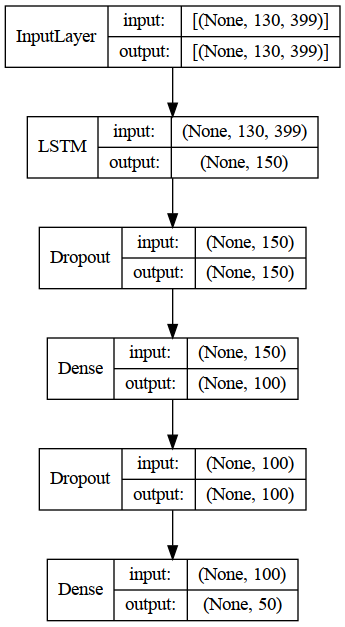

In [136]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      0.778     0.875     0.824         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      0.889     0.800     0.842        10
         BEE      0.375     0.300     0.333        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.500     0.500     0.500         8
   CHRISTMAS      0.800     0.667     0.727         6
    CONFUSED      0.600     0.500     0.545         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.200     0.167     0.182         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.625     0.625     0.625         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      1.000     0.375     0.545         8
         DOG      0.375    

In [138]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [139]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [140]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.1027 - f1_score: 0.0127

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 37s 1s/step - loss: 4.1027 - f1_score: 0.0127 - val_loss: 4.0776 - val_f1_score: 0.0011
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.0808 - f1_score: 0.0107

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 23s 834ms/step - loss: 4.0808 - f1_score: 0.0107 - val_loss: 4.0682 - val_f1_score: 0.0033
Epoch 3/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0631 - f1_score: 0.0089 - val_loss: 4.0602 - val_f1_score: 0.0033
Epoch 4/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0558 - f1_score: 0.0145 - val_loss: 4.0526 - val_f1_score: 0.0021
Epoch 5/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0480 - f1_score: 0.0125 - val_loss: 4.0422 - val_f1_score: 7.3260e-04
Epoch 6/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0395 - f1_score: 0.0126 - val_loss: 4.0385 - val_f1_score: 9.7561e-04
Epoch 7/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0329 - f1_score: 0.0105 - val_loss: 4.0331 - val_f1_score: 1.0000e-03
Epoch 8/500
28/28 [==============================] - 2s 83ms/step - loss: 4.0277 - f1_score: 0.0140 - val_loss: 4.0275 - val_f1_score: 9.1603e-04


INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 456ms/step - loss: 3.9982 - f1_score: 0.0144 - val_loss: 4.0011 - val_f1_score: 0.0036
Epoch 15/500
28/28 [==============================] - 2s 80ms/step - loss: 3.9933 - f1_score: 0.0139 - val_loss: 4.0001 - val_f1_score: 0.0030
Epoch 16/500
28/28 [==============================] - 2s 81ms/step - loss: 3.9787 - f1_score: 0.0193 - val_loss: 3.9835 - val_f1_score: 0.0013
Epoch 17/500
28/28 [==============================] - 2s 81ms/step - loss: 3.9589 - f1_score: 0.0217 - val_loss: 3.9520 - val_f1_score: 0.0035
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.9365 - f1_score: 0.0182

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 379ms/step - loss: 3.9365 - f1_score: 0.0182 - val_loss: 3.9219 - val_f1_score: 0.0164
Epoch 19/500
28/28 [==============================] - 2s 80ms/step - loss: 3.8553 - f1_score: 0.0240 - val_loss: 3.7473 - val_f1_score: 0.0043
Epoch 20/500
28/28 [==============================] - 2s 79ms/step - loss: 3.7895 - f1_score: 0.0220 - val_loss: 3.6663 - val_f1_score: 0.0065
Epoch 21/500
28/28 [==============================] - 2s 80ms/step - loss: 3.7209 - f1_score: 0.0292 - val_loss: 3.6156 - val_f1_score: 0.0144
Epoch 22/500
28/28 [==============================] - 2s 83ms/step - loss: 3.6806 - f1_score: 0.0284 - val_loss: 3.5969 - val_f1_score: 0.0061
Epoch 23/500
28/28 [==============================] - 2s 82ms/step - loss: 3.6648 - f1_score: 0.0335 - val_loss: 3.5792 - val_f1_score: 0.0038
Epoch 24/500
28/28 [==============================] - 2s 81ms/step - loss: 3.6251 - f1_score: 0.0345 - val_loss: 3.5577 - val_f1_score: 0.0149
Epoch 25/5

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 437ms/step - loss: 3.4865 - f1_score: 0.0523 - val_loss: 3.3967 - val_f1_score: 0.0199
Epoch 29/500
28/28 [==============================] - 2s 81ms/step - loss: 3.4295 - f1_score: 0.0514 - val_loss: 3.3375 - val_f1_score: 0.0160
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 3.4121 - f1_score: 0.0445

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 379ms/step - loss: 3.4121 - f1_score: 0.0445 - val_loss: 3.2807 - val_f1_score: 0.0249
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.3789 - f1_score: 0.0584

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 401ms/step - loss: 3.3789 - f1_score: 0.0584 - val_loss: 3.2798 - val_f1_score: 0.0351
Epoch 32/500
28/28 [==============================] - 2s 80ms/step - loss: 3.3346 - f1_score: 0.0610 - val_loss: 3.1988 - val_f1_score: 0.0348
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 3.3080 - f1_score: 0.0616

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 381ms/step - loss: 3.3080 - f1_score: 0.0616 - val_loss: 3.2014 - val_f1_score: 0.0445
Epoch 34/500
28/28 [==============================] - 2s 83ms/step - loss: 3.2351 - f1_score: 0.0742 - val_loss: 3.1792 - val_f1_score: 0.0419
Epoch 35/500
28/28 [==============================] - 2s 81ms/step - loss: 3.2159 - f1_score: 0.0688 - val_loss: 3.1687 - val_f1_score: 0.0322
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 3.1775 - f1_score: 0.0815

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 420ms/step - loss: 3.1775 - f1_score: 0.0815 - val_loss: 3.1150 - val_f1_score: 0.0454
Epoch 37/500
28/28 [==============================] - 2s 80ms/step - loss: 3.1710 - f1_score: 0.0776 - val_loss: 3.2788 - val_f1_score: 0.0268
Epoch 38/500
28/28 [==============================] - 2s 81ms/step - loss: 3.1463 - f1_score: 0.0711 - val_loss: 3.1285 - val_f1_score: 0.0413
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 3.1282 - f1_score: 0.0814

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 402ms/step - loss: 3.1282 - f1_score: 0.0814 - val_loss: 3.0358 - val_f1_score: 0.0567
Epoch 40/500
28/28 [==============================] - 2s 80ms/step - loss: 3.1006 - f1_score: 0.0858 - val_loss: 3.1031 - val_f1_score: 0.0485
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 3.0701 - f1_score: 0.0913

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 351ms/step - loss: 3.0701 - f1_score: 0.0913 - val_loss: 2.9928 - val_f1_score: 0.0611
Epoch 42/500
28/28 [==============================] - 2s 82ms/step - loss: 3.0759 - f1_score: 0.0865 - val_loss: 3.0510 - val_f1_score: 0.0555
Epoch 43/500
28/28 [==============================] - 2s 80ms/step - loss: 3.0380 - f1_score: 0.0865 - val_loss: 3.0741 - val_f1_score: 0.0472
Epoch 44/500
28/28 [==============================] - 2s 80ms/step - loss: 2.9939 - f1_score: 0.1024 - val_loss: 3.0620 - val_f1_score: 0.0566
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.9947 - f1_score: 0.1031

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 404ms/step - loss: 2.9947 - f1_score: 0.1031 - val_loss: 3.0143 - val_f1_score: 0.0752
Epoch 46/500
28/28 [==============================] - 2s 80ms/step - loss: 2.9759 - f1_score: 0.0969 - val_loss: 3.0173 - val_f1_score: 0.0622
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 2.9446 - f1_score: 0.1074

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 29s 1s/step - loss: 2.9446 - f1_score: 0.1074 - val_loss: 2.9461 - val_f1_score: 0.0824
Epoch 48/500
28/28 [==============================] - 2s 80ms/step - loss: 2.9224 - f1_score: 0.1127 - val_loss: 2.9339 - val_f1_score: 0.0604
Epoch 49/500
28/28 [==============================] - 2s 81ms/step - loss: 2.9087 - f1_score: 0.1096 - val_loss: 2.9754 - val_f1_score: 0.0673
Epoch 50/500
28/28 [==============================] - 2s 81ms/step - loss: 2.8692 - f1_score: 0.1220 - val_loss: 2.9329 - val_f1_score: 0.0817
Epoch 51/500
28/28 [==============================] - 2s 79ms/step - loss: 2.8607 - f1_score: 0.1238 - val_loss: 2.9003 - val_f1_score: 0.0692
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 2.8236 - f1_score: 0.1239

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 399ms/step - loss: 2.8236 - f1_score: 0.1239 - val_loss: 2.8661 - val_f1_score: 0.0880
Epoch 53/500
28/28 [==============================] - 2s 80ms/step - loss: 2.8216 - f1_score: 0.1379 - val_loss: 2.9017 - val_f1_score: 0.0721
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 2.7865 - f1_score: 0.1327

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 366ms/step - loss: 2.7865 - f1_score: 0.1327 - val_loss: 2.8179 - val_f1_score: 0.1149
Epoch 55/500
28/28 [==============================] - 2s 82ms/step - loss: 2.8068 - f1_score: 0.1435 - val_loss: 2.8467 - val_f1_score: 0.1132
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 2.7298 - f1_score: 0.1493

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 15s 555ms/step - loss: 2.7298 - f1_score: 0.1493 - val_loss: 2.7738 - val_f1_score: 0.1290
Epoch 57/500
28/28 [==============================] - 2s 80ms/step - loss: 2.6629 - f1_score: 0.1713 - val_loss: 2.7360 - val_f1_score: 0.1258
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 2.6526 - f1_score: 0.1671

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 406ms/step - loss: 2.6526 - f1_score: 0.1671 - val_loss: 2.7716 - val_f1_score: 0.1311
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 2.6079 - f1_score: 0.1782

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 469ms/step - loss: 2.6079 - f1_score: 0.1782 - val_loss: 2.7017 - val_f1_score: 0.1753
Epoch 60/500
28/28 [==============================] - 2s 80ms/step - loss: 2.5895 - f1_score: 0.1899 - val_loss: 2.7337 - val_f1_score: 0.1452
Epoch 61/500
28/28 [==============================] - 2s 82ms/step - loss: 2.5269 - f1_score: 0.2096 - val_loss: 2.6199 - val_f1_score: 0.1453
Epoch 62/500
28/28 [==============================] - 2s 82ms/step - loss: 2.4870 - f1_score: 0.2152 - val_loss: 2.6692 - val_f1_score: 0.1400
Epoch 63/500
28/28 [==============================] - 2s 82ms/step - loss: 2.4338 - f1_score: 0.2297 - val_loss: 2.5424 - val_f1_score: 0.1640
Epoch 64/500
28/28 [==============================] - 2s 81ms/step - loss: 2.4103 - f1_score: 0.2332 - val_loss: 2.6921 - val_f1_score: 0.1675
Epoch 65/500
28/28 [==============================] - 2s 84ms/step - loss: 2.3947 - f1_score: 0.2436 - val_loss: 2.7329 - val_f1_score: 0.1557
Epoch 66/5

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 370ms/step - loss: 2.3235 - f1_score: 0.2559 - val_loss: 2.5647 - val_f1_score: 0.2098
Epoch 67/500
28/28 [==============================] - 2s 83ms/step - loss: 2.2486 - f1_score: 0.2806 - val_loss: 2.5880 - val_f1_score: 0.1580
Epoch 68/500
28/28 [==============================] - 2s 84ms/step - loss: 2.2906 - f1_score: 0.2721 - val_loss: 2.4740 - val_f1_score: 0.2044
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 2.1990 - f1_score: 0.2848

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 16s 591ms/step - loss: 2.1990 - f1_score: 0.2848 - val_loss: 2.3990 - val_f1_score: 0.2753
Epoch 70/500
28/28 [==============================] - 2s 80ms/step - loss: 2.1791 - f1_score: 0.2893 - val_loss: 2.3889 - val_f1_score: 0.2321
Epoch 71/500
28/28 [==============================] - 2s 82ms/step - loss: 2.1512 - f1_score: 0.3020 - val_loss: 2.3585 - val_f1_score: 0.2405
Epoch 72/500
28/28 [==============================] - 2s 81ms/step - loss: 2.1115 - f1_score: 0.3151 - val_loss: 2.3318 - val_f1_score: 0.2552
Epoch 73/500
28/28 [==============================] - 2s 86ms/step - loss: 2.0627 - f1_score: 0.3270 - val_loss: 2.5057 - val_f1_score: 0.2125
Epoch 74/500
28/28 [==============================] - 2s 82ms/step - loss: 2.0630 - f1_score: 0.3284 - val_loss: 2.3631 - val_f1_score: 0.2349
Epoch 75/500
28/28 [==============================] - 2s 83ms/step - loss: 2.0091 - f1_score: 0.3406 - val_loss: 2.4092 - val_f1_score: 0.2228
Epoch 76/5

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 455ms/step - loss: 1.8883 - f1_score: 0.3843 - val_loss: 2.2095 - val_f1_score: 0.2939
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 1.9073 - f1_score: 0.3637

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 20s 750ms/step - loss: 1.9073 - f1_score: 0.3637 - val_loss: 2.0898 - val_f1_score: 0.2942
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 1.8722 - f1_score: 0.3851

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 380ms/step - loss: 1.8722 - f1_score: 0.3851 - val_loss: 2.2655 - val_f1_score: 0.2953
Epoch 81/500
28/28 [==============================] - 2s 82ms/step - loss: 1.7969 - f1_score: 0.4060 - val_loss: 2.2205 - val_f1_score: 0.2856
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 1.7766 - f1_score: 0.4183

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 406ms/step - loss: 1.7766 - f1_score: 0.4183 - val_loss: 2.0949 - val_f1_score: 0.3196
Epoch 83/500
28/28 [==============================] - ETA: 0s - loss: 1.7362 - f1_score: 0.4194

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 367ms/step - loss: 1.7362 - f1_score: 0.4194 - val_loss: 2.0945 - val_f1_score: 0.3210
Epoch 84/500
28/28 [==============================] - 2s 79ms/step - loss: 1.7467 - f1_score: 0.4304 - val_loss: 2.0358 - val_f1_score: 0.3162
Epoch 85/500
28/28 [==============================] - ETA: 0s - loss: 1.6931 - f1_score: 0.4408

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 410ms/step - loss: 1.6931 - f1_score: 0.4408 - val_loss: 2.1092 - val_f1_score: 0.3404
Epoch 86/500
28/28 [==============================] - 2s 81ms/step - loss: 1.6725 - f1_score: 0.4368 - val_loss: 2.1707 - val_f1_score: 0.3397
Epoch 87/500
28/28 [==============================] - 2s 81ms/step - loss: 1.6186 - f1_score: 0.4573 - val_loss: 2.0124 - val_f1_score: 0.3320
Epoch 88/500
28/28 [==============================] - 2s 82ms/step - loss: 1.5895 - f1_score: 0.4646 - val_loss: 2.0353 - val_f1_score: 0.3363
Epoch 89/500
28/28 [==============================] - ETA: 0s - loss: 1.6046 - f1_score: 0.4647

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 521ms/step - loss: 1.6046 - f1_score: 0.4647 - val_loss: 1.9533 - val_f1_score: 0.3828
Epoch 90/500
28/28 [==============================] - 2s 80ms/step - loss: 1.5808 - f1_score: 0.4665 - val_loss: 1.9722 - val_f1_score: 0.3687
Epoch 91/500
28/28 [==============================] - 2s 81ms/step - loss: 1.5684 - f1_score: 0.4678 - val_loss: 2.0922 - val_f1_score: 0.3157
Epoch 92/500
28/28 [==============================] - 2s 83ms/step - loss: 1.5282 - f1_score: 0.4894 - val_loss: 2.0642 - val_f1_score: 0.3543
Epoch 93/500
28/28 [==============================] - 2s 81ms/step - loss: 1.5130 - f1_score: 0.4956 - val_loss: 2.1015 - val_f1_score: 0.3373
Epoch 94/500
28/28 [==============================] - 2s 83ms/step - loss: 1.4864 - f1_score: 0.5001 - val_loss: 2.0052 - val_f1_score: 0.3344
Epoch 95/500
28/28 [==============================] - 2s 82ms/step - loss: 1.4693 - f1_score: 0.5046 - val_loss: 2.0703 - val_f1_score: 0.3608
Epoch 96/5

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 422ms/step - loss: 1.4560 - f1_score: 0.5064 - val_loss: 1.9077 - val_f1_score: 0.3935
Epoch 97/500
28/28 [==============================] - 2s 81ms/step - loss: 1.3666 - f1_score: 0.5386 - val_loss: 1.8730 - val_f1_score: 0.3923
Epoch 98/500
28/28 [==============================] - 2s 84ms/step - loss: 1.4397 - f1_score: 0.5236 - val_loss: 2.0236 - val_f1_score: 0.3703
Epoch 99/500
28/28 [==============================] - 2s 82ms/step - loss: 1.3943 - f1_score: 0.5311 - val_loss: 1.9673 - val_f1_score: 0.3623
Epoch 100/500
28/28 [==============================] - 2s 83ms/step - loss: 1.4239 - f1_score: 0.5259 - val_loss: 1.9465 - val_f1_score: 0.3899
Epoch 101/500
28/28 [==============================] - 2s 85ms/step - loss: 1.3827 - f1_score: 0.5460 - val_loss: 2.1938 - val_f1_score: 0.3407
Epoch 102/500
28/28 [==============================] - 2s 83ms/step - loss: 1.4115 - f1_score: 0.5154 - val_loss: 1.9136 - val_f1_score: 0.3864
Epoch 1

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 470ms/step - loss: 1.3441 - f1_score: 0.5468 - val_loss: 1.8724 - val_f1_score: 0.4052
Epoch 104/500
28/28 [==============================] - 2s 80ms/step - loss: 1.3094 - f1_score: 0.5581 - val_loss: 1.9136 - val_f1_score: 0.3989
Epoch 105/500
28/28 [==============================] - ETA: 0s - loss: 1.2789 - f1_score: 0.5779

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 418ms/step - loss: 1.2789 - f1_score: 0.5779 - val_loss: 1.8071 - val_f1_score: 0.4536
Epoch 106/500
28/28 [==============================] - 2s 81ms/step - loss: 1.2868 - f1_score: 0.5665 - val_loss: 2.0383 - val_f1_score: 0.3665
Epoch 107/500
28/28 [==============================] - 2s 85ms/step - loss: 1.3232 - f1_score: 0.5547 - val_loss: 2.0660 - val_f1_score: 0.3913
Epoch 108/500
28/28 [==============================] - 2s 82ms/step - loss: 1.2347 - f1_score: 0.5783 - val_loss: 1.9076 - val_f1_score: 0.4218
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 1.2157 - f1_score: 0.5910

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 421ms/step - loss: 1.2157 - f1_score: 0.5910 - val_loss: 1.8133 - val_f1_score: 0.4586
Epoch 110/500
28/28 [==============================] - ETA: 0s - loss: 1.1998 - f1_score: 0.6010

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 394ms/step - loss: 1.1998 - f1_score: 0.6010 - val_loss: 1.8268 - val_f1_score: 0.4631
Epoch 111/500
28/28 [==============================] - 2s 80ms/step - loss: 1.1681 - f1_score: 0.5991 - val_loss: 2.0211 - val_f1_score: 0.4224
Epoch 112/500
28/28 [==============================] - 2s 80ms/step - loss: 1.2273 - f1_score: 0.5853 - val_loss: 2.0426 - val_f1_score: 0.4033
Epoch 113/500
28/28 [==============================] - 2s 84ms/step - loss: 1.1714 - f1_score: 0.6162 - val_loss: 2.1110 - val_f1_score: 0.4063
Epoch 114/500
28/28 [==============================] - ETA: 0s - loss: 1.1414 - f1_score: 0.6048

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 18s 670ms/step - loss: 1.1414 - f1_score: 0.6048 - val_loss: 1.7589 - val_f1_score: 0.4749
Epoch 115/500
28/28 [==============================] - ETA: 0s - loss: 1.1201 - f1_score: 0.6296

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 352ms/step - loss: 1.1201 - f1_score: 0.6296 - val_loss: 1.7660 - val_f1_score: 0.4787
Epoch 116/500
28/28 [==============================] - 2s 80ms/step - loss: 1.1037 - f1_score: 0.6317 - val_loss: 1.7556 - val_f1_score: 0.4397
Epoch 117/500
28/28 [==============================] - 2s 80ms/step - loss: 1.1555 - f1_score: 0.6168 - val_loss: 1.9426 - val_f1_score: 0.4234
Epoch 118/500
28/28 [==============================] - 2s 83ms/step - loss: 1.1564 - f1_score: 0.6080 - val_loss: 1.8045 - val_f1_score: 0.4600
Epoch 119/500
28/28 [==============================] - 2s 81ms/step - loss: 1.1303 - f1_score: 0.6346 - val_loss: 1.7551 - val_f1_score: 0.4578
Epoch 120/500
28/28 [==============================] - 2s 81ms/step - loss: 1.1355 - f1_score: 0.6376 - val_loss: 1.8849 - val_f1_score: 0.4567
Epoch 121/500
28/28 [==============================] - 2s 81ms/step - loss: 1.0301 - f1_score: 0.6551 - val_loss: 1.8724 - val_f1_score: 0.4774
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 386ms/step - loss: 1.0001 - f1_score: 0.6761 - val_loss: 1.7303 - val_f1_score: 0.4828
Epoch 123/500
28/28 [==============================] - 2s 80ms/step - loss: 0.9720 - f1_score: 0.6786 - val_loss: 2.0276 - val_f1_score: 0.4335
Epoch 124/500
28/28 [==============================] - 2s 81ms/step - loss: 1.0109 - f1_score: 0.6605 - val_loss: 1.8716 - val_f1_score: 0.4700
Epoch 125/500
28/28 [==============================] - 2s 81ms/step - loss: 1.0447 - f1_score: 0.6484 - val_loss: 1.9816 - val_f1_score: 0.4512
Epoch 126/500
28/28 [==============================] - 2s 82ms/step - loss: 0.9775 - f1_score: 0.6682 - val_loss: 1.8763 - val_f1_score: 0.4705
Epoch 127/500
28/28 [==============================] - ETA: 0s - loss: 0.9807 - f1_score: 0.6715

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 430ms/step - loss: 0.9807 - f1_score: 0.6715 - val_loss: 1.7481 - val_f1_score: 0.5168
Epoch 128/500
28/28 [==============================] - 2s 81ms/step - loss: 0.9728 - f1_score: 0.6851 - val_loss: 1.9032 - val_f1_score: 0.4304
Epoch 129/500
28/28 [==============================] - 2s 81ms/step - loss: 0.9209 - f1_score: 0.6959 - val_loss: 1.7174 - val_f1_score: 0.5082
Epoch 130/500
28/28 [==============================] - 2s 81ms/step - loss: 0.8856 - f1_score: 0.7035 - val_loss: 1.7236 - val_f1_score: 0.4946
Epoch 131/500
28/28 [==============================] - 2s 83ms/step - loss: 0.9429 - f1_score: 0.6848 - val_loss: 1.8279 - val_f1_score: 0.5057
Epoch 132/500
28/28 [==============================] - 2s 86ms/step - loss: 0.9132 - f1_score: 0.6980 - val_loss: 1.9657 - val_f1_score: 0.4694
Epoch 133/500
28/28 [==============================] - 2s 83ms/step - loss: 0.9820 - f1_score: 0.6773 - val_loss: 1.9898 - val_f1_score: 0.4641
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 417ms/step - loss: 0.9201 - f1_score: 0.6962 - val_loss: 1.6617 - val_f1_score: 0.5244
Epoch 137/500
28/28 [==============================] - 2s 81ms/step - loss: 0.8535 - f1_score: 0.7272 - val_loss: 1.8608 - val_f1_score: 0.5159
Epoch 138/500
28/28 [==============================] - 2s 82ms/step - loss: 0.8513 - f1_score: 0.7128 - val_loss: 1.8579 - val_f1_score: 0.5199
Epoch 139/500
28/28 [==============================] - 2s 85ms/step - loss: 0.8149 - f1_score: 0.7433 - val_loss: 1.7729 - val_f1_score: 0.4776
Epoch 140/500
28/28 [==============================] - 2s 83ms/step - loss: 0.8746 - f1_score: 0.7160 - val_loss: 2.0709 - val_f1_score: 0.4486
Epoch 141/500
28/28 [==============================] - 2s 83ms/step - loss: 0.8732 - f1_score: 0.7184 - val_loss: 1.7666 - val_f1_score: 0.5160
Epoch 142/500
28/28 [==============================] - 2s 83ms/step - loss: 0.7808 - f1_score: 0.7533 - val_loss: 1.8401 - val_f1_score: 0.5153
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 10s 381ms/step - loss: 0.8446 - f1_score: 0.7275 - val_loss: 1.7259 - val_f1_score: 0.5532
Epoch 145/500
28/28 [==============================] - 2s 80ms/step - loss: 0.7506 - f1_score: 0.7540 - val_loss: 1.8412 - val_f1_score: 0.5120
Epoch 146/500
28/28 [==============================] - 2s 82ms/step - loss: 0.7207 - f1_score: 0.7748 - val_loss: 1.8641 - val_f1_score: 0.5259
Epoch 147/500
28/28 [==============================] - 2s 83ms/step - loss: 0.7397 - f1_score: 0.7648 - val_loss: 1.9775 - val_f1_score: 0.5388
Epoch 148/500
28/28 [==============================] - 2s 83ms/step - loss: 0.7801 - f1_score: 0.7453 - val_loss: 1.9396 - val_f1_score: 0.5008
Epoch 149/500
28/28 [==============================] - 2s 84ms/step - loss: 0.7619 - f1_score: 0.7565 - val_loss: 1.8635 - val_f1_score: 0.5056
Epoch 150/500
28/28 [==============================] - 2s 85ms/step - loss: 0.7281 - f1_score: 0.7640 - val_loss: 2.2089 - val_f1_score: 0.4743
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 428ms/step - loss: 0.7390 - f1_score: 0.7628 - val_loss: 2.0116 - val_f1_score: 0.5538
Epoch 156/500
28/28 [==============================] - 2s 81ms/step - loss: 0.6878 - f1_score: 0.7798 - val_loss: 1.9012 - val_f1_score: 0.5342
Epoch 157/500
28/28 [==============================] - 2s 90ms/step - loss: 0.7647 - f1_score: 0.7512 - val_loss: 2.0940 - val_f1_score: 0.5127
Epoch 158/500
28/28 [==============================] - 2s 84ms/step - loss: 0.6678 - f1_score: 0.7876 - val_loss: 1.9164 - val_f1_score: 0.5227
Epoch 159/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6218 - f1_score: 0.8124 - val_loss: 1.7822 - val_f1_score: 0.5387
Epoch 160/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6127 - f1_score: 0.8149 - val_loss: 2.0447 - val_f1_score: 0.5016
Epoch 161/500
28/28 [==============================] - 2s 85ms/step - loss: 0.6626 - f1_score: 0.7927 - val_loss: 2.0477 - val_f1_score: 0.5229
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 453ms/step - loss: 0.5649 - f1_score: 0.8248 - val_loss: 1.9128 - val_f1_score: 0.5584
Epoch 170/500
28/28 [==============================] - 2s 84ms/step - loss: 0.5812 - f1_score: 0.8200 - val_loss: 1.9161 - val_f1_score: 0.5488
Epoch 171/500
28/28 [==============================] - 2s 82ms/step - loss: 0.5574 - f1_score: 0.8212 - val_loss: 2.0552 - val_f1_score: 0.5352
Epoch 172/500
28/28 [==============================] - 2s 87ms/step - loss: 0.5358 - f1_score: 0.8371 - val_loss: 1.9378 - val_f1_score: 0.5357
Epoch 173/500
28/28 [==============================] - 2s 83ms/step - loss: 0.5311 - f1_score: 0.8387 - val_loss: 2.0999 - val_f1_score: 0.5163
Epoch 174/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6138 - f1_score: 0.8138 - val_loss: 2.1177 - val_f1_score: 0.5248
Epoch 175/500
28/28 [==============================] - 2s 83ms/step - loss: 0.5088 - f1_score: 0.8468 - val_loss: 1.9725 - val_f1_score: 0.5346
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 12s 454ms/step - loss: 0.6243 - f1_score: 0.8092 - val_loss: 1.7989 - val_f1_score: 0.5700
Epoch 179/500
28/28 [==============================] - ETA: 0s - loss: 0.4982 - f1_score: 0.8416

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 396ms/step - loss: 0.4982 - f1_score: 0.8416 - val_loss: 1.8839 - val_f1_score: 0.5731
Epoch 180/500
28/28 [==============================] - 2s 81ms/step - loss: 0.5644 - f1_score: 0.8223 - val_loss: 1.9615 - val_f1_score: 0.5692
Epoch 181/500
28/28 [==============================] - 2s 84ms/step - loss: 0.5042 - f1_score: 0.8481 - val_loss: 2.0091 - val_f1_score: 0.5336
Epoch 182/500
28/28 [==============================] - 2s 82ms/step - loss: 0.4683 - f1_score: 0.8610 - val_loss: 1.8861 - val_f1_score: 0.5544
Epoch 183/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4850 - f1_score: 0.8524 - val_loss: 1.8658 - val_f1_score: 0.5412
Epoch 184/500
28/28 [==============================] - ETA: 0s - loss: 0.4602 - f1_score: 0.8628

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 11s 396ms/step - loss: 0.4602 - f1_score: 0.8628 - val_loss: 1.8945 - val_f1_score: 0.6039
Epoch 185/500
28/28 [==============================] - 2s 81ms/step - loss: 0.4656 - f1_score: 0.8643 - val_loss: 2.0122 - val_f1_score: 0.5401
Epoch 186/500
28/28 [==============================] - 2s 84ms/step - loss: 0.4823 - f1_score: 0.8561 - val_loss: 2.3040 - val_f1_score: 0.4840
Epoch 187/500
28/28 [==============================] - 2s 82ms/step - loss: 0.7514 - f1_score: 0.7711 - val_loss: 2.0000 - val_f1_score: 0.5336
Epoch 188/500
28/28 [==============================] - 2s 86ms/step - loss: 0.6072 - f1_score: 0.8132 - val_loss: 2.0921 - val_f1_score: 0.5412
Epoch 189/500
28/28 [==============================] - 2s 83ms/step - loss: 0.5492 - f1_score: 0.8277 - val_loss: 2.1610 - val_f1_score: 0.5120
Epoch 190/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4831 - f1_score: 0.8557 - val_loss: 2.0699 - val_f1_score: 0.5405
Epoc

Epoch 241/500
28/28 [==============================] - 2s 89ms/step - loss: 0.2706 - f1_score: 0.9301 - val_loss: 2.3782 - val_f1_score: 0.5551
Epoch 242/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2589 - f1_score: 0.9332 - val_loss: 2.4387 - val_f1_score: 0.5493
Epoch 243/500
28/28 [==============================] - 3s 92ms/step - loss: 0.2668 - f1_score: 0.9345 - val_loss: 2.5324 - val_f1_score: 0.5532
Epoch 244/500
28/28 [==============================] - 2s 85ms/step - loss: 0.2680 - f1_score: 0.9299 - val_loss: 2.4363 - val_f1_score: 0.5536
Epoch 245/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4364 - f1_score: 0.8746 - val_loss: 2.2050 - val_f1_score: 0.5694
Epoch 246/500
28/28 [==============================] - 2s 85ms/step - loss: 0.4270 - f1_score: 0.8724 - val_loss: 2.3707 - val_f1_score: 0.5580
Epoch 247/500
28/28 [==============================] - 3s 94ms/step - loss: 0.5366 - f1_score: 0.8577 - val_loss: 3.1269 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 476ms/step - loss: 0.2122 - f1_score: 0.9525 - val_loss: 2.1044 - val_f1_score: 0.6108
Epoch 264/500
28/28 [==============================] - 2s 87ms/step - loss: 0.2920 - f1_score: 0.9219 - val_loss: 2.4341 - val_f1_score: 0.5770
Epoch 265/500
28/28 [==============================] - 2s 83ms/step - loss: 0.5448 - f1_score: 0.8514 - val_loss: 2.7145 - val_f1_score: 0.5475
Epoch 266/500
28/28 [==============================] - 2s 88ms/step - loss: 0.6080 - f1_score: 0.8287 - val_loss: 2.4022 - val_f1_score: 0.5393
Epoch 267/500
28/28 [==============================] - 2s 85ms/step - loss: 0.3724 - f1_score: 0.8918 - val_loss: 2.4198 - val_f1_score: 0.5509
Epoch 268/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2910 - f1_score: 0.9219 - val_loss: 2.5210 - val_f1_score: 0.5457
Epoch 269/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4221 - f1_score: 0.8887 - val_loss: 2.4761 - val_f1_score: 0.5701
Epoc

Epoch 320/500
28/28 [==============================] - 2s 86ms/step - loss: 0.3138 - f1_score: 0.9192 - val_loss: 2.7643 - val_f1_score: 0.5973
Epoch 321/500
28/28 [==============================] - 2s 88ms/step - loss: 0.2488 - f1_score: 0.9371 - val_loss: 2.6284 - val_f1_score: 0.5515
Epoch 322/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1980 - f1_score: 0.9590 - val_loss: 2.5162 - val_f1_score: 0.5855
Epoch 323/500
28/28 [==============================] - 2s 87ms/step - loss: 0.2520 - f1_score: 0.9389 - val_loss: 2.6015 - val_f1_score: 0.5451
Epoch 324/500
28/28 [==============================] - 3s 91ms/step - loss: 0.2033 - f1_score: 0.9543 - val_loss: 2.7760 - val_f1_score: 0.5461
Epoch 325/500
28/28 [==============================] - 2s 85ms/step - loss: 0.2103 - f1_score: 0.9548 - val_loss: 3.2479 - val_f1_score: 0.5182
Epoch 326/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3944 - f1_score: 0.9052 - val_loss: 3.0787 - val_f1_score:

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 526ms/step - loss: 0.2065 - f1_score: 0.9557 - val_loss: 2.4601 - val_f1_score: 0.6123
Epoch 355/500
28/28 [==============================] - 2s 84ms/step - loss: 0.3375 - f1_score: 0.9183 - val_loss: 2.5648 - val_f1_score: 0.5671
Epoch 356/500
28/28 [==============================] - 2s 82ms/step - loss: 0.2524 - f1_score: 0.9354 - val_loss: 2.7876 - val_f1_score: 0.5355
Epoch 357/500
28/28 [==============================] - 2s 89ms/step - loss: 1.6526 - f1_score: 0.6567 - val_loss: 2.3728 - val_f1_score: 0.4304
Epoch 358/500
28/28 [==============================] - 2s 89ms/step - loss: 1.1929 - f1_score: 0.6504 - val_loss: 2.1287 - val_f1_score: 0.5039
Epoch 359/500
28/28 [==============================] - 3s 106ms/step - loss: 0.6222 - f1_score: 0.8178 - val_loss: 2.0993 - val_f1_score: 0.5302
Epoch 360/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4122 - f1_score: 0.8818 - val_loss: 2.1136 - val_f1_score: 0.5557
Epo

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 493ms/step - loss: 0.1525 - f1_score: 0.9746 - val_loss: 2.3565 - val_f1_score: 0.6139
Epoch 387/500
28/28 [==============================] - 2s 82ms/step - loss: 0.1249 - f1_score: 0.9851 - val_loss: 2.5310 - val_f1_score: 0.5804
Epoch 388/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1211 - f1_score: 0.9857 - val_loss: 2.6192 - val_f1_score: 0.5843
Epoch 389/500
28/28 [==============================] - 2s 88ms/step - loss: 0.1416 - f1_score: 0.9785 - val_loss: 2.6837 - val_f1_score: 0.5763
Epoch 390/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1766 - f1_score: 0.9600 - val_loss: 2.7233 - val_f1_score: 0.5804
Epoch 391/500
28/28 [==============================] - 2s 86ms/step - loss: 0.1752 - f1_score: 0.9649 - val_loss: 2.9146 - val_f1_score: 0.5417
Epoch 392/500
28/28 [==============================] - 3s 99ms/step - loss: 0.2360 - f1_score: 0.9519 - val_loss: 2.6364 - val_f1_score: 0.5594
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 516ms/step - loss: 0.2502 - f1_score: 0.9464 - val_loss: 2.5617 - val_f1_score: 0.6227
Epoch 414/500
28/28 [==============================] - 2s 83ms/step - loss: 0.1896 - f1_score: 0.9580 - val_loss: 2.9799 - val_f1_score: 0.5662
Epoch 415/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2370 - f1_score: 0.9523 - val_loss: 2.6752 - val_f1_score: 0.5906
Epoch 416/500
28/28 [==============================] - 2s 84ms/step - loss: 0.3528 - f1_score: 0.9100 - val_loss: 2.6701 - val_f1_score: 0.5684
Epoch 417/500
28/28 [==============================] - 2s 90ms/step - loss: 0.3571 - f1_score: 0.9117 - val_loss: 2.7528 - val_f1_score: 0.5629
Epoch 418/500
28/28 [==============================] - ETA: 0s - loss: 0.2242 - f1_score: 0.9502

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 500ms/step - loss: 0.2242 - f1_score: 0.9502 - val_loss: 2.5495 - val_f1_score: 0.6290
Epoch 419/500
28/28 [==============================] - 2s 82ms/step - loss: 0.1521 - f1_score: 0.9745 - val_loss: 2.6260 - val_f1_score: 0.5832
Epoch 420/500
28/28 [==============================] - 2s 89ms/step - loss: 0.1582 - f1_score: 0.9733 - val_loss: 2.9585 - val_f1_score: 0.5699
Epoch 421/500
28/28 [==============================] - 2s 85ms/step - loss: 0.2099 - f1_score: 0.9525 - val_loss: 2.7951 - val_f1_score: 0.5723
Epoch 422/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2883 - f1_score: 0.9302 - val_loss: 2.6752 - val_f1_score: 0.5549
Epoch 423/500
28/28 [==============================] - 2s 86ms/step - loss: 0.3476 - f1_score: 0.9171 - val_loss: 2.4138 - val_f1_score: 0.5692
Epoch 424/500
28/28 [==============================] - 3s 91ms/step - loss: 0.2130 - f1_score: 0.9544 - val_loss: 2.7740 - val_f1_score: 0.5890
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 521ms/step - loss: 0.1280 - f1_score: 0.9814 - val_loss: 2.6731 - val_f1_score: 0.6316
Epoch 431/500
28/28 [==============================] - 2s 83ms/step - loss: 0.1189 - f1_score: 0.9847 - val_loss: 2.7533 - val_f1_score: 0.5983
Epoch 432/500
28/28 [==============================] - ETA: 0s - loss: 0.1248 - f1_score: 0.9819

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 14s 499ms/step - loss: 0.1248 - f1_score: 0.9819 - val_loss: 2.5031 - val_f1_score: 0.6356
Epoch 433/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8459 - f1_score: 0.8176 - val_loss: 2.7239 - val_f1_score: 0.4960
Epoch 434/500
28/28 [==============================] - 2s 85ms/step - loss: 0.7187 - f1_score: 0.8080 - val_loss: 2.5229 - val_f1_score: 0.5359
Epoch 435/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3156 - f1_score: 0.9174 - val_loss: 2.4486 - val_f1_score: 0.5822
Epoch 436/500
28/28 [==============================] - 2s 84ms/step - loss: 0.2602 - f1_score: 0.9365 - val_loss: 2.6482 - val_f1_score: 0.5541
Epoch 437/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2991 - f1_score: 0.9244 - val_loss: 2.7663 - val_f1_score: 0.5425
Epoch 438/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4196 - f1_score: 0.8984 - val_loss: 2.5874 - val_f1_score: 0.5068
Epoc

INFO:tensorflow:Assets written to: 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 LSTM/assets


28/28 [==============================] - 13s 497ms/step - loss: 0.2219 - f1_score: 0.9531 - val_loss: 2.4111 - val_f1_score: 0.6367
Epoch 477/500
28/28 [==============================] - 2s 83ms/step - loss: 0.1612 - f1_score: 0.9670 - val_loss: 2.5994 - val_f1_score: 0.6150
Epoch 478/500
28/28 [==============================] - 2s 84ms/step - loss: 0.1455 - f1_score: 0.9772 - val_loss: 2.7411 - val_f1_score: 0.5891
Epoch 479/500
28/28 [==============================] - 2s 89ms/step - loss: 0.1334 - f1_score: 0.9841 - val_loss: 2.7094 - val_f1_score: 0.5793
Epoch 480/500
28/28 [==============================] - 2s 84ms/step - loss: 0.1870 - f1_score: 0.9617 - val_loss: 3.0643 - val_f1_score: 0.5129
Epoch 481/500
28/28 [==============================] - 3s 91ms/step - loss: 0.2436 - f1_score: 0.9518 - val_loss: 2.8871 - val_f1_score: 0.5506
Epoch 482/500
28/28 [==============================] - 2s 86ms/step - loss: 0.2488 - f1_score: 0.9429 - val_loss: 2.7217 - val_f1_score: 0.5961
Epoc

In [141]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [142]:
hist_df = pd.read_csv('1 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.230123  0.947644  3.151237      0.559927
496  0.274543  0.936120  2.857149      0.561510
497  0.270153  0.934313  2.690917      0.599531
498  0.201144  0.953558  2.709644      0.602369
499  0.182115  0.960175  2.707047      0.594282

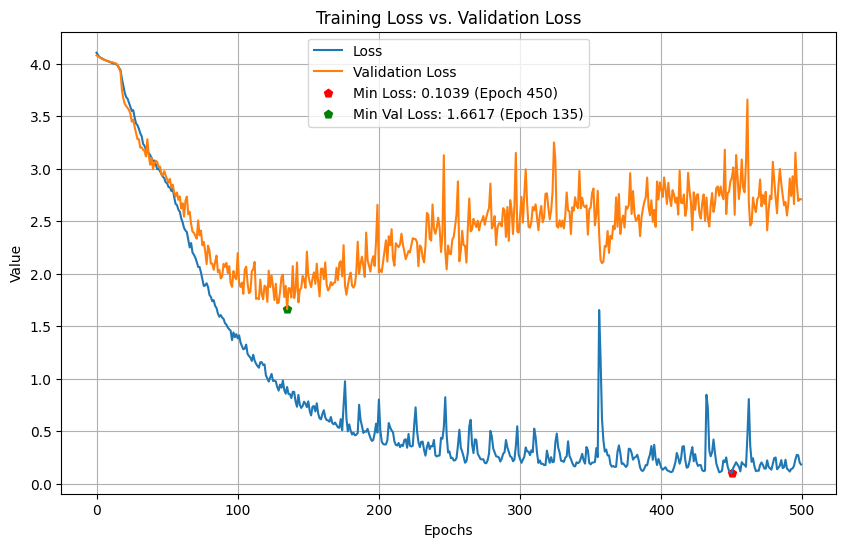

In [143]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

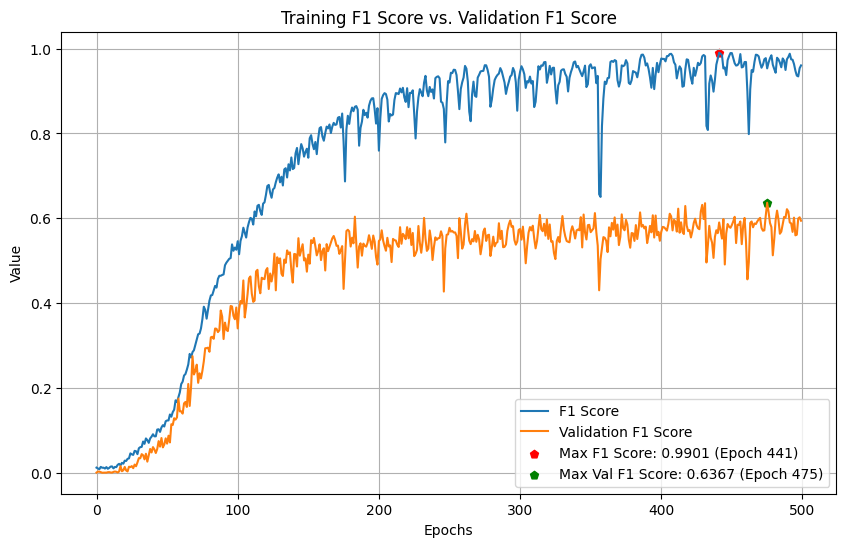

In [144]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [145]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.800     0.667     0.727         6
  BASKETBALL      0.900     0.900     0.900        10
         BEE      0.600     0.300     0.400        10
        BELT      1.000     0.250     0.400         4
        BITE      0.143     0.125     0.133         8
   BREAKFAST      0.667     0.333     0.444         6
      CANCER      1.000     0.500     0.667         8
   CHRISTMAS      0.625     0.833     0.714         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     0.750     0.857         4
        DEAF      0.125     0.167     0.143         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.400     0.333     0.364         6
      DINNER      1.000     0.250     0.400         8
         DOG      0.250    

In [146]:
reconstructed_model = tf.keras.models.load_model("1 LSTM")

In [147]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               330000    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
Total params: 350,150
Trainable params: 350,150
Non-trainable params: 0
_________________________________________________________________


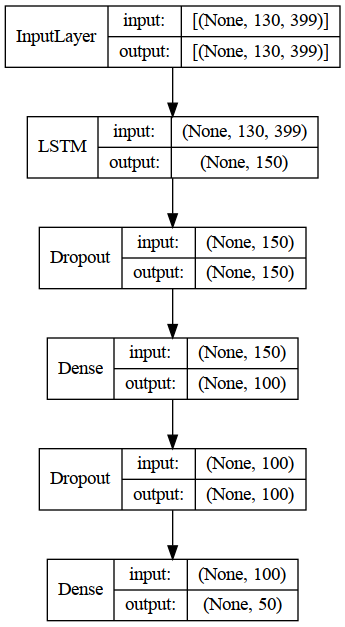

In [148]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

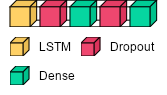

In [151]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [149]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 2.4111 - f1_score: 0.6367


[2.4111263751983643, 0.6366979479789734]

In [150]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 19ms/step - loss: 0.0956 - f1_score: 0.9900


[0.09559568762779236, 0.9899914264678955]

In [152]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      1.000     1.000     1.000         6
  BASKETBALL      0.900     0.900     0.900        10
         BEE      0.600     0.300     0.400        10
        BELT      1.000     0.750     0.857         4
        BITE      0.333     0.125     0.182         8
   BREAKFAST      0.833     0.833     0.833         6
      CANCER      1.000     0.500     0.667         8
   CHRISTMAS      0.545     1.000     0.706         6
    CONFUSED      0.500     0.833     0.625         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.286     0.333     0.308         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.333     0.333     0.333         6
      DINNER      1.000     0.250     0.400         8
         DOG      0.250    

## Hyperparameter Tuning 2 LSTM Layers

In [60]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_2',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_2',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_4',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_316180/3334091018.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [61]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='2_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_LSTM/tuner0.json


In [62]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 80, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'ma

In [63]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [65]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 720 Complete [00h 29m 05s]
val_f1_score: 0.6098112463951111

Best val_f1_score So Far: 0.6521124839782715
Total elapsed time: 14h 31m 32s
INFO:tensorflow:Oracle triggered exit


In [66]:
best_model = tuner.get_best_models(num_models=3)[0]

In [67]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0665 summary
Hyperparameters:
dense_activation: gelu
units_1: 150
regularizer_1: 0.005097339455115072
units_2: 175
regularizer_2: 0.0019526565349868704
dropout_1: 0.15000000000000002
units_4: 100
dropout_2: 0.2
learning_rate: 0.00018769757435735312
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0659
Score: 0.6521124839782715

Trial 0695 summary
Hyperparameters:
dense_activation: selu
units_1: 50
regularizer_1: 0.0011505259458996322
units_2: 200
regularizer_2: 0.008944020651975486
dropout_1: 0.65
units_4: 120
dropout_2: 0.15000000000000002
learning_rate: 0.00035845621874936584
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0688
Score: 0.6384186148643494

Trial 0593 summary
Hyperparameters:
dense_activation: selu
units_1: 50
regularizer_1: 0.

In [68]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 72ms/step - loss: 2.1651 - f1_score: 0.6556


In [69]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 25ms/step - loss: 0.4180 - f1_score: 0.9920


In [70]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 150)          330000    
                                                                 
 lstm_1 (LSTM)               (None, 175)               228200    
                                                                 
 dropout (Dropout)           (None, 175)               0         
                                                                 
 dense (Dense)               (None, 100)               17600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 580,850
Trainable params: 580,850
Non-trai

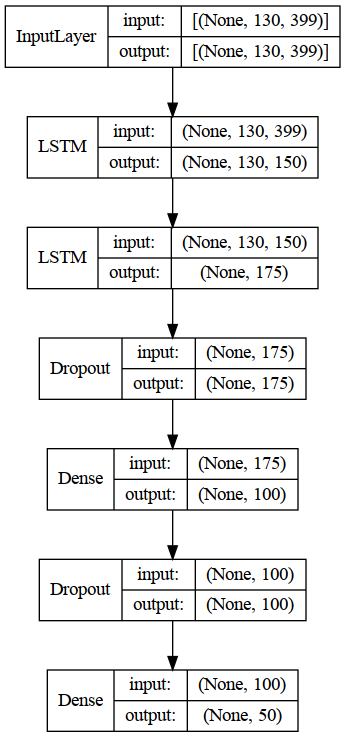

In [71]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

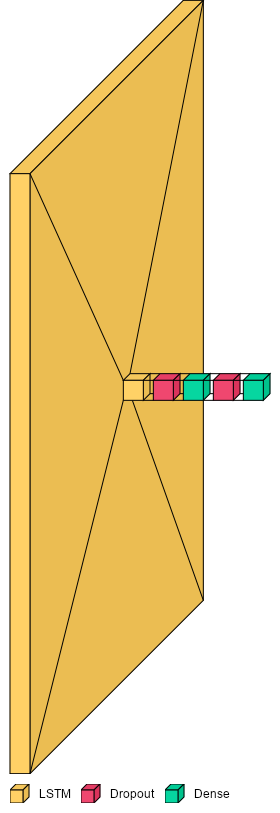

In [72]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [73]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.800     0.800     0.800        10
         BEE      0.667     0.400     0.500        10
        BELT      0.667     1.000     0.800         4
        BITE      0.667     0.250     0.364         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.667     0.667     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     1.000     1.000         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      0.875     0.875     0.875         8
         DOG      0.571    

In [74]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [75]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [89]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 9s 169ms/step - loss: 6.6922 - f1_score: 0.0132 - val_loss: 6.4883 - val_f1_score: 0.0011
Epoch 2/500
28/28 [==============================] - 4s 134ms/step - loss: 6.3104 - f1_score: 0.0107 - val_loss: 6.1154 - val_f1_score: 7.8947e-04
Epoch 3/500
28/28 [==============================] - 4s 133ms/step - loss: 5.9594 - f1_score: 0.0094 - val_loss: 5.7930 - val_f1_score: 0.0029
Epoch 4/500
28/28 [==============================] - 4s 134ms/step - loss: 5.6523 - f1_score: 0.0108 - val_loss: 5.5102 - val_f1_score: 0.0119
Epoch 5/500
28/28 [==============================] - 4s 132ms/step - loss: 5.3874 - f1_score: 0.0125 - val_loss: 5.2675 - val_f1_score: 0.0112
Epoch 6/500
28/28 [==============================] - 4s 134ms/step - loss: 5.1305 - f1_score: 0.0141 - val_loss: 5.0545 - val_f1_score: 0.0023
Epoch 7/500
28/28 [==============================] - 4s 132ms/step - loss: 4.8882 - f1_score: 0.0181 - v

Epoch 58/500
28/28 [==============================] - 4s 151ms/step - loss: 1.4964 - f1_score: 0.6462 - val_loss: 1.9307 - val_f1_score: 0.5243
Epoch 59/500
28/28 [==============================] - 4s 151ms/step - loss: 1.3733 - f1_score: 0.6782 - val_loss: 1.8980 - val_f1_score: 0.5483
Epoch 60/500
28/28 [==============================] - 4s 146ms/step - loss: 1.3991 - f1_score: 0.6673 - val_loss: 1.9934 - val_f1_score: 0.5366
Epoch 61/500
28/28 [==============================] - 4s 146ms/step - loss: 1.3518 - f1_score: 0.6849 - val_loss: 1.8365 - val_f1_score: 0.5510
Epoch 62/500
28/28 [==============================] - 4s 147ms/step - loss: 1.3611 - f1_score: 0.6860 - val_loss: 1.8659 - val_f1_score: 0.5435
Epoch 63/500
28/28 [==============================] - 4s 144ms/step - loss: 1.3112 - f1_score: 0.7002 - val_loss: 1.8231 - val_f1_score: 0.5410
Epoch 64/500
28/28 [==============================] - 4s 147ms/step - loss: 1.2603 - f1_score: 0.7260 - val_loss: 1.8188 - val_f1_score:

Epoch 115/500
28/28 [==============================] - 4s 144ms/step - loss: 1.0026 - f1_score: 0.7902 - val_loss: 2.0931 - val_f1_score: 0.5895
Epoch 116/500
28/28 [==============================] - 4s 144ms/step - loss: 0.7839 - f1_score: 0.8620 - val_loss: 2.0267 - val_f1_score: 0.5939
Epoch 117/500
28/28 [==============================] - 4s 148ms/step - loss: 0.6920 - f1_score: 0.8913 - val_loss: 1.9595 - val_f1_score: 0.5706
Epoch 118/500
28/28 [==============================] - 4s 146ms/step - loss: 0.6114 - f1_score: 0.9179 - val_loss: 2.1046 - val_f1_score: 0.5474
Epoch 119/500
28/28 [==============================] - 4s 151ms/step - loss: 0.6102 - f1_score: 0.9167 - val_loss: 2.0208 - val_f1_score: 0.6053
Epoch 120/500
28/28 [==============================] - 4s 147ms/step - loss: 0.5945 - f1_score: 0.9212 - val_loss: 1.9270 - val_f1_score: 0.6316
Epoch 121/500
28/28 [==============================] - 4s 151ms/step - loss: 0.6124 - f1_score: 0.9144 - val_loss: 2.0079 - val_f1

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 23s 832ms/step - loss: 0.5929 - f1_score: 0.9186 - val_loss: 1.8514 - val_f1_score: 0.6580
Epoch 146/500
28/28 [==============================] - 4s 137ms/step - loss: 0.4986 - f1_score: 0.9477 - val_loss: 1.9482 - val_f1_score: 0.6254
Epoch 147/500
28/28 [==============================] - 4s 139ms/step - loss: 0.4805 - f1_score: 0.9574 - val_loss: 1.9239 - val_f1_score: 0.6172
Epoch 148/500
28/28 [==============================] - 4s 140ms/step - loss: 0.4418 - f1_score: 0.9664 - val_loss: 1.9552 - val_f1_score: 0.6287
Epoch 149/500
28/28 [==============================] - 4s 143ms/step - loss: 0.4331 - f1_score: 0.9715 - val_loss: 2.0271 - val_f1_score: 0.6129
Epoch 150/500
28/28 [==============================] - 4s 144ms/step - loss: 0.4204 - f1_score: 0.9751 - val_loss: 2.0258 - val_f1_score: 0.6120
Epoch 151/500
28/28 [==============================] - 4s 143ms/step - loss: 0.4102 - f1_score: 0.9806 - val_loss: 2.0187 - val_f1_score: 0.615

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 21s 772ms/step - loss: 0.3883 - f1_score: 0.9771 - val_loss: 1.9893 - val_f1_score: 0.6591
Epoch 178/500
28/28 [==============================] - 4s 137ms/step - loss: 0.3923 - f1_score: 0.9746 - val_loss: 1.9714 - val_f1_score: 0.6506
Epoch 179/500
28/28 [==============================] - ETA: 0s - loss: 0.3709 - f1_score: 0.9829

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 22s 815ms/step - loss: 0.3709 - f1_score: 0.9829 - val_loss: 2.0222 - val_f1_score: 0.6631
Epoch 180/500
28/28 [==============================] - 4s 137ms/step - loss: 0.3579 - f1_score: 0.9858 - val_loss: 1.9827 - val_f1_score: 0.6529
Epoch 181/500
28/28 [==============================] - 4s 140ms/step - loss: 0.3680 - f1_score: 0.9834 - val_loss: 2.0773 - val_f1_score: 0.6362
Epoch 182/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3563 - f1_score: 0.9859 - val_loss: 2.0709 - val_f1_score: 0.6366
Epoch 183/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3444 - f1_score: 0.9924 - val_loss: 1.9720 - val_f1_score: 0.6565
Epoch 184/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3408 - f1_score: 0.9908 - val_loss: 2.1067 - val_f1_score: 0.6506
Epoch 185/500
28/28 [==============================] - ETA: 0s - loss: 0.3394 - f1_score: 0.9909

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 713ms/step - loss: 0.3394 - f1_score: 0.9909 - val_loss: 2.1049 - val_f1_score: 0.6634
Epoch 186/500
28/28 [==============================] - 4s 137ms/step - loss: 0.3792 - f1_score: 0.9757 - val_loss: 2.1270 - val_f1_score: 0.6378
Epoch 187/500
28/28 [==============================] - 4s 141ms/step - loss: 0.3661 - f1_score: 0.9784 - val_loss: 2.0814 - val_f1_score: 0.6466
Epoch 188/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3486 - f1_score: 0.9857 - val_loss: 2.1484 - val_f1_score: 0.6343
Epoch 189/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3453 - f1_score: 0.9837 - val_loss: 2.1974 - val_f1_score: 0.6184
Epoch 190/500
28/28 [==============================] - 4s 145ms/step - loss: 0.3589 - f1_score: 0.9809 - val_loss: 2.2863 - val_f1_score: 0.6290
Epoch 191/500
28/28 [==============================] - 4s 146ms/step - loss: 0.3939 - f1_score: 0.9701 - val_loss: 2.2273 - val_f1_score: 0.644

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 20s 749ms/step - loss: 0.4313 - f1_score: 0.9535 - val_loss: 2.0551 - val_f1_score: 0.6741
Epoch 212/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3784 - f1_score: 0.9745 - val_loss: 2.0925 - val_f1_score: 0.6162
Epoch 213/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3363 - f1_score: 0.9881 - val_loss: 1.9103 - val_f1_score: 0.6653
Epoch 214/500
28/28 [==============================] - 4s 143ms/step - loss: 0.3301 - f1_score: 0.9876 - val_loss: 2.1043 - val_f1_score: 0.6403
Epoch 215/500
28/28 [==============================] - 4s 148ms/step - loss: 0.4818 - f1_score: 0.9453 - val_loss: 2.4076 - val_f1_score: 0.5924
Epoch 216/500
28/28 [==============================] - 4s 145ms/step - loss: 0.6294 - f1_score: 0.8990 - val_loss: 2.3002 - val_f1_score: 0.6011
Epoch 217/500
28/28 [==============================] - 4s 144ms/step - loss: 0.4874 - f1_score: 0.9368 - val_loss: 2.0520 - val_f1_score: 0.647

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 19s 687ms/step - loss: 0.3500 - f1_score: 0.9810 - val_loss: 1.9713 - val_f1_score: 0.6803
Epoch 220/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3258 - f1_score: 0.9926 - val_loss: 1.9637 - val_f1_score: 0.6659
Epoch 221/500
28/28 [==============================] - ETA: 0s - loss: 0.3124 - f1_score: 0.9971

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 646ms/step - loss: 0.3124 - f1_score: 0.9971 - val_loss: 1.9239 - val_f1_score: 0.6850
Epoch 222/500
28/28 [==============================] - 4s 136ms/step - loss: 0.3110 - f1_score: 0.9938 - val_loss: 2.0078 - val_f1_score: 0.6704
Epoch 223/500
28/28 [==============================] - 4s 139ms/step - loss: 0.3062 - f1_score: 0.9962 - val_loss: 1.9924 - val_f1_score: 0.6754
Epoch 224/500
28/28 [==============================] - 4s 140ms/step - loss: 0.3000 - f1_score: 0.9962 - val_loss: 1.9979 - val_f1_score: 0.6758
Epoch 225/500
28/28 [==============================] - 4s 142ms/step - loss: 0.3013 - f1_score: 0.9942 - val_loss: 2.0185 - val_f1_score: 0.6709
Epoch 226/500
28/28 [==============================] - 4s 145ms/step - loss: 0.3021 - f1_score: 0.9919 - val_loss: 2.0773 - val_f1_score: 0.6572
Epoch 227/500
28/28 [==============================] - 4s 144ms/step - loss: 0.2970 - f1_score: 0.9954 - val_loss: 2.0855 - val_f1_score: 0.665

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 22s 801ms/step - loss: 0.2867 - f1_score: 0.9947 - val_loss: 1.9608 - val_f1_score: 0.6941
Epoch 270/500
28/28 [==============================] - 4s 138ms/step - loss: 0.2777 - f1_score: 0.9958 - val_loss: 1.9809 - val_f1_score: 0.6652
Epoch 271/500
28/28 [==============================] - 4s 143ms/step - loss: 0.2737 - f1_score: 0.9966 - val_loss: 1.9640 - val_f1_score: 0.6806
Epoch 272/500
28/28 [==============================] - 4s 146ms/step - loss: 0.2665 - f1_score: 0.9977 - val_loss: 1.9542 - val_f1_score: 0.6673
Epoch 273/500
28/28 [==============================] - 4s 143ms/step - loss: 0.2636 - f1_score: 0.9989 - val_loss: 1.8845 - val_f1_score: 0.6804
Epoch 274/500
28/28 [==============================] - ETA: 0s - loss: 0.2618 - f1_score: 0.9992

INFO:tensorflow:Assets written to: 2 LSTM/assets


INFO:tensorflow:Assets written to: 2 LSTM/assets


28/28 [==============================] - 18s 674ms/step - loss: 0.2618 - f1_score: 0.9992 - val_loss: 1.8845 - val_f1_score: 0.7144
Epoch 275/500
28/28 [==============================] - 4s 137ms/step - loss: 0.2617 - f1_score: 0.9972 - val_loss: 2.0680 - val_f1_score: 0.6533
Epoch 276/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2593 - f1_score: 0.9988 - val_loss: 2.1391 - val_f1_score: 0.6618
Epoch 277/500
28/28 [==============================] - 4s 144ms/step - loss: 0.2584 - f1_score: 0.9988 - val_loss: 2.0083 - val_f1_score: 0.6838
Epoch 278/500
28/28 [==============================] - 4s 146ms/step - loss: 0.2550 - f1_score: 0.9980 - val_loss: 1.9013 - val_f1_score: 0.6822
Epoch 279/500
28/28 [==============================] - 4s 142ms/step - loss: 0.2745 - f1_score: 0.9900 - val_loss: 2.3058 - val_f1_score: 0.6330
Epoch 280/500
28/28 [==============================] - 4s 145ms/step - loss: 0.3501 - f1_score: 0.9668 - val_loss: 2.5436 - val_f1_score: 0.582

28/28 [==============================] - 4s 148ms/step - loss: 0.2957 - f1_score: 0.9788 - val_loss: 1.9729 - val_f1_score: 0.6697
Epoch 387/500
28/28 [==============================] - 4s 144ms/step - loss: 0.3053 - f1_score: 0.9763 - val_loss: 2.4446 - val_f1_score: 0.6528
Epoch 388/500
28/28 [==============================] - 4s 147ms/step - loss: 0.3125 - f1_score: 0.9808 - val_loss: 2.0112 - val_f1_score: 0.6885
Epoch 389/500
28/28 [==============================] - 4s 148ms/step - loss: 0.3146 - f1_score: 0.9740 - val_loss: 2.1947 - val_f1_score: 0.6592
Epoch 390/500
28/28 [==============================] - 4s 148ms/step - loss: 0.2765 - f1_score: 0.9869 - val_loss: 1.9890 - val_f1_score: 0.6855
Epoch 391/500
28/28 [==============================] - 4s 148ms/step - loss: 0.2749 - f1_score: 0.9917 - val_loss: 1.8859 - val_f1_score: 0.7063
Epoch 392/500
28/28 [==============================] - 4s 146ms/step - loss: 0.3064 - f1_score: 0.9762 - val_loss: 2.0483 - val_f1_score: 0.6643

28/28 [==============================] - 4s 146ms/step - loss: 0.1937 - f1_score: 0.9996 - val_loss: 2.1236 - val_f1_score: 0.6691
Epoch 499/500
28/28 [==============================] - 4s 150ms/step - loss: 0.1924 - f1_score: 0.9992 - val_loss: 2.1090 - val_f1_score: 0.6774
Epoch 500/500
28/28 [==============================] - 4s 145ms/step - loss: 0.1920 - f1_score: 1.0000 - val_loss: 2.1286 - val_f1_score: 0.6739


In [90]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 2s 23ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.889     0.800     0.842        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     1.000     1.000         4
        BITE      0.800     0.500     0.615         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      1.000     0.500     0.667         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.462     1.000     0.632         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      0.857     1.000     0.923         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.167     0.167     0.167         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.429    

In [91]:
reconstructed_model = tf.keras.models.load_model("2 LSTM")

In [92]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 130, 150)          330000    
                                                                 
 lstm_5 (LSTM)               (None, 175)               228200    
                                                                 
 dropout_4 (Dropout)         (None, 175)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               17600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
Total params: 580,850
Trainable params: 580,850
Non-tr

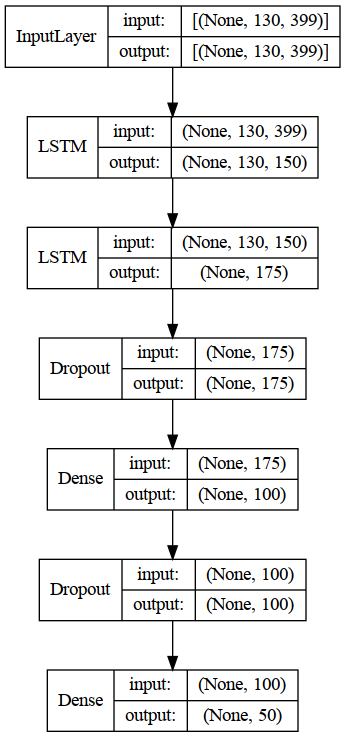

In [93]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

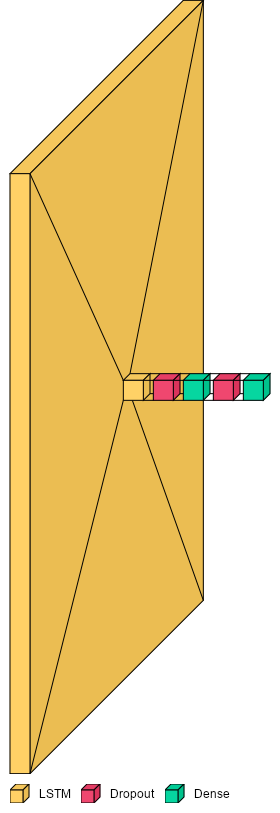

In [94]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [95]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [96]:
hist_df = pd.read_csv('2 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.197661  0.999659  2.134759      0.675145
496  0.196021  0.999220  2.128535      0.650186
497  0.193725  0.999565  2.123560      0.669113
498  0.192390  0.999185  2.109015      0.677445
499  0.191989  1.000000  2.128645      0.673940

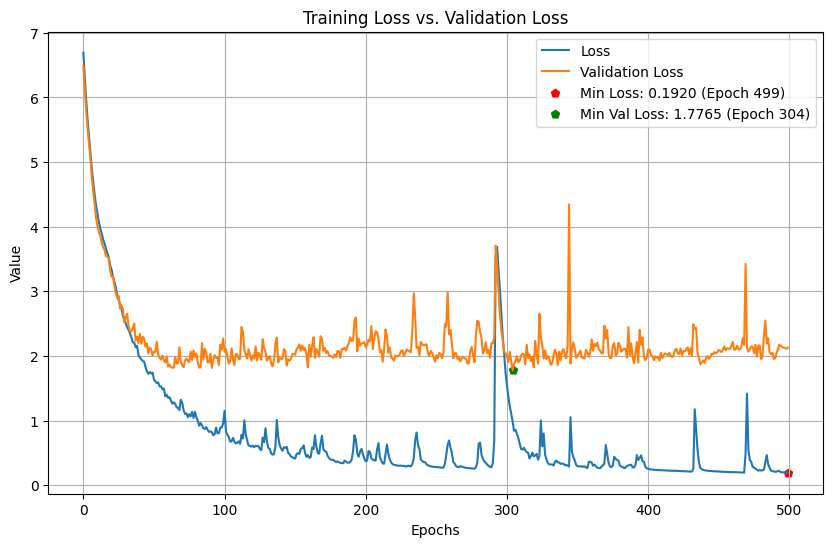

In [97]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

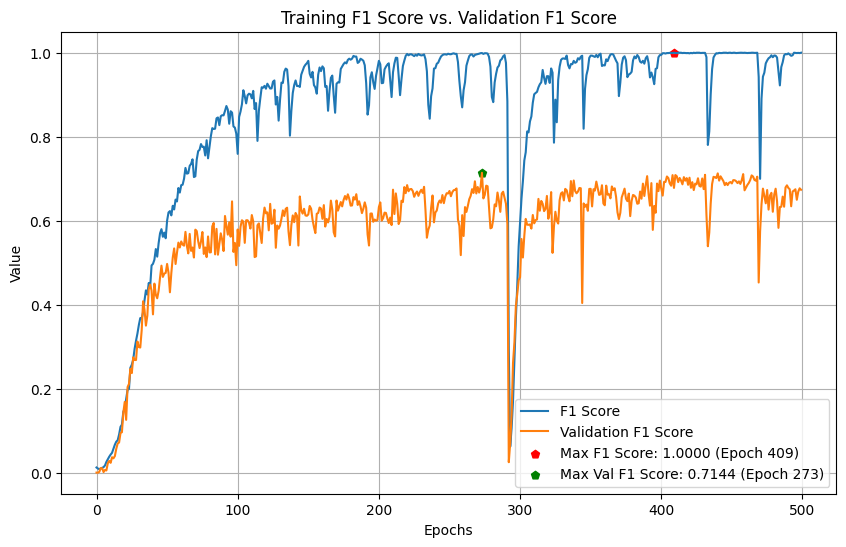

In [98]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [99]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 24ms/step - loss: 1.8845 - f1_score: 0.7144


[1.8845269680023193, 0.7143672108650208]

In [100]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 2s 25ms/step - loss: 0.2470 - f1_score: 0.9996


[0.24698594212532043, 0.9996124505996704]

In [101]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.667     0.400     0.500        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      1.000     1.000     1.000         6
      CANCER      0.625     0.625     0.625         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.455     0.833     0.588         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.444     0.667     0.533         6
      DECIDE      0.750     1.000     0.857         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.333     0.333     0.333         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.444    

## Hyperparameter Tuning 3 LSTM Layers

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'elu', 'gelu', 'relu'],
            default='relu')
        model = Sequential()

        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 input_shape=self.input_shape,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_1',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_2',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=True,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_2',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            LSTM(units=hp.Int('units_3',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer_3',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.65,
                step=0.05,
            )))
        #       model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_4',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))

        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0005)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_30212/3342621595.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='3_LSTM',
    overwrite=False)

2023-09-15 12:35:40.441715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 12:35:40.504721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'elu', 'gelu', 'relu'], 'ordered': False}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_1 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_2 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer_3 (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value':

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [124]:
tuner.search(Xtrain,
             Ytrain,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 23m 11s]
val_f1_score: 0.6041032373905182

Best val_f1_score So Far: 0.6909504234790802
Total elapsed time: 23h 44m 59s
INFO:tensorflow:Oracle triggered exit


In [125]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/3_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0599 summary
Hyperparameters:
dense_activation: mish
units_1: 150
regularizer_1: 0.0016614647302908507
units_2: 175
regularizer_2: 0.0003705676850262295
units_3: 150
regularizer_3: 0.00023323687715314648
dropout_1: 0.0
units_4: 110
dropout_2: 0.65
learning_rate: 0.0002598597527871886
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0596
Score: 0.6909504234790802

Trial 0598 summary
Hyperparameters:
dense_activation: gelu
units_1: 175
regularizer_1: 0.00222084508546812
units_2: 150
regularizer_2: 0.005097339455115072
units_3: 175
regularizer_3: 0.0019526565349868704
dropout_1: 0.15000000000000002
units_4: 100
dropout_2: 0.2
learning_rate: 0.00018769757435735312
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0593
Score: 0.6896192133426666

Tria

In [126]:
best_model = tuner.get_best_models(num_models=3)[0]

In [127]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 5s 117ms/step - loss: 1.9652 - f1_score: 0.6998


In [128]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 3s 34ms/step - loss: 0.2280 - f1_score: 0.9936


In [129]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 150)          330000    
                                                                 
 lstm_1 (LSTM)               (None, 130, 175)          228200    
                                                                 
 lstm_2 (LSTM)               (None, 150)               195600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 110)               16610     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5

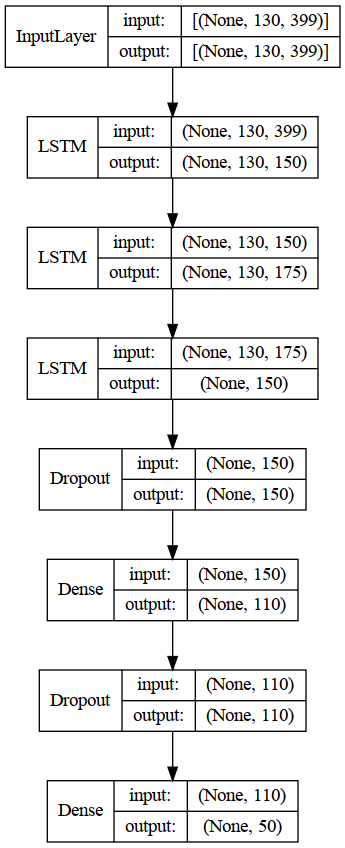

In [130]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

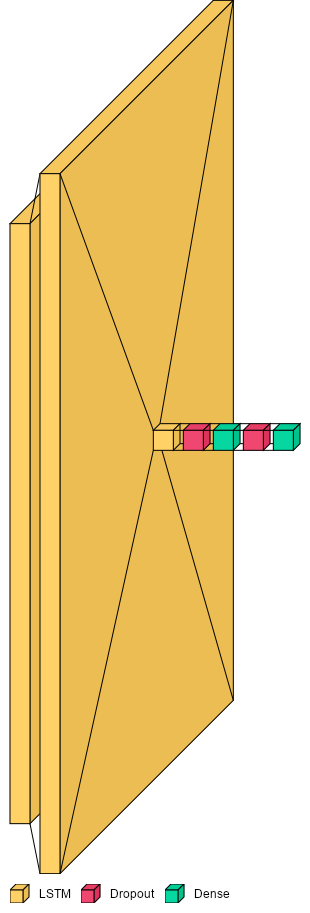

In [132]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 2s 30ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.875     0.933         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.818     0.900     0.857        10
         BEE      0.833     0.500     0.625        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      0.500     0.667     0.571         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.625     0.833     0.714         6
      DECIDE      0.750     1.000     0.857         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      0.667     0.500     0.571         8
         DOG      0.667    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [136]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.8239 - f1_score: 0.0174

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 43s 1s/step - loss: 4.8239 - f1_score: 0.0174 - val_loss: 4.7613 - val_f1_score: 9.6386e-04
Epoch 2/500
28/28 [==============================] - 5s 183ms/step - loss: 4.7106 - f1_score: 0.0166 - val_loss: 4.6446 - val_f1_score: 7.2727e-04
Epoch 3/500
28/28 [==============================] - 5s 184ms/step - loss: 4.6035 - f1_score: 0.0164 - val_loss: 4.5485 - val_f1_score: 7.2727e-04
Epoch 4/500
28/28 [==============================] - 5s 183ms/step - loss: 4.5129 - f1_score: 0.0152 - val_loss: 4.4676 - val_f1_score: 6.0377e-04
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.4330 - f1_score: 0.0154

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 798ms/step - loss: 4.4330 - f1_score: 0.0154 - val_loss: 4.3945 - val_f1_score: 0.0013
Epoch 6/500
28/28 [==============================] - 5s 182ms/step - loss: 4.3680 - f1_score: 0.0121 - val_loss: 4.3370 - val_f1_score: 6.6667e-04
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 4.3137 - f1_score: 0.0142

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 818ms/step - loss: 4.3137 - f1_score: 0.0142 - val_loss: 4.2826 - val_f1_score: 0.0036
Epoch 8/500
28/28 [==============================] - 5s 183ms/step - loss: 4.2591 - f1_score: 0.0193 - val_loss: 4.2367 - val_f1_score: 0.0012
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 4.2205 - f1_score: 0.0124

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 797ms/step - loss: 4.2205 - f1_score: 0.0124 - val_loss: 4.1917 - val_f1_score: 0.0042
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.1543 - f1_score: 0.0249

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 793ms/step - loss: 4.1543 - f1_score: 0.0249 - val_loss: 4.0667 - val_f1_score: 0.0071
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 4.0539 - f1_score: 0.0282

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 776ms/step - loss: 4.0539 - f1_score: 0.0282 - val_loss: 3.9551 - val_f1_score: 0.0113
Epoch 12/500
28/28 [==============================] - 5s 183ms/step - loss: 3.9477 - f1_score: 0.0289 - val_loss: 3.7876 - val_f1_score: 0.0101
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.8543 - f1_score: 0.0442

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 751ms/step - loss: 3.8543 - f1_score: 0.0442 - val_loss: 3.6621 - val_f1_score: 0.0150
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.8016 - f1_score: 0.0454

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 794ms/step - loss: 3.8016 - f1_score: 0.0454 - val_loss: 3.6690 - val_f1_score: 0.0314
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.7123 - f1_score: 0.0550

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 741ms/step - loss: 3.7123 - f1_score: 0.0550 - val_loss: 3.5005 - val_f1_score: 0.0343
Epoch 16/500
28/28 [==============================] - 5s 183ms/step - loss: 3.6339 - f1_score: 0.0688 - val_loss: 3.4893 - val_f1_score: 0.0235
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.5842 - f1_score: 0.0541

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 783ms/step - loss: 3.5842 - f1_score: 0.0541 - val_loss: 3.3154 - val_f1_score: 0.0538
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.5041 - f1_score: 0.0772

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 779ms/step - loss: 3.5041 - f1_score: 0.0772 - val_loss: 3.2777 - val_f1_score: 0.0609
Epoch 19/500
28/28 [==============================] - 5s 183ms/step - loss: 3.4339 - f1_score: 0.0913 - val_loss: 3.3357 - val_f1_score: 0.0533
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.3540 - f1_score: 0.1035

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 734ms/step - loss: 3.3540 - f1_score: 0.1035 - val_loss: 3.0837 - val_f1_score: 0.0901
Epoch 21/500
28/28 [==============================] - 5s 182ms/step - loss: 3.2652 - f1_score: 0.1087 - val_loss: 3.0649 - val_f1_score: 0.0873
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 3.1500 - f1_score: 0.1333

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 59s 2s/step - loss: 3.1500 - f1_score: 0.1333 - val_loss: 2.9674 - val_f1_score: 0.1390
Epoch 23/500
28/28 [==============================] - 5s 181ms/step - loss: 3.1549 - f1_score: 0.1364 - val_loss: 3.0694 - val_f1_score: 0.0841
Epoch 24/500
28/28 [==============================] - 5s 182ms/step - loss: 3.0941 - f1_score: 0.1535 - val_loss: 2.8829 - val_f1_score: 0.1372
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.9547 - f1_score: 0.1674

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 787ms/step - loss: 2.9547 - f1_score: 0.1674 - val_loss: 2.8724 - val_f1_score: 0.1454
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.9073 - f1_score: 0.1805

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 708ms/step - loss: 2.9073 - f1_score: 0.1805 - val_loss: 2.8033 - val_f1_score: 0.1532
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.8401 - f1_score: 0.1891

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 28s 1s/step - loss: 2.8401 - f1_score: 0.1891 - val_loss: 2.7577 - val_f1_score: 0.1819
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 2.7680 - f1_score: 0.2150

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 19s 716ms/step - loss: 2.7680 - f1_score: 0.2150 - val_loss: 2.6553 - val_f1_score: 0.1927
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.7692 - f1_score: 0.2171

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 746ms/step - loss: 2.7692 - f1_score: 0.2171 - val_loss: 2.6901 - val_f1_score: 0.2057
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.6641 - f1_score: 0.2365

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 767ms/step - loss: 2.6641 - f1_score: 0.2365 - val_loss: 2.5537 - val_f1_score: 0.2253
Epoch 31/500
28/28 [==============================] - 5s 183ms/step - loss: 2.6304 - f1_score: 0.2398 - val_loss: 2.7380 - val_f1_score: 0.1414
Epoch 32/500
28/28 [==============================] - 5s 182ms/step - loss: 2.5566 - f1_score: 0.2647 - val_loss: 2.5115 - val_f1_score: 0.2157
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.5121 - f1_score: 0.2657

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 787ms/step - loss: 2.5121 - f1_score: 0.2657 - val_loss: 2.4419 - val_f1_score: 0.2712
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.4608 - f1_score: 0.2925

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 31s 1s/step - loss: 2.4608 - f1_score: 0.2925 - val_loss: 2.3671 - val_f1_score: 0.2833
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.4141 - f1_score: 0.2985

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 716ms/step - loss: 2.4141 - f1_score: 0.2985 - val_loss: 2.5190 - val_f1_score: 0.2978
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.4198 - f1_score: 0.2955

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 776ms/step - loss: 2.4198 - f1_score: 0.2955 - val_loss: 2.2836 - val_f1_score: 0.3006
Epoch 37/500
28/28 [==============================] - 5s 183ms/step - loss: 2.2946 - f1_score: 0.3370 - val_loss: 2.4156 - val_f1_score: 0.2929
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.2616 - f1_score: 0.3423

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 767ms/step - loss: 2.2616 - f1_score: 0.3423 - val_loss: 2.1982 - val_f1_score: 0.3692
Epoch 39/500
28/28 [==============================] - 5s 183ms/step - loss: 2.2100 - f1_score: 0.3507 - val_loss: 2.3341 - val_f1_score: 0.2910
Epoch 40/500
28/28 [==============================] - 5s 182ms/step - loss: 2.1805 - f1_score: 0.3746 - val_loss: 2.2777 - val_f1_score: 0.3241
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.1089 - f1_score: 0.3822

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 779ms/step - loss: 2.1089 - f1_score: 0.3822 - val_loss: 2.1905 - val_f1_score: 0.3748
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.0342 - f1_score: 0.4235

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 816ms/step - loss: 2.0342 - f1_score: 0.4235 - val_loss: 2.1219 - val_f1_score: 0.4148
Epoch 43/500
28/28 [==============================] - 5s 182ms/step - loss: 1.9939 - f1_score: 0.4149 - val_loss: 2.0518 - val_f1_score: 0.3881
Epoch 44/500
28/28 [==============================] - 5s 183ms/step - loss: 1.9276 - f1_score: 0.4474 - val_loss: 2.1304 - val_f1_score: 0.4133
Epoch 45/500
28/28 [==============================] - 5s 186ms/step - loss: 1.9082 - f1_score: 0.4430 - val_loss: 2.0953 - val_f1_score: 0.3956
Epoch 46/500
28/28 [==============================] - ETA: 0s - loss: 1.8672 - f1_score: 0.4643

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 784ms/step - loss: 1.8672 - f1_score: 0.4643 - val_loss: 1.9710 - val_f1_score: 0.4250
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.7940 - f1_score: 0.4741

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 837ms/step - loss: 1.7940 - f1_score: 0.4741 - val_loss: 1.9134 - val_f1_score: 0.4453
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 1.7753 - f1_score: 0.4903

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 20s 726ms/step - loss: 1.7753 - f1_score: 0.4903 - val_loss: 1.9412 - val_f1_score: 0.4568
Epoch 49/500
28/28 [==============================] - 5s 182ms/step - loss: 1.6879 - f1_score: 0.5302 - val_loss: 1.9211 - val_f1_score: 0.4172
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.6321 - f1_score: 0.5333

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 851ms/step - loss: 1.6321 - f1_score: 0.5333 - val_loss: 1.9356 - val_f1_score: 0.4642
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 1.6119 - f1_score: 0.5378

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 22s 805ms/step - loss: 1.6119 - f1_score: 0.5378 - val_loss: 1.9338 - val_f1_score: 0.4812
Epoch 52/500
28/28 [==============================] - 5s 183ms/step - loss: 1.6150 - f1_score: 0.5270 - val_loss: 2.0188 - val_f1_score: 0.4159
Epoch 53/500
28/28 [==============================] - 5s 183ms/step - loss: 1.6211 - f1_score: 0.5428 - val_loss: 2.0480 - val_f1_score: 0.4255
Epoch 54/500
28/28 [==============================] - 5s 185ms/step - loss: 1.4986 - f1_score: 0.5776 - val_loss: 1.9191 - val_f1_score: 0.4800
Epoch 55/500
28/28 [==============================] - 5s 186ms/step - loss: 1.5065 - f1_score: 0.5793 - val_loss: 2.0482 - val_f1_score: 0.4616
Epoch 56/500
28/28 [==============================] - 5s 187ms/step - loss: 1.4930 - f1_score: 0.5820 - val_loss: 1.9988 - val_f1_score: 0.4505
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 1.4171 - f1_score: 0.6029

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 833ms/step - loss: 1.4171 - f1_score: 0.6029 - val_loss: 1.7735 - val_f1_score: 0.5090
Epoch 58/500
28/28 [==============================] - 5s 183ms/step - loss: 1.3919 - f1_score: 0.6222 - val_loss: 1.8237 - val_f1_score: 0.4818
Epoch 59/500
28/28 [==============================] - 5s 185ms/step - loss: 1.3995 - f1_score: 0.6086 - val_loss: 1.8955 - val_f1_score: 0.4696
Epoch 60/500
28/28 [==============================] - 5s 187ms/step - loss: 1.3540 - f1_score: 0.6254 - val_loss: 1.8882 - val_f1_score: 0.4726
Epoch 61/500
28/28 [==============================] - ETA: 0s - loss: 1.3038 - f1_score: 0.6347

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 859ms/step - loss: 1.3038 - f1_score: 0.6347 - val_loss: 1.7626 - val_f1_score: 0.5451
Epoch 62/500
28/28 [==============================] - 5s 183ms/step - loss: 1.3776 - f1_score: 0.6217 - val_loss: 1.9652 - val_f1_score: 0.4851
Epoch 63/500
28/28 [==============================] - 5s 185ms/step - loss: 1.3797 - f1_score: 0.6117 - val_loss: 1.7972 - val_f1_score: 0.5292
Epoch 64/500
28/28 [==============================] - 5s 186ms/step - loss: 1.2608 - f1_score: 0.6433 - val_loss: 1.8525 - val_f1_score: 0.5030
Epoch 65/500
28/28 [==============================] - 5s 189ms/step - loss: 1.1585 - f1_score: 0.6881 - val_loss: 1.8145 - val_f1_score: 0.4979
Epoch 66/500
28/28 [==============================] - 5s 189ms/step - loss: 1.1913 - f1_score: 0.6686 - val_loss: 1.9964 - val_f1_score: 0.4673
Epoch 67/500
28/28 [==============================] - 5s 189ms/step - loss: 1.2166 - f1_score: 0.6733 - val_loss: 1.8654 - val_f1_score: 0.5217
Epoc

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 905ms/step - loss: 1.0558 - f1_score: 0.7172 - val_loss: 1.6548 - val_f1_score: 0.5808
Epoch 70/500
28/28 [==============================] - 5s 183ms/step - loss: 0.9964 - f1_score: 0.7417 - val_loss: 1.6889 - val_f1_score: 0.5460
Epoch 71/500
28/28 [==============================] - 5s 185ms/step - loss: 1.0165 - f1_score: 0.7283 - val_loss: 1.7502 - val_f1_score: 0.5495
Epoch 72/500
28/28 [==============================] - 5s 188ms/step - loss: 0.9641 - f1_score: 0.7557 - val_loss: 1.7393 - val_f1_score: 0.5272
Epoch 73/500
28/28 [==============================] - 5s 189ms/step - loss: 0.9545 - f1_score: 0.7499 - val_loss: 1.7541 - val_f1_score: 0.5574
Epoch 74/500
28/28 [==============================] - 5s 193ms/step - loss: 0.8882 - f1_score: 0.7768 - val_loss: 1.9400 - val_f1_score: 0.5201
Epoch 75/500
28/28 [==============================] - 5s 190ms/step - loss: 0.9141 - f1_score: 0.7604 - val_loss: 1.8178 - val_f1_score: 0.5485
Epoc

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 909ms/step - loss: 0.6756 - f1_score: 0.8466 - val_loss: 1.7691 - val_f1_score: 0.5836
Epoch 90/500
28/28 [==============================] - 5s 184ms/step - loss: 0.6809 - f1_score: 0.8418 - val_loss: 1.6813 - val_f1_score: 0.5745
Epoch 91/500
28/28 [==============================] - 5s 188ms/step - loss: 0.6753 - f1_score: 0.8411 - val_loss: 1.7622 - val_f1_score: 0.5790
Epoch 92/500
28/28 [==============================] - ETA: 0s - loss: 0.6057 - f1_score: 0.8637

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 21s 778ms/step - loss: 0.6057 - f1_score: 0.8637 - val_loss: 1.7478 - val_f1_score: 0.5899
Epoch 93/500
28/28 [==============================] - 5s 184ms/step - loss: 0.5834 - f1_score: 0.8724 - val_loss: 1.8933 - val_f1_score: 0.5515
Epoch 94/500
28/28 [==============================] - 5s 187ms/step - loss: 0.5823 - f1_score: 0.8743 - val_loss: 1.8281 - val_f1_score: 0.5766
Epoch 95/500
28/28 [==============================] - 5s 190ms/step - loss: 0.5301 - f1_score: 0.8992 - val_loss: 1.8223 - val_f1_score: 0.5767
Epoch 96/500
28/28 [==============================] - 5s 192ms/step - loss: 1.1585 - f1_score: 0.7253 - val_loss: 2.0529 - val_f1_score: 0.5006
Epoch 97/500
28/28 [==============================] - 5s 192ms/step - loss: 0.7547 - f1_score: 0.8127 - val_loss: 1.8933 - val_f1_score: 0.5396
Epoch 98/500
28/28 [==============================] - 5s 192ms/step - loss: 0.7102 - f1_score: 0.8276 - val_loss: 1.8422 - val_f1_score: 0.5446
Epoc

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 924ms/step - loss: 0.3856 - f1_score: 0.9400 - val_loss: 1.7469 - val_f1_score: 0.6055
Epoch 114/500
28/28 [==============================] - 5s 186ms/step - loss: 0.3837 - f1_score: 0.9420 - val_loss: 1.9399 - val_f1_score: 0.5647
Epoch 115/500
28/28 [==============================] - ETA: 0s - loss: 0.3612 - f1_score: 0.9476

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 835ms/step - loss: 0.3612 - f1_score: 0.9476 - val_loss: 1.8364 - val_f1_score: 0.6224
Epoch 116/500
28/28 [==============================] - 5s 184ms/step - loss: 0.4040 - f1_score: 0.9358 - val_loss: 2.0500 - val_f1_score: 0.5763
Epoch 117/500
28/28 [==============================] - 5s 188ms/step - loss: 0.3955 - f1_score: 0.9345 - val_loss: 2.1048 - val_f1_score: 0.5702
Epoch 118/500
28/28 [==============================] - 5s 189ms/step - loss: 0.4464 - f1_score: 0.9195 - val_loss: 2.0203 - val_f1_score: 0.5739
Epoch 119/500
28/28 [==============================] - 5s 192ms/step - loss: 0.4845 - f1_score: 0.9023 - val_loss: 2.0460 - val_f1_score: 0.5504
Epoch 120/500
28/28 [==============================] - 5s 192ms/step - loss: 0.4205 - f1_score: 0.9224 - val_loss: 1.9993 - val_f1_score: 0.5793
Epoch 121/500
28/28 [==============================] - 5s 193ms/step - loss: 0.3984 - f1_score: 0.9324 - val_loss: 2.0069 - val_f1_score: 0.564

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 23s 853ms/step - loss: 0.2746 - f1_score: 0.9701 - val_loss: 2.0347 - val_f1_score: 0.6238
Epoch 136/500
28/28 [==============================] - 5s 185ms/step - loss: 0.3659 - f1_score: 0.9410 - val_loss: 2.1614 - val_f1_score: 0.5963
Epoch 137/500
28/28 [==============================] - 5s 188ms/step - loss: 0.3907 - f1_score: 0.9298 - val_loss: 2.2206 - val_f1_score: 0.5656
Epoch 138/500
28/28 [==============================] - 5s 191ms/step - loss: 0.3869 - f1_score: 0.9324 - val_loss: 2.4314 - val_f1_score: 0.5517
Epoch 139/500
28/28 [==============================] - 5s 192ms/step - loss: 0.4410 - f1_score: 0.9197 - val_loss: 2.1546 - val_f1_score: 0.5657
Epoch 140/500
28/28 [==============================] - 5s 194ms/step - loss: 0.3393 - f1_score: 0.9491 - val_loss: 1.9496 - val_f1_score: 0.6117
Epoch 141/500
28/28 [==============================] - 5s 193ms/step - loss: 0.2735 - f1_score: 0.9691 - val_loss: 2.1032 - val_f1_score: 0.602

INFO:tensorflow:Assets written to: 3 LSTM/assets


INFO:tensorflow:Assets written to: 3 LSTM/assets


28/28 [==============================] - 25s 926ms/step - loss: 0.5055 - f1_score: 0.9082 - val_loss: 1.9338 - val_f1_score: 0.6529
Epoch 164/500
28/28 [==============================] - 5s 186ms/step - loss: 0.4817 - f1_score: 0.9130 - val_loss: 2.1347 - val_f1_score: 0.5785
Epoch 165/500
28/28 [==============================] - 5s 188ms/step - loss: 0.3075 - f1_score: 0.9558 - val_loss: 2.3287 - val_f1_score: 0.5806
Epoch 166/500
28/28 [==============================] - 5s 192ms/step - loss: 0.3126 - f1_score: 0.9579 - val_loss: 2.2517 - val_f1_score: 0.6002
Epoch 167/500
28/28 [==============================] - 5s 192ms/step - loss: 0.2353 - f1_score: 0.9808 - val_loss: 2.2368 - val_f1_score: 0.6095
Epoch 168/500
28/28 [==============================] - 5s 194ms/step - loss: 0.2521 - f1_score: 0.9728 - val_loss: 2.4083 - val_f1_score: 0.5660
Epoch 169/500
28/28 [==============================] - 5s 193ms/step - loss: 0.2414 - f1_score: 0.9769 - val_loss: 2.2016 - val_f1_score: 0.588

28/28 [==============================] - 6s 200ms/step - loss: 0.1731 - f1_score: 0.9920 - val_loss: 2.2821 - val_f1_score: 0.6125
Epoch 276/500
28/28 [==============================] - 6s 200ms/step - loss: 0.1592 - f1_score: 0.9970 - val_loss: 2.3349 - val_f1_score: 0.6110
Epoch 277/500
28/28 [==============================] - 6s 199ms/step - loss: 0.1513 - f1_score: 0.9996 - val_loss: 2.3362 - val_f1_score: 0.6146
Epoch 278/500
28/28 [==============================] - 6s 198ms/step - loss: 0.1482 - f1_score: 0.9977 - val_loss: 2.3900 - val_f1_score: 0.6203
Epoch 279/500
28/28 [==============================] - 5s 196ms/step - loss: 0.1430 - f1_score: 0.9993 - val_loss: 2.4037 - val_f1_score: 0.6155
Epoch 280/500
28/28 [==============================] - 5s 196ms/step - loss: 0.1418 - f1_score: 0.9992 - val_loss: 2.4165 - val_f1_score: 0.6299
Epoch 281/500
28/28 [==============================] - 5s 196ms/step - loss: 0.1422 - f1_score: 0.9966 - val_loss: 2.4027 - val_f1_score: 0.6386

28/28 [==============================] - 6s 198ms/step - loss: 0.0999 - f1_score: 1.0000 - val_loss: 2.8137 - val_f1_score: 0.6241
Epoch 388/500
28/28 [==============================] - 6s 198ms/step - loss: 0.1002 - f1_score: 0.9993 - val_loss: 2.8151 - val_f1_score: 0.6382
Epoch 389/500
28/28 [==============================] - 6s 197ms/step - loss: 0.0982 - f1_score: 0.9996 - val_loss: 2.8276 - val_f1_score: 0.6403
Epoch 390/500
28/28 [==============================] - 6s 199ms/step - loss: 0.1028 - f1_score: 0.9984 - val_loss: 3.1298 - val_f1_score: 0.5881
Epoch 391/500
28/28 [==============================] - 6s 198ms/step - loss: 2.9789 - f1_score: 0.5425 - val_loss: 3.2998 - val_f1_score: 0.2975
Epoch 392/500
28/28 [==============================] - 6s 201ms/step - loss: 1.6141 - f1_score: 0.5650 - val_loss: 2.1472 - val_f1_score: 0.4759
Epoch 393/500
28/28 [==============================] - 6s 198ms/step - loss: 0.7693 - f1_score: 0.8103 - val_loss: 1.9364 - val_f1_score: 0.5480

28/28 [==============================] - 6s 197ms/step - loss: 0.1017 - f1_score: 1.0000 - val_loss: 2.5048 - val_f1_score: 0.6203
Epoch 500/500
28/28 [==============================] - 5s 197ms/step - loss: 0.1014 - f1_score: 1.0000 - val_loss: 2.5211 - val_f1_score: 0.6223


In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 30ms/step
              precision    recall  f1-score   support

         AXE      0.778     0.875     0.824         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.600     0.300     0.400        10
        BELT      0.667     1.000     0.800         4
        BITE      0.571     0.500     0.533         8
   BREAKFAST      0.333     0.500     0.400         6
      CANCER      0.600     0.750     0.667         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.500     0.833     0.625         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.375     0.500     0.429         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.889     1.000     0.941         8
     DEVELOP      0.500     0.667     0.571         6
      DINNER      1.000     0.625     0.769         8
         DOG      0.571    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '3 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [139]:
hist_df = pd.read_csv('3 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.103536       1.0  2.424316      0.615422
496  0.103385       1.0  2.455749      0.624529
497  0.102776       1.0  2.526179      0.619446
498  0.101666       1.0  2.504849      0.620275
499  0.101413       1.0  2.521060      0.622308

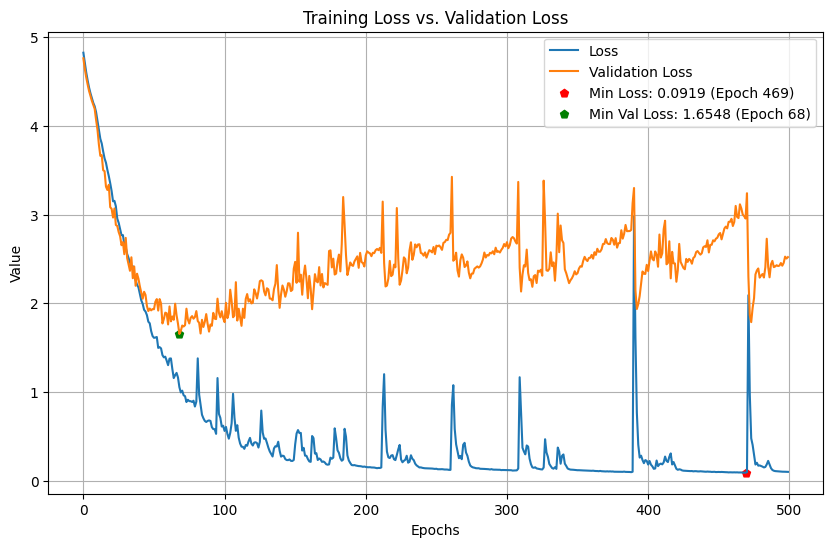

In [140]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

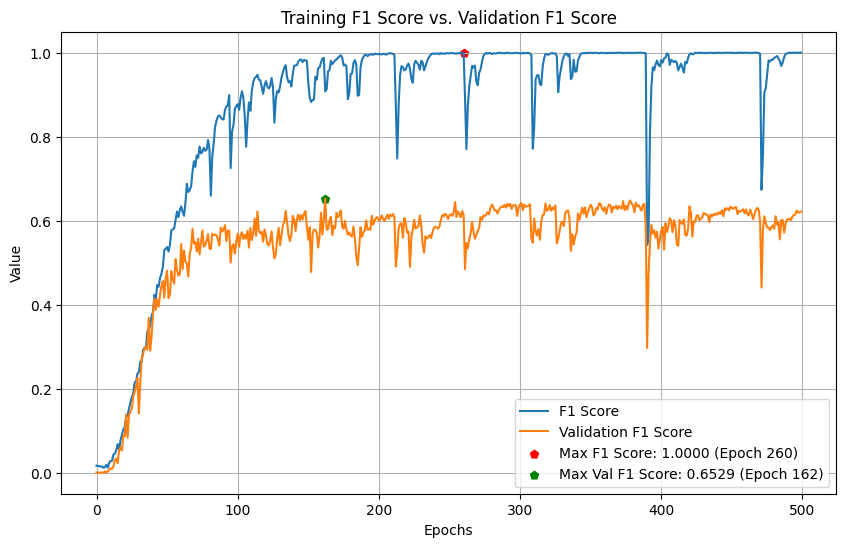

In [141]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [142]:
reconstructed_model = tf.keras.models.load_model("3 LSTM")

In [143]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 130, 150)          330000    
                                                                 
 lstm_4 (LSTM)               (None, 130, 175)          228200    
                                                                 
 lstm_5 (LSTM)               (None, 150)               195600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               16610     
                                                                 
 dropout_3 (Dropout)         (None, 110)               0         
                                                                 
 dense_3 (Dense)             (None, 50)               

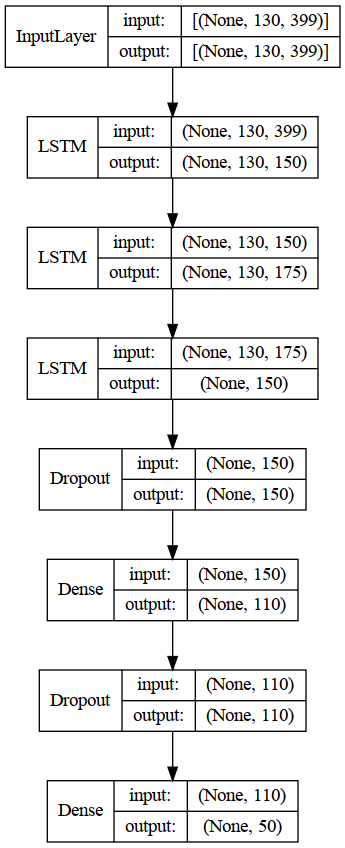

In [144]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [145]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 32ms/step - loss: 1.9338 - f1_score: 0.6529


[1.9338433742523193, 0.6529363989830017]

In [146]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 3s 34ms/step - loss: 0.3059 - f1_score: 0.9486


[0.3058566749095917, 0.9486328363418579]

In [147]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.800     0.667     0.727         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.800     0.400     0.533        10
        BELT      1.000     1.000     1.000         4
        BITE      0.625     0.625     0.625         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      0.583     0.875     0.700         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.500     0.667     0.571         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.500     0.667     0.571         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.500     0.500     0.500         6
      DINNER      0.875     0.875     0.875         8
         DOG      0.333    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning 1 1D CNN Layer

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                default=2,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.75,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=90),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.5,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0032857440370174544)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_1960703/3060645919.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='1_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_1D_CNN/tuner0.json


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 'min_value': 70, 'max_value': 120, 'step': 10, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0032857440370174544, 'conditions': [], 'min_value': 0.0001, 'max_value'

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [123]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 09m 42s]
val_f1_score: 0.29337821900844574

Best val_f1_score So Far: 0.44099260866642
Total elapsed time: 07h 52m 41s
INFO:tensorflow:Oracle triggered exit


In [123]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0670 summary
Hyperparameters:
dense_activation: selu
filters_1: 150
kernel_1: 4
pool_1: 7
dropout_1: 0.2
units_2: 90
dropout_2: 0.8
learning_rate: 0.0005976783923870351
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0667
Score: 0.44099260866642

Trial 0671 summary
Hyperparameters:
dense_activation: elu
filters_1: 50
kernel_1: 10
pool_1: 7
dropout_1: 0.25
units_2: 120
dropout_2: 0.8
learning_rate: 0.001273875001513303
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0669
Score: 0.4313937574625015

Trial 0599 summary
Hyperparameters:
dense_activation: elu
filters_1: 75
kernel_1: 4
pool_1: 8
dropout_1: 0.05
units_2: 110
dropout_2: 0.6000000000000001
learning_rate: 0.002112765859059582
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 4

In [125]:
best_model = tuner.get_best_models(num_models=1)[0]

In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 150)          239550    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 150)           0         
                                                                 
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 90)                243090    
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

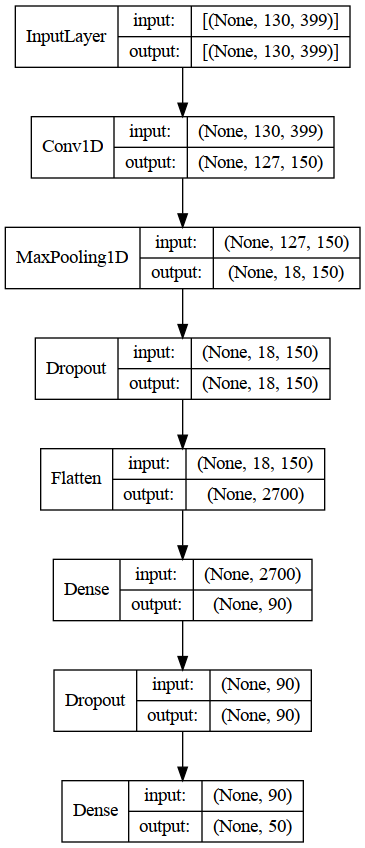

In [127]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

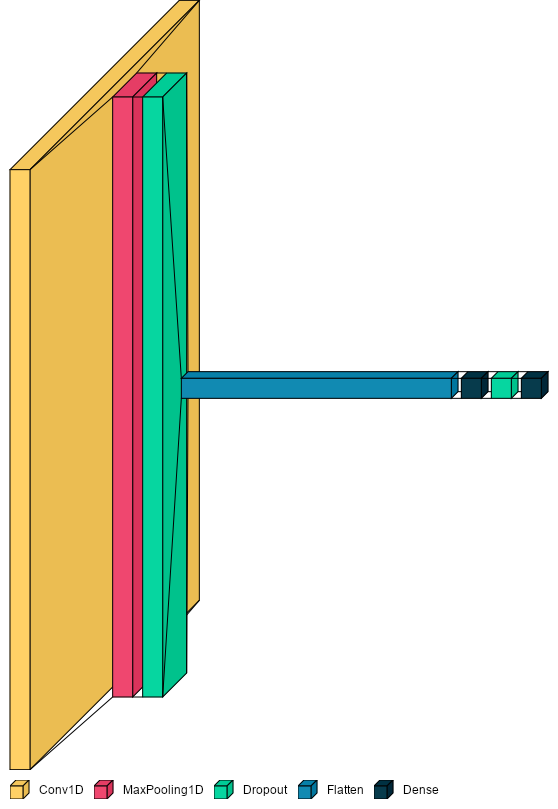

In [128]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [129]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 20ms/step - loss: 2.2785 - f1_score: 0.4443


In [130]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 11ms/step - loss: 0.4082 - f1_score: 0.9491


In [131]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.375     0.500         8
    BACKPACK      0.500     0.500     0.500         6
  BASKETBALL      0.667     0.600     0.632        10
         BEE      0.400     0.200     0.267        10
        BELT      1.000     1.000     1.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.750     0.500     0.600         6
      CANCER      0.833     0.625     0.714         8
   CHRISTMAS      0.250     0.167     0.200         6
    CONFUSED      0.000     0.000     0.000         6
        DARK      0.667     0.500     0.571         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      0.375     0.375     0.375         8
     DEVELOP      0.111     0.167     0.133         6
      DINNER      0.714     0.625     0.667         8
         DOG      0.750     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [124]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [126]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...


2023-09-14 23:47:46.387531: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-14 23:47:56.648097: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 529.50MiB (rounded to 555216640)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-09-14 23:47:56.648134: I tensorflow/core/common_runtime/bfc_allocator.cc:1033] BFCAllocator dump for GPU_0_bfc
2023-09-14 23:47:56.648142: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (256): 	Total Chunks: 47, Chunks in use: 47. 11.8KiB allocated for chunks. 11.8KiB in use in bin. 2.5KiB client-requested in use in bin.
2023-09-14 23:47:56.648146: I tensorflow/core/common_runtime/bfc_allocator.cc:1040] Bin (512): 	Total Chunks: 

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      0.058     0.375     0.100         8
    BACKPACK      0.000     0.000     0.000         6
  BASKETBALL      0.000     0.000     0.000        10
         BEE      0.023     0.100     0.038        10
        BELT      0.000     0.000     0.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.000     0.000     0.000         8
   CHRISTMAS      0.000     0.000     0.000         6
    CONFUSED      0.000     0.000     0.000         6
        DARK      0.000     0.000     0.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.000     0.000     0.000         6
      DEMAND      0.000     0.000     0.000         8
     DEVELOP      0.000     0.000     0.000         6
      DINNER      0.016     0.375     0.030         8
         DOG      0.000     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1DCNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [128]:
hist_df = pd.read_csv('1 1DCNN/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.436177  0.859061  3.552348      0.390553
496  0.493882  0.839884  3.623430      0.410118
497  0.486451  0.835061  3.719245      0.396905
498  0.439246  0.850907  3.524067      0.391212
499  0.479134  0.842514  3.654266      0.368043

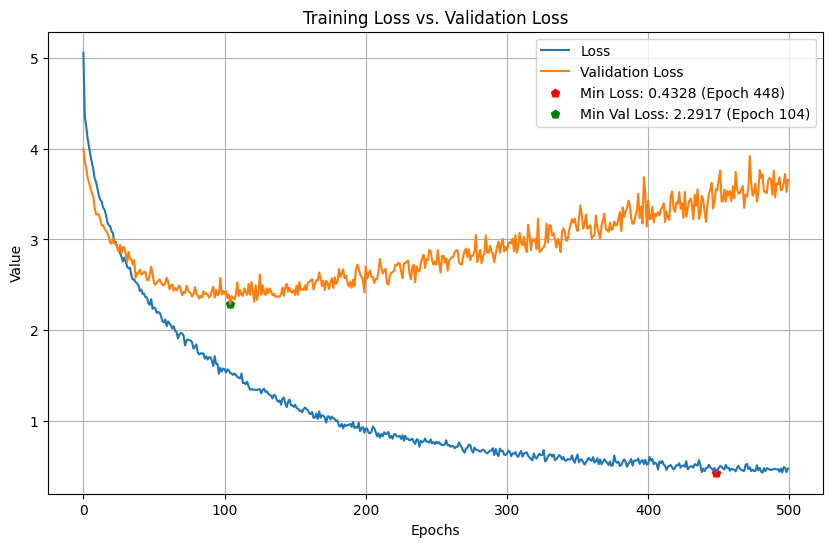

In [129]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

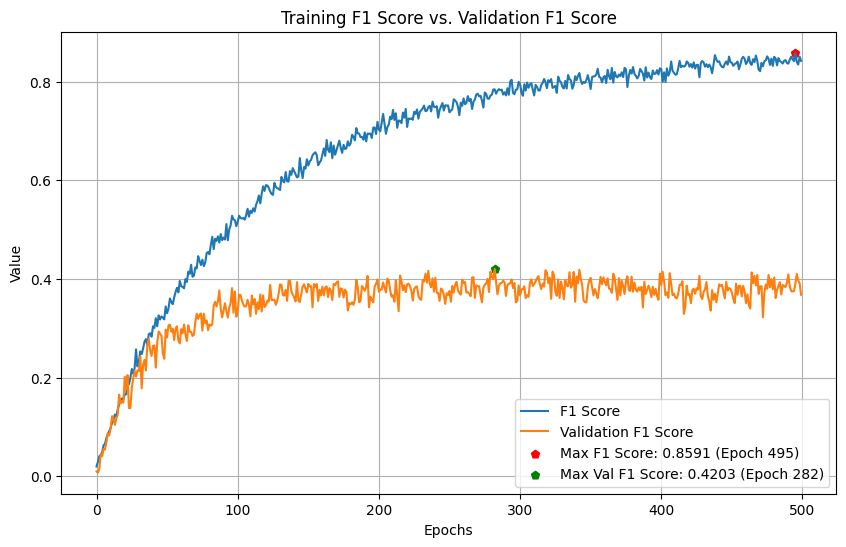

In [130]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [120]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN")

2023-09-15 12:33:12.994407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 12:33:13.072810: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [132]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 150)          239550    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 150)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 150)           0         
                                                                 
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 90)                243090    
                                                                 
 dropout_1 (Dropout)         (None, 90)                0         
                                                        

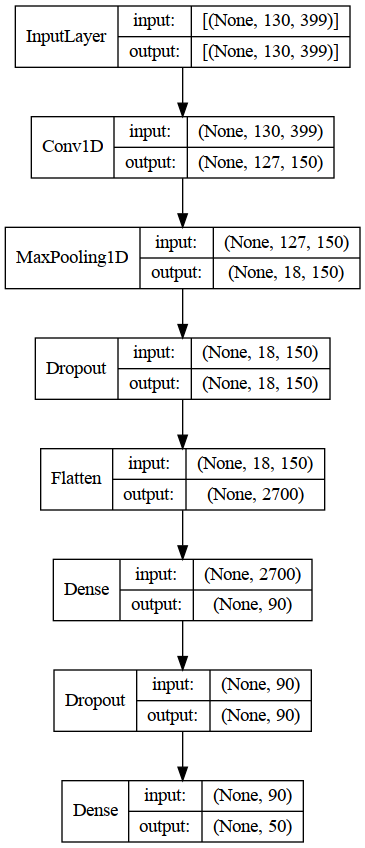

In [133]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [134]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 12ms/step - loss: 2.7388 - f1_score: 0.4203


[2.7387735843658447, 0.42028117179870605]

In [135]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-14 23:50:01.566405: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-14 23:50:02.082902: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 9ms/step - loss: 0.0302 - f1_score: 0.9996


[0.030212510377168655, 0.999569833278656]

In [136]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      0.667     1.000     0.800        10
         BEE      0.222     0.200     0.211        10
        BELT      0.800     1.000     0.889         4
        BITE      0.500     0.125     0.200         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.462     0.750     0.571         8
   CHRISTMAS      0.200     0.333     0.250         6
    CONFUSED      1.000     0.333     0.500         6
        DARK      0.667     0.500     0.571         4
        DEAF      0.333     0.167     0.222         6
      DECIDE      0.400     0.333     0.364         6
      DEMAND      0.500     0.125     0.200         8
     DEVELOP      0.100     0.167     0.125         6
      DINNER      1.000     0.375     0.545         8
         DOG      0.167     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning 2 1D CNN Layers

In [119]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='gelu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[2, 3, 4, 5, 6, 7, 8, 9, 10],
                default=2,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=2,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.75,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=90),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.5,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=0.001201687537647584)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

/tmp/ipykernel_1970154/1773258914.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='2_1D_CNN',
    overwrite=False)

2023-09-14 23:53:50.493984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 23:53:50.574420: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1405 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 2, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.75, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 (Int)
{'default': 90, 'conditions': [], 

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [123]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 07m 03s]
val_f1_score: 0.28673285245895386

Best val_f1_score So Far: 0.625692218542099
Total elapsed time: 10h 18m 46s
INFO:tensorflow:Oracle triggered exit


In [124]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: mish
filters_1: 125
kernel_1: 4
pool_1: 8
filters_2: 50
kernel_2: 4
pool_2: 4
dropout_1: 0.4
units_2: 110
dropout_2: 0.4
learning_rate: 0.0001715739875569636
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0713
Score: 0.625692218542099

Trial 0671 summary
Hyperparameters:
dense_activation: mish
filters_1: 50
kernel_1: 3
pool_1: 7
filters_2: 100
kernel_2: 5
pool_2: 2
dropout_1: 0.55
units_2: 110
dropout_2: 0.55
learning_rate: 0.0004906680052232292
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0666
Score: 0.6207140684127808

Trial 0723 summary
Hyperparameters:
dense_activation: elu
filters_1: 125
kernel_1: 10
pool_1: 5
filters_2: 200
kernel_2: 4
pool_2: 5
dropout_1: 0.65
units_2: 100
dropout_2

In [125]:
best_model = tuner.get_best_models(num_models=1)[0]

In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 125)          199625    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 125)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 50)            25050     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 50)            0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 flatten (Flatten)           (None, 150)               0

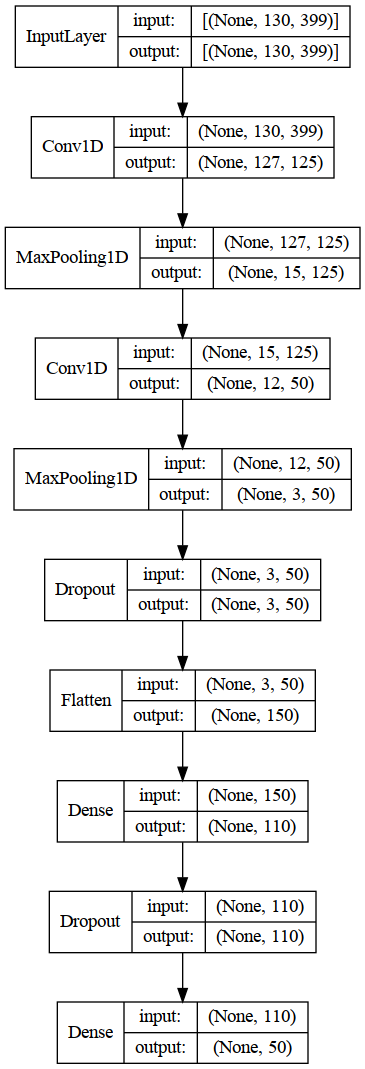

In [127]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

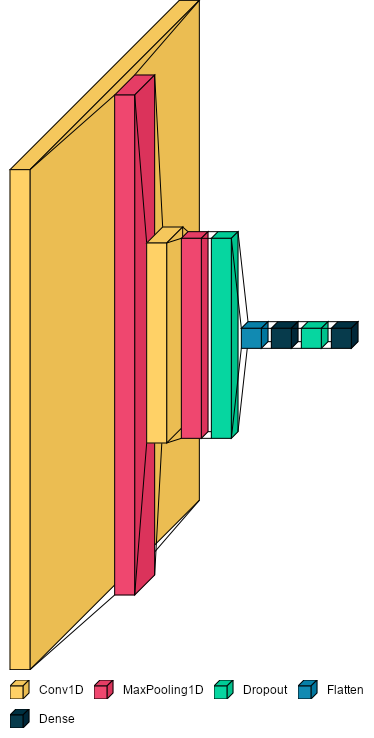

In [128]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [129]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 43ms/step - loss: 1.3178 - f1_score: 0.6397


In [130]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 12ms/step - loss: 0.2394 - f1_score: 0.9693


In [131]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.545     1.000     0.706         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.000     0.000     0.000        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.500     0.333     0.400         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      1.000     1.000     1.000         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.286     0.333     0.308         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.375     0.545         8
     DEVELOP      0.333     0.333     0.333         6
      DINNER      1.000     1.000     1.000         8
         DOG      0.375     

In [132]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [133]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [134]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
27/28 [===========================>..] - ETA: 0s - loss: 3.9573 - f1_score: 0.0144

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 14s 403ms/step - loss: 3.9568 - f1_score: 0.0144 - val_loss: 3.9148 - val_f1_score: 0.0101
Epoch 2/500
28/28 [==============================] - 1s 48ms/step - loss: 3.9107 - f1_score: 0.0225 - val_loss: 3.9039 - val_f1_score: 0.0070
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 3.9138 - f1_score: 0.0199

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 224ms/step - loss: 3.9138 - f1_score: 0.0199 - val_loss: 3.8966 - val_f1_score: 0.0178
Epoch 4/500
28/28 [==============================] - 1s 47ms/step - loss: 3.8939 - f1_score: 0.0216 - val_loss: 3.8843 - val_f1_score: 0.0136
Epoch 5/500
28/28 [==============================] - 1s 47ms/step - loss: 3.8778 - f1_score: 0.0296 - val_loss: 3.8610 - val_f1_score: 0.0164
Epoch 6/500
27/28 [===========================>..] - ETA: 0s - loss: 3.8532 - f1_score: 0.0307

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 199ms/step - loss: 3.8523 - f1_score: 0.0309 - val_loss: 3.8332 - val_f1_score: 0.0274
Epoch 7/500
28/28 [==============================] - 1s 48ms/step - loss: 3.8266 - f1_score: 0.0351 - val_loss: 3.7954 - val_f1_score: 0.0268
Epoch 8/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7816 - f1_score: 0.0423

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 187ms/step - loss: 3.7810 - f1_score: 0.0429 - val_loss: 3.7417 - val_f1_score: 0.0302
Epoch 9/500
27/28 [===========================>..] - ETA: 0s - loss: 3.7556 - f1_score: 0.0383

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 215ms/step - loss: 3.7531 - f1_score: 0.0403 - val_loss: 3.6772 - val_f1_score: 0.0600
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.7065 - f1_score: 0.0520

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 223ms/step - loss: 3.7065 - f1_score: 0.0520 - val_loss: 3.6289 - val_f1_score: 0.0684
Epoch 11/500
28/28 [==============================] - 1s 46ms/step - loss: 3.6498 - f1_score: 0.0548 - val_loss: 3.5674 - val_f1_score: 0.0597
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.5860 - f1_score: 0.0648

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 203ms/step - loss: 3.5860 - f1_score: 0.0648 - val_loss: 3.4853 - val_f1_score: 0.0969
Epoch 13/500
28/28 [==============================] - 1s 52ms/step - loss: 3.5363 - f1_score: 0.0715 - val_loss: 3.4204 - val_f1_score: 0.0955
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.4926 - f1_score: 0.0672

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 203ms/step - loss: 3.4926 - f1_score: 0.0672 - val_loss: 3.3826 - val_f1_score: 0.1001
Epoch 15/500
27/28 [===========================>..] - ETA: 0s - loss: 3.4252 - f1_score: 0.0799

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 196ms/step - loss: 3.4271 - f1_score: 0.0794 - val_loss: 3.2903 - val_f1_score: 0.1016
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.3797 - f1_score: 0.0929

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 209ms/step - loss: 3.3797 - f1_score: 0.0929 - val_loss: 3.2254 - val_f1_score: 0.1137
Epoch 17/500
28/28 [==============================] - 1s 47ms/step - loss: 3.3096 - f1_score: 0.1040 - val_loss: 3.1700 - val_f1_score: 0.1073
Epoch 18/500
28/28 [==============================] - 1s 48ms/step - loss: 3.2708 - f1_score: 0.0912 - val_loss: 3.0934 - val_f1_score: 0.1135
Epoch 19/500
28/28 [==============================] - 1s 49ms/step - loss: 3.2187 - f1_score: 0.1084 - val_loss: 3.0557 - val_f1_score: 0.1115
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.1547 - f1_score: 0.1159

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 211ms/step - loss: 3.1547 - f1_score: 0.1159 - val_loss: 3.0046 - val_f1_score: 0.1413
Epoch 21/500
28/28 [==============================] - 1s 46ms/step - loss: 3.1147 - f1_score: 0.1364 - val_loss: 2.9526 - val_f1_score: 0.1186
Epoch 22/500
28/28 [==============================] - 1s 45ms/step - loss: 3.0634 - f1_score: 0.1429 - val_loss: 2.9130 - val_f1_score: 0.1226
Epoch 23/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0310 - f1_score: 0.1361

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 196ms/step - loss: 3.0375 - f1_score: 0.1335 - val_loss: 2.8533 - val_f1_score: 0.1488
Epoch 24/500
27/28 [===========================>..] - ETA: 0s - loss: 3.0019 - f1_score: 0.1498

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 187ms/step - loss: 2.9989 - f1_score: 0.1500 - val_loss: 2.8227 - val_f1_score: 0.1544
Epoch 25/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9791 - f1_score: 0.1496

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 220ms/step - loss: 2.9776 - f1_score: 0.1503 - val_loss: 2.7896 - val_f1_score: 0.1679
Epoch 26/500
27/28 [===========================>..] - ETA: 0s - loss: 2.9444 - f1_score: 0.1506

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 13s 489ms/step - loss: 2.9369 - f1_score: 0.1532 - val_loss: 2.7445 - val_f1_score: 0.1874
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.8928 - f1_score: 0.1605

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 221ms/step - loss: 2.8928 - f1_score: 0.1605 - val_loss: 2.7166 - val_f1_score: 0.1965
Epoch 28/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8892 - f1_score: 0.1642

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 185ms/step - loss: 2.8912 - f1_score: 0.1632 - val_loss: 2.6914 - val_f1_score: 0.1968
Epoch 29/500
28/28 [==============================] - 1s 44ms/step - loss: 2.8214 - f1_score: 0.1873 - val_loss: 2.6665 - val_f1_score: 0.1956
Epoch 30/500
27/28 [===========================>..] - ETA: 0s - loss: 2.8029 - f1_score: 0.1913

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 193ms/step - loss: 2.7986 - f1_score: 0.1906 - val_loss: 2.6240 - val_f1_score: 0.2153
Epoch 31/500
27/28 [===========================>..] - ETA: 0s - loss: 2.7823 - f1_score: 0.1853

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 190ms/step - loss: 2.7839 - f1_score: 0.1855 - val_loss: 2.6089 - val_f1_score: 0.2252
Epoch 32/500
28/28 [==============================] - 1s 45ms/step - loss: 2.7419 - f1_score: 0.1931 - val_loss: 2.5889 - val_f1_score: 0.2054
Epoch 33/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6978 - f1_score: 0.2030

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 217ms/step - loss: 2.6954 - f1_score: 0.2048 - val_loss: 2.5316 - val_f1_score: 0.2400
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.6871 - f1_score: 0.2209

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 283ms/step - loss: 2.6871 - f1_score: 0.2209 - val_loss: 2.5557 - val_f1_score: 0.2700
Epoch 35/500
27/28 [===========================>..] - ETA: 0s - loss: 2.6726 - f1_score: 0.2139

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 210ms/step - loss: 2.6695 - f1_score: 0.2140 - val_loss: 2.5055 - val_f1_score: 0.2728
Epoch 36/500
28/28 [==============================] - 1s 52ms/step - loss: 2.6422 - f1_score: 0.2334 - val_loss: 2.4574 - val_f1_score: 0.2549
Epoch 37/500
28/28 [==============================] - 1s 49ms/step - loss: 2.5862 - f1_score: 0.2340 - val_loss: 2.4647 - val_f1_score: 0.2390
Epoch 38/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5744 - f1_score: 0.2344

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 247ms/step - loss: 2.5707 - f1_score: 0.2341 - val_loss: 2.4144 - val_f1_score: 0.2790
Epoch 39/500
27/28 [===========================>..] - ETA: 0s - loss: 2.5614 - f1_score: 0.2497

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 12s 436ms/step - loss: 2.5590 - f1_score: 0.2480 - val_loss: 2.4068 - val_f1_score: 0.3079
Epoch 40/500
28/28 [==============================] - 1s 49ms/step - loss: 2.5482 - f1_score: 0.2422 - val_loss: 2.3715 - val_f1_score: 0.2987
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.4928 - f1_score: 0.2511

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 239ms/step - loss: 2.4928 - f1_score: 0.2511 - val_loss: 2.3604 - val_f1_score: 0.3234
Epoch 42/500
28/28 [==============================] - 1s 47ms/step - loss: 2.4871 - f1_score: 0.2630 - val_loss: 2.3493 - val_f1_score: 0.2971
Epoch 43/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4502 - f1_score: 0.2733

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.4496 - f1_score: 0.2743 - val_loss: 2.3165 - val_f1_score: 0.3281
Epoch 44/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4601 - f1_score: 0.2633

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 206ms/step - loss: 2.4659 - f1_score: 0.2631 - val_loss: 2.3294 - val_f1_score: 0.3361
Epoch 45/500
28/28 [==============================] - 1s 49ms/step - loss: 2.4197 - f1_score: 0.2836 - val_loss: 2.2973 - val_f1_score: 0.3323
Epoch 46/500
27/28 [===========================>..] - ETA: 0s - loss: 2.4042 - f1_score: 0.2794

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 209ms/step - loss: 2.4024 - f1_score: 0.2804 - val_loss: 2.2575 - val_f1_score: 0.3403
Epoch 47/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3478 - f1_score: 0.2993

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 202ms/step - loss: 2.3466 - f1_score: 0.2992 - val_loss: 2.2505 - val_f1_score: 0.3521
Epoch 48/500
28/28 [==============================] - 1s 45ms/step - loss: 2.3631 - f1_score: 0.2834 - val_loss: 2.2498 - val_f1_score: 0.3388
Epoch 49/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3604 - f1_score: 0.2904

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 193ms/step - loss: 2.3631 - f1_score: 0.2904 - val_loss: 2.2289 - val_f1_score: 0.3620
Epoch 50/500
27/28 [===========================>..] - ETA: 0s - loss: 2.3448 - f1_score: 0.3060

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 219ms/step - loss: 2.3370 - f1_score: 0.3087 - val_loss: 2.1963 - val_f1_score: 0.3660
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.3077 - f1_score: 0.3207

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 191ms/step - loss: 2.3077 - f1_score: 0.3207 - val_loss: 2.2043 - val_f1_score: 0.3762
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 2.2735 - f1_score: 0.3140

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 186ms/step - loss: 2.2735 - f1_score: 0.3140 - val_loss: 2.1570 - val_f1_score: 0.4046
Epoch 53/500
28/28 [==============================] - 1s 48ms/step - loss: 2.2864 - f1_score: 0.3051 - val_loss: 2.1649 - val_f1_score: 0.3949
Epoch 54/500
28/28 [==============================] - 1s 46ms/step - loss: 2.2122 - f1_score: 0.3413 - val_loss: 2.1615 - val_f1_score: 0.3632
Epoch 55/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1874 - f1_score: 0.3290

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 239ms/step - loss: 2.1934 - f1_score: 0.3291 - val_loss: 2.1020 - val_f1_score: 0.4204
Epoch 56/500
28/28 [==============================] - 1s 52ms/step - loss: 2.2051 - f1_score: 0.3333 - val_loss: 2.1036 - val_f1_score: 0.3827
Epoch 57/500
28/28 [==============================] - 1s 46ms/step - loss: 2.1633 - f1_score: 0.3460 - val_loss: 2.0851 - val_f1_score: 0.3958
Epoch 58/500
28/28 [==============================] - 1s 48ms/step - loss: 2.1321 - f1_score: 0.3645 - val_loss: 2.0623 - val_f1_score: 0.4140
Epoch 59/500
28/28 [==============================] - 1s 47ms/step - loss: 2.1367 - f1_score: 0.3588 - val_loss: 2.0790 - val_f1_score: 0.4058
Epoch 60/500
28/28 [==============================] - 1s 50ms/step - loss: 2.1335 - f1_score: 0.3569 - val_loss: 2.0518 - val_f1_score: 0.4175
Epoch 61/500
27/28 [===========================>..] - ETA: 0s - loss: 2.1291 - f1_score: 0.3521

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 204ms/step - loss: 2.1242 - f1_score: 0.3538 - val_loss: 2.0338 - val_f1_score: 0.4259
Epoch 62/500
27/28 [===========================>..] - ETA: 0s - loss: 2.0655 - f1_score: 0.3874

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 201ms/step - loss: 2.0632 - f1_score: 0.3842 - val_loss: 1.9965 - val_f1_score: 0.4363
Epoch 63/500
28/28 [==============================] - 1s 46ms/step - loss: 2.0725 - f1_score: 0.3798 - val_loss: 1.9848 - val_f1_score: 0.4157
Epoch 64/500
28/28 [==============================] - 1s 46ms/step - loss: 2.0787 - f1_score: 0.3671 - val_loss: 1.9986 - val_f1_score: 0.4113
Epoch 65/500
28/28 [==============================] - 1s 49ms/step - loss: 2.0194 - f1_score: 0.3947 - val_loss: 1.9793 - val_f1_score: 0.4217
Epoch 66/500
28/28 [==============================] - 1s 46ms/step - loss: 2.0383 - f1_score: 0.3767 - val_loss: 1.9734 - val_f1_score: 0.4209
Epoch 67/500
28/28 [==============================] - 1s 46ms/step - loss: 2.0221 - f1_score: 0.3810 - val_loss: 1.9502 - val_f1_score: 0.4226
Epoch 68/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9808 - f1_score: 0.3913

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 210ms/step - loss: 1.9857 - f1_score: 0.3916 - val_loss: 1.9420 - val_f1_score: 0.4506
Epoch 69/500
27/28 [===========================>..] - ETA: 0s - loss: 1.9876 - f1_score: 0.3832

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 194ms/step - loss: 1.9861 - f1_score: 0.3845 - val_loss: 1.9136 - val_f1_score: 0.4554
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 1.9604 - f1_score: 0.3920

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 227ms/step - loss: 1.9604 - f1_score: 0.3920 - val_loss: 1.9195 - val_f1_score: 0.4662
Epoch 71/500
28/28 [==============================] - 1s 46ms/step - loss: 1.9184 - f1_score: 0.4045 - val_loss: 1.8886 - val_f1_score: 0.4566
Epoch 72/500
28/28 [==============================] - 1s 46ms/step - loss: 1.9376 - f1_score: 0.4185 - val_loss: 1.9248 - val_f1_score: 0.4232
Epoch 73/500
28/28 [==============================] - 1s 46ms/step - loss: 1.9033 - f1_score: 0.4185 - val_loss: 1.8882 - val_f1_score: 0.4534
Epoch 74/500
28/28 [==============================] - 1s 53ms/step - loss: 1.8843 - f1_score: 0.4179 - val_loss: 1.8577 - val_f1_score: 0.4550
Epoch 75/500
28/28 [==============================] - 1s 46ms/step - loss: 1.8924 - f1_score: 0.4259 - val_loss: 1.8856 - val_f1_score: 0.4369
Epoch 76/500
28/28 [==============================] - 1s 47ms/step - loss: 1.8825 - f1_score: 0.4338 - val_loss: 1.8679 - val_f1_score: 0.4602
Epoch 77/50

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 231ms/step - loss: 1.8460 - f1_score: 0.4296 - val_loss: 1.8278 - val_f1_score: 0.4813
Epoch 79/500
27/28 [===========================>..] - ETA: 0s - loss: 1.8297 - f1_score: 0.4388

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 205ms/step - loss: 1.8266 - f1_score: 0.4385 - val_loss: 1.8149 - val_f1_score: 0.4863
Epoch 80/500
28/28 [==============================] - 1s 47ms/step - loss: 1.8122 - f1_score: 0.4471 - val_loss: 1.8151 - val_f1_score: 0.4853
Epoch 81/500
28/28 [==============================] - 1s 45ms/step - loss: 1.7995 - f1_score: 0.4360 - val_loss: 1.7962 - val_f1_score: 0.4861
Epoch 82/500
28/28 [==============================] - 1s 49ms/step - loss: 1.7811 - f1_score: 0.4401 - val_loss: 1.7748 - val_f1_score: 0.4562
Epoch 83/500
28/28 [==============================] - 1s 45ms/step - loss: 1.7811 - f1_score: 0.4593 - val_loss: 1.7929 - val_f1_score: 0.4617
Epoch 84/500
28/28 [==============================] - 1s 46ms/step - loss: 1.7591 - f1_score: 0.4580 - val_loss: 1.7772 - val_f1_score: 0.4776
Epoch 85/500
28/28 [==============================] - 1s 46ms/step - loss: 1.7338 - f1_score: 0.4540 - val_loss: 1.7917 - val_f1_score: 0.4546
Epoch 86/50

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 214ms/step - loss: 1.6872 - f1_score: 0.4791 - val_loss: 1.7123 - val_f1_score: 0.4981
Epoch 90/500
28/28 [==============================] - 1s 49ms/step - loss: 1.7035 - f1_score: 0.4869 - val_loss: 1.7438 - val_f1_score: 0.4690
Epoch 91/500
28/28 [==============================] - 1s 49ms/step - loss: 1.6724 - f1_score: 0.4897 - val_loss: 1.7488 - val_f1_score: 0.4888
Epoch 92/500
28/28 [==============================] - 1s 50ms/step - loss: 1.6598 - f1_score: 0.4863 - val_loss: 1.7476 - val_f1_score: 0.4705
Epoch 93/500
28/28 [==============================] - 2s 57ms/step - loss: 1.6543 - f1_score: 0.4745 - val_loss: 1.7089 - val_f1_score: 0.4794
Epoch 94/500
28/28 [==============================] - 1s 48ms/step - loss: 1.5975 - f1_score: 0.4923 - val_loss: 1.7026 - val_f1_score: 0.4740
Epoch 95/500
28/28 [==============================] - 1s 48ms/step - loss: 1.6408 - f1_score: 0.4816 - val_loss: 1.7068 - val_f1_score: 0.4727
Epoch 96/50

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 222ms/step - loss: 1.5995 - f1_score: 0.5019 - val_loss: 1.6943 - val_f1_score: 0.5108
Epoch 97/500
28/28 [==============================] - 1s 53ms/step - loss: 1.6015 - f1_score: 0.5034 - val_loss: 1.6833 - val_f1_score: 0.4965
Epoch 98/500
28/28 [==============================] - 2s 73ms/step - loss: 1.5994 - f1_score: 0.4954 - val_loss: 1.6802 - val_f1_score: 0.4848
Epoch 99/500
28/28 [==============================] - 2s 63ms/step - loss: 1.5614 - f1_score: 0.5244 - val_loss: 1.6842 - val_f1_score: 0.4897
Epoch 100/500
28/28 [==============================] - 2s 60ms/step - loss: 1.5702 - f1_score: 0.5148 - val_loss: 1.6550 - val_f1_score: 0.4832
Epoch 101/500
27/28 [===========================>..] - ETA: 0s - loss: 1.5188 - f1_score: 0.5230

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 221ms/step - loss: 1.5202 - f1_score: 0.5217 - val_loss: 1.6345 - val_f1_score: 0.5177
Epoch 102/500
28/28 [==============================] - 1s 47ms/step - loss: 1.5528 - f1_score: 0.5186 - val_loss: 1.7120 - val_f1_score: 0.4672
Epoch 103/500
28/28 [==============================] - 1s 47ms/step - loss: 1.5475 - f1_score: 0.5286 - val_loss: 1.6337 - val_f1_score: 0.5016
Epoch 104/500
28/28 [==============================] - 1s 54ms/step - loss: 1.4986 - f1_score: 0.5370 - val_loss: 1.6470 - val_f1_score: 0.4966
Epoch 105/500
28/28 [==============================] - 1s 46ms/step - loss: 1.5221 - f1_score: 0.5265 - val_loss: 1.6110 - val_f1_score: 0.5079
Epoch 106/500
28/28 [==============================] - 1s 47ms/step - loss: 1.5016 - f1_score: 0.5417 - val_loss: 1.6199 - val_f1_score: 0.5103
Epoch 107/500
28/28 [==============================] - 1s 48ms/step - loss: 1.4970 - f1_score: 0.5458 - val_loss: 1.6076 - val_f1_score: 0.5063
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 247ms/step - loss: 1.4416 - f1_score: 0.5531 - val_loss: 1.5724 - val_f1_score: 0.5244
Epoch 114/500
28/28 [==============================] - 1s 51ms/step - loss: 1.4503 - f1_score: 0.5441 - val_loss: 1.5790 - val_f1_score: 0.5107
Epoch 115/500
28/28 [==============================] - 1s 48ms/step - loss: 1.4184 - f1_score: 0.5480 - val_loss: 1.5644 - val_f1_score: 0.5105
Epoch 116/500
28/28 [==============================] - 1s 50ms/step - loss: 1.4265 - f1_score: 0.5576 - val_loss: 1.5568 - val_f1_score: 0.5153
Epoch 117/500
28/28 [==============================] - 1s 47ms/step - loss: 1.4257 - f1_score: 0.5536 - val_loss: 1.5519 - val_f1_score: 0.5160
Epoch 118/500
28/28 [==============================] - 1s 54ms/step - loss: 1.3942 - f1_score: 0.5582 - val_loss: 1.5562 - val_f1_score: 0.5126
Epoch 119/500
28/28 [==============================] - 1s 50ms/step - loss: 1.3690 - f1_score: 0.5649 - val_loss: 1.5552 - val_f1_score: 0.5103
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 244ms/step - loss: 1.3858 - f1_score: 0.5697 - val_loss: 1.5870 - val_f1_score: 0.5268
Epoch 121/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3949 - f1_score: 0.5703

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 223ms/step - loss: 1.3913 - f1_score: 0.5709 - val_loss: 1.5477 - val_f1_score: 0.5318
Epoch 122/500
27/28 [===========================>..] - ETA: 0s - loss: 1.3540 - f1_score: 0.5804

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 245ms/step - loss: 1.3611 - f1_score: 0.5785 - val_loss: 1.5141 - val_f1_score: 0.5384
Epoch 123/500
28/28 [==============================] - 1s 48ms/step - loss: 1.3526 - f1_score: 0.5714 - val_loss: 1.5640 - val_f1_score: 0.5093
Epoch 124/500
28/28 [==============================] - 1s 48ms/step - loss: 1.3513 - f1_score: 0.5727 - val_loss: 1.5017 - val_f1_score: 0.5350
Epoch 125/500
28/28 [==============================] - 2s 56ms/step - loss: 1.3204 - f1_score: 0.5784 - val_loss: 1.5570 - val_f1_score: 0.5038
Epoch 126/500
28/28 [==============================] - 1s 51ms/step - loss: 1.3200 - f1_score: 0.5886 - val_loss: 1.5379 - val_f1_score: 0.5070
Epoch 127/500
28/28 [==============================] - 1s 49ms/step - loss: 1.3096 - f1_score: 0.5910 - val_loss: 1.5394 - val_f1_score: 0.5150
Epoch 128/500
28/28 [==============================] - 1s 47ms/step - loss: 1.3130 - f1_score: 0.5783 - val_loss: 1.5374 - val_f1_score: 0.5113
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 10s 357ms/step - loss: 1.2794 - f1_score: 0.5949 - val_loss: 1.4702 - val_f1_score: 0.5489
Epoch 133/500
28/28 [==============================] - 1s 51ms/step - loss: 1.2835 - f1_score: 0.6034 - val_loss: 1.5055 - val_f1_score: 0.5307
Epoch 134/500
28/28 [==============================] - 1s 47ms/step - loss: 1.2631 - f1_score: 0.6030 - val_loss: 1.5070 - val_f1_score: 0.5279
Epoch 135/500
28/28 [==============================] - 1s 49ms/step - loss: 1.2685 - f1_score: 0.6055 - val_loss: 1.4804 - val_f1_score: 0.5418
Epoch 136/500
28/28 [==============================] - 1s 50ms/step - loss: 1.2548 - f1_score: 0.5997 - val_loss: 1.5123 - val_f1_score: 0.5284
Epoch 137/500
28/28 [==============================] - 2s 58ms/step - loss: 1.2330 - f1_score: 0.6095 - val_loss: 1.5021 - val_f1_score: 0.5269
Epoch 138/500
28/28 [==============================] - 2s 54ms/step - loss: 1.2330 - f1_score: 0.6165 - val_loss: 1.4487 - val_f1_score: 0.5487
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 5s 185ms/step - loss: 1.1934 - f1_score: 0.6338 - val_loss: 1.4543 - val_f1_score: 0.5523
Epoch 142/500
28/28 [==============================] - 1s 49ms/step - loss: 1.1993 - f1_score: 0.6247 - val_loss: 1.4895 - val_f1_score: 0.5459
Epoch 143/500
28/28 [==============================] - 1s 48ms/step - loss: 1.2032 - f1_score: 0.6294 - val_loss: 1.4519 - val_f1_score: 0.5424
Epoch 144/500
28/28 [==============================] - 1s 48ms/step - loss: 1.2030 - f1_score: 0.6182 - val_loss: 1.4432 - val_f1_score: 0.5422
Epoch 145/500
28/28 [==============================] - 1s 52ms/step - loss: 1.1856 - f1_score: 0.6258 - val_loss: 1.4500 - val_f1_score: 0.5513
Epoch 146/500
28/28 [==============================] - 1s 51ms/step - loss: 1.2017 - f1_score: 0.6170 - val_loss: 1.4411 - val_f1_score: 0.5269
Epoch 147/500
28/28 [==============================] - 1s 48ms/step - loss: 1.1939 - f1_score: 0.6246 - val_loss: 1.4747 - val_f1_score: 0.5121
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 286ms/step - loss: 1.1480 - f1_score: 0.6398 - val_loss: 1.4353 - val_f1_score: 0.5817
Epoch 151/500
28/28 [==============================] - 2s 56ms/step - loss: 1.1383 - f1_score: 0.6323 - val_loss: 1.4529 - val_f1_score: 0.5529
Epoch 152/500
28/28 [==============================] - 1s 48ms/step - loss: 1.1310 - f1_score: 0.6400 - val_loss: 1.4451 - val_f1_score: 0.5408
Epoch 153/500
28/28 [==============================] - 1s 48ms/step - loss: 1.1552 - f1_score: 0.6377 - val_loss: 1.4362 - val_f1_score: 0.5558
Epoch 154/500
28/28 [==============================] - 1s 53ms/step - loss: 1.1260 - f1_score: 0.6329 - val_loss: 1.4229 - val_f1_score: 0.5477
Epoch 155/500
28/28 [==============================] - 1s 49ms/step - loss: 1.1355 - f1_score: 0.6452 - val_loss: 1.4226 - val_f1_score: 0.5521
Epoch 156/500
28/28 [==============================] - 1s 50ms/step - loss: 1.1311 - f1_score: 0.6329 - val_loss: 1.4224 - val_f1_score: 0.5547
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 303ms/step - loss: 0.9869 - f1_score: 0.6842 - val_loss: 1.3910 - val_f1_score: 0.5916
Epoch 181/500
28/28 [==============================] - 1s 49ms/step - loss: 1.0003 - f1_score: 0.6736 - val_loss: 1.3738 - val_f1_score: 0.5807
Epoch 182/500
28/28 [==============================] - 1s 47ms/step - loss: 0.9810 - f1_score: 0.6870 - val_loss: 1.4029 - val_f1_score: 0.5680
Epoch 183/500
28/28 [==============================] - 1s 48ms/step - loss: 0.9875 - f1_score: 0.6810 - val_loss: 1.3609 - val_f1_score: 0.5791
Epoch 184/500
28/28 [==============================] - 1s 53ms/step - loss: 0.9992 - f1_score: 0.6830 - val_loss: 1.3501 - val_f1_score: 0.5831
Epoch 185/500
28/28 [==============================] - 1s 48ms/step - loss: 0.9646 - f1_score: 0.6940 - val_loss: 1.3372 - val_f1_score: 0.5804
Epoch 186/500
28/28 [==============================] - 2s 55ms/step - loss: 0.9300 - f1_score: 0.7049 - val_loss: 1.3302 - val_f1_score: 0.5748
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 238ms/step - loss: 0.9306 - f1_score: 0.7034 - val_loss: 1.3342 - val_f1_score: 0.5943
Epoch 193/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9231 - f1_score: 0.7054 - val_loss: 1.3466 - val_f1_score: 0.5727
Epoch 194/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9330 - f1_score: 0.6974 - val_loss: 1.3834 - val_f1_score: 0.5524
Epoch 195/500
28/28 [==============================] - 1s 52ms/step - loss: 0.9032 - f1_score: 0.7217 - val_loss: 1.3367 - val_f1_score: 0.5752
Epoch 196/500
28/28 [==============================] - ETA: 0s - loss: 0.9053 - f1_score: 0.7162

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 253ms/step - loss: 0.9053 - f1_score: 0.7162 - val_loss: 1.3231 - val_f1_score: 0.5988
Epoch 197/500
27/28 [===========================>..] - ETA: 0s - loss: 0.9017 - f1_score: 0.7145

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 238ms/step - loss: 0.9030 - f1_score: 0.7141 - val_loss: 1.3257 - val_f1_score: 0.6034
Epoch 198/500
28/28 [==============================] - 1s 50ms/step - loss: 0.9137 - f1_score: 0.7028 - val_loss: 1.3228 - val_f1_score: 0.5919
Epoch 199/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8893 - f1_score: 0.7199 - val_loss: 1.3179 - val_f1_score: 0.6022
Epoch 200/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8985 - f1_score: 0.7201 - val_loss: 1.3461 - val_f1_score: 0.5855
Epoch 201/500
28/28 [==============================] - ETA: 0s - loss: 0.8840 - f1_score: 0.7211

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 212ms/step - loss: 0.8840 - f1_score: 0.7211 - val_loss: 1.3194 - val_f1_score: 0.6040
Epoch 202/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8895 - f1_score: 0.7273 - val_loss: 1.3468 - val_f1_score: 0.5825
Epoch 203/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8748 - f1_score: 0.7252 - val_loss: 1.3193 - val_f1_score: 0.5874
Epoch 204/500
27/28 [===========================>..] - ETA: 0s - loss: 0.8861 - f1_score: 0.7146

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 225ms/step - loss: 0.8868 - f1_score: 0.7129 - val_loss: 1.3381 - val_f1_score: 0.6054
Epoch 205/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8958 - f1_score: 0.7159 - val_loss: 1.3365 - val_f1_score: 0.5873
Epoch 206/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8742 - f1_score: 0.7243 - val_loss: 1.3195 - val_f1_score: 0.5974
Epoch 207/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8599 - f1_score: 0.7296 - val_loss: 1.3162 - val_f1_score: 0.5782
Epoch 208/500
28/28 [==============================] - 1s 48ms/step - loss: 0.8520 - f1_score: 0.7254 - val_loss: 1.3569 - val_f1_score: 0.5769
Epoch 209/500
28/28 [==============================] - 1s 52ms/step - loss: 0.8625 - f1_score: 0.7325 - val_loss: 1.3377 - val_f1_score: 0.5754
Epoch 210/500
28/28 [==============================] - 1s 51ms/step - loss: 0.8282 - f1_score: 0.7361 - val_loss: 1.2804 - val_f1_score: 0.6033
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 213ms/step - loss: 0.8223 - f1_score: 0.7451 - val_loss: 1.3073 - val_f1_score: 0.6058
Epoch 216/500
28/28 [==============================] - 1s 47ms/step - loss: 0.8588 - f1_score: 0.7101 - val_loss: 1.2885 - val_f1_score: 0.5981
Epoch 217/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8372 - f1_score: 0.7269 - val_loss: 1.3086 - val_f1_score: 0.5943
Epoch 218/500
28/28 [==============================] - 1s 52ms/step - loss: 0.8133 - f1_score: 0.7488 - val_loss: 1.3078 - val_f1_score: 0.5905
Epoch 219/500
28/28 [==============================] - 1s 50ms/step - loss: 0.7970 - f1_score: 0.7482 - val_loss: 1.3386 - val_f1_score: 0.5723
Epoch 220/500
28/28 [==============================] - 2s 55ms/step - loss: 0.8216 - f1_score: 0.7396 - val_loss: 1.3072 - val_f1_score: 0.5887
Epoch 221/500
28/28 [==============================] - 1s 49ms/step - loss: 0.8029 - f1_score: 0.7399 - val_loss: 1.3199 - val_f1_score: 0.5906
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 254ms/step - loss: 0.7738 - f1_score: 0.7495 - val_loss: 1.2890 - val_f1_score: 0.6184
Epoch 228/500
28/28 [==============================] - 1s 47ms/step - loss: 0.7754 - f1_score: 0.7532 - val_loss: 1.3236 - val_f1_score: 0.5919
Epoch 229/500
28/28 [==============================] - 1s 48ms/step - loss: 0.7696 - f1_score: 0.7519 - val_loss: 1.3426 - val_f1_score: 0.5967
Epoch 230/500
28/28 [==============================] - 1s 47ms/step - loss: 0.7730 - f1_score: 0.7537 - val_loss: 1.3060 - val_f1_score: 0.5954
Epoch 231/500
28/28 [==============================] - 1s 53ms/step - loss: 0.7598 - f1_score: 0.7638 - val_loss: 1.2965 - val_f1_score: 0.6056
Epoch 232/500
28/28 [==============================] - 1s 48ms/step - loss: 0.7778 - f1_score: 0.7573 - val_loss: 1.3073 - val_f1_score: 0.6143
Epoch 233/500
28/28 [==============================] - 1s 48ms/step - loss: 0.7485 - f1_score: 0.7565 - val_loss: 1.2781 - val_f1_score: 0.6007
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 262ms/step - loss: 0.6527 - f1_score: 0.7847 - val_loss: 1.2502 - val_f1_score: 0.6355
Epoch 262/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6554 - f1_score: 0.7958 - val_loss: 1.2492 - val_f1_score: 0.6186
Epoch 263/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6690 - f1_score: 0.7841 - val_loss: 1.3021 - val_f1_score: 0.5832
Epoch 264/500
28/28 [==============================] - 2s 54ms/step - loss: 0.6928 - f1_score: 0.7710 - val_loss: 1.3343 - val_f1_score: 0.5927
Epoch 265/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6896 - f1_score: 0.7857 - val_loss: 1.3242 - val_f1_score: 0.6037
Epoch 266/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6660 - f1_score: 0.7875 - val_loss: 1.2840 - val_f1_score: 0.6117
Epoch 267/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6522 - f1_score: 0.7943 - val_loss: 1.2734 - val_f1_score: 0.6161
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 218ms/step - loss: 0.6307 - f1_score: 0.8037 - val_loss: 1.2803 - val_f1_score: 0.6422
Epoch 274/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6380 - f1_score: 0.8020 - val_loss: 1.3234 - val_f1_score: 0.6146
Epoch 275/500
28/28 [==============================] - 2s 58ms/step - loss: 0.6440 - f1_score: 0.7848 - val_loss: 1.2751 - val_f1_score: 0.6241
Epoch 276/500
28/28 [==============================] - 1s 50ms/step - loss: 0.6430 - f1_score: 0.7954 - val_loss: 1.2613 - val_f1_score: 0.6174
Epoch 277/500
28/28 [==============================] - 2s 54ms/step - loss: 0.6327 - f1_score: 0.7903 - val_loss: 1.2571 - val_f1_score: 0.6103
Epoch 278/500
28/28 [==============================] - 2s 56ms/step - loss: 0.6025 - f1_score: 0.8091 - val_loss: 1.3454 - val_f1_score: 0.5951
Epoch 279/500
28/28 [==============================] - 1s 49ms/step - loss: 0.6011 - f1_score: 0.8081 - val_loss: 1.3039 - val_f1_score: 0.6058
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 276ms/step - loss: 0.5852 - f1_score: 0.8236 - val_loss: 1.2675 - val_f1_score: 0.6439
Epoch 304/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5726 - f1_score: 0.8209 - val_loss: 1.2835 - val_f1_score: 0.6368
Epoch 305/500
28/28 [==============================] - 1s 51ms/step - loss: 0.5723 - f1_score: 0.8207 - val_loss: 1.3577 - val_f1_score: 0.6171
Epoch 306/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5442 - f1_score: 0.8282 - val_loss: 1.2533 - val_f1_score: 0.6417
Epoch 307/500
28/28 [==============================] - 2s 55ms/step - loss: 0.5848 - f1_score: 0.8157 - val_loss: 1.2861 - val_f1_score: 0.6391
Epoch 308/500
28/28 [==============================] - 1s 50ms/step - loss: 0.5692 - f1_score: 0.8137 - val_loss: 1.3367 - val_f1_score: 0.6003
Epoch 309/500
28/28 [==============================] - 1s 49ms/step - loss: 0.5497 - f1_score: 0.8293 - val_loss: 1.3103 - val_f1_score: 0.6263
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 301ms/step - loss: 0.5399 - f1_score: 0.8331 - val_loss: 1.2751 - val_f1_score: 0.6487
Epoch 317/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5569 - f1_score: 0.8209 - val_loss: 1.2828 - val_f1_score: 0.6142
Epoch 318/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5511 - f1_score: 0.8319 - val_loss: 1.3465 - val_f1_score: 0.6032
Epoch 319/500
28/28 [==============================] - 1s 46ms/step - loss: 0.5343 - f1_score: 0.8331 - val_loss: 1.3337 - val_f1_score: 0.6310
Epoch 320/500
28/28 [==============================] - 1s 52ms/step - loss: 0.5327 - f1_score: 0.8339 - val_loss: 1.3401 - val_f1_score: 0.6046
Epoch 321/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5384 - f1_score: 0.8330 - val_loss: 1.2489 - val_f1_score: 0.6479
Epoch 322/500
28/28 [==============================] - 1s 47ms/step - loss: 0.5368 - f1_score: 0.8311 - val_loss: 1.2590 - val_f1_score: 0.6295
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 247ms/step - loss: 0.5026 - f1_score: 0.8371 - val_loss: 1.3077 - val_f1_score: 0.6554
Epoch 339/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4810 - f1_score: 0.8497 - val_loss: 1.2999 - val_f1_score: 0.6407
Epoch 340/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4854 - f1_score: 0.8502 - val_loss: 1.2930 - val_f1_score: 0.6441
Epoch 341/500
28/28 [==============================] - 1s 51ms/step - loss: 0.4807 - f1_score: 0.8472 - val_loss: 1.2690 - val_f1_score: 0.6315
Epoch 342/500
28/28 [==============================] - 1s 47ms/step - loss: 0.4640 - f1_score: 0.8541 - val_loss: 1.2992 - val_f1_score: 0.6275
Epoch 343/500
28/28 [==============================] - 1s 50ms/step - loss: 0.4948 - f1_score: 0.8419 - val_loss: 1.3230 - val_f1_score: 0.6124
Epoch 344/500
28/28 [==============================] - 1s 54ms/step - loss: 0.4705 - f1_score: 0.8549 - val_loss: 1.3524 - val_f1_score: 0.6320
Epoch

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 7s 248ms/step - loss: 0.4543 - f1_score: 0.8571 - val_loss: 1.3607 - val_f1_score: 0.6667
Epoch 366/500
28/28 [==============================] - 1s 52ms/step - loss: 0.4421 - f1_score: 0.8664 - val_loss: 1.3442 - val_f1_score: 0.6187
Epoch 367/500
28/28 [==============================] - 1s 48ms/step - loss: 0.4635 - f1_score: 0.8555 - val_loss: 1.3378 - val_f1_score: 0.6271
Epoch 368/500
28/28 [==============================] - 1s 52ms/step - loss: 0.4531 - f1_score: 0.8599 - val_loss: 1.3376 - val_f1_score: 0.6241
Epoch 369/500
28/28 [==============================] - 1s 49ms/step - loss: 0.4577 - f1_score: 0.8497 - val_loss: 1.2853 - val_f1_score: 0.6148
Epoch 370/500
28/28 [==============================] - 2s 56ms/step - loss: 0.4582 - f1_score: 0.8544 - val_loss: 1.3430 - val_f1_score: 0.6065
Epoch 371/500
28/28 [==============================] - 2s 64ms/step - loss: 0.4432 - f1_score: 0.8664 - val_loss: 1.2917 - val_f1_score: 0.6237
Epoch

Epoch 422/500
28/28 [==============================] - 1s 52ms/step - loss: 0.3680 - f1_score: 0.8859 - val_loss: 1.3742 - val_f1_score: 0.6260
Epoch 423/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3728 - f1_score: 0.8852 - val_loss: 1.3412 - val_f1_score: 0.6506
Epoch 424/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3641 - f1_score: 0.8867 - val_loss: 1.3363 - val_f1_score: 0.6476
Epoch 425/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3426 - f1_score: 0.8934 - val_loss: 1.4025 - val_f1_score: 0.6329
Epoch 426/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3463 - f1_score: 0.8905 - val_loss: 1.3535 - val_f1_score: 0.6219
Epoch 427/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3642 - f1_score: 0.8917 - val_loss: 1.3454 - val_f1_score: 0.6430
Epoch 428/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3516 - f1_score: 0.8885 - val_loss: 1.3206 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 6s 236ms/step - loss: 0.3509 - f1_score: 0.8858 - val_loss: 1.3758 - val_f1_score: 0.6672
Epoch 433/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3495 - f1_score: 0.8956 - val_loss: 1.3549 - val_f1_score: 0.6457
Epoch 434/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3199 - f1_score: 0.8998 - val_loss: 1.3793 - val_f1_score: 0.6301
Epoch 435/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3574 - f1_score: 0.8920 - val_loss: 1.3408 - val_f1_score: 0.6271
Epoch 436/500
28/28 [==============================] - 1s 46ms/step - loss: 0.3713 - f1_score: 0.8819 - val_loss: 1.3986 - val_f1_score: 0.6310
Epoch 437/500
28/28 [==============================] - 2s 54ms/step - loss: 0.3602 - f1_score: 0.8897 - val_loss: 1.3754 - val_f1_score: 0.6328
Epoch 438/500
28/28 [==============================] - 1s 47ms/step - loss: 0.3724 - f1_score: 0.8833 - val_loss: 1.4747 - val_f1_score: 0.6307
Epoch

Epoch 489/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2885 - f1_score: 0.9167 - val_loss: 1.3316 - val_f1_score: 0.6525
Epoch 490/500
28/28 [==============================] - 1s 51ms/step - loss: 0.3119 - f1_score: 0.9050 - val_loss: 1.3769 - val_f1_score: 0.6325
Epoch 491/500
28/28 [==============================] - 1s 46ms/step - loss: 0.2820 - f1_score: 0.9060 - val_loss: 1.4034 - val_f1_score: 0.6426
Epoch 492/500
28/28 [==============================] - 1s 46ms/step - loss: 0.2966 - f1_score: 0.9093 - val_loss: 1.3374 - val_f1_score: 0.6472
Epoch 493/500
28/28 [==============================] - 1s 46ms/step - loss: 0.2797 - f1_score: 0.9150 - val_loss: 1.4481 - val_f1_score: 0.6346
Epoch 494/500
27/28 [===========================>..] - ETA: 0s - loss: 0.2832 - f1_score: 0.9115

INFO:tensorflow:Assets written to: 2 1DCNN/assets


INFO:tensorflow:Assets written to: 2 1DCNN/assets


28/28 [==============================] - 8s 298ms/step - loss: 0.2868 - f1_score: 0.9106 - val_loss: 1.3521 - val_f1_score: 0.6815
Epoch 495/500
28/28 [==============================] - 1s 44ms/step - loss: 0.2739 - f1_score: 0.9172 - val_loss: 1.4129 - val_f1_score: 0.6434
Epoch 496/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3013 - f1_score: 0.9081 - val_loss: 1.4439 - val_f1_score: 0.6333
Epoch 497/500
28/28 [==============================] - 1s 45ms/step - loss: 0.2853 - f1_score: 0.9127 - val_loss: 1.4566 - val_f1_score: 0.6367
Epoch 498/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3049 - f1_score: 0.8970 - val_loss: 1.4301 - val_f1_score: 0.6387
Epoch 499/500
28/28 [==============================] - 1s 45ms/step - loss: 0.2987 - f1_score: 0.9086 - val_loss: 1.4153 - val_f1_score: 0.6373
Epoch 500/500
28/28 [==============================] - 1s 48ms/step - loss: 0.2949 - f1_score: 0.9106 - val_loss: 1.4347 - val_f1_score: 0.6497


In [135]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [136]:
hist_df = pd.read_csv('2 1DCNN/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.301309  0.908118  1.443902      0.633263
496  0.285335  0.912714  1.456624      0.636725
497  0.304906  0.896972  1.430125      0.638678
498  0.298705  0.908557  1.415282      0.637305
499  0.294931  0.910637  1.434662      0.649675

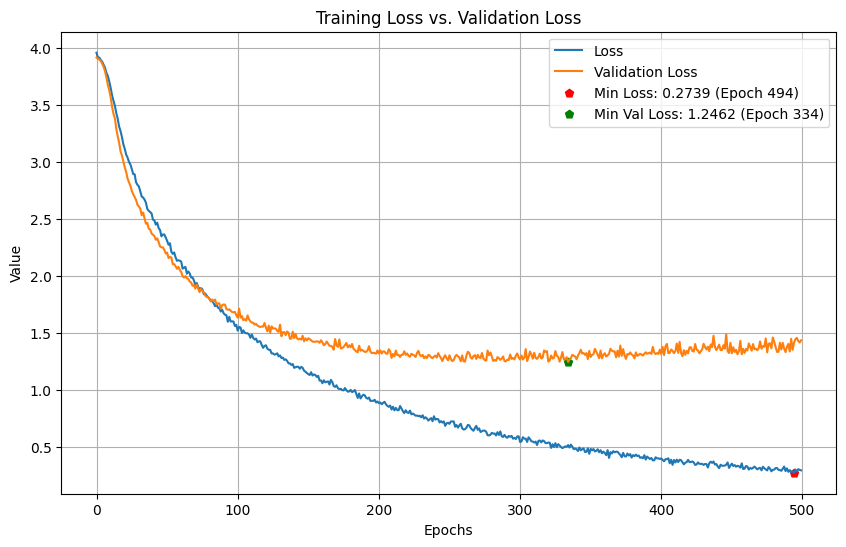

In [137]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

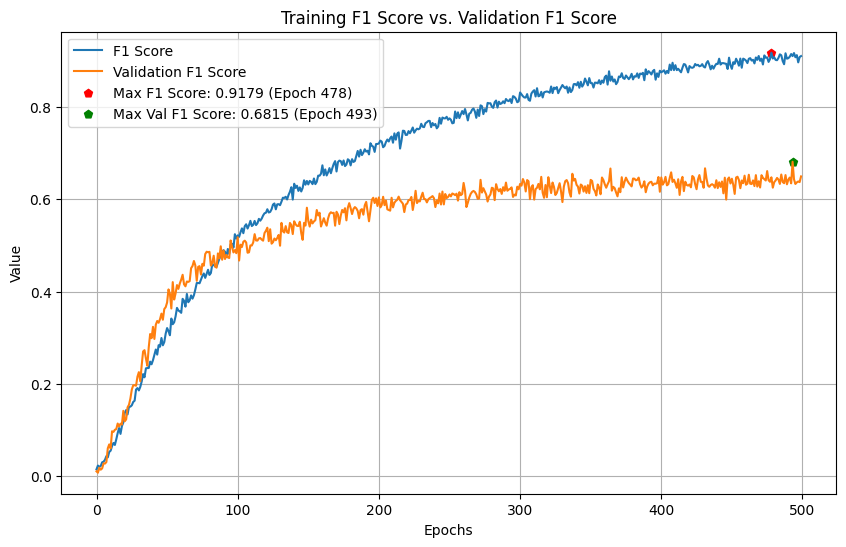

In [138]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [139]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.545     1.000     0.706         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.667     0.200     0.308        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.500     0.667         8
   BREAKFAST      0.833     0.833     0.833         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.714     0.833     0.769         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.667     0.333     0.444         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.667     0.500     0.571         8
         DOG      0.364     

In [121]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN")

In [122]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 127, 125)          199625    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 125)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 50)            25050     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3, 50)            0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 50)             0         
                                                                 
 flatten_1 (Flatten)         (None, 150)              

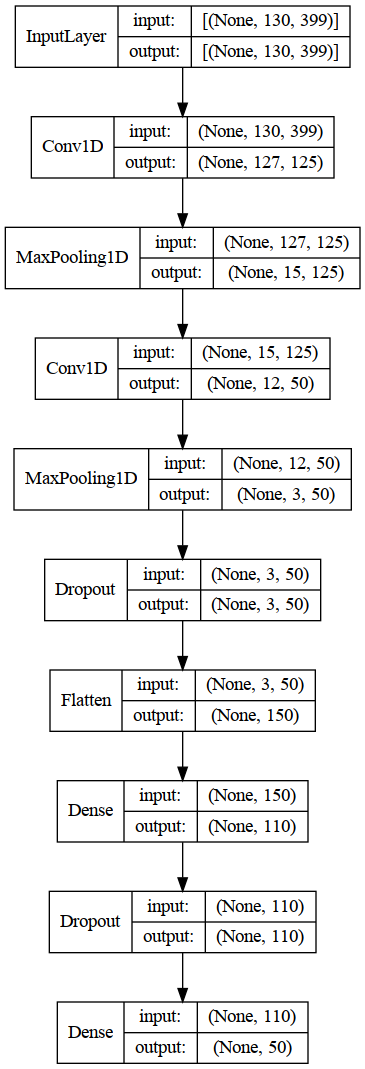

In [123]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [124]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-15 12:34:04.902305: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 7s 31ms/step - loss: 1.3521 - f1_score: 0.6815


[1.3520959615707397, 0.6814532279968262]

In [125]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 9ms/step - loss: 0.0371 - f1_score: 0.9996


[0.03709415718913078, 0.9995914697647095]

In [126]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      0.857     0.750     0.800         8
    BACKPACK      0.500     1.000     0.667         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.500     0.200     0.286        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.625     0.769         8
   BREAKFAST      1.000     0.667     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.800     0.667     0.727         6
    CONFUSED      0.455     0.833     0.588         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.111     0.167     0.133         6
      DECIDE      0.667     0.333     0.444         6
      DEMAND      0.833     0.625     0.714         8
     DEVELOP      1.000     0.667     0.800         6
      DINNER      1.000     0.500     0.667         8
         DOG      0.500    

## Hyperparameter Tuning 3 1D CNN Layers

In [60]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_865683/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [61]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Conv1D(filters=hp.Int('filters_3',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_3',
                       values=[2, 3, 4, 5],
                       default=2,
                   ),
                   activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.5,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(Flatten())
        model.add(
            Dense(units=hp.Int('units_5',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.5,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.0008273819395816823)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [62]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='3_1D_CNN',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/3_1D_CNN/tuner0.json


In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
filters_3 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_3 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.5, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_5 (Int)
{'default': 80, 'conditions': [], 'min_va

In [64]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [66]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 13m 56s]
val_f1_score: 0.5884857177734375

Best val_f1_score So Far: 0.6642428636550903
Total elapsed time: 00h 50m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models(num_models=6)[0]

In [68]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 175)          279475    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 175)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 62, 50)            17550     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 50)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 28, 200)           40200     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 200)          0

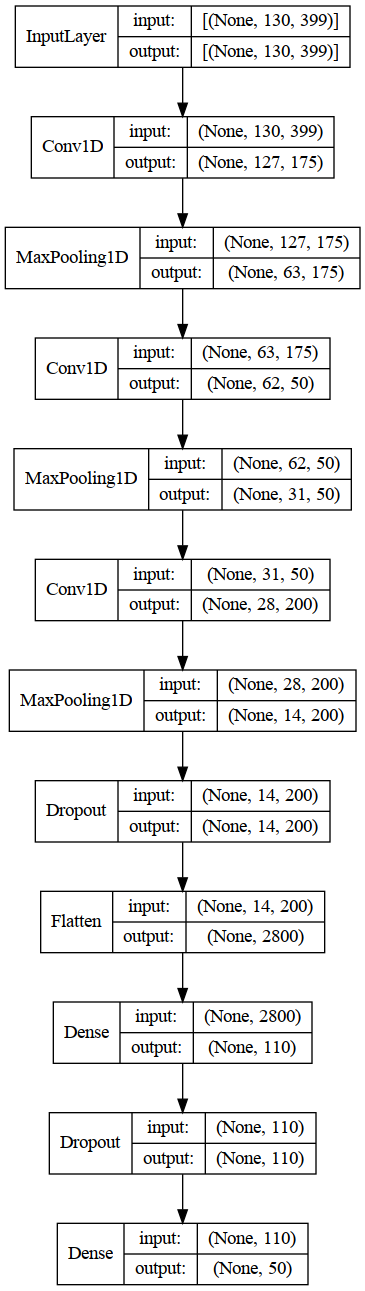

In [69]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [70]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/3_1D_CNN
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0700 summary
Hyperparameters:
dense_activation: mish
filters_1: 175
kernel_1: 4
filters_2: 50
kernel_2: 2
filters_3: 200
kernel_3: 4
dropout_1: 0.75
units_5: 110
dropout_2: 0.7
learning_rate: 0.0005114665076835432
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0693
Score: 0.6642428636550903

Trial 0671 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 4
filters_2: 150
kernel_2: 4
filters_3: 50
kernel_3: 2
dropout_1: 0.5
units_5: 100
dropout_2: 0.6
learning_rate: 0.00034113846912856477
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0666
Score: 0.663768470287323

Trial 0714 summary
Hyperparameters:
dense_activation: gelu
filters_1: 150
kernel_1: 2
filters_2: 75
kernel_2: 5
filters_3: 50
kernel_3: 4
dropout_1: 0.6
unit

In [71]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 31ms/step - loss: 1.4420 - f1_score: 0.6648


In [72]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 13ms/step - loss: 0.0543 - f1_score: 0.9975


In [73]:
bestHP = tuner.get_best_hyperparameters(num_trials=6)[0]

In [74]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='3 1D CNN/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [75]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 3.9455 - f1_score: 0.0226

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 17s 454ms/step - loss: 3.9455 - f1_score: 0.0226 - val_loss: 3.9094 - val_f1_score: 0.0034
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 3.9294 - f1_score: 0.0237

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 218ms/step - loss: 3.9294 - f1_score: 0.0237 - val_loss: 3.9047 - val_f1_score: 0.0087
Epoch 3/500
28/28 [==============================] - 2s 66ms/step - loss: 3.9199 - f1_score: 0.0190 - val_loss: 3.9036 - val_f1_score: 0.0072
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 3.9141 - f1_score: 0.0251

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 222ms/step - loss: 3.9141 - f1_score: 0.0251 - val_loss: 3.9037 - val_f1_score: 0.0116
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 3.9025 - f1_score: 0.0241

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 259ms/step - loss: 3.9025 - f1_score: 0.0241 - val_loss: 3.8935 - val_f1_score: 0.0126
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 3.8793 - f1_score: 0.0360

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 231ms/step - loss: 3.8793 - f1_score: 0.0360 - val_loss: 3.8653 - val_f1_score: 0.0131
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 3.8304 - f1_score: 0.0352

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 226ms/step - loss: 3.8304 - f1_score: 0.0352 - val_loss: 3.7742 - val_f1_score: 0.0270
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 3.7638 - f1_score: 0.0401

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 220ms/step - loss: 3.7638 - f1_score: 0.0401 - val_loss: 3.6288 - val_f1_score: 0.0430
Epoch 9/500
28/28 [==============================] - 2s 66ms/step - loss: 3.6514 - f1_score: 0.0629 - val_loss: 3.4788 - val_f1_score: 0.0302
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.5476 - f1_score: 0.0765

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 222ms/step - loss: 3.5476 - f1_score: 0.0765 - val_loss: 3.5120 - val_f1_score: 0.0513
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.4711 - f1_score: 0.0815

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 243ms/step - loss: 3.4711 - f1_score: 0.0815 - val_loss: 3.2655 - val_f1_score: 0.0860
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.3418 - f1_score: 0.1135

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 236ms/step - loss: 3.3418 - f1_score: 0.1135 - val_loss: 3.1376 - val_f1_score: 0.0997
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.2260 - f1_score: 0.1240

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 229ms/step - loss: 3.2260 - f1_score: 0.1240 - val_loss: 3.0233 - val_f1_score: 0.1348
Epoch 14/500
28/28 [==============================] - 2s 66ms/step - loss: 3.1516 - f1_score: 0.1396 - val_loss: 2.9261 - val_f1_score: 0.1329
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.0207 - f1_score: 0.1541

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 214ms/step - loss: 3.0207 - f1_score: 0.1541 - val_loss: 2.8229 - val_f1_score: 0.1640
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 2.9382 - f1_score: 0.1819

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 218ms/step - loss: 2.9382 - f1_score: 0.1819 - val_loss: 2.7539 - val_f1_score: 0.1738
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 2.8438 - f1_score: 0.2078

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 217ms/step - loss: 2.8438 - f1_score: 0.2078 - val_loss: 2.7188 - val_f1_score: 0.1878
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.7942 - f1_score: 0.2076

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 217ms/step - loss: 2.7942 - f1_score: 0.2076 - val_loss: 2.6029 - val_f1_score: 0.2009
Epoch 19/500
28/28 [==============================] - 2s 65ms/step - loss: 2.7154 - f1_score: 0.2183 - val_loss: 2.5623 - val_f1_score: 0.1977
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.6545 - f1_score: 0.2324

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 202ms/step - loss: 2.6545 - f1_score: 0.2324 - val_loss: 2.4816 - val_f1_score: 0.2435
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 2.6072 - f1_score: 0.2279

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 243ms/step - loss: 2.6072 - f1_score: 0.2279 - val_loss: 2.4355 - val_f1_score: 0.2462
Epoch 22/500
28/28 [==============================] - 2s 66ms/step - loss: 2.5055 - f1_score: 0.2586 - val_loss: 2.4948 - val_f1_score: 0.2288
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.4587 - f1_score: 0.2776

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 249ms/step - loss: 2.4587 - f1_score: 0.2776 - val_loss: 2.3497 - val_f1_score: 0.2684
Epoch 24/500
28/28 [==============================] - 2s 67ms/step - loss: 2.4129 - f1_score: 0.2955 - val_loss: 2.3254 - val_f1_score: 0.2645
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.3711 - f1_score: 0.3048

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 221ms/step - loss: 2.3711 - f1_score: 0.3048 - val_loss: 2.2991 - val_f1_score: 0.2724
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.3263 - f1_score: 0.3008

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 215ms/step - loss: 2.3263 - f1_score: 0.3008 - val_loss: 2.2371 - val_f1_score: 0.2766
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.3145 - f1_score: 0.3052

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 224ms/step - loss: 2.3145 - f1_score: 0.3052 - val_loss: 2.2139 - val_f1_score: 0.2770
Epoch 28/500
28/28 [==============================] - 2s 65ms/step - loss: 2.2256 - f1_score: 0.3236 - val_loss: 2.2235 - val_f1_score: 0.2609
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.1689 - f1_score: 0.3419

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 248ms/step - loss: 2.1689 - f1_score: 0.3419 - val_loss: 2.1325 - val_f1_score: 0.3152
Epoch 30/500
28/28 [==============================] - 2s 66ms/step - loss: 2.1452 - f1_score: 0.3655 - val_loss: 2.1884 - val_f1_score: 0.3025
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 2.1212 - f1_score: 0.3578

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 243ms/step - loss: 2.1212 - f1_score: 0.3578 - val_loss: 2.1541 - val_f1_score: 0.3311
Epoch 32/500
28/28 [==============================] - 2s 66ms/step - loss: 2.0789 - f1_score: 0.3619 - val_loss: 2.1357 - val_f1_score: 0.3052
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.0523 - f1_score: 0.3828

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 216ms/step - loss: 2.0523 - f1_score: 0.3828 - val_loss: 2.0773 - val_f1_score: 0.3473
Epoch 34/500
28/28 [==============================] - 2s 66ms/step - loss: 1.9753 - f1_score: 0.4024 - val_loss: 2.0884 - val_f1_score: 0.3326
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 1.9514 - f1_score: 0.4021

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 234ms/step - loss: 1.9514 - f1_score: 0.4021 - val_loss: 2.0488 - val_f1_score: 0.3683
Epoch 36/500
28/28 [==============================] - 2s 65ms/step - loss: 1.9155 - f1_score: 0.4057 - val_loss: 2.0110 - val_f1_score: 0.3533
Epoch 37/500
28/28 [==============================] - 2s 67ms/step - loss: 1.8700 - f1_score: 0.4233 - val_loss: 2.0108 - val_f1_score: 0.3575
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 1.8461 - f1_score: 0.4313

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 8s 289ms/step - loss: 1.8461 - f1_score: 0.4313 - val_loss: 1.9702 - val_f1_score: 0.3828
Epoch 39/500
28/28 [==============================] - 2s 66ms/step - loss: 1.8233 - f1_score: 0.4393 - val_loss: 1.9826 - val_f1_score: 0.3554
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 1.8474 - f1_score: 0.4314

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 229ms/step - loss: 1.8474 - f1_score: 0.4314 - val_loss: 1.9250 - val_f1_score: 0.4046
Epoch 41/500
28/28 [==============================] - 2s 66ms/step - loss: 1.7774 - f1_score: 0.4560 - val_loss: 1.9275 - val_f1_score: 0.3994
Epoch 42/500
28/28 [==============================] - 2s 66ms/step - loss: 1.7955 - f1_score: 0.4362 - val_loss: 1.9348 - val_f1_score: 0.3842
Epoch 43/500
28/28 [==============================] - 2s 67ms/step - loss: 1.6905 - f1_score: 0.4854 - val_loss: 1.9178 - val_f1_score: 0.3811
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.6831 - f1_score: 0.4794

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 228ms/step - loss: 1.6831 - f1_score: 0.4794 - val_loss: 1.8571 - val_f1_score: 0.4458
Epoch 45/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6466 - f1_score: 0.4813 - val_loss: 1.8758 - val_f1_score: 0.4211
Epoch 46/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6048 - f1_score: 0.4905 - val_loss: 1.8860 - val_f1_score: 0.4154
Epoch 47/500
28/28 [==============================] - 2s 66ms/step - loss: 1.5925 - f1_score: 0.4995 - val_loss: 1.8232 - val_f1_score: 0.4415
Epoch 48/500
28/28 [==============================] - 2s 66ms/step - loss: 1.6193 - f1_score: 0.4950 - val_loss: 1.8246 - val_f1_score: 0.4203
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 1.5621 - f1_score: 0.5092

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 232ms/step - loss: 1.5621 - f1_score: 0.5092 - val_loss: 1.8054 - val_f1_score: 0.4458
Epoch 50/500
28/28 [==============================] - 2s 66ms/step - loss: 1.5734 - f1_score: 0.5110 - val_loss: 1.8474 - val_f1_score: 0.4100
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 1.5275 - f1_score: 0.5221

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 229ms/step - loss: 1.5275 - f1_score: 0.5221 - val_loss: 1.7770 - val_f1_score: 0.4689
Epoch 52/500
28/28 [==============================] - 2s 66ms/step - loss: 1.4974 - f1_score: 0.5264 - val_loss: 1.8606 - val_f1_score: 0.4194
Epoch 53/500
28/28 [==============================] - 2s 66ms/step - loss: 1.4721 - f1_score: 0.5459 - val_loss: 1.7381 - val_f1_score: 0.4624
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 1.4926 - f1_score: 0.5197

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 272ms/step - loss: 1.4926 - f1_score: 0.5197 - val_loss: 1.7246 - val_f1_score: 0.4778
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.4499 - f1_score: 0.5419

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 5s 198ms/step - loss: 1.4499 - f1_score: 0.5419 - val_loss: 1.7387 - val_f1_score: 0.4830
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 1.4523 - f1_score: 0.5385

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 224ms/step - loss: 1.4523 - f1_score: 0.5385 - val_loss: 1.7117 - val_f1_score: 0.4851
Epoch 57/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3963 - f1_score: 0.5594 - val_loss: 1.8051 - val_f1_score: 0.4462
Epoch 58/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3479 - f1_score: 0.5739 - val_loss: 1.7781 - val_f1_score: 0.4311
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 1.3531 - f1_score: 0.5515

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 248ms/step - loss: 1.3531 - f1_score: 0.5515 - val_loss: 1.7037 - val_f1_score: 0.4887
Epoch 60/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3560 - f1_score: 0.5680 - val_loss: 1.7398 - val_f1_score: 0.4633
Epoch 61/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3487 - f1_score: 0.5624 - val_loss: 1.7830 - val_f1_score: 0.4334
Epoch 62/500
28/28 [==============================] - 2s 66ms/step - loss: 1.3249 - f1_score: 0.5764 - val_loss: 1.6772 - val_f1_score: 0.4871
Epoch 63/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2815 - f1_score: 0.5940 - val_loss: 1.7351 - val_f1_score: 0.4863
Epoch 64/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2817 - f1_score: 0.5865 - val_loss: 1.6972 - val_f1_score: 0.4692
Epoch 65/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2529 - f1_score: 0.5941 - val_loss: 1.6426 - val_f1_score: 0.4638
Epoch 66/50

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 21s 764ms/step - loss: 1.2464 - f1_score: 0.6008 - val_loss: 1.5913 - val_f1_score: 0.5237
Epoch 69/500
28/28 [==============================] - 2s 65ms/step - loss: 1.2219 - f1_score: 0.6063 - val_loss: 1.5912 - val_f1_score: 0.5148
Epoch 70/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2064 - f1_score: 0.6169 - val_loss: 1.5941 - val_f1_score: 0.5195
Epoch 71/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1855 - f1_score: 0.6147 - val_loss: 1.6145 - val_f1_score: 0.5094
Epoch 72/500
28/28 [==============================] - 2s 66ms/step - loss: 1.2087 - f1_score: 0.6165 - val_loss: 1.6826 - val_f1_score: 0.4893
Epoch 73/500
28/28 [==============================] - 2s 67ms/step - loss: 1.1685 - f1_score: 0.6231 - val_loss: 1.6184 - val_f1_score: 0.4895
Epoch 74/500
28/28 [==============================] - 2s 66ms/step - loss: 1.1435 - f1_score: 0.6305 - val_loss: 1.6075 - val_f1_score: 0.5131
Epoch 75/5

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 255ms/step - loss: 1.1333 - f1_score: 0.6287 - val_loss: 1.6221 - val_f1_score: 0.5379
Epoch 77/500
28/28 [==============================] - 2s 68ms/step - loss: 1.1030 - f1_score: 0.6363 - val_loss: 1.5921 - val_f1_score: 0.5257
Epoch 78/500
28/28 [==============================] - 2s 65ms/step - loss: 1.0769 - f1_score: 0.6480 - val_loss: 1.5621 - val_f1_score: 0.5031
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 1.0850 - f1_score: 0.6484

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 225ms/step - loss: 1.0850 - f1_score: 0.6484 - val_loss: 1.5203 - val_f1_score: 0.5558
Epoch 80/500
28/28 [==============================] - 2s 69ms/step - loss: 1.0268 - f1_score: 0.6655 - val_loss: 1.5663 - val_f1_score: 0.5381
Epoch 81/500
28/28 [==============================] - 2s 66ms/step - loss: 1.0382 - f1_score: 0.6498 - val_loss: 1.6130 - val_f1_score: 0.5348
Epoch 82/500
28/28 [==============================] - 2s 66ms/step - loss: 1.0468 - f1_score: 0.6541 - val_loss: 1.5822 - val_f1_score: 0.5235
Epoch 83/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0218 - f1_score: 0.6683 - val_loss: 1.5333 - val_f1_score: 0.5304
Epoch 84/500
28/28 [==============================] - 2s 67ms/step - loss: 1.0504 - f1_score: 0.6639 - val_loss: 1.5986 - val_f1_score: 0.5214
Epoch 85/500
28/28 [==============================] - 2s 69ms/step - loss: 0.9971 - f1_score: 0.6677 - val_loss: 1.6345 - val_f1_score: 0.5105
Epoch 86/50

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 8s 290ms/step - loss: 0.8993 - f1_score: 0.6976 - val_loss: 1.5600 - val_f1_score: 0.5622
Epoch 98/500
28/28 [==============================] - 2s 66ms/step - loss: 0.8950 - f1_score: 0.7072 - val_loss: 1.5681 - val_f1_score: 0.5342
Epoch 99/500
28/28 [==============================] - 2s 66ms/step - loss: 0.8926 - f1_score: 0.7081 - val_loss: 1.5554 - val_f1_score: 0.5433
Epoch 100/500
28/28 [==============================] - ETA: 0s - loss: 0.9025 - f1_score: 0.6966

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 227ms/step - loss: 0.9025 - f1_score: 0.6966 - val_loss: 1.5581 - val_f1_score: 0.5676
Epoch 101/500
28/28 [==============================] - 2s 66ms/step - loss: 0.8563 - f1_score: 0.7155 - val_loss: 1.5652 - val_f1_score: 0.5463
Epoch 102/500
28/28 [==============================] - 2s 67ms/step - loss: 0.8972 - f1_score: 0.7044 - val_loss: 1.5547 - val_f1_score: 0.5641
Epoch 103/500
28/28 [==============================] - 2s 67ms/step - loss: 0.8844 - f1_score: 0.7095 - val_loss: 1.5090 - val_f1_score: 0.5495
Epoch 104/500
28/28 [==============================] - 2s 68ms/step - loss: 0.8400 - f1_score: 0.7076 - val_loss: 1.5047 - val_f1_score: 0.5478
Epoch 105/500
28/28 [==============================] - 2s 67ms/step - loss: 0.9223 - f1_score: 0.6853 - val_loss: 1.5246 - val_f1_score: 0.5470
Epoch 106/500
28/28 [==============================] - 2s 68ms/step - loss: 0.8451 - f1_score: 0.7248 - val_loss: 1.6164 - val_f1_score: 0.5623
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 247ms/step - loss: 0.8172 - f1_score: 0.7316 - val_loss: 1.5326 - val_f1_score: 0.5841
Epoch 109/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8564 - f1_score: 0.7252 - val_loss: 1.6160 - val_f1_score: 0.5201
Epoch 110/500
28/28 [==============================] - 2s 67ms/step - loss: 0.8035 - f1_score: 0.7396 - val_loss: 1.6072 - val_f1_score: 0.5377
Epoch 111/500
28/28 [==============================] - 2s 67ms/step - loss: 0.8159 - f1_score: 0.7316 - val_loss: 1.5029 - val_f1_score: 0.5687
Epoch 112/500
28/28 [==============================] - 2s 67ms/step - loss: 0.7854 - f1_score: 0.7311 - val_loss: 1.5355 - val_f1_score: 0.5798
Epoch 113/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7937 - f1_score: 0.7402 - val_loss: 1.5263 - val_f1_score: 0.5643
Epoch 114/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7915 - f1_score: 0.7260 - val_loss: 1.5733 - val_f1_score: 0.5318
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 258ms/step - loss: 0.7466 - f1_score: 0.7520 - val_loss: 1.5130 - val_f1_score: 0.5890
Epoch 123/500
28/28 [==============================] - ETA: 0s - loss: 0.7404 - f1_score: 0.7692

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 222ms/step - loss: 0.7404 - f1_score: 0.7692 - val_loss: 1.4547 - val_f1_score: 0.5954
Epoch 124/500
28/28 [==============================] - 2s 66ms/step - loss: 0.7287 - f1_score: 0.7568 - val_loss: 1.4534 - val_f1_score: 0.5698
Epoch 125/500
28/28 [==============================] - 2s 68ms/step - loss: 0.7568 - f1_score: 0.7613 - val_loss: 1.4907 - val_f1_score: 0.5722
Epoch 126/500
28/28 [==============================] - 2s 67ms/step - loss: 0.7391 - f1_score: 0.7609 - val_loss: 1.5076 - val_f1_score: 0.5840
Epoch 127/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6957 - f1_score: 0.7725 - val_loss: 1.5316 - val_f1_score: 0.5619
Epoch 128/500
28/28 [==============================] - 2s 67ms/step - loss: 0.7279 - f1_score: 0.7522 - val_loss: 1.5452 - val_f1_score: 0.5562
Epoch 129/500
28/28 [==============================] - 2s 69ms/step - loss: 0.7515 - f1_score: 0.7477 - val_loss: 1.4480 - val_f1_score: 0.5820
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 256ms/step - loss: 0.6494 - f1_score: 0.7736 - val_loss: 1.4778 - val_f1_score: 0.5956
Epoch 145/500
28/28 [==============================] - ETA: 0s - loss: 0.6839 - f1_score: 0.7660

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 224ms/step - loss: 0.6839 - f1_score: 0.7660 - val_loss: 1.5285 - val_f1_score: 0.6088
Epoch 146/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6629 - f1_score: 0.7814 - val_loss: 1.5313 - val_f1_score: 0.5713
Epoch 147/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6532 - f1_score: 0.7780 - val_loss: 1.5115 - val_f1_score: 0.5779
Epoch 148/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6467 - f1_score: 0.7815 - val_loss: 1.4533 - val_f1_score: 0.5903
Epoch 149/500
28/28 [==============================] - 2s 77ms/step - loss: 0.6023 - f1_score: 0.7955 - val_loss: 1.5820 - val_f1_score: 0.5648
Epoch 150/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6408 - f1_score: 0.7894 - val_loss: 1.4101 - val_f1_score: 0.6083
Epoch 151/500
28/28 [==============================] - 2s 68ms/step - loss: 0.6445 - f1_score: 0.7724 - val_loss: 1.4365 - val_f1_score: 0.6039
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 231ms/step - loss: 0.5782 - f1_score: 0.8100 - val_loss: 1.4267 - val_f1_score: 0.6117
Epoch 163/500
28/28 [==============================] - 2s 67ms/step - loss: 0.6122 - f1_score: 0.7911 - val_loss: 1.5330 - val_f1_score: 0.5913
Epoch 164/500
28/28 [==============================] - 2s 67ms/step - loss: 0.5623 - f1_score: 0.8101 - val_loss: 1.5140 - val_f1_score: 0.5992
Epoch 165/500
28/28 [==============================] - 2s 69ms/step - loss: 0.5728 - f1_score: 0.7988 - val_loss: 1.5014 - val_f1_score: 0.6028
Epoch 166/500
28/28 [==============================] - ETA: 0s - loss: 0.5812 - f1_score: 0.8012

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 252ms/step - loss: 0.5812 - f1_score: 0.8012 - val_loss: 1.4339 - val_f1_score: 0.6192
Epoch 167/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5581 - f1_score: 0.8136 - val_loss: 1.5337 - val_f1_score: 0.5962
Epoch 168/500
28/28 [==============================] - 2s 67ms/step - loss: 0.5800 - f1_score: 0.8107 - val_loss: 1.5016 - val_f1_score: 0.5792
Epoch 169/500
28/28 [==============================] - 2s 67ms/step - loss: 0.5986 - f1_score: 0.8003 - val_loss: 1.4617 - val_f1_score: 0.6113
Epoch 170/500
28/28 [==============================] - 2s 68ms/step - loss: 0.5942 - f1_score: 0.7940 - val_loss: 1.5359 - val_f1_score: 0.6175
Epoch 171/500
28/28 [==============================] - 2s 68ms/step - loss: 0.5762 - f1_score: 0.8032 - val_loss: 1.4756 - val_f1_score: 0.6123
Epoch 172/500
28/28 [==============================] - 2s 69ms/step - loss: 0.5647 - f1_score: 0.8090 - val_loss: 1.5349 - val_f1_score: 0.6002
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 23s 851ms/step - loss: 0.5346 - f1_score: 0.8329 - val_loss: 1.4650 - val_f1_score: 0.6248
Epoch 177/500
28/28 [==============================] - ETA: 0s - loss: 0.5364 - f1_score: 0.8211

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 268ms/step - loss: 0.5364 - f1_score: 0.8211 - val_loss: 1.4958 - val_f1_score: 0.6405
Epoch 178/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5542 - f1_score: 0.8195 - val_loss: 1.5377 - val_f1_score: 0.6030
Epoch 179/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5379 - f1_score: 0.8215 - val_loss: 1.5169 - val_f1_score: 0.5893
Epoch 180/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5291 - f1_score: 0.8279 - val_loss: 1.5638 - val_f1_score: 0.6063
Epoch 181/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5374 - f1_score: 0.8193 - val_loss: 1.4980 - val_f1_score: 0.6048
Epoch 182/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5333 - f1_score: 0.8304 - val_loss: 1.5620 - val_f1_score: 0.5925
Epoch 183/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5197 - f1_score: 0.8200 - val_loss: 1.4982 - val_f1_score: 0.6341
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 22s 806ms/step - loss: 0.4987 - f1_score: 0.8358 - val_loss: 1.4093 - val_f1_score: 0.6418
Epoch 193/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5150 - f1_score: 0.8269 - val_loss: 1.5285 - val_f1_score: 0.6250
Epoch 194/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5092 - f1_score: 0.8287 - val_loss: 1.4418 - val_f1_score: 0.6262
Epoch 195/500
28/28 [==============================] - 2s 67ms/step - loss: 0.4977 - f1_score: 0.8290 - val_loss: 1.5946 - val_f1_score: 0.5875
Epoch 196/500
28/28 [==============================] - 2s 68ms/step - loss: 0.5038 - f1_score: 0.8229 - val_loss: 1.5872 - val_f1_score: 0.6012
Epoch 197/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5045 - f1_score: 0.8326 - val_loss: 1.5225 - val_f1_score: 0.6288
Epoch 198/500
28/28 [==============================] - 2s 66ms/step - loss: 0.5255 - f1_score: 0.8329 - val_loss: 1.5440 - val_f1_score: 0.6355
Epoc

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 255ms/step - loss: 0.4582 - f1_score: 0.8495 - val_loss: 1.4905 - val_f1_score: 0.6470
Epoch 206/500
28/28 [==============================] - 2s 67ms/step - loss: 0.5138 - f1_score: 0.8230 - val_loss: 1.5045 - val_f1_score: 0.6162
Epoch 207/500
28/28 [==============================] - 2s 68ms/step - loss: 0.4874 - f1_score: 0.8373 - val_loss: 1.5712 - val_f1_score: 0.6099
Epoch 208/500
28/28 [==============================] - 2s 68ms/step - loss: 0.5049 - f1_score: 0.8254 - val_loss: 1.4590 - val_f1_score: 0.6413
Epoch 209/500
28/28 [==============================] - 2s 68ms/step - loss: 0.4876 - f1_score: 0.8382 - val_loss: 1.5897 - val_f1_score: 0.6172
Epoch 210/500
28/28 [==============================] - 2s 69ms/step - loss: 0.4750 - f1_score: 0.8486 - val_loss: 1.4717 - val_f1_score: 0.6343
Epoch 211/500
28/28 [==============================] - 2s 79ms/step - loss: 0.4640 - f1_score: 0.8438 - val_loss: 1.5145 - val_f1_score: 0.6296
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 232ms/step - loss: 0.4541 - f1_score: 0.8503 - val_loss: 1.4538 - val_f1_score: 0.6511
Epoch 232/500
28/28 [==============================] - ETA: 0s - loss: 0.4370 - f1_score: 0.8549

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 251ms/step - loss: 0.4370 - f1_score: 0.8549 - val_loss: 1.4663 - val_f1_score: 0.6526
Epoch 233/500
28/28 [==============================] - 2s 67ms/step - loss: 0.4288 - f1_score: 0.8499 - val_loss: 1.5041 - val_f1_score: 0.6289
Epoch 234/500
28/28 [==============================] - 2s 67ms/step - loss: 0.4535 - f1_score: 0.8593 - val_loss: 1.4377 - val_f1_score: 0.6445
Epoch 235/500
28/28 [==============================] - 2s 68ms/step - loss: 0.3999 - f1_score: 0.8676 - val_loss: 1.4858 - val_f1_score: 0.6394
Epoch 236/500
28/28 [==============================] - 2s 68ms/step - loss: 0.4258 - f1_score: 0.8485 - val_loss: 1.6599 - val_f1_score: 0.6091
Epoch 237/500
28/28 [==============================] - 2s 69ms/step - loss: 0.4254 - f1_score: 0.8616 - val_loss: 1.5481 - val_f1_score: 0.6397
Epoch 238/500
28/28 [==============================] - 2s 69ms/step - loss: 0.4208 - f1_score: 0.8535 - val_loss: 1.4930 - val_f1_score: 0.6378
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 6s 236ms/step - loss: 0.4058 - f1_score: 0.8653 - val_loss: 1.4151 - val_f1_score: 0.6603
Epoch 247/500
28/28 [==============================] - 2s 67ms/step - loss: 0.4161 - f1_score: 0.8621 - val_loss: 1.5564 - val_f1_score: 0.6535
Epoch 248/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3976 - f1_score: 0.8653 - val_loss: 1.4453 - val_f1_score: 0.6397
Epoch 249/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3707 - f1_score: 0.8761 - val_loss: 1.4984 - val_f1_score: 0.6456
Epoch 250/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3976 - f1_score: 0.8697 - val_loss: 1.3964 - val_f1_score: 0.6412
Epoch 251/500
28/28 [==============================] - 2s 69ms/step - loss: 0.4464 - f1_score: 0.8521 - val_loss: 1.4982 - val_f1_score: 0.6467
Epoch 252/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3980 - f1_score: 0.8675 - val_loss: 1.5409 - val_f1_score: 0.6497
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 272ms/step - loss: 0.3710 - f1_score: 0.8770 - val_loss: 1.4904 - val_f1_score: 0.6734
Epoch 262/500
28/28 [==============================] - 2s 67ms/step - loss: 0.3930 - f1_score: 0.8704 - val_loss: 1.4717 - val_f1_score: 0.6318
Epoch 263/500
28/28 [==============================] - 2s 68ms/step - loss: 0.3804 - f1_score: 0.8780 - val_loss: 1.6335 - val_f1_score: 0.6253
Epoch 264/500
28/28 [==============================] - 2s 68ms/step - loss: 0.3838 - f1_score: 0.8731 - val_loss: 1.4446 - val_f1_score: 0.6657
Epoch 265/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3930 - f1_score: 0.8620 - val_loss: 1.5021 - val_f1_score: 0.6477
Epoch 266/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3713 - f1_score: 0.8820 - val_loss: 1.5527 - val_f1_score: 0.6565
Epoch 267/500
28/28 [==============================] - 2s 69ms/step - loss: 0.4042 - f1_score: 0.8623 - val_loss: 1.5441 - val_f1_score: 0.6587
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 8s 279ms/step - loss: 0.3666 - f1_score: 0.8765 - val_loss: 1.5653 - val_f1_score: 0.6832
Epoch 287/500
28/28 [==============================] - 2s 67ms/step - loss: 0.3589 - f1_score: 0.8793 - val_loss: 1.5798 - val_f1_score: 0.6689
Epoch 288/500
28/28 [==============================] - 2s 68ms/step - loss: 0.3385 - f1_score: 0.8837 - val_loss: 1.4468 - val_f1_score: 0.6663
Epoch 289/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3707 - f1_score: 0.8750 - val_loss: 1.7082 - val_f1_score: 0.6263
Epoch 290/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3710 - f1_score: 0.8767 - val_loss: 1.6400 - val_f1_score: 0.6430
Epoch 291/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3596 - f1_score: 0.8840 - val_loss: 1.4440 - val_f1_score: 0.6607
Epoch 292/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3789 - f1_score: 0.8698 - val_loss: 1.5199 - val_f1_score: 0.6570
Epoch

Epoch 343/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3170 - f1_score: 0.8977 - val_loss: 1.5492 - val_f1_score: 0.6752
Epoch 344/500
28/28 [==============================] - 2s 72ms/step - loss: 0.3375 - f1_score: 0.8888 - val_loss: 1.5771 - val_f1_score: 0.6341
Epoch 345/500
28/28 [==============================] - 2s 75ms/step - loss: 0.3098 - f1_score: 0.8961 - val_loss: 1.6354 - val_f1_score: 0.6381
Epoch 346/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3085 - f1_score: 0.8914 - val_loss: 1.5819 - val_f1_score: 0.6803
Epoch 347/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3186 - f1_score: 0.8952 - val_loss: 1.7300 - val_f1_score: 0.6356
Epoch 348/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3217 - f1_score: 0.8919 - val_loss: 1.6580 - val_f1_score: 0.6484
Epoch 349/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3021 - f1_score: 0.8997 - val_loss: 1.5552 - val_f1_score:

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 273ms/step - loss: 0.3001 - f1_score: 0.9043 - val_loss: 1.5359 - val_f1_score: 0.6873
Epoch 352/500
28/28 [==============================] - 2s 67ms/step - loss: 0.3202 - f1_score: 0.8890 - val_loss: 1.5303 - val_f1_score: 0.6669
Epoch 353/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2925 - f1_score: 0.9017 - val_loss: 1.6528 - val_f1_score: 0.6744
Epoch 354/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3229 - f1_score: 0.9009 - val_loss: 1.6555 - val_f1_score: 0.6617
Epoch 355/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3211 - f1_score: 0.8929 - val_loss: 1.6123 - val_f1_score: 0.6421
Epoch 356/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3165 - f1_score: 0.8970 - val_loss: 1.6177 - val_f1_score: 0.6506
Epoch 357/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3248 - f1_score: 0.8880 - val_loss: 1.7251 - val_f1_score: 0.6487
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 259ms/step - loss: 0.3051 - f1_score: 0.9055 - val_loss: 1.6474 - val_f1_score: 0.6877
Epoch 359/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2933 - f1_score: 0.9028 - val_loss: 1.5690 - val_f1_score: 0.6644
Epoch 360/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2980 - f1_score: 0.8959 - val_loss: 1.6294 - val_f1_score: 0.6451
Epoch 361/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2887 - f1_score: 0.9022 - val_loss: 1.6678 - val_f1_score: 0.6507
Epoch 362/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3027 - f1_score: 0.8979 - val_loss: 1.7035 - val_f1_score: 0.6646
Epoch 363/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2949 - f1_score: 0.9044 - val_loss: 1.5750 - val_f1_score: 0.6750
Epoch 364/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3301 - f1_score: 0.8815 - val_loss: 1.6510 - val_f1_score: 0.6582
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 8s 276ms/step - loss: 0.2829 - f1_score: 0.8998 - val_loss: 1.5227 - val_f1_score: 0.6920
Epoch 378/500
28/28 [==============================] - 2s 67ms/step - loss: 0.3219 - f1_score: 0.8993 - val_loss: 1.4964 - val_f1_score: 0.6788
Epoch 379/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2886 - f1_score: 0.9104 - val_loss: 1.6414 - val_f1_score: 0.6521
Epoch 380/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2717 - f1_score: 0.9120 - val_loss: 1.6748 - val_f1_score: 0.6348
Epoch 381/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2885 - f1_score: 0.8989 - val_loss: 1.6023 - val_f1_score: 0.6753
Epoch 382/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3252 - f1_score: 0.8873 - val_loss: 1.7002 - val_f1_score: 0.6318
Epoch 383/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3054 - f1_score: 0.8997 - val_loss: 1.5757 - val_f1_score: 0.6734
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 8s 285ms/step - loss: 0.2672 - f1_score: 0.9116 - val_loss: 1.5001 - val_f1_score: 0.7049
Epoch 410/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2660 - f1_score: 0.9058 - val_loss: 1.7011 - val_f1_score: 0.6494
Epoch 411/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2798 - f1_score: 0.9086 - val_loss: 1.6071 - val_f1_score: 0.6706
Epoch 412/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2883 - f1_score: 0.9040 - val_loss: 1.6363 - val_f1_score: 0.6534
Epoch 413/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2939 - f1_score: 0.9010 - val_loss: 1.6441 - val_f1_score: 0.6663
Epoch 414/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2972 - f1_score: 0.8971 - val_loss: 1.5743 - val_f1_score: 0.6708
Epoch 415/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2648 - f1_score: 0.9085 - val_loss: 1.7727 - val_f1_score: 0.6530
Epoch

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 11s 400ms/step - loss: 0.2526 - f1_score: 0.9210 - val_loss: 1.5721 - val_f1_score: 0.7049
Epoch 449/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2552 - f1_score: 0.9131 - val_loss: 1.6411 - val_f1_score: 0.6702
Epoch 450/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2856 - f1_score: 0.9081 - val_loss: 1.5491 - val_f1_score: 0.6883
Epoch 451/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2621 - f1_score: 0.9119 - val_loss: 1.5776 - val_f1_score: 0.6896
Epoch 452/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2826 - f1_score: 0.9100 - val_loss: 1.6226 - val_f1_score: 0.6743
Epoch 453/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2596 - f1_score: 0.9141 - val_loss: 1.6001 - val_f1_score: 0.6945
Epoch 454/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2654 - f1_score: 0.9084 - val_loss: 1.5475 - val_f1_score: 0.6913
Epoc

INFO:tensorflow:Assets written to: 3 1D CNN/assets


INFO:tensorflow:Assets written to: 3 1D CNN/assets


28/28 [==============================] - 7s 275ms/step - loss: 0.2555 - f1_score: 0.9173 - val_loss: 1.5809 - val_f1_score: 0.7078
Epoch 486/500
28/28 [==============================] - 2s 67ms/step - loss: 0.2041 - f1_score: 0.9296 - val_loss: 1.8261 - val_f1_score: 0.6595
Epoch 487/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2513 - f1_score: 0.9197 - val_loss: 1.5828 - val_f1_score: 0.6827
Epoch 488/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2574 - f1_score: 0.9163 - val_loss: 1.6714 - val_f1_score: 0.6693
Epoch 489/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2788 - f1_score: 0.9096 - val_loss: 1.5576 - val_f1_score: 0.6848
Epoch 490/500
28/28 [==============================] - 2s 70ms/step - loss: 0.2514 - f1_score: 0.9150 - val_loss: 1.6177 - val_f1_score: 0.6790
Epoch 491/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2471 - f1_score: 0.9201 - val_loss: 1.5959 - val_f1_score: 0.6793
Epoch

In [76]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '3 1D CNN/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [77]:
hist_df = pd.read_csv('3 1D CNN/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.244742  0.916467  1.498063      0.701633
496  0.225180  0.927880  1.533440      0.703817
497  0.266526  0.914869  1.484032      0.705128
498  0.257320  0.918846  1.805072      0.685212
499  0.282138  0.911249  1.643248      0.662925

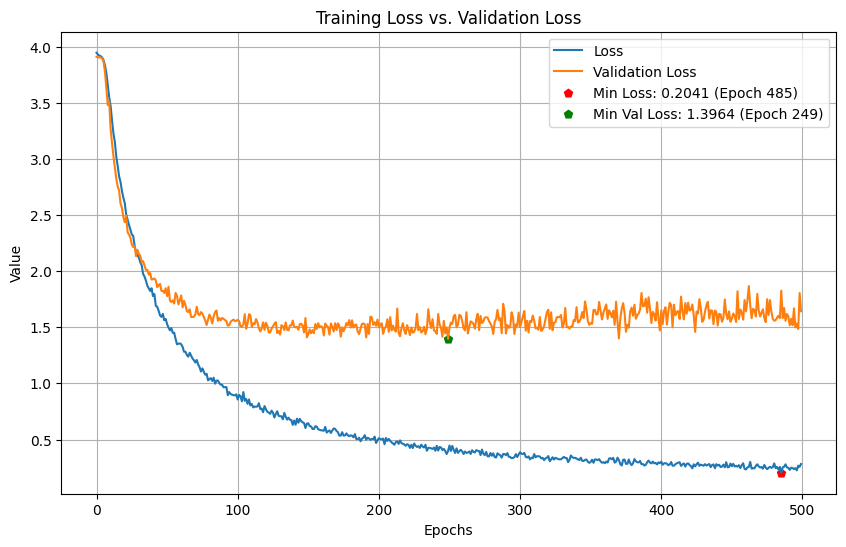

In [78]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

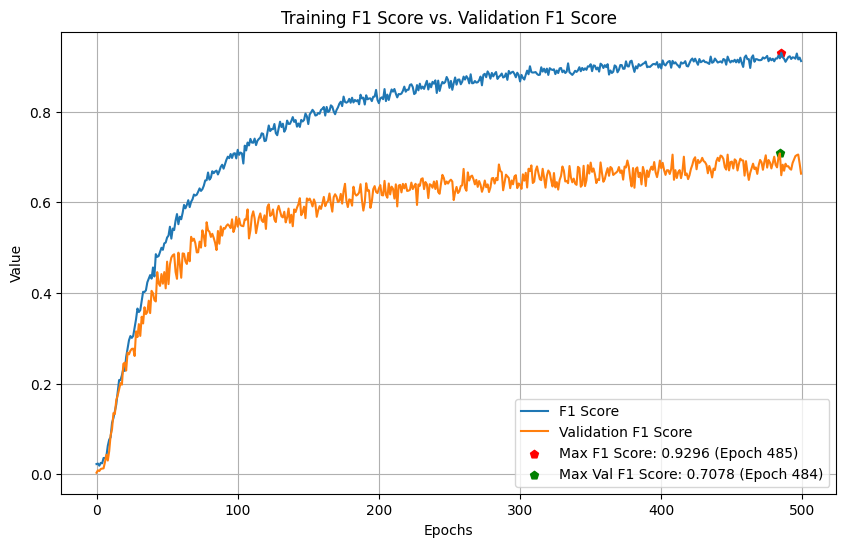

In [79]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [80]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.750     0.750         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      1.000     0.800     0.889        10
        BELT      0.571     1.000     0.727         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.667     0.333     0.444         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.333     0.167     0.222         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.273    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
reconstructed_model = tf.keras.models.load_model("3 1D CNN")

In [82]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 13ms/step - loss: 1.5809 - f1_score: 0.7078


[1.5808604955673218, 0.7077520489692688]

In [83]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 12ms/step - loss: 0.0030 - f1_score: 1.0000


[0.0030466571915894747, 1.0]

In [84]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 127, 175)          279475    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 63, 175)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 62, 50)            17550     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 31, 50)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 200)           40200     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 14, 200)         

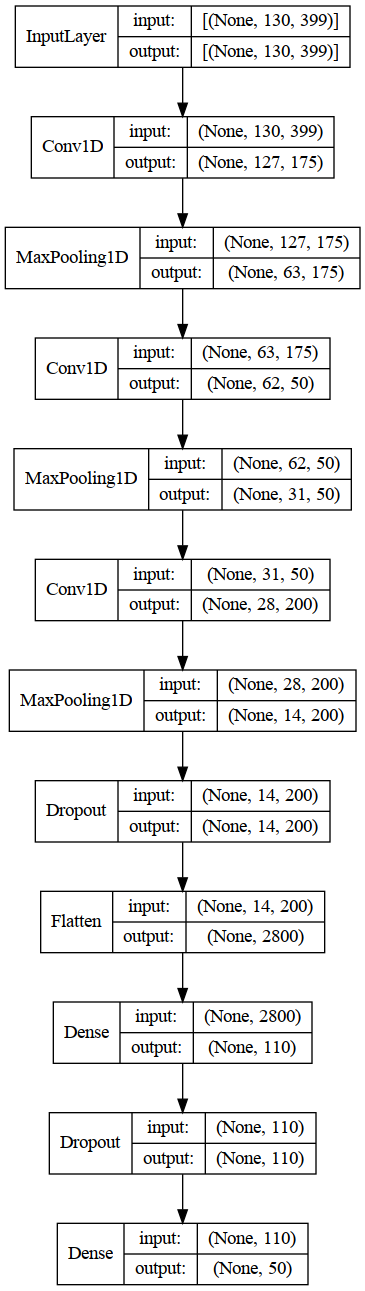

In [85]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

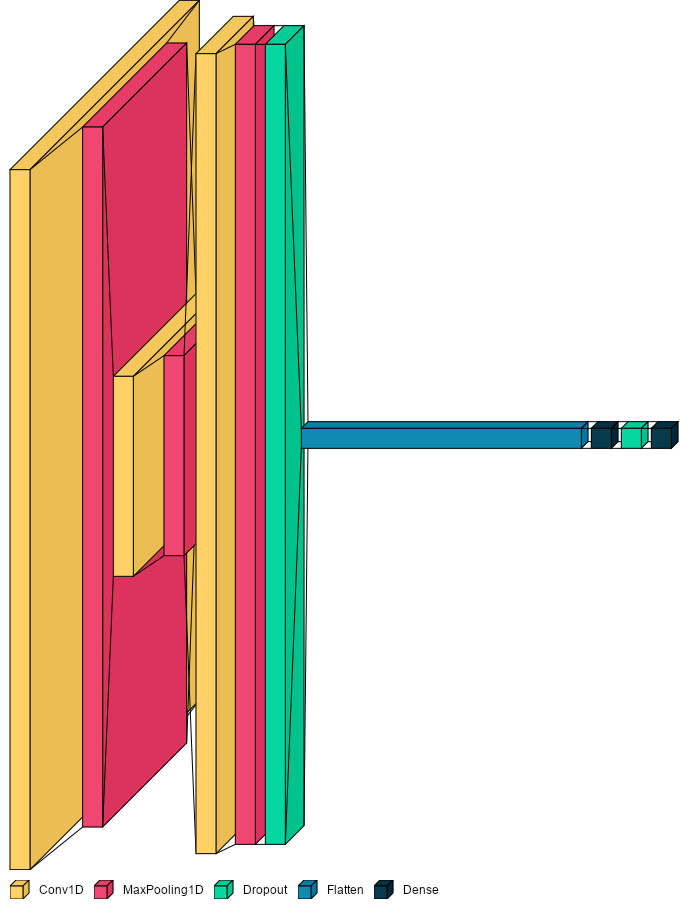

In [86]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [87]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         AXE      0.750     0.750     0.750         8
    BACKPACK      0.857     1.000     0.923         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.889     0.800     0.842        10
        BELT      0.500     1.000     0.667         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.667     0.333     0.444         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.250     0.167     0.200         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.333     0.167     0.222         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.286    

## Hyperparameter Tuning 1 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_572785/3109640001.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[5, 10, 15, 20],
                       default=20,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[5, 10, 15, 20],
                default=20,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            GRU(units=hp.Int('units_1',
                             min_value=50,
                             max_value=200,
                             step=25,
                             default=100),
                return_sequences=False,
                kernel_regularizer=regularizers.l2(
                    hp.Float('regularizer',
                             min_value=1e-4,
                             max_value=1e-2,
                             sampling='LOG',
                             default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='1_1D_CNN+1_GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_1D_CNN+1_GRU/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 16m 56s]
val_f1_score: 0.4801226407289505

Best val_f1_score So Far: 0.7247181534767151
Total elapsed time: 00h 54m 15s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 200)          798200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 200)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 200)           0         
                                                                 
 gru (GRU)                   (None, 125)               122625    
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 110)               13860     
                                                        

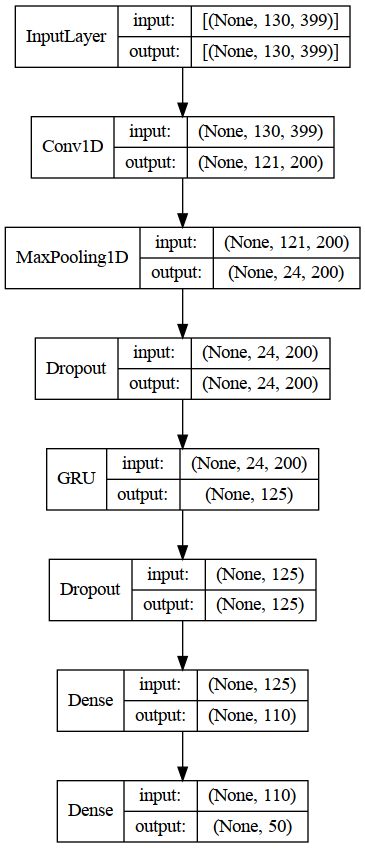

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

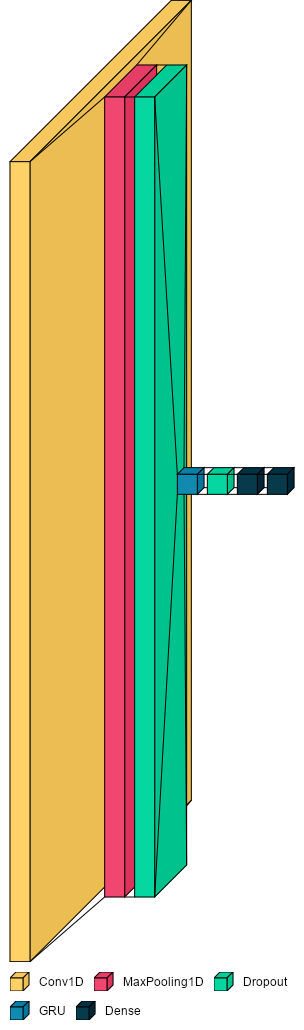

In [131]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [132]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0714 summary
Hyperparameters:
dense_activation: elu
filters_1: 200
kernel_1: 10
pool_1: 5
dropout_1: 0.65
units_1: 125
regularizer: 0.0034365682734906543
dropout_2: 0.1
units_2: 110
learning_rate: 0.00015386971155916857
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.7247181534767151

Trial 0700 summary
Hyperparameters:
dense_activation: mish
filters_1: 150
kernel_1: 15
pool_1: 10
dropout_1: 0.15000000000000002
units_1: 100
regularizer: 0.006504293881116204
dropout_2: 0.25
units_2: 120
learning_rate: 0.00035152323387747806
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0693
Score: 0.6989109516143799

Trial 0693 summary
Hyperparameters:
dense_activation: mish
filters_1: 150
kernel_1: 15
pool_1: 10
dropout_1: 0.1500000000

In [133]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.1993 - f1_score: 0.7247


In [134]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 14ms/step - loss: 0.2019 - f1_score: 0.9818


In [135]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.429     0.300     0.353        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.571     0.667     0.615         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.750    

In [136]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [137]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [138]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - ETA: 0s - loss: 4.8994 - f1_score: 0.0185

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 22s 630ms/step - loss: 4.8994 - f1_score: 0.0185 - val_loss: 4.7966 - val_f1_score: 0.0010
Epoch 2/500
28/28 [==============================] - 3s 93ms/step - loss: 4.8424 - f1_score: 0.0186 - val_loss: 4.7449 - val_f1_score: 7.4303e-04
Epoch 3/500
28/28 [==============================] - 3s 91ms/step - loss: 4.7803 - f1_score: 0.0197 - val_loss: 4.6997 - val_f1_score: 9.6970e-04
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.7368 - f1_score: 0.0241

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 376ms/step - loss: 4.7368 - f1_score: 0.0241 - val_loss: 4.6636 - val_f1_score: 0.0022
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.6995 - f1_score: 0.0210

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 365ms/step - loss: 4.6995 - f1_score: 0.0210 - val_loss: 4.6448 - val_f1_score: 0.0028
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.6681 - f1_score: 0.0151

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 390ms/step - loss: 4.6681 - f1_score: 0.0151 - val_loss: 4.5894 - val_f1_score: 0.0114
Epoch 7/500
28/28 [==============================] - 3s 90ms/step - loss: 4.6282 - f1_score: 0.0196 - val_loss: 4.5622 - val_f1_score: 0.0057
Epoch 8/500
28/28 [==============================] - 2s 89ms/step - loss: 4.5797 - f1_score: 0.0230 - val_loss: 4.5441 - val_f1_score: 9.6677e-04
Epoch 9/500
28/28 [==============================] - 3s 93ms/step - loss: 4.5697 - f1_score: 0.0162 - val_loss: 4.5227 - val_f1_score: 0.0021
Epoch 10/500
28/28 [==============================] - 3s 90ms/step - loss: 4.5102 - f1_score: 0.0228 - val_loss: 4.4672 - val_f1_score: 0.0086
Epoch 11/500
28/28 [==============================] - 3s 90ms/step - loss: 4.4763 - f1_score: 0.0270 - val_loss: 4.4306 - val_f1_score: 0.0086
Epoch 12/500
28/28 [==============================] - 3s 91ms/step - loss: 4.4299 - f1_score: 0.0268 - val_loss: 4.4217 - val_f1_score: 0.0013
Epoch 13/

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 453ms/step - loss: 4.1598 - f1_score: 0.0369 - val_loss: 4.0779 - val_f1_score: 0.0168
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 4.0710 - f1_score: 0.0472

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 372ms/step - loss: 4.0710 - f1_score: 0.0472 - val_loss: 3.9928 - val_f1_score: 0.0295
Epoch 18/500
28/28 [==============================] - 2s 89ms/step - loss: 4.0115 - f1_score: 0.0443 - val_loss: 3.9406 - val_f1_score: 0.0240
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 3.9558 - f1_score: 0.0477

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 419ms/step - loss: 3.9558 - f1_score: 0.0477 - val_loss: 3.8552 - val_f1_score: 0.0528
Epoch 20/500
28/28 [==============================] - 3s 90ms/step - loss: 3.9009 - f1_score: 0.0492 - val_loss: 3.8127 - val_f1_score: 0.0360
Epoch 21/500
28/28 [==============================] - 3s 91ms/step - loss: 3.8426 - f1_score: 0.0603 - val_loss: 3.7217 - val_f1_score: 0.0325
Epoch 22/500
28/28 [==============================] - 3s 90ms/step - loss: 3.7664 - f1_score: 0.0684 - val_loss: 3.6497 - val_f1_score: 0.0345
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 3.7037 - f1_score: 0.0717

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 479ms/step - loss: 3.7037 - f1_score: 0.0717 - val_loss: 3.5743 - val_f1_score: 0.0835
Epoch 24/500
28/28 [==============================] - 3s 90ms/step - loss: 3.6254 - f1_score: 0.0925 - val_loss: 3.5074 - val_f1_score: 0.0612
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 3.5483 - f1_score: 0.1043

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 416ms/step - loss: 3.5483 - f1_score: 0.1043 - val_loss: 3.4668 - val_f1_score: 0.0970
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 3.4776 - f1_score: 0.1165

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 424ms/step - loss: 3.4776 - f1_score: 0.1165 - val_loss: 3.3380 - val_f1_score: 0.1041
Epoch 27/500
28/28 [==============================] - 3s 90ms/step - loss: 3.3907 - f1_score: 0.1309 - val_loss: 3.2979 - val_f1_score: 0.0901
Epoch 28/500
28/28 [==============================] - 2s 89ms/step - loss: 3.3192 - f1_score: 0.1470 - val_loss: 3.2081 - val_f1_score: 0.0959
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 3.2465 - f1_score: 0.1546

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 442ms/step - loss: 3.2465 - f1_score: 0.1546 - val_loss: 3.1629 - val_f1_score: 0.1294
Epoch 30/500
28/28 [==============================] - 3s 90ms/step - loss: 3.1683 - f1_score: 0.1680 - val_loss: 3.1048 - val_f1_score: 0.1289
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.0842 - f1_score: 0.1771

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 415ms/step - loss: 3.0842 - f1_score: 0.1771 - val_loss: 3.0136 - val_f1_score: 0.1395
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 3.0302 - f1_score: 0.1852

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 441ms/step - loss: 3.0302 - f1_score: 0.1852 - val_loss: 3.0056 - val_f1_score: 0.1619
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 2.9637 - f1_score: 0.2090

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 383ms/step - loss: 2.9637 - f1_score: 0.2090 - val_loss: 2.9474 - val_f1_score: 0.1872
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 2.8942 - f1_score: 0.2306

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 395ms/step - loss: 2.8942 - f1_score: 0.2306 - val_loss: 2.8600 - val_f1_score: 0.2141
Epoch 35/500
28/28 [==============================] - 3s 90ms/step - loss: 2.8457 - f1_score: 0.2464 - val_loss: 2.8088 - val_f1_score: 0.2030
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.7835 - f1_score: 0.2635

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 426ms/step - loss: 2.7835 - f1_score: 0.2635 - val_loss: 2.7615 - val_f1_score: 0.2380
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.7358 - f1_score: 0.2726

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 473ms/step - loss: 2.7358 - f1_score: 0.2726 - val_loss: 2.7578 - val_f1_score: 0.2384
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.6944 - f1_score: 0.2800

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 400ms/step - loss: 2.6944 - f1_score: 0.2800 - val_loss: 2.6723 - val_f1_score: 0.2717
Epoch 39/500
28/28 [==============================] - 2s 89ms/step - loss: 2.6409 - f1_score: 0.3021 - val_loss: 2.6603 - val_f1_score: 0.2568
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.6021 - f1_score: 0.3098

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 428ms/step - loss: 2.6021 - f1_score: 0.3098 - val_loss: 2.5786 - val_f1_score: 0.2854
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.5550 - f1_score: 0.3220

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 378ms/step - loss: 2.5550 - f1_score: 0.3220 - val_loss: 2.5385 - val_f1_score: 0.2952
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.5314 - f1_score: 0.3288

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 396ms/step - loss: 2.5314 - f1_score: 0.3288 - val_loss: 2.4998 - val_f1_score: 0.3119
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 2.4714 - f1_score: 0.3372

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 21s 777ms/step - loss: 2.4714 - f1_score: 0.3372 - val_loss: 2.4579 - val_f1_score: 0.3431
Epoch 44/500
28/28 [==============================] - 3s 89ms/step - loss: 2.4266 - f1_score: 0.3487 - val_loss: 2.4560 - val_f1_score: 0.3422
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.3818 - f1_score: 0.3633

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 366ms/step - loss: 2.3818 - f1_score: 0.3633 - val_loss: 2.4058 - val_f1_score: 0.3792
Epoch 46/500
28/28 [==============================] - 2s 89ms/step - loss: 2.3493 - f1_score: 0.3650 - val_loss: 2.4279 - val_f1_score: 0.3437
Epoch 47/500
28/28 [==============================] - 2s 89ms/step - loss: 2.3168 - f1_score: 0.3833 - val_loss: 2.3424 - val_f1_score: 0.3575
Epoch 48/500
28/28 [==============================] - 2s 89ms/step - loss: 2.2823 - f1_score: 0.3923 - val_loss: 2.3612 - val_f1_score: 0.3532
Epoch 49/500
28/28 [==============================] - 2s 89ms/step - loss: 2.2528 - f1_score: 0.3953 - val_loss: 2.3447 - val_f1_score: 0.3531
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 2.2090 - f1_score: 0.3953

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 376ms/step - loss: 2.2090 - f1_score: 0.3953 - val_loss: 2.2806 - val_f1_score: 0.4143
Epoch 51/500
28/28 [==============================] - 2s 89ms/step - loss: 2.1638 - f1_score: 0.4279 - val_loss: 2.3008 - val_f1_score: 0.3918
Epoch 52/500
28/28 [==============================] - 3s 91ms/step - loss: 2.1484 - f1_score: 0.4249 - val_loss: 2.2632 - val_f1_score: 0.4081
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.1034 - f1_score: 0.4493

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 395ms/step - loss: 2.1034 - f1_score: 0.4493 - val_loss: 2.2212 - val_f1_score: 0.4248
Epoch 54/500
28/28 [==============================] - 2s 89ms/step - loss: 2.0735 - f1_score: 0.4577 - val_loss: 2.2314 - val_f1_score: 0.4110
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 2.0396 - f1_score: 0.4455

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 395ms/step - loss: 2.0396 - f1_score: 0.4455 - val_loss: 2.1437 - val_f1_score: 0.4320
Epoch 56/500
28/28 [==============================] - 2s 89ms/step - loss: 2.0049 - f1_score: 0.4747 - val_loss: 2.1697 - val_f1_score: 0.4310
Epoch 57/500
28/28 [==============================] - 2s 89ms/step - loss: 2.0030 - f1_score: 0.4641 - val_loss: 2.1754 - val_f1_score: 0.4199
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 1.9357 - f1_score: 0.4909

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 404ms/step - loss: 1.9357 - f1_score: 0.4909 - val_loss: 2.1244 - val_f1_score: 0.4684
Epoch 59/500
28/28 [==============================] - 2s 89ms/step - loss: 1.9282 - f1_score: 0.4820 - val_loss: 2.0716 - val_f1_score: 0.4531
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 1.8881 - f1_score: 0.4963

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 402ms/step - loss: 1.8881 - f1_score: 0.4963 - val_loss: 2.0375 - val_f1_score: 0.4889
Epoch 61/500
28/28 [==============================] - 3s 89ms/step - loss: 1.8646 - f1_score: 0.5028 - val_loss: 2.0401 - val_f1_score: 0.4802
Epoch 62/500
28/28 [==============================] - 2s 89ms/step - loss: 1.8434 - f1_score: 0.5101 - val_loss: 2.0235 - val_f1_score: 0.4756
Epoch 63/500
28/28 [==============================] - 2s 89ms/step - loss: 1.7958 - f1_score: 0.5130 - val_loss: 2.0006 - val_f1_score: 0.4713
Epoch 64/500
28/28 [==============================] - 2s 89ms/step - loss: 1.7778 - f1_score: 0.5382 - val_loss: 2.0715 - val_f1_score: 0.4629
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 1.7581 - f1_score: 0.5235

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 434ms/step - loss: 1.7581 - f1_score: 0.5235 - val_loss: 1.9847 - val_f1_score: 0.4919
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.7223 - f1_score: 0.5453

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 9s 346ms/step - loss: 1.7223 - f1_score: 0.5453 - val_loss: 1.9100 - val_f1_score: 0.5097
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 1.7162 - f1_score: 0.5376

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 403ms/step - loss: 1.7162 - f1_score: 0.5376 - val_loss: 1.9041 - val_f1_score: 0.5113
Epoch 68/500
28/28 [==============================] - 2s 89ms/step - loss: 1.6851 - f1_score: 0.5557 - val_loss: 1.9089 - val_f1_score: 0.5089
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 1.6525 - f1_score: 0.5769

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 370ms/step - loss: 1.6525 - f1_score: 0.5769 - val_loss: 1.8763 - val_f1_score: 0.5153
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 1.6103 - f1_score: 0.5660

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 353ms/step - loss: 1.6103 - f1_score: 0.5660 - val_loss: 1.8543 - val_f1_score: 0.5185
Epoch 71/500
28/28 [==============================] - ETA: 0s - loss: 1.5868 - f1_score: 0.5814

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 18s 677ms/step - loss: 1.5868 - f1_score: 0.5814 - val_loss: 1.8458 - val_f1_score: 0.5413
Epoch 72/500
28/28 [==============================] - 2s 89ms/step - loss: 1.5806 - f1_score: 0.5775 - val_loss: 1.8609 - val_f1_score: 0.5154
Epoch 73/500
28/28 [==============================] - 2s 89ms/step - loss: 1.5624 - f1_score: 0.5801 - val_loss: 1.8127 - val_f1_score: 0.5221
Epoch 74/500
28/28 [==============================] - 2s 89ms/step - loss: 1.5255 - f1_score: 0.5956 - val_loss: 1.8410 - val_f1_score: 0.5027
Epoch 75/500
28/28 [==============================] - 2s 89ms/step - loss: 1.5199 - f1_score: 0.5965 - val_loss: 1.8075 - val_f1_score: 0.5146
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.5012 - f1_score: 0.6073

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 374ms/step - loss: 1.5012 - f1_score: 0.6073 - val_loss: 1.7665 - val_f1_score: 0.5492
Epoch 77/500
28/28 [==============================] - ETA: 0s - loss: 1.4945 - f1_score: 0.6063

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 359ms/step - loss: 1.4945 - f1_score: 0.6063 - val_loss: 1.7179 - val_f1_score: 0.5633
Epoch 78/500
28/28 [==============================] - 2s 89ms/step - loss: 1.4614 - f1_score: 0.6196 - val_loss: 1.7193 - val_f1_score: 0.5410
Epoch 79/500
28/28 [==============================] - 2s 89ms/step - loss: 1.4297 - f1_score: 0.6178 - val_loss: 1.7158 - val_f1_score: 0.5451
Epoch 80/500
28/28 [==============================] - 3s 90ms/step - loss: 1.4175 - f1_score: 0.6282 - val_loss: 1.7385 - val_f1_score: 0.5622
Epoch 81/500
28/28 [==============================] - ETA: 0s - loss: 1.3995 - f1_score: 0.6263

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 369ms/step - loss: 1.3995 - f1_score: 0.6263 - val_loss: 1.6830 - val_f1_score: 0.5795
Epoch 82/500
28/28 [==============================] - 2s 89ms/step - loss: 1.3754 - f1_score: 0.6292 - val_loss: 1.7231 - val_f1_score: 0.5554
Epoch 83/500
28/28 [==============================] - 2s 89ms/step - loss: 1.3743 - f1_score: 0.6420 - val_loss: 1.6564 - val_f1_score: 0.5689
Epoch 84/500
28/28 [==============================] - 3s 90ms/step - loss: 1.3561 - f1_score: 0.6365 - val_loss: 1.6857 - val_f1_score: 0.5658
Epoch 85/500
28/28 [==============================] - 3s 90ms/step - loss: 1.3375 - f1_score: 0.6334 - val_loss: 1.6648 - val_f1_score: 0.5675
Epoch 86/500
28/28 [==============================] - 3s 91ms/step - loss: 1.3198 - f1_score: 0.6553 - val_loss: 1.7025 - val_f1_score: 0.5495
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 1.3024 - f1_score: 0.6593

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 454ms/step - loss: 1.3024 - f1_score: 0.6593 - val_loss: 1.5741 - val_f1_score: 0.5804
Epoch 88/500
28/28 [==============================] - ETA: 0s - loss: 1.2849 - f1_score: 0.6682

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 354ms/step - loss: 1.2849 - f1_score: 0.6682 - val_loss: 1.6169 - val_f1_score: 0.6036
Epoch 89/500
28/28 [==============================] - 2s 89ms/step - loss: 1.2669 - f1_score: 0.6630 - val_loss: 1.6304 - val_f1_score: 0.5803
Epoch 90/500
28/28 [==============================] - 3s 90ms/step - loss: 1.2531 - f1_score: 0.6668 - val_loss: 1.5524 - val_f1_score: 0.5863
Epoch 91/500
28/28 [==============================] - 2s 90ms/step - loss: 1.2454 - f1_score: 0.6707 - val_loss: 1.5454 - val_f1_score: 0.5993
Epoch 92/500
28/28 [==============================] - 2s 89ms/step - loss: 1.2167 - f1_score: 0.6783 - val_loss: 1.5336 - val_f1_score: 0.5979
Epoch 93/500
28/28 [==============================] - 3s 90ms/step - loss: 1.2249 - f1_score: 0.6720 - val_loss: 1.5250 - val_f1_score: 0.5945
Epoch 94/500
28/28 [==============================] - 3s 91ms/step - loss: 1.2036 - f1_score: 0.6820 - val_loss: 1.5604 - val_f1_score: 0.5795
Epoch 95/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 468ms/step - loss: 1.1678 - f1_score: 0.6931 - val_loss: 1.4790 - val_f1_score: 0.6175
Epoch 98/500
28/28 [==============================] - 3s 90ms/step - loss: 1.1613 - f1_score: 0.6940 - val_loss: 1.5467 - val_f1_score: 0.5880
Epoch 99/500
28/28 [==============================] - 3s 90ms/step - loss: 1.1203 - f1_score: 0.7065 - val_loss: 1.4947 - val_f1_score: 0.5983
Epoch 100/500
28/28 [==============================] - 3s 90ms/step - loss: 1.1196 - f1_score: 0.7033 - val_loss: 1.4978 - val_f1_score: 0.6129
Epoch 101/500
28/28 [==============================] - ETA: 0s - loss: 1.0962 - f1_score: 0.7083

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 435ms/step - loss: 1.0962 - f1_score: 0.7083 - val_loss: 1.4303 - val_f1_score: 0.6200
Epoch 102/500
28/28 [==============================] - 3s 90ms/step - loss: 1.0832 - f1_score: 0.7075 - val_loss: 1.4965 - val_f1_score: 0.6168
Epoch 103/500
28/28 [==============================] - ETA: 0s - loss: 1.0754 - f1_score: 0.7090

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 383ms/step - loss: 1.0754 - f1_score: 0.7090 - val_loss: 1.4380 - val_f1_score: 0.6356
Epoch 104/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0648 - f1_score: 0.7177 - val_loss: 1.4241 - val_f1_score: 0.6265
Epoch 105/500
28/28 [==============================] - 3s 90ms/step - loss: 1.0475 - f1_score: 0.7175 - val_loss: 1.3988 - val_f1_score: 0.6344
Epoch 106/500
28/28 [==============================] - ETA: 0s - loss: 1.0375 - f1_score: 0.7271

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 408ms/step - loss: 1.0375 - f1_score: 0.7271 - val_loss: 1.4130 - val_f1_score: 0.6413
Epoch 107/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0268 - f1_score: 0.7373 - val_loss: 1.4159 - val_f1_score: 0.6327
Epoch 108/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0511 - f1_score: 0.7112 - val_loss: 1.4681 - val_f1_score: 0.6398
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 1.0139 - f1_score: 0.7303

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 14s 513ms/step - loss: 1.0139 - f1_score: 0.7303 - val_loss: 1.4040 - val_f1_score: 0.6427
Epoch 110/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0066 - f1_score: 0.7304 - val_loss: 1.3834 - val_f1_score: 0.6294
Epoch 111/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0013 - f1_score: 0.7385 - val_loss: 1.4196 - val_f1_score: 0.6268
Epoch 112/500
28/28 [==============================] - 2s 89ms/step - loss: 0.9805 - f1_score: 0.7412 - val_loss: 1.4353 - val_f1_score: 0.6330
Epoch 113/500
28/28 [==============================] - 3s 90ms/step - loss: 0.9554 - f1_score: 0.7496 - val_loss: 1.4745 - val_f1_score: 0.5990
Epoch 114/500
28/28 [==============================] - ETA: 0s - loss: 0.9191 - f1_score: 0.7659

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 384ms/step - loss: 0.9191 - f1_score: 0.7659 - val_loss: 1.3425 - val_f1_score: 0.6572
Epoch 115/500
28/28 [==============================] - ETA: 0s - loss: 0.9269 - f1_score: 0.7470

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 10s 368ms/step - loss: 0.9269 - f1_score: 0.7470 - val_loss: 1.3267 - val_f1_score: 0.6615
Epoch 116/500
28/28 [==============================] - 2s 89ms/step - loss: 0.9246 - f1_score: 0.7593 - val_loss: 1.3589 - val_f1_score: 0.6251
Epoch 117/500
28/28 [==============================] - 3s 91ms/step - loss: 0.9150 - f1_score: 0.7544 - val_loss: 1.3522 - val_f1_score: 0.6552
Epoch 118/500
28/28 [==============================] - 2s 89ms/step - loss: 0.9219 - f1_score: 0.7472 - val_loss: 1.3607 - val_f1_score: 0.6486
Epoch 119/500
28/28 [==============================] - 3s 91ms/step - loss: 0.8902 - f1_score: 0.7702 - val_loss: 1.3965 - val_f1_score: 0.6336
Epoch 120/500
28/28 [==============================] - 3s 90ms/step - loss: 0.8782 - f1_score: 0.7718 - val_loss: 1.4099 - val_f1_score: 0.6294
Epoch 121/500
28/28 [==============================] - ETA: 0s - loss: 0.8708 - f1_score: 0.7714

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 397ms/step - loss: 0.8708 - f1_score: 0.7714 - val_loss: 1.3121 - val_f1_score: 0.6651
Epoch 122/500
28/28 [==============================] - ETA: 0s - loss: 0.8921 - f1_score: 0.7665

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 416ms/step - loss: 0.8921 - f1_score: 0.7665 - val_loss: 1.2719 - val_f1_score: 0.6752
Epoch 123/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8561 - f1_score: 0.7839 - val_loss: 1.3658 - val_f1_score: 0.6345
Epoch 124/500
28/28 [==============================] - 3s 90ms/step - loss: 0.8555 - f1_score: 0.7785 - val_loss: 1.2706 - val_f1_score: 0.6554
Epoch 125/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8262 - f1_score: 0.7819 - val_loss: 1.2509 - val_f1_score: 0.6715
Epoch 126/500
28/28 [==============================] - ETA: 0s - loss: 0.8418 - f1_score: 0.7807

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 398ms/step - loss: 0.8418 - f1_score: 0.7807 - val_loss: 1.2661 - val_f1_score: 0.6795
Epoch 127/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8241 - f1_score: 0.7911 - val_loss: 1.2747 - val_f1_score: 0.6549
Epoch 128/500
28/28 [==============================] - 3s 90ms/step - loss: 0.8168 - f1_score: 0.7863 - val_loss: 1.3639 - val_f1_score: 0.6389
Epoch 129/500
28/28 [==============================] - 3s 90ms/step - loss: 0.8000 - f1_score: 0.7926 - val_loss: 1.3382 - val_f1_score: 0.6564
Epoch 130/500
28/28 [==============================] - 3s 91ms/step - loss: 0.8082 - f1_score: 0.7880 - val_loss: 1.2406 - val_f1_score: 0.6752
Epoch 131/500
28/28 [==============================] - 3s 90ms/step - loss: 0.7882 - f1_score: 0.7966 - val_loss: 1.3003 - val_f1_score: 0.6709
Epoch 132/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7882 - f1_score: 0.7867 - val_loss: 1.3779 - val_f1_score: 0.6391
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 462ms/step - loss: 0.7673 - f1_score: 0.7981 - val_loss: 1.2058 - val_f1_score: 0.7002
Epoch 135/500
28/28 [==============================] - 3s 92ms/step - loss: 0.7731 - f1_score: 0.7978 - val_loss: 1.3053 - val_f1_score: 0.6661
Epoch 136/500
28/28 [==============================] - 3s 90ms/step - loss: 0.7640 - f1_score: 0.7979 - val_loss: 1.2800 - val_f1_score: 0.6776
Epoch 137/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7473 - f1_score: 0.8105 - val_loss: 1.2420 - val_f1_score: 0.6900
Epoch 138/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7279 - f1_score: 0.8095 - val_loss: 1.2743 - val_f1_score: 0.6537
Epoch 139/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7245 - f1_score: 0.8225 - val_loss: 1.2804 - val_f1_score: 0.6640
Epoch 140/500
28/28 [==============================] - 3s 92ms/step - loss: 0.7409 - f1_score: 0.8022 - val_loss: 1.2232 - val_f1_score: 0.6668
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 417ms/step - loss: 0.6753 - f1_score: 0.8399 - val_loss: 1.2744 - val_f1_score: 0.7021
Epoch 145/500
28/28 [==============================] - 3s 90ms/step - loss: 0.6710 - f1_score: 0.8363 - val_loss: 1.2174 - val_f1_score: 0.6916
Epoch 146/500
28/28 [==============================] - 3s 90ms/step - loss: 0.6761 - f1_score: 0.8294 - val_loss: 1.2350 - val_f1_score: 0.6566
Epoch 147/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6794 - f1_score: 0.8307 - val_loss: 1.2247 - val_f1_score: 0.6756
Epoch 148/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6575 - f1_score: 0.8349 - val_loss: 1.2733 - val_f1_score: 0.6640
Epoch 149/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6717 - f1_score: 0.8240 - val_loss: 1.2933 - val_f1_score: 0.6889
Epoch 150/500
28/28 [==============================] - 3s 92ms/step - loss: 0.6520 - f1_score: 0.8342 - val_loss: 1.2287 - val_f1_score: 0.6866
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 445ms/step - loss: 0.4982 - f1_score: 0.8800 - val_loss: 1.1927 - val_f1_score: 0.7147
Epoch 179/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5041 - f1_score: 0.8762 - val_loss: 1.2108 - val_f1_score: 0.6848
Epoch 180/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4797 - f1_score: 0.8895 - val_loss: 1.1776 - val_f1_score: 0.7101
Epoch 181/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4922 - f1_score: 0.8760 - val_loss: 1.2010 - val_f1_score: 0.6869
Epoch 182/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4969 - f1_score: 0.8726 - val_loss: 1.1689 - val_f1_score: 0.6965
Epoch 183/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4654 - f1_score: 0.8920 - val_loss: 1.2035 - val_f1_score: 0.6983
Epoch 184/500
28/28 [==============================] - 3s 94ms/step - loss: 0.4800 - f1_score: 0.8826 - val_loss: 1.2205 - val_f1_score: 0.6688
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 17s 637ms/step - loss: 0.3581 - f1_score: 0.9203 - val_loss: 1.1250 - val_f1_score: 0.7199
Epoch 214/500
28/28 [==============================] - 3s 90ms/step - loss: 0.3784 - f1_score: 0.9170 - val_loss: 1.1897 - val_f1_score: 0.6986
Epoch 215/500
28/28 [==============================] - 3s 90ms/step - loss: 0.3797 - f1_score: 0.9126 - val_loss: 1.2101 - val_f1_score: 0.7146
Epoch 216/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3657 - f1_score: 0.9188 - val_loss: 1.2673 - val_f1_score: 0.6970
Epoch 217/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3626 - f1_score: 0.9215 - val_loss: 1.2372 - val_f1_score: 0.6961
Epoch 218/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3466 - f1_score: 0.9263 - val_loss: 1.3243 - val_f1_score: 0.6877
Epoch 219/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3506 - f1_score: 0.9209 - val_loss: 1.1698 - val_f1_score: 0.7006
Epoc

Epoch 270/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2634 - f1_score: 0.9459 - val_loss: 1.1893 - val_f1_score: 0.7148
Epoch 271/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2639 - f1_score: 0.9424 - val_loss: 1.3301 - val_f1_score: 0.6836
Epoch 272/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2529 - f1_score: 0.9470 - val_loss: 1.3303 - val_f1_score: 0.6844
Epoch 273/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2462 - f1_score: 0.9487 - val_loss: 1.2829 - val_f1_score: 0.6874
Epoch 274/500
28/28 [==============================] - 3s 94ms/step - loss: 0.2449 - f1_score: 0.9557 - val_loss: 1.2268 - val_f1_score: 0.6879
Epoch 275/500
28/28 [==============================] - 3s 98ms/step - loss: 0.2506 - f1_score: 0.9497 - val_loss: 1.2943 - val_f1_score: 0.6792
Epoch 276/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2470 - f1_score: 0.9533 - val_loss: 1.3132 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 446ms/step - loss: 0.2329 - f1_score: 0.9566 - val_loss: 1.2660 - val_f1_score: 0.7200
Epoch 280/500
28/28 [==============================] - 3s 90ms/step - loss: 0.2422 - f1_score: 0.9517 - val_loss: 1.2263 - val_f1_score: 0.6937
Epoch 281/500
28/28 [==============================] - 3s 92ms/step - loss: 0.2319 - f1_score: 0.9561 - val_loss: 1.2663 - val_f1_score: 0.6939
Epoch 282/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2394 - f1_score: 0.9568 - val_loss: 1.3473 - val_f1_score: 0.6748
Epoch 283/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2244 - f1_score: 0.9585 - val_loss: 1.2969 - val_f1_score: 0.6813
Epoch 284/500
28/28 [==============================] - 3s 94ms/step - loss: 0.2228 - f1_score: 0.9562 - val_loss: 1.3196 - val_f1_score: 0.7114
Epoch 285/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2195 - f1_score: 0.9630 - val_loss: 1.2423 - val_f1_score: 0.6899
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 491ms/step - loss: 0.2068 - f1_score: 0.9637 - val_loss: 1.2902 - val_f1_score: 0.7221
Epoch 299/500
28/28 [==============================] - 3s 91ms/step - loss: 0.2179 - f1_score: 0.9555 - val_loss: 1.3079 - val_f1_score: 0.7013
Epoch 300/500
28/28 [==============================] - 3s 91ms/step - loss: 0.1997 - f1_score: 0.9630 - val_loss: 1.2687 - val_f1_score: 0.7048
Epoch 301/500
28/28 [==============================] - 3s 94ms/step - loss: 0.2038 - f1_score: 0.9643 - val_loss: 1.2542 - val_f1_score: 0.7019
Epoch 302/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2223 - f1_score: 0.9527 - val_loss: 1.3220 - val_f1_score: 0.6866
Epoch 303/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2091 - f1_score: 0.9573 - val_loss: 1.3135 - val_f1_score: 0.6984
Epoch 304/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1910 - f1_score: 0.9612 - val_loss: 1.3926 - val_f1_score: 0.6915
Epoc

Epoch 355/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1686 - f1_score: 0.9653 - val_loss: 1.4924 - val_f1_score: 0.6837
Epoch 356/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1696 - f1_score: 0.9633 - val_loss: 1.4205 - val_f1_score: 0.7023
Epoch 357/500
28/28 [==============================] - 3s 97ms/step - loss: 0.1626 - f1_score: 0.9708 - val_loss: 1.4655 - val_f1_score: 0.6678
Epoch 358/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1720 - f1_score: 0.9662 - val_loss: 1.4072 - val_f1_score: 0.6854
Epoch 359/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1569 - f1_score: 0.9746 - val_loss: 1.3902 - val_f1_score: 0.6970
Epoch 360/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1481 - f1_score: 0.9758 - val_loss: 1.3546 - val_f1_score: 0.7144
Epoch 361/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1715 - f1_score: 0.9630 - val_loss: 1.3423 - val_f1_score:

Epoch 412/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1290 - f1_score: 0.9771 - val_loss: 1.3883 - val_f1_score: 0.7055
Epoch 413/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1372 - f1_score: 0.9775 - val_loss: 1.4968 - val_f1_score: 0.6965
Epoch 414/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1325 - f1_score: 0.9764 - val_loss: 1.3472 - val_f1_score: 0.7055
Epoch 415/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1120 - f1_score: 0.9860 - val_loss: 1.4687 - val_f1_score: 0.6995
Epoch 416/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1259 - f1_score: 0.9790 - val_loss: 1.5681 - val_f1_score: 0.6827
Epoch 417/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1303 - f1_score: 0.9803 - val_loss: 1.3978 - val_f1_score: 0.6956
Epoch 418/500
28/28 [==============================] - 3s 95ms/step - loss: 0.1152 - f1_score: 0.9807 - val_loss: 1.4110 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 463ms/step - loss: 0.1173 - f1_score: 0.9825 - val_loss: 1.3709 - val_f1_score: 0.7228
Epoch 424/500
28/28 [==============================] - 3s 91ms/step - loss: 0.1199 - f1_score: 0.9800 - val_loss: 1.4624 - val_f1_score: 0.7132
Epoch 425/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1350 - f1_score: 0.9733 - val_loss: 1.5554 - val_f1_score: 0.6786
Epoch 426/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1351 - f1_score: 0.9745 - val_loss: 1.4077 - val_f1_score: 0.6999
Epoch 427/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1112 - f1_score: 0.9836 - val_loss: 1.4783 - val_f1_score: 0.6813
Epoch 428/500
28/28 [==============================] - 3s 94ms/step - loss: 0.1163 - f1_score: 0.9777 - val_loss: 1.4742 - val_f1_score: 0.6951
Epoch 429/500
28/28 [==============================] - 3s 99ms/step - loss: 0.1242 - f1_score: 0.9789 - val_loss: 1.5131 - val_f1_score: 0.6874
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 457ms/step - loss: 0.1282 - f1_score: 0.9733 - val_loss: 1.3580 - val_f1_score: 0.7251
Epoch 476/500
28/28 [==============================] - 3s 90ms/step - loss: 0.1215 - f1_score: 0.9776 - val_loss: 1.4365 - val_f1_score: 0.6920
Epoch 477/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1094 - f1_score: 0.9791 - val_loss: 1.5335 - val_f1_score: 0.7135
Epoch 478/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1170 - f1_score: 0.9787 - val_loss: 1.5715 - val_f1_score: 0.6794
Epoch 479/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1015 - f1_score: 0.9862 - val_loss: 1.5042 - val_f1_score: 0.6992
Epoch 480/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1031 - f1_score: 0.9853 - val_loss: 1.5121 - val_f1_score: 0.6883
Epoch 481/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1071 - f1_score: 0.9814 - val_loss: 1.6943 - val_f1_score: 0.6786
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 12s 436ms/step - loss: 0.0996 - f1_score: 0.9818 - val_loss: 1.4032 - val_f1_score: 0.7278
Epoch 492/500
28/28 [==============================] - ETA: 0s - loss: 0.0993 - f1_score: 0.9849

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU/assets


28/28 [==============================] - 11s 415ms/step - loss: 0.0993 - f1_score: 0.9849 - val_loss: 1.4189 - val_f1_score: 0.7323
Epoch 493/500
28/28 [==============================] - 3s 90ms/step - loss: 0.0978 - f1_score: 0.9872 - val_loss: 1.5138 - val_f1_score: 0.6905
Epoch 494/500
28/28 [==============================] - 3s 91ms/step - loss: 0.0961 - f1_score: 0.9838 - val_loss: 1.4464 - val_f1_score: 0.6963
Epoch 495/500
28/28 [==============================] - 3s 92ms/step - loss: 0.0973 - f1_score: 0.9850 - val_loss: 1.5624 - val_f1_score: 0.7017
Epoch 496/500
28/28 [==============================] - 3s 92ms/step - loss: 0.0985 - f1_score: 0.9864 - val_loss: 1.6496 - val_f1_score: 0.6918
Epoch 497/500
28/28 [==============================] - 3s 93ms/step - loss: 0.0959 - f1_score: 0.9869 - val_loss: 1.5582 - val_f1_score: 0.6952
Epoch 498/500
28/28 [==============================] - 3s 92ms/step - loss: 0.1077 - f1_score: 0.9814 - val_loss: 1.4970 - val_f1_score: 0.7014
Epoc

In [139]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.800     0.800     0.800        10
         BEE      0.500     0.500     0.500        10
        BELT      0.500     1.000     0.667         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      0.600     0.500     0.545         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.500     0.167     0.250         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      0.667     1.000     0.800         8
         DOG      0.571    

In [140]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [141]:
hist_df = pd.read_csv('1 1DCNN + 1 GRU/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.098530  0.986375  1.649600      0.691757
496  0.095876  0.986925  1.558238      0.695197
497  0.107656  0.981361  1.496966      0.701357
498  0.123752  0.974290  1.573127      0.700450
499  0.134656  0.971496  1.550224      0.691417

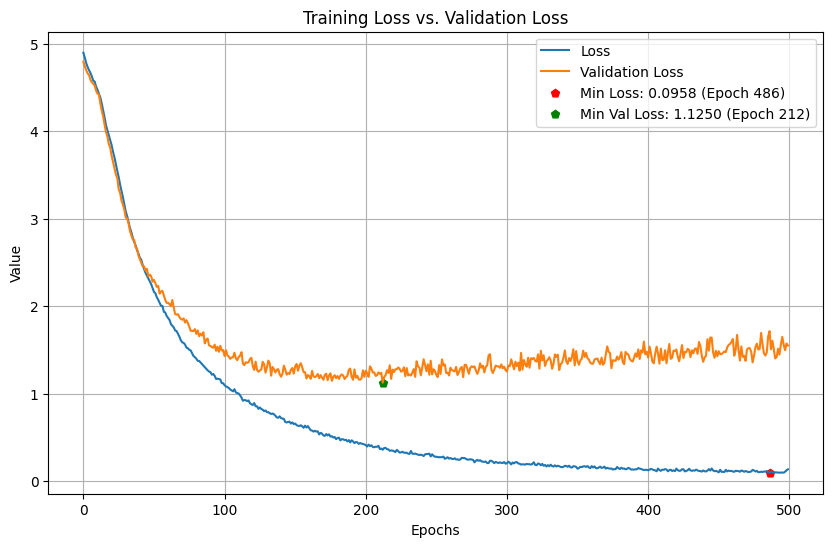

In [142]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

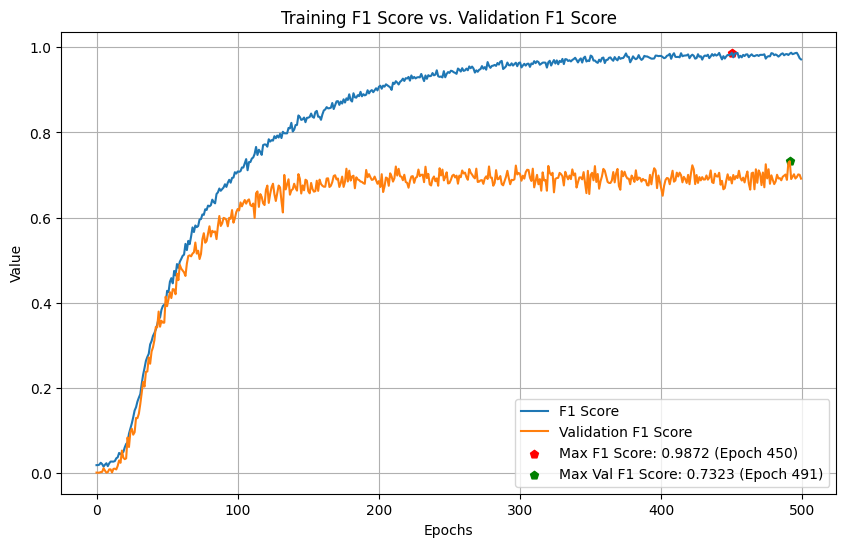

In [143]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [119]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU")

2023-09-11 23:39:18.847371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 23:39:18.925735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1425 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [120]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               13860     
                                                      

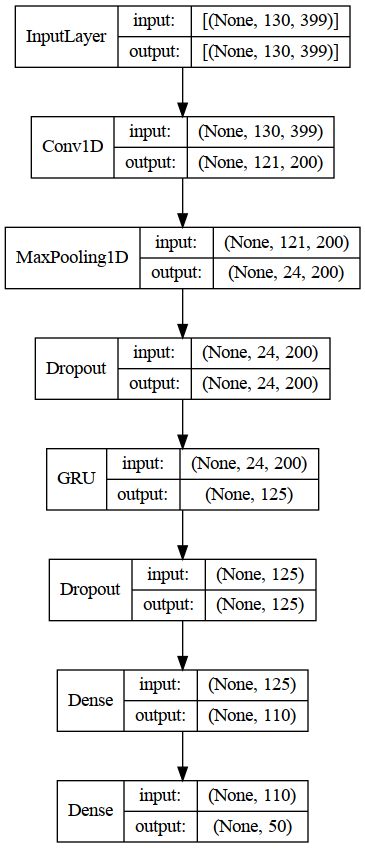

In [121]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

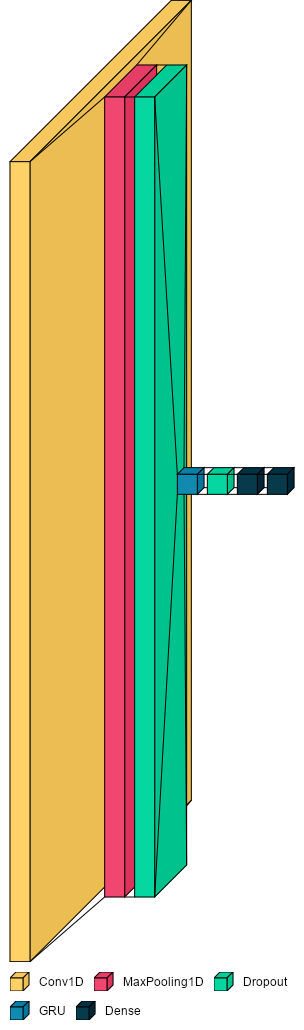

In [122]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [123]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-11 23:39:32.340471: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 1s 15ms/step - loss: 1.4189 - f1_score: 0.7323


[1.418906331062317, 0.7323073744773865]

In [124]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 14ms/step - loss: 0.0487 - f1_score: 1.0000


[0.0486634187400341, 1.0]

In [125]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.571     0.667     0.615         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.500     0.500     0.500        10
        BELT      1.000     1.000     1.000         4
        BITE      0.833     0.625     0.714         8
   BREAKFAST      0.667     0.667     0.667         6
      CANCER      0.778     0.875     0.824         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      1.000     0.500     0.667         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.400     0.333     0.364         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      0.875     0.875     0.875         8
     DEVELOP      1.000     0.333     0.500         6
      DINNER      0.800     1.000     0.889         8
         DOG      0.571    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [124]:
act_function = mish

model = Sequential()
model.add(
    Conv1D(filters=200,
           kernel_size=10,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(.65))
model.add(
    GRU(units=125,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.0034365682734906543)))
model.add(Dropout(.1))
model.add(Dense(units=110, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00015386971155916857),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               13860     
                                                      

2023-09-17 11:31:35.652690: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-17 11:31:36.164462: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe37c413850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 11:31:36.164491: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-17 11:31:36.174346: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 11:31:36.319291: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.8315 - f1_score: 0.0190

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 18s 523ms/step - loss: 4.8315 - f1_score: 0.0190 - val_loss: 4.7655 - val_f1_score: 9.6386e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.7582 - f1_score: 0.0143

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 315ms/step - loss: 4.7582 - f1_score: 0.0143 - val_loss: 4.7022 - val_f1_score: 0.0011
Epoch 3/500
28/28 [==============================] - 3s 91ms/step - loss: 4.6937 - f1_score: 0.0154 - val_loss: 4.6575 - val_f1_score: 9.6386e-04
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.6407 - f1_score: 0.0134

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 385ms/step - loss: 4.6407 - f1_score: 0.0134 - val_loss: 4.6026 - val_f1_score: 0.0011
Epoch 5/500
28/28 [==============================] - 3s 92ms/step - loss: 4.5884 - f1_score: 0.0144 - val_loss: 4.5527 - val_f1_score: 9.6386e-04
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.5359 - f1_score: 0.0163

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 367ms/step - loss: 4.5359 - f1_score: 0.0163 - val_loss: 4.5107 - val_f1_score: 0.0031
Epoch 7/500
28/28 [==============================] - 3s 91ms/step - loss: 4.4951 - f1_score: 0.0151 - val_loss: 4.4628 - val_f1_score: 0.0031
Epoch 8/500
28/28 [==============================] - 3s 91ms/step - loss: 4.4493 - f1_score: 0.0147 - val_loss: 4.4362 - val_f1_score: 0.0025
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 4.4138 - f1_score: 0.0146

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 360ms/step - loss: 4.4138 - f1_score: 0.0146 - val_loss: 4.3903 - val_f1_score: 0.0041
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.3728 - f1_score: 0.0150

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 4.3728 - f1_score: 0.0150 - val_loss: 4.3574 - val_f1_score: 0.0061
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 4.3371 - f1_score: 0.0162

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 335ms/step - loss: 4.3371 - f1_score: 0.0162 - val_loss: 4.3261 - val_f1_score: 0.0165
Epoch 12/500
28/28 [==============================] - 3s 92ms/step - loss: 4.3042 - f1_score: 0.0148 - val_loss: 4.3009 - val_f1_score: 0.0100
Epoch 13/500
28/28 [==============================] - 3s 91ms/step - loss: 4.2677 - f1_score: 0.0187 - val_loss: 4.2553 - val_f1_score: 0.0084
Epoch 14/500
28/28 [==============================] - 3s 92ms/step - loss: 4.2211 - f1_score: 0.0242 - val_loss: 4.2028 - val_f1_score: 0.0144
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 4.1622 - f1_score: 0.0223

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 361ms/step - loss: 4.1622 - f1_score: 0.0223 - val_loss: 4.0997 - val_f1_score: 0.0173
Epoch 16/500
28/28 [==============================] - 3s 92ms/step - loss: 4.0576 - f1_score: 0.0193 - val_loss: 3.9665 - val_f1_score: 0.0085
Epoch 17/500
28/28 [==============================] - 3s 92ms/step - loss: 3.9402 - f1_score: 0.0177 - val_loss: 3.8626 - val_f1_score: 0.0171
Epoch 18/500
28/28 [==============================] - 3s 93ms/step - loss: 3.8588 - f1_score: 0.0201 - val_loss: 3.8017 - val_f1_score: 0.0112
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 3.8023 - f1_score: 0.0278

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 376ms/step - loss: 3.8023 - f1_score: 0.0278 - val_loss: 3.7447 - val_f1_score: 0.0244
Epoch 20/500
28/28 [==============================] - 3s 92ms/step - loss: 3.7579 - f1_score: 0.0376 - val_loss: 3.7055 - val_f1_score: 0.0215
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.7026 - f1_score: 0.0394

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 349ms/step - loss: 3.7026 - f1_score: 0.0394 - val_loss: 3.6555 - val_f1_score: 0.0288
Epoch 22/500
28/28 [==============================] - 3s 92ms/step - loss: 3.6720 - f1_score: 0.0445 - val_loss: 3.6300 - val_f1_score: 0.0281
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 3.6252 - f1_score: 0.0519

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 395ms/step - loss: 3.6252 - f1_score: 0.0519 - val_loss: 3.5758 - val_f1_score: 0.0325
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 3.5847 - f1_score: 0.0478

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 338ms/step - loss: 3.5847 - f1_score: 0.0478 - val_loss: 3.4784 - val_f1_score: 0.0451
Epoch 25/500
28/28 [==============================] - 3s 92ms/step - loss: 3.5332 - f1_score: 0.0537 - val_loss: 3.4363 - val_f1_score: 0.0328
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 3.4681 - f1_score: 0.0594

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 421ms/step - loss: 3.4681 - f1_score: 0.0594 - val_loss: 3.3647 - val_f1_score: 0.0554
Epoch 27/500
28/28 [==============================] - 3s 93ms/step - loss: 3.4092 - f1_score: 0.0707 - val_loss: 3.3288 - val_f1_score: 0.0370
Epoch 28/500
28/28 [==============================] - 3s 92ms/step - loss: 3.3474 - f1_score: 0.0706 - val_loss: 3.2801 - val_f1_score: 0.0489
Epoch 29/500
28/28 [==============================] - 3s 92ms/step - loss: 3.2897 - f1_score: 0.0805 - val_loss: 3.2134 - val_f1_score: 0.0547
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 3.2427 - f1_score: 0.0892

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 384ms/step - loss: 3.2427 - f1_score: 0.0892 - val_loss: 3.1597 - val_f1_score: 0.0803
Epoch 31/500
28/28 [==============================] - 3s 92ms/step - loss: 3.2026 - f1_score: 0.0894 - val_loss: 3.1305 - val_f1_score: 0.0621
Epoch 32/500
28/28 [==============================] - 3s 92ms/step - loss: 3.1244 - f1_score: 0.1046 - val_loss: 3.1799 - val_f1_score: 0.0653
Epoch 33/500
28/28 [==============================] - 3s 92ms/step - loss: 3.0894 - f1_score: 0.1124 - val_loss: 3.0400 - val_f1_score: 0.0787
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 3.0205 - f1_score: 0.1245

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 373ms/step - loss: 3.0205 - f1_score: 0.1245 - val_loss: 2.9340 - val_f1_score: 0.1050
Epoch 35/500
28/28 [==============================] - 3s 92ms/step - loss: 2.9558 - f1_score: 0.1470 - val_loss: 2.8721 - val_f1_score: 0.1019
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.8840 - f1_score: 0.1683

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 350ms/step - loss: 2.8840 - f1_score: 0.1683 - val_loss: 2.8244 - val_f1_score: 0.1168
Epoch 37/500
28/28 [==============================] - 3s 93ms/step - loss: 2.8559 - f1_score: 0.1619 - val_loss: 2.8827 - val_f1_score: 0.1063
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.7828 - f1_score: 0.1762

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 457ms/step - loss: 2.7828 - f1_score: 0.1762 - val_loss: 2.7233 - val_f1_score: 0.1461
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 2.7247 - f1_score: 0.1971

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 22s 820ms/step - loss: 2.7247 - f1_score: 0.1971 - val_loss: 2.7285 - val_f1_score: 0.1505
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.6744 - f1_score: 0.2019

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 323ms/step - loss: 2.6744 - f1_score: 0.2019 - val_loss: 2.6136 - val_f1_score: 0.1879
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.6277 - f1_score: 0.2141

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 356ms/step - loss: 2.6277 - f1_score: 0.2141 - val_loss: 2.5694 - val_f1_score: 0.1929
Epoch 42/500
28/28 [==============================] - ETA: 0s - loss: 2.5832 - f1_score: 0.2226

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 363ms/step - loss: 2.5832 - f1_score: 0.2226 - val_loss: 2.5096 - val_f1_score: 0.2042
Epoch 43/500
28/28 [==============================] - 3s 92ms/step - loss: 2.5190 - f1_score: 0.2441 - val_loss: 2.5107 - val_f1_score: 0.1944
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.4814 - f1_score: 0.2495

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 411ms/step - loss: 2.4814 - f1_score: 0.2495 - val_loss: 2.4993 - val_f1_score: 0.2327
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.4455 - f1_score: 0.2603

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 380ms/step - loss: 2.4455 - f1_score: 0.2603 - val_loss: 2.4546 - val_f1_score: 0.2455
Epoch 46/500
28/28 [==============================] - 3s 93ms/step - loss: 2.4125 - f1_score: 0.2652 - val_loss: 2.4650 - val_f1_score: 0.2114
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 2.3581 - f1_score: 0.2798

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 363ms/step - loss: 2.3581 - f1_score: 0.2798 - val_loss: 2.3360 - val_f1_score: 0.2860
Epoch 48/500
28/28 [==============================] - 3s 92ms/step - loss: 2.3420 - f1_score: 0.2901 - val_loss: 2.3354 - val_f1_score: 0.2645
Epoch 49/500
28/28 [==============================] - 3s 92ms/step - loss: 2.2937 - f1_score: 0.3004 - val_loss: 2.3393 - val_f1_score: 0.2744
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 2.2750 - f1_score: 0.2986

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 364ms/step - loss: 2.2750 - f1_score: 0.2986 - val_loss: 2.3177 - val_f1_score: 0.3202
Epoch 51/500
28/28 [==============================] - 3s 92ms/step - loss: 2.2222 - f1_score: 0.3250 - val_loss: 2.3421 - val_f1_score: 0.3190
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 2.1985 - f1_score: 0.3293

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 409ms/step - loss: 2.1985 - f1_score: 0.3293 - val_loss: 2.3007 - val_f1_score: 0.3248
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.1678 - f1_score: 0.3323

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 370ms/step - loss: 2.1678 - f1_score: 0.3323 - val_loss: 2.2264 - val_f1_score: 0.3682
Epoch 54/500
28/28 [==============================] - 3s 92ms/step - loss: 2.1257 - f1_score: 0.3505 - val_loss: 2.2599 - val_f1_score: 0.3393
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 2.1035 - f1_score: 0.3496

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 358ms/step - loss: 2.1035 - f1_score: 0.3496 - val_loss: 2.1663 - val_f1_score: 0.3769
Epoch 56/500
28/28 [==============================] - 3s 92ms/step - loss: 2.0896 - f1_score: 0.3572 - val_loss: 2.2131 - val_f1_score: 0.3302
Epoch 57/500
28/28 [==============================] - 3s 92ms/step - loss: 2.0686 - f1_score: 0.3510 - val_loss: 2.1654 - val_f1_score: 0.3641
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 2.0204 - f1_score: 0.3856

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 374ms/step - loss: 2.0204 - f1_score: 0.3856 - val_loss: 2.1133 - val_f1_score: 0.3987
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 2.0119 - f1_score: 0.3753

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 327ms/step - loss: 2.0119 - f1_score: 0.3753 - val_loss: 2.0613 - val_f1_score: 0.4216
Epoch 60/500
28/28 [==============================] - 3s 93ms/step - loss: 1.9729 - f1_score: 0.3970 - val_loss: 2.1044 - val_f1_score: 0.3904
Epoch 61/500
28/28 [==============================] - 3s 93ms/step - loss: 1.9334 - f1_score: 0.3995 - val_loss: 2.0450 - val_f1_score: 0.4166
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 1.9173 - f1_score: 0.4064

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 418ms/step - loss: 1.9173 - f1_score: 0.4064 - val_loss: 2.0320 - val_f1_score: 0.4332
Epoch 63/500
28/28 [==============================] - 3s 92ms/step - loss: 1.9124 - f1_score: 0.4129 - val_loss: 2.0301 - val_f1_score: 0.4235
Epoch 64/500
28/28 [==============================] - 3s 93ms/step - loss: 1.8693 - f1_score: 0.4203 - val_loss: 2.0899 - val_f1_score: 0.3963
Epoch 65/500
28/28 [==============================] - 3s 92ms/step - loss: 1.8423 - f1_score: 0.4340 - val_loss: 1.9306 - val_f1_score: 0.4296
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.8147 - f1_score: 0.4374

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 349ms/step - loss: 1.8147 - f1_score: 0.4374 - val_loss: 1.9142 - val_f1_score: 0.4443
Epoch 67/500
28/28 [==============================] - 3s 92ms/step - loss: 1.7957 - f1_score: 0.4454 - val_loss: 1.9262 - val_f1_score: 0.4403
Epoch 68/500
28/28 [==============================] - 3s 92ms/step - loss: 1.7735 - f1_score: 0.4500 - val_loss: 2.0074 - val_f1_score: 0.4333
Epoch 69/500
28/28 [==============================] - ETA: 0s - loss: 1.7595 - f1_score: 0.4612

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 1.7595 - f1_score: 0.4612 - val_loss: 1.8898 - val_f1_score: 0.4660
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 1.7356 - f1_score: 0.4697

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 377ms/step - loss: 1.7356 - f1_score: 0.4697 - val_loss: 1.8961 - val_f1_score: 0.4700
Epoch 71/500
28/28 [==============================] - ETA: 0s - loss: 1.7121 - f1_score: 0.4705

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 333ms/step - loss: 1.7121 - f1_score: 0.4705 - val_loss: 1.9341 - val_f1_score: 0.4828
Epoch 72/500
28/28 [==============================] - 3s 92ms/step - loss: 1.6988 - f1_score: 0.4829 - val_loss: 1.9329 - val_f1_score: 0.4659
Epoch 73/500
28/28 [==============================] - 3s 92ms/step - loss: 1.6928 - f1_score: 0.4841 - val_loss: 1.8843 - val_f1_score: 0.4708
Epoch 74/500
28/28 [==============================] - 3s 93ms/step - loss: 1.6708 - f1_score: 0.4909 - val_loss: 1.8594 - val_f1_score: 0.4782
Epoch 75/500
28/28 [==============================] - 3s 92ms/step - loss: 1.6326 - f1_score: 0.4985 - val_loss: 1.8588 - val_f1_score: 0.4737
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.6292 - f1_score: 0.5074

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 375ms/step - loss: 1.6292 - f1_score: 0.5074 - val_loss: 1.8582 - val_f1_score: 0.5028
Epoch 77/500
28/28 [==============================] - ETA: 0s - loss: 1.6059 - f1_score: 0.5058

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 392ms/step - loss: 1.6059 - f1_score: 0.5058 - val_loss: 1.7919 - val_f1_score: 0.5099
Epoch 78/500
28/28 [==============================] - ETA: 0s - loss: 1.5903 - f1_score: 0.5372

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 336ms/step - loss: 1.5903 - f1_score: 0.5372 - val_loss: 1.7114 - val_f1_score: 0.5211
Epoch 79/500
28/28 [==============================] - 3s 92ms/step - loss: 1.5623 - f1_score: 0.5260 - val_loss: 1.7560 - val_f1_score: 0.4796
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 1.5544 - f1_score: 0.5292

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 347ms/step - loss: 1.5544 - f1_score: 0.5292 - val_loss: 1.7027 - val_f1_score: 0.5546
Epoch 81/500
28/28 [==============================] - 3s 92ms/step - loss: 1.5330 - f1_score: 0.5292 - val_loss: 1.7247 - val_f1_score: 0.5165
Epoch 82/500
28/28 [==============================] - 3s 92ms/step - loss: 1.5314 - f1_score: 0.5287 - val_loss: 1.7115 - val_f1_score: 0.5272
Epoch 83/500
28/28 [==============================] - 3s 93ms/step - loss: 1.5204 - f1_score: 0.5374 - val_loss: 1.7127 - val_f1_score: 0.4951
Epoch 84/500
28/28 [==============================] - 3s 92ms/step - loss: 1.5179 - f1_score: 0.5401 - val_loss: 1.7466 - val_f1_score: 0.5327
Epoch 85/500
28/28 [==============================] - 3s 92ms/step - loss: 1.4861 - f1_score: 0.5554 - val_loss: 1.6856 - val_f1_score: 0.5446
Epoch 86/500
28/28 [==============================] - ETA: 0s - loss: 1.4844 - f1_score: 0.5403

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 463ms/step - loss: 1.4844 - f1_score: 0.5403 - val_loss: 1.6344 - val_f1_score: 0.5550
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 1.4517 - f1_score: 0.5582

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 357ms/step - loss: 1.4517 - f1_score: 0.5582 - val_loss: 1.6221 - val_f1_score: 0.5743
Epoch 88/500
28/28 [==============================] - 3s 92ms/step - loss: 1.4458 - f1_score: 0.5648 - val_loss: 1.6834 - val_f1_score: 0.5368
Epoch 89/500
28/28 [==============================] - 3s 92ms/step - loss: 1.4242 - f1_score: 0.5680 - val_loss: 1.6354 - val_f1_score: 0.5517
Epoch 90/500
28/28 [==============================] - 3s 93ms/step - loss: 1.4035 - f1_score: 0.5713 - val_loss: 1.6290 - val_f1_score: 0.5545
Epoch 91/500
28/28 [==============================] - 3s 92ms/step - loss: 1.3981 - f1_score: 0.5839 - val_loss: 1.6502 - val_f1_score: 0.5474
Epoch 92/500
28/28 [==============================] - 3s 92ms/step - loss: 1.3965 - f1_score: 0.5852 - val_loss: 1.6393 - val_f1_score: 0.5462
Epoch 93/500
28/28 [==============================] - 3s 93ms/step - loss: 1.3785 - f1_score: 0.5840 - val_loss: 1.6149 - val_f1_score: 0.5622
Epoch 94/5

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 379ms/step - loss: 1.3433 - f1_score: 0.5991 - val_loss: 1.5800 - val_f1_score: 0.5783
Epoch 96/500
28/28 [==============================] - ETA: 0s - loss: 1.3168 - f1_score: 0.6071

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 423ms/step - loss: 1.3168 - f1_score: 0.6071 - val_loss: 1.5636 - val_f1_score: 0.5924
Epoch 97/500
28/28 [==============================] - 3s 92ms/step - loss: 1.3245 - f1_score: 0.6061 - val_loss: 1.5611 - val_f1_score: 0.5741
Epoch 98/500
28/28 [==============================] - 3s 93ms/step - loss: 1.3136 - f1_score: 0.6068 - val_loss: 1.5652 - val_f1_score: 0.5671
Epoch 99/500
28/28 [==============================] - 3s 93ms/step - loss: 1.3072 - f1_score: 0.6032 - val_loss: 1.5794 - val_f1_score: 0.5472
Epoch 100/500
28/28 [==============================] - 3s 92ms/step - loss: 1.2793 - f1_score: 0.6098 - val_loss: 1.5745 - val_f1_score: 0.5798
Epoch 101/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2914 - f1_score: 0.6038 - val_loss: 1.5377 - val_f1_score: 0.5755
Epoch 102/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2966 - f1_score: 0.6103 - val_loss: 1.6460 - val_f1_score: 0.5374
Epoch 1

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 375ms/step - loss: 1.2492 - f1_score: 0.6316 - val_loss: 1.4966 - val_f1_score: 0.6273
Epoch 105/500
28/28 [==============================] - 3s 92ms/step - loss: 1.2494 - f1_score: 0.6127 - val_loss: 1.4715 - val_f1_score: 0.5973
Epoch 106/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2337 - f1_score: 0.6290 - val_loss: 1.5517 - val_f1_score: 0.5546
Epoch 107/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2102 - f1_score: 0.6272 - val_loss: 1.4912 - val_f1_score: 0.5932
Epoch 108/500
28/28 [==============================] - 3s 93ms/step - loss: 1.2079 - f1_score: 0.6371 - val_loss: 1.5059 - val_f1_score: 0.5900
Epoch 109/500
28/28 [==============================] - 3s 94ms/step - loss: 1.2086 - f1_score: 0.6405 - val_loss: 1.4763 - val_f1_score: 0.6022
Epoch 110/500
28/28 [==============================] - 3s 94ms/step - loss: 1.2021 - f1_score: 0.6402 - val_loss: 1.5797 - val_f1_score: 0.5500
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 444ms/step - loss: 1.0837 - f1_score: 0.6759 - val_loss: 1.4355 - val_f1_score: 0.6280
Epoch 125/500
28/28 [==============================] - 3s 92ms/step - loss: 1.0790 - f1_score: 0.6631 - val_loss: 1.4325 - val_f1_score: 0.6140
Epoch 126/500
28/28 [==============================] - 3s 93ms/step - loss: 1.0629 - f1_score: 0.6797 - val_loss: 1.4561 - val_f1_score: 0.5935
Epoch 127/500
28/28 [==============================] - 3s 94ms/step - loss: 1.0549 - f1_score: 0.6790 - val_loss: 1.4311 - val_f1_score: 0.5731
Epoch 128/500
28/28 [==============================] - 3s 94ms/step - loss: 1.0345 - f1_score: 0.6843 - val_loss: 1.4352 - val_f1_score: 0.6042
Epoch 129/500
28/28 [==============================] - 3s 94ms/step - loss: 1.0462 - f1_score: 0.6830 - val_loss: 1.4761 - val_f1_score: 0.5950
Epoch 130/500
28/28 [==============================] - 3s 95ms/step - loss: 1.0274 - f1_score: 0.6880 - val_loss: 1.3804 - val_f1_score: 0.6064
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 460ms/step - loss: 1.0206 - f1_score: 0.6877 - val_loss: 1.3937 - val_f1_score: 0.6359
Epoch 133/500
28/28 [==============================] - 3s 93ms/step - loss: 1.0036 - f1_score: 0.6970 - val_loss: 1.4391 - val_f1_score: 0.5971
Epoch 134/500
28/28 [==============================] - 3s 93ms/step - loss: 0.9932 - f1_score: 0.6975 - val_loss: 1.3782 - val_f1_score: 0.6106
Epoch 135/500
28/28 [==============================] - 3s 94ms/step - loss: 0.9883 - f1_score: 0.7061 - val_loss: 1.3943 - val_f1_score: 0.6185
Epoch 136/500
28/28 [==============================] - 3s 95ms/step - loss: 0.9812 - f1_score: 0.7078 - val_loss: 1.4002 - val_f1_score: 0.6098
Epoch 137/500
28/28 [==============================] - 3s 94ms/step - loss: 0.9959 - f1_score: 0.7010 - val_loss: 1.3881 - val_f1_score: 0.6075
Epoch 138/500
28/28 [==============================] - 3s 95ms/step - loss: 0.9577 - f1_score: 0.7171 - val_loss: 1.3886 - val_f1_score: 0.5912
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 479ms/step - loss: 0.8176 - f1_score: 0.7610 - val_loss: 1.2978 - val_f1_score: 0.6474
Epoch 167/500
28/28 [==============================] - 3s 93ms/step - loss: 0.8245 - f1_score: 0.7460 - val_loss: 1.3536 - val_f1_score: 0.6131
Epoch 168/500
28/28 [==============================] - 3s 94ms/step - loss: 0.7900 - f1_score: 0.7670 - val_loss: 1.3064 - val_f1_score: 0.6425
Epoch 169/500
28/28 [==============================] - 3s 94ms/step - loss: 0.8124 - f1_score: 0.7474 - val_loss: 1.3275 - val_f1_score: 0.6323
Epoch 170/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7802 - f1_score: 0.7738 - val_loss: 1.4029 - val_f1_score: 0.6207
Epoch 171/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7897 - f1_score: 0.7662 - val_loss: 1.3618 - val_f1_score: 0.6268
Epoch 172/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7839 - f1_score: 0.7626 - val_loss: 1.3621 - val_f1_score: 0.6429
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 443ms/step - loss: 0.7410 - f1_score: 0.7747 - val_loss: 1.2891 - val_f1_score: 0.6491
Epoch 179/500
28/28 [==============================] - 3s 92ms/step - loss: 0.7408 - f1_score: 0.7845 - val_loss: 1.3295 - val_f1_score: 0.6260
Epoch 180/500
28/28 [==============================] - 3s 94ms/step - loss: 0.7196 - f1_score: 0.7943 - val_loss: 1.4165 - val_f1_score: 0.5940
Epoch 181/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7420 - f1_score: 0.7810 - val_loss: 1.3601 - val_f1_score: 0.6379
Epoch 182/500
28/28 [==============================] - 3s 96ms/step - loss: 0.7550 - f1_score: 0.7699 - val_loss: 1.3263 - val_f1_score: 0.6376
Epoch 183/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7373 - f1_score: 0.7732 - val_loss: 1.3389 - val_f1_score: 0.6443
Epoch 184/500
28/28 [==============================] - 3s 95ms/step - loss: 0.7183 - f1_score: 0.7810 - val_loss: 1.3495 - val_f1_score: 0.6239
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 443ms/step - loss: 0.7218 - f1_score: 0.7840 - val_loss: 1.2808 - val_f1_score: 0.6634
Epoch 193/500
28/28 [==============================] - 3s 93ms/step - loss: 0.7012 - f1_score: 0.7819 - val_loss: 1.3356 - val_f1_score: 0.6407
Epoch 194/500
28/28 [==============================] - 3s 94ms/step - loss: 0.6941 - f1_score: 0.7999 - val_loss: 1.3143 - val_f1_score: 0.6360
Epoch 195/500
28/28 [==============================] - 3s 95ms/step - loss: 0.6812 - f1_score: 0.7868 - val_loss: 1.3969 - val_f1_score: 0.6529
Epoch 196/500
28/28 [==============================] - 3s 95ms/step - loss: 0.6926 - f1_score: 0.7888 - val_loss: 1.3920 - val_f1_score: 0.6302
Epoch 197/500
28/28 [==============================] - 3s 95ms/step - loss: 0.6777 - f1_score: 0.7950 - val_loss: 1.3521 - val_f1_score: 0.6488
Epoch 198/500
28/28 [==============================] - 3s 96ms/step - loss: 0.6708 - f1_score: 0.7961 - val_loss: 1.4057 - val_f1_score: 0.6084
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 0.5375 - f1_score: 0.8459 - val_loss: 1.3468 - val_f1_score: 0.6644
Epoch 234/500
28/28 [==============================] - 3s 93ms/step - loss: 0.5528 - f1_score: 0.8429 - val_loss: 1.3853 - val_f1_score: 0.6266
Epoch 235/500
28/28 [==============================] - 3s 95ms/step - loss: 0.5285 - f1_score: 0.8482 - val_loss: 1.3770 - val_f1_score: 0.6482
Epoch 236/500
28/28 [==============================] - 3s 95ms/step - loss: 0.5554 - f1_score: 0.8358 - val_loss: 1.4336 - val_f1_score: 0.6051
Epoch 237/500
28/28 [==============================] - 3s 95ms/step - loss: 0.5476 - f1_score: 0.8438 - val_loss: 1.4291 - val_f1_score: 0.6518
Epoch 238/500
28/28 [==============================] - 3s 96ms/step - loss: 0.5514 - f1_score: 0.8369 - val_loss: 1.3640 - val_f1_score: 0.6281
Epoch 239/500
28/28 [==============================] - 3s 95ms/step - loss: 0.5452 - f1_score: 0.8368 - val_loss: 1.3645 - val_f1_score: 0.6465
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 440ms/step - loss: 0.4445 - f1_score: 0.8783 - val_loss: 1.4354 - val_f1_score: 0.6646
Epoch 278/500
28/28 [==============================] - ETA: 0s - loss: 0.4302 - f1_score: 0.8828

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 399ms/step - loss: 0.4302 - f1_score: 0.8828 - val_loss: 1.3761 - val_f1_score: 0.6672
Epoch 279/500
28/28 [==============================] - 3s 93ms/step - loss: 0.4181 - f1_score: 0.8960 - val_loss: 1.3919 - val_f1_score: 0.6399
Epoch 280/500
28/28 [==============================] - 3s 94ms/step - loss: 0.4348 - f1_score: 0.8824 - val_loss: 1.3992 - val_f1_score: 0.6363
Epoch 281/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4471 - f1_score: 0.8720 - val_loss: 1.4561 - val_f1_score: 0.6211
Epoch 282/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4481 - f1_score: 0.8726 - val_loss: 1.3469 - val_f1_score: 0.6521
Epoch 283/500
28/28 [==============================] - 3s 96ms/step - loss: 0.4237 - f1_score: 0.8839 - val_loss: 1.3819 - val_f1_score: 0.6556
Epoch 284/500
28/28 [==============================] - 3s 95ms/step - loss: 0.4305 - f1_score: 0.8721 - val_loss: 1.4093 - val_f1_score: 0.6472
Epoc

Epoch 335/500
28/28 [==============================] - 3s 98ms/step - loss: 0.3377 - f1_score: 0.9117 - val_loss: 1.5300 - val_f1_score: 0.6419
Epoch 336/500
28/28 [==============================] - 3s 97ms/step - loss: 0.3276 - f1_score: 0.9157 - val_loss: 1.4482 - val_f1_score: 0.6489
Epoch 337/500
28/28 [==============================] - 3s 97ms/step - loss: 0.3124 - f1_score: 0.9209 - val_loss: 1.5032 - val_f1_score: 0.6392
Epoch 338/500
28/28 [==============================] - ETA: 0s - loss: 0.3150 - f1_score: 0.9192

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 427ms/step - loss: 0.3150 - f1_score: 0.9192 - val_loss: 1.4685 - val_f1_score: 0.6679
Epoch 339/500
28/28 [==============================] - ETA: 0s - loss: 0.3039 - f1_score: 0.9239

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 384ms/step - loss: 0.3039 - f1_score: 0.9239 - val_loss: 1.4364 - val_f1_score: 0.6686
Epoch 340/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3118 - f1_score: 0.9203 - val_loss: 1.4907 - val_f1_score: 0.6577
Epoch 341/500
28/28 [==============================] - 3s 94ms/step - loss: 0.3137 - f1_score: 0.9206 - val_loss: 1.5561 - val_f1_score: 0.6371
Epoch 342/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3344 - f1_score: 0.9075 - val_loss: 1.5240 - val_f1_score: 0.6397
Epoch 343/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3301 - f1_score: 0.9081 - val_loss: 1.5137 - val_f1_score: 0.6510
Epoch 344/500
28/28 [==============================] - 3s 96ms/step - loss: 0.3109 - f1_score: 0.9181 - val_loss: 1.5462 - val_f1_score: 0.6274
Epoch 345/500
28/28 [==============================] - ETA: 0s - loss: 0.3406 - f1_score: 0.9057

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 466ms/step - loss: 0.3406 - f1_score: 0.9057 - val_loss: 1.4357 - val_f1_score: 0.6715
Epoch 346/500
28/28 [==============================] - 3s 93ms/step - loss: 0.3525 - f1_score: 0.9033 - val_loss: 1.4981 - val_f1_score: 0.6439
Epoch 347/500
28/28 [==============================] - 3s 94ms/step - loss: 0.3197 - f1_score: 0.9159 - val_loss: 1.5735 - val_f1_score: 0.6307
Epoch 348/500
28/28 [==============================] - 3s 94ms/step - loss: 0.3264 - f1_score: 0.9183 - val_loss: 1.5205 - val_f1_score: 0.6441
Epoch 349/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3231 - f1_score: 0.9101 - val_loss: 1.5046 - val_f1_score: 0.6353
Epoch 350/500
28/28 [==============================] - 3s 96ms/step - loss: 0.3065 - f1_score: 0.9202 - val_loss: 1.4539 - val_f1_score: 0.6527
Epoch 351/500
28/28 [==============================] - 3s 95ms/step - loss: 0.3196 - f1_score: 0.9166 - val_loss: 1.4696 - val_f1_score: 0.6447
Epoc

Epoch 402/500
28/28 [==============================] - 3s 97ms/step - loss: 0.2559 - f1_score: 0.9405 - val_loss: 1.6715 - val_f1_score: 0.6316
Epoch 403/500
28/28 [==============================] - ETA: 0s - loss: 0.2650 - f1_score: 0.9342

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 446ms/step - loss: 0.2650 - f1_score: 0.9342 - val_loss: 1.5644 - val_f1_score: 0.6767
Epoch 404/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2556 - f1_score: 0.9336 - val_loss: 1.5798 - val_f1_score: 0.6357
Epoch 405/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2690 - f1_score: 0.9318 - val_loss: 1.5868 - val_f1_score: 0.6319
Epoch 406/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2601 - f1_score: 0.9443 - val_loss: 1.5124 - val_f1_score: 0.6628
Epoch 407/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2549 - f1_score: 0.9367 - val_loss: 1.6213 - val_f1_score: 0.6573
Epoch 408/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2431 - f1_score: 0.9387 - val_loss: 1.6168 - val_f1_score: 0.6496
Epoch 409/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2573 - f1_score: 0.9401 - val_loss: 1.5855 - val_f1_score: 0.6433
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 435ms/step - loss: 0.2296 - f1_score: 0.9462 - val_loss: 1.5810 - val_f1_score: 0.6778
Epoch 441/500
28/28 [==============================] - 3s 94ms/step - loss: 0.2378 - f1_score: 0.9400 - val_loss: 1.6049 - val_f1_score: 0.6767
Epoch 442/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2123 - f1_score: 0.9455 - val_loss: 1.6477 - val_f1_score: 0.6285
Epoch 443/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2238 - f1_score: 0.9467 - val_loss: 1.6141 - val_f1_score: 0.6717
Epoch 444/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2212 - f1_score: 0.9471 - val_loss: 1.6499 - val_f1_score: 0.6488
Epoch 445/500
28/28 [==============================] - 3s 99ms/step - loss: 0.2379 - f1_score: 0.9395 - val_loss: 1.6896 - val_f1_score: 0.6532
Epoch 446/500
28/28 [==============================] - 3s 99ms/step - loss: 0.2235 - f1_score: 0.9449 - val_loss: 1.5827 - val_f1_score: 0.6738
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 446ms/step - loss: 0.2275 - f1_score: 0.9463 - val_loss: 1.5605 - val_f1_score: 0.6851
Epoch 452/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2129 - f1_score: 0.9517 - val_loss: 1.5556 - val_f1_score: 0.6281
Epoch 453/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2319 - f1_score: 0.9437 - val_loss: 1.5504 - val_f1_score: 0.6635
Epoch 454/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2498 - f1_score: 0.9376 - val_loss: 1.4961 - val_f1_score: 0.6632
Epoch 455/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2263 - f1_score: 0.9458 - val_loss: 1.7011 - val_f1_score: 0.6360
Epoch 456/500
28/28 [==============================] - 3s 95ms/step - loss: 0.2395 - f1_score: 0.9361 - val_loss: 1.6789 - val_f1_score: 0.6495
Epoch 457/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2210 - f1_score: 0.9521 - val_loss: 1.5679 - val_f1_score: 0.6482
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 437ms/step - loss: 0.2206 - f1_score: 0.9454 - val_loss: 1.6791 - val_f1_score: 0.6855
Epoch 479/500
28/28 [==============================] - 3s 93ms/step - loss: 0.2080 - f1_score: 0.9545 - val_loss: 1.6024 - val_f1_score: 0.6458
Epoch 480/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1955 - f1_score: 0.9536 - val_loss: 1.5797 - val_f1_score: 0.6527
Epoch 481/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1994 - f1_score: 0.9557 - val_loss: 1.6481 - val_f1_score: 0.6587
Epoch 482/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1972 - f1_score: 0.9529 - val_loss: 1.6382 - val_f1_score: 0.6495
Epoch 483/500
28/28 [==============================] - 3s 96ms/step - loss: 0.2128 - f1_score: 0.9498 - val_loss: 1.6278 - val_f1_score: 0.6547
Epoch 484/500
28/28 [==============================] - ETA: 0s - loss: 0.2163 - f1_score: 0.9462

INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 28s 1s/step - loss: 0.2163 - f1_score: 0.9462 - val_loss: 1.6760 - val_f1_score: 0.6916
Epoch 485/500
28/28 [==============================] - 3s 92ms/step - loss: 0.2141 - f1_score: 0.9523 - val_loss: 1.7033 - val_f1_score: 0.6344
Epoch 486/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1972 - f1_score: 0.9601 - val_loss: 1.7303 - val_f1_score: 0.6439
Epoch 487/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1976 - f1_score: 0.9539 - val_loss: 1.6759 - val_f1_score: 0.6782
Epoch 488/500
28/28 [==============================] - 3s 93ms/step - loss: 0.1998 - f1_score: 0.9527 - val_loss: 1.7019 - val_f1_score: 0.6383
Epoch 489/500
28/28 [==============================] - 3s 96ms/step - loss: 0.1900 - f1_score: 0.9577 - val_loss: 1.7445 - val_f1_score: 0.6472
Epoch 490/500
28/28 [==============================] - 3s 94ms/step - loss: 0.2127 - f1_score: 0.9516 - val_loss: 1.7428 - val_f1_score: 0.6334
Epoch 4

In [131]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

# or save to csv:
hist_csv_file = '1 1DCNN + 1 GRU Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [132]:
hist_df = pd.read_csv('1 1DCNN + 1 GRU Mish/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.184797  0.961433  1.603674      0.669427
496  0.200553  0.950136  1.772372      0.642456
497  0.182463  0.958838  1.728884      0.647819
498  0.196128  0.953176  1.668275      0.654729
499  0.200051  0.956079  1.634593      0.644167

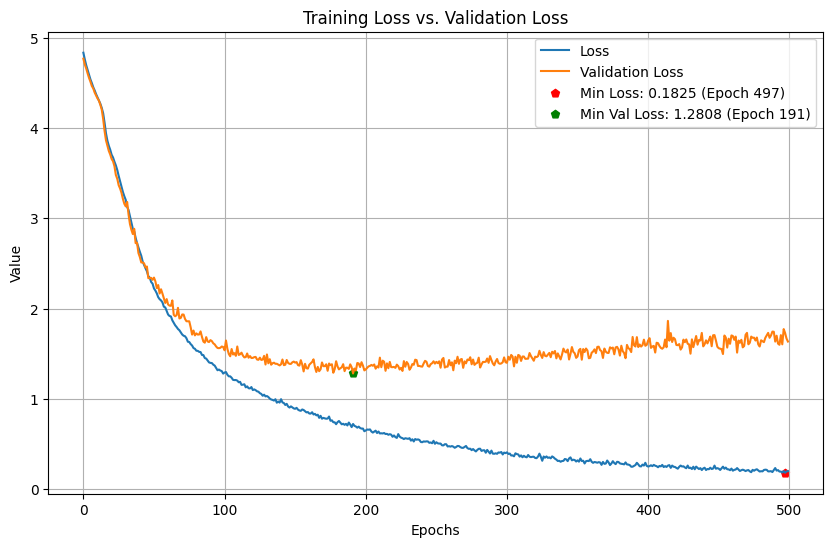

In [133]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

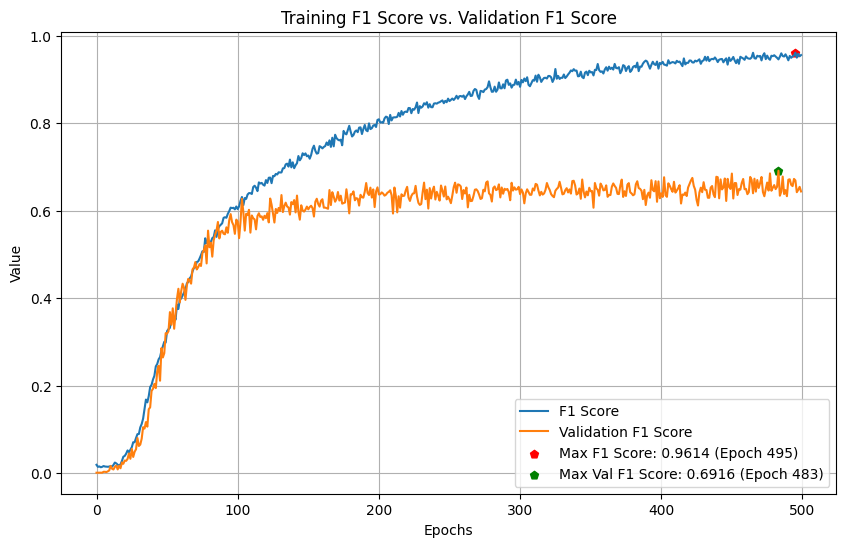

In [134]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [125]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.667     1.000     0.800        10
         BEE      0.833     0.500     0.625        10
        BELT      1.000     1.000     1.000         4
        BITE      0.875     0.875     0.875         8
   BREAKFAST      0.667     1.000     0.800         6
      CANCER      0.667     0.500     0.571         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.667     0.667     0.667         6
        DARK      0.800     1.000     0.889         4
        DEAF      0.375     0.500     0.429         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.333     0.333     0.333         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.000    

In [195]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 GRU Mish")

In [196]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 200)          798200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 125)               122625    
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_2 (Dense)             (None, 110)               13860     
                                                      

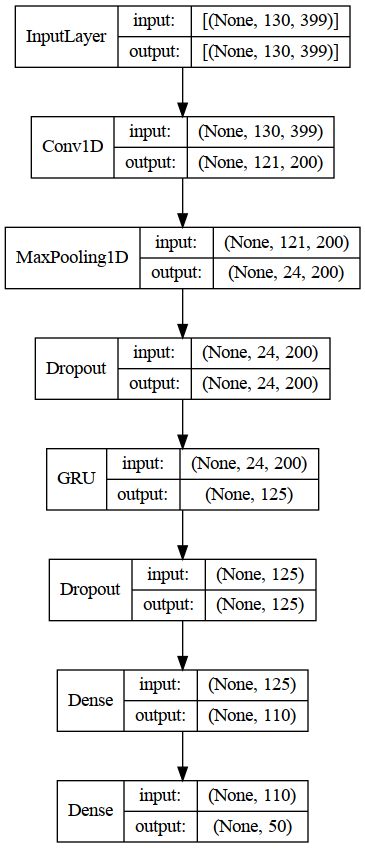

In [197]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [198]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 14ms/step - loss: 1.6760 - f1_score: 0.6916


[1.6759867668151855, 0.6916062831878662]

In [199]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         AXE      0.727     1.000     0.842         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.800     0.400     0.533        10
        BELT      1.000     1.000     1.000         4
        BITE      0.778     0.875     0.824         8
   BREAKFAST      0.857     1.000     0.923         6
      CANCER      0.800     0.500     0.615         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.455     0.833     0.588         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.429     0.500     0.462         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.833     0.625     0.714         8
     DEVELOP      0.500     0.333     0.400         6
      DINNER      0.889     1.000     0.941         8
         DOG      0.500    

### 1 1D-CNN + 1 GRU Trial 717

In [122]:
best_model = tuner.get_best_models(num_models=4)[3]

2023-09-17 12:40:01.255432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 12:40:01.330281: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-17 12:40:06.501632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 16ms/step - loss: 0.4298 - f1_score: 0.8801


[0.42978453636169434, 0.8801132440567017]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 17ms/step - loss: 1.3133 - f1_score: 0.6747


[1.3133209943771362, 0.674684464931488]

In [125]:
bestHP = tuner.get_best_hyperparameters(num_trials=3)[2]

In [126]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 717/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [127]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500


2023-09-17 12:40:25.055858: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x10b8efe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 12:40:25.055892: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-17 12:40:25.068139: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 12:40:25.223115: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 5.1934 - f1_score: 0.0136

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 16s 418ms/step - loss: 5.1934 - f1_score: 0.0136 - val_loss: 5.0518 - val_f1_score: 9.6970e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.9505 - f1_score: 0.0177

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 349ms/step - loss: 4.9505 - f1_score: 0.0177 - val_loss: 4.8324 - val_f1_score: 0.0027
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.7677 - f1_score: 0.0158

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 9s 337ms/step - loss: 4.7677 - f1_score: 0.0158 - val_loss: 4.6444 - val_f1_score: 0.0036
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.5975 - f1_score: 0.0153

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 382ms/step - loss: 4.5975 - f1_score: 0.0153 - val_loss: 4.4959 - val_f1_score: 0.0118
Epoch 5/500
28/28 [==============================] - 3s 108ms/step - loss: 4.4415 - f1_score: 0.0269 - val_loss: 4.3333 - val_f1_score: 0.0074
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.2767 - f1_score: 0.0319

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 441ms/step - loss: 4.2767 - f1_score: 0.0319 - val_loss: 4.1731 - val_f1_score: 0.0142
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 4.0752 - f1_score: 0.0381

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 395ms/step - loss: 4.0752 - f1_score: 0.0381 - val_loss: 3.9538 - val_f1_score: 0.0217
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 3.8774 - f1_score: 0.0462

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 402ms/step - loss: 3.8774 - f1_score: 0.0462 - val_loss: 3.7508 - val_f1_score: 0.0473
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.7198 - f1_score: 0.0627

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 349ms/step - loss: 3.7198 - f1_score: 0.0627 - val_loss: 3.5737 - val_f1_score: 0.0760
Epoch 10/500
28/28 [==============================] - 3s 108ms/step - loss: 3.5331 - f1_score: 0.0795 - val_loss: 3.3523 - val_f1_score: 0.0718
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.3478 - f1_score: 0.0970

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 376ms/step - loss: 3.3478 - f1_score: 0.0970 - val_loss: 3.2125 - val_f1_score: 0.0995
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.1860 - f1_score: 0.1355

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 398ms/step - loss: 3.1860 - f1_score: 0.1355 - val_loss: 3.0004 - val_f1_score: 0.1390
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.0400 - f1_score: 0.1549

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 429ms/step - loss: 3.0400 - f1_score: 0.1549 - val_loss: 2.8649 - val_f1_score: 0.1678
Epoch 14/500
28/28 [==============================] - 3s 108ms/step - loss: 2.8839 - f1_score: 0.1808 - val_loss: 2.9129 - val_f1_score: 0.1365
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 2.8065 - f1_score: 0.1963

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 369ms/step - loss: 2.8065 - f1_score: 0.1963 - val_loss: 2.6208 - val_f1_score: 0.2361
Epoch 16/500
28/28 [==============================] - 3s 108ms/step - loss: 2.6786 - f1_score: 0.2181 - val_loss: 2.5355 - val_f1_score: 0.2303
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 2.5936 - f1_score: 0.2453

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 425ms/step - loss: 2.5936 - f1_score: 0.2453 - val_loss: 2.5061 - val_f1_score: 0.2686
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 2.5394 - f1_score: 0.2560

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 355ms/step - loss: 2.5394 - f1_score: 0.2560 - val_loss: 2.4443 - val_f1_score: 0.2706
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 2.4671 - f1_score: 0.2707

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 389ms/step - loss: 2.4671 - f1_score: 0.2707 - val_loss: 2.3975 - val_f1_score: 0.2788
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.4070 - f1_score: 0.2890

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 398ms/step - loss: 2.4070 - f1_score: 0.2890 - val_loss: 2.3618 - val_f1_score: 0.2954
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 2.3419 - f1_score: 0.3041

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 363ms/step - loss: 2.3419 - f1_score: 0.3041 - val_loss: 2.3048 - val_f1_score: 0.3053
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.2844 - f1_score: 0.3193

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 387ms/step - loss: 2.2844 - f1_score: 0.3193 - val_loss: 2.2811 - val_f1_score: 0.3281
Epoch 23/500
28/28 [==============================] - 3s 109ms/step - loss: 2.2349 - f1_score: 0.3378 - val_loss: 2.4029 - val_f1_score: 0.3056
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 2.1882 - f1_score: 0.3469

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 384ms/step - loss: 2.1882 - f1_score: 0.3469 - val_loss: 2.1892 - val_f1_score: 0.3319
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.1546 - f1_score: 0.3482

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 369ms/step - loss: 2.1546 - f1_score: 0.3482 - val_loss: 2.1652 - val_f1_score: 0.3409
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.0925 - f1_score: 0.3771

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 410ms/step - loss: 2.0925 - f1_score: 0.3771 - val_loss: 2.1735 - val_f1_score: 0.3458
Epoch 27/500
28/28 [==============================] - 3s 108ms/step - loss: 2.0586 - f1_score: 0.3746 - val_loss: 2.1989 - val_f1_score: 0.3427
Epoch 28/500
28/28 [==============================] - 3s 109ms/step - loss: 2.0349 - f1_score: 0.3854 - val_loss: 2.1914 - val_f1_score: 0.3380
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 1.9962 - f1_score: 0.4003

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 391ms/step - loss: 1.9962 - f1_score: 0.4003 - val_loss: 2.0245 - val_f1_score: 0.3771
Epoch 30/500
28/28 [==============================] - 3s 108ms/step - loss: 1.9516 - f1_score: 0.4027 - val_loss: 2.1334 - val_f1_score: 0.3661
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 1.9347 - f1_score: 0.4184

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 365ms/step - loss: 1.9347 - f1_score: 0.4184 - val_loss: 2.0505 - val_f1_score: 0.3804
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 1.8891 - f1_score: 0.4427

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 378ms/step - loss: 1.8891 - f1_score: 0.4427 - val_loss: 2.0168 - val_f1_score: 0.3806
Epoch 33/500
28/28 [==============================] - ETA: 0s - loss: 1.8530 - f1_score: 0.4459

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 9s 342ms/step - loss: 1.8530 - f1_score: 0.4459 - val_loss: 2.0671 - val_f1_score: 0.3817
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 1.8353 - f1_score: 0.4516

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 417ms/step - loss: 1.8353 - f1_score: 0.4516 - val_loss: 1.9743 - val_f1_score: 0.4243
Epoch 35/500
28/28 [==============================] - 3s 108ms/step - loss: 1.7866 - f1_score: 0.4716 - val_loss: 1.9955 - val_f1_score: 0.4235
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 1.7556 - f1_score: 0.4642

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 404ms/step - loss: 1.7556 - f1_score: 0.4642 - val_loss: 1.9512 - val_f1_score: 0.4444
Epoch 37/500
28/28 [==============================] - 3s 108ms/step - loss: 1.7357 - f1_score: 0.4728 - val_loss: 2.0752 - val_f1_score: 0.3954
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 1.7137 - f1_score: 0.4897

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 368ms/step - loss: 1.7137 - f1_score: 0.4897 - val_loss: 1.9028 - val_f1_score: 0.4667
Epoch 39/500
28/28 [==============================] - 3s 108ms/step - loss: 1.6888 - f1_score: 0.4917 - val_loss: 1.9634 - val_f1_score: 0.4076
Epoch 40/500
28/28 [==============================] - 3s 108ms/step - loss: 1.6730 - f1_score: 0.4978 - val_loss: 1.8549 - val_f1_score: 0.4341
Epoch 41/500
28/28 [==============================] - 3s 109ms/step - loss: 1.6293 - f1_score: 0.5044 - val_loss: 1.8431 - val_f1_score: 0.4562
Epoch 42/500
28/28 [==============================] - 3s 109ms/step - loss: 1.6028 - f1_score: 0.5024 - val_loss: 1.8194 - val_f1_score: 0.4587
Epoch 43/500
28/28 [==============================] - ETA: 0s - loss: 1.5939 - f1_score: 0.5154

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 393ms/step - loss: 1.5939 - f1_score: 0.5154 - val_loss: 1.8546 - val_f1_score: 0.4697
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.5390 - f1_score: 0.5439

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 395ms/step - loss: 1.5390 - f1_score: 0.5439 - val_loss: 1.8468 - val_f1_score: 0.4953
Epoch 45/500
28/28 [==============================] - 3s 109ms/step - loss: 1.5358 - f1_score: 0.5355 - val_loss: 1.8435 - val_f1_score: 0.4614
Epoch 46/500
28/28 [==============================] - 3s 109ms/step - loss: 1.5045 - f1_score: 0.5467 - val_loss: 1.9326 - val_f1_score: 0.4542
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.4917 - f1_score: 0.5376

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 10s 377ms/step - loss: 1.4917 - f1_score: 0.5376 - val_loss: 1.7920 - val_f1_score: 0.4965
Epoch 48/500
28/28 [==============================] - 3s 108ms/step - loss: 1.4711 - f1_score: 0.5543 - val_loss: 1.8674 - val_f1_score: 0.4760
Epoch 49/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4605 - f1_score: 0.5595 - val_loss: 1.7754 - val_f1_score: 0.4893
Epoch 50/500
28/28 [==============================] - ETA: 0s - loss: 1.4377 - f1_score: 0.5757

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 415ms/step - loss: 1.4377 - f1_score: 0.5757 - val_loss: 1.7543 - val_f1_score: 0.5275
Epoch 51/500
28/28 [==============================] - 3s 109ms/step - loss: 1.4147 - f1_score: 0.5814 - val_loss: 1.8130 - val_f1_score: 0.5126
Epoch 52/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3904 - f1_score: 0.5891 - val_loss: 1.8554 - val_f1_score: 0.4824
Epoch 53/500
28/28 [==============================] - 3s 109ms/step - loss: 1.3864 - f1_score: 0.5802 - val_loss: 1.8024 - val_f1_score: 0.4957
Epoch 54/500
28/28 [==============================] - 3s 110ms/step - loss: 1.3566 - f1_score: 0.5841 - val_loss: 1.8547 - val_f1_score: 0.4705
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.3246 - f1_score: 0.5975

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 409ms/step - loss: 1.3246 - f1_score: 0.5975 - val_loss: 1.6759 - val_f1_score: 0.5424
Epoch 56/500
28/28 [==============================] - 3s 109ms/step - loss: 1.3430 - f1_score: 0.5976 - val_loss: 1.8012 - val_f1_score: 0.4788
Epoch 57/500
28/28 [==============================] - 3s 109ms/step - loss: 1.3027 - f1_score: 0.5974 - val_loss: 1.7058 - val_f1_score: 0.4981
Epoch 58/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2810 - f1_score: 0.6161 - val_loss: 1.6817 - val_f1_score: 0.5294
Epoch 59/500
28/28 [==============================] - 3s 109ms/step - loss: 1.2656 - f1_score: 0.6159 - val_loss: 1.7076 - val_f1_score: 0.5312
Epoch 60/500
28/28 [==============================] - 3s 109ms/step - loss: 1.2432 - f1_score: 0.6227 - val_loss: 1.7749 - val_f1_score: 0.5355
Epoch 61/500
28/28 [==============================] - 3s 110ms/step - loss: 1.2324 - f1_score: 0.6325 - val_loss: 1.7104 - val_f1_score: 0.5194
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 456ms/step - loss: 1.2375 - f1_score: 0.6235 - val_loss: 1.6372 - val_f1_score: 0.5485
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 1.1972 - f1_score: 0.6389

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 411ms/step - loss: 1.1972 - f1_score: 0.6389 - val_loss: 1.6025 - val_f1_score: 0.5525
Epoch 64/500
28/28 [==============================] - 3s 109ms/step - loss: 1.2057 - f1_score: 0.6297 - val_loss: 1.7327 - val_f1_score: 0.4958
Epoch 65/500
28/28 [==============================] - 3s 109ms/step - loss: 1.1790 - f1_score: 0.6472 - val_loss: 1.7075 - val_f1_score: 0.5188
Epoch 66/500
28/28 [==============================] - 3s 109ms/step - loss: 1.1691 - f1_score: 0.6442 - val_loss: 1.6855 - val_f1_score: 0.5347
Epoch 67/500
28/28 [==============================] - 3s 109ms/step - loss: 1.1347 - f1_score: 0.6546 - val_loss: 1.6544 - val_f1_score: 0.5339
Epoch 68/500
28/28 [==============================] - 3s 109ms/step - loss: 1.1162 - f1_score: 0.6697 - val_loss: 1.6266 - val_f1_score: 0.5519
Epoch 69/500
28/28 [==============================] - 3s 110ms/step - loss: 1.1028 - f1_score: 0.6699 - val_loss: 1.5856 - val_f1_score: 0.5427
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 425ms/step - loss: 1.0623 - f1_score: 0.6702 - val_loss: 1.5735 - val_f1_score: 0.5566
Epoch 74/500
28/28 [==============================] - 3s 109ms/step - loss: 1.0671 - f1_score: 0.6689 - val_loss: 1.6172 - val_f1_score: 0.5418
Epoch 75/500
28/28 [==============================] - 3s 111ms/step - loss: 1.0569 - f1_score: 0.6782 - val_loss: 1.5610 - val_f1_score: 0.5542
Epoch 76/500
28/28 [==============================] - 3s 114ms/step - loss: 1.0344 - f1_score: 0.6890 - val_loss: 1.7140 - val_f1_score: 0.5247
Epoch 77/500
28/28 [==============================] - ETA: 0s - loss: 1.0277 - f1_score: 0.6960

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 14s 515ms/step - loss: 1.0277 - f1_score: 0.6960 - val_loss: 1.6490 - val_f1_score: 0.5598
Epoch 78/500
28/28 [==============================] - 3s 116ms/step - loss: 1.0222 - f1_score: 0.6957 - val_loss: 1.6227 - val_f1_score: 0.5443
Epoch 79/500
28/28 [==============================] - ETA: 0s - loss: 1.0037 - f1_score: 0.6854

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 13s 468ms/step - loss: 1.0037 - f1_score: 0.6854 - val_loss: 1.5938 - val_f1_score: 0.5717
Epoch 80/500
28/28 [==============================] - 3s 109ms/step - loss: 0.9956 - f1_score: 0.7123 - val_loss: 1.5362 - val_f1_score: 0.5666
Epoch 81/500
28/28 [==============================] - 3s 119ms/step - loss: 0.9882 - f1_score: 0.7057 - val_loss: 1.5689 - val_f1_score: 0.5497
Epoch 82/500
28/28 [==============================] - 3s 112ms/step - loss: 0.9670 - f1_score: 0.7150 - val_loss: 1.6654 - val_f1_score: 0.5514
Epoch 83/500
28/28 [==============================] - 3s 109ms/step - loss: 0.9755 - f1_score: 0.7111 - val_loss: 1.5985 - val_f1_score: 0.5337
Epoch 84/500
28/28 [==============================] - 3s 109ms/step - loss: 0.9348 - f1_score: 0.7214 - val_loss: 1.6639 - val_f1_score: 0.5656
Epoch 85/500
28/28 [==============================] - 3s 110ms/step - loss: 0.9259 - f1_score: 0.7209 - val_loss: 1.5483 - val_f1_score: 0.5574
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 13s 480ms/step - loss: 0.9136 - f1_score: 0.7196 - val_loss: 1.6493 - val_f1_score: 0.5721
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 0.9174 - f1_score: 0.7265

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 416ms/step - loss: 0.9174 - f1_score: 0.7265 - val_loss: 1.6276 - val_f1_score: 0.5743
Epoch 88/500
28/28 [==============================] - 3s 109ms/step - loss: 0.9097 - f1_score: 0.7197 - val_loss: 1.5001 - val_f1_score: 0.5673
Epoch 89/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8746 - f1_score: 0.7390 - val_loss: 1.5135 - val_f1_score: 0.5508
Epoch 90/500
28/28 [==============================] - 3s 111ms/step - loss: 0.8931 - f1_score: 0.7290 - val_loss: 1.6047 - val_f1_score: 0.5355
Epoch 91/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8742 - f1_score: 0.7372 - val_loss: 1.5868 - val_f1_score: 0.5551
Epoch 92/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8857 - f1_score: 0.7219 - val_loss: 1.6017 - val_f1_score: 0.5576
Epoch 93/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8408 - f1_score: 0.7581 - val_loss: 1.5835 - val_f1_score: 0.5692
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 11s 421ms/step - loss: 0.8320 - f1_score: 0.7523 - val_loss: 1.4902 - val_f1_score: 0.5995
Epoch 98/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8337 - f1_score: 0.7398 - val_loss: 1.6365 - val_f1_score: 0.5528
Epoch 99/500
28/28 [==============================] - 3s 109ms/step - loss: 0.8177 - f1_score: 0.7630 - val_loss: 1.5609 - val_f1_score: 0.5565
Epoch 100/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8214 - f1_score: 0.7503 - val_loss: 1.6436 - val_f1_score: 0.5657
Epoch 101/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8012 - f1_score: 0.7565 - val_loss: 1.5906 - val_f1_score: 0.5846
Epoch 102/500
28/28 [==============================] - 3s 110ms/step - loss: 0.8001 - f1_score: 0.7634 - val_loss: 1.6402 - val_f1_score: 0.5421
Epoch 103/500
28/28 [==============================] - 3s 110ms/step - loss: 0.7740 - f1_score: 0.7726 - val_loss: 1.5419 - val_f1_score: 0.5709


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 12s 448ms/step - loss: 0.6197 - f1_score: 0.8161 - val_loss: 1.5815 - val_f1_score: 0.6251
Epoch 125/500
28/28 [==============================] - 3s 109ms/step - loss: 0.6290 - f1_score: 0.8236 - val_loss: 1.5312 - val_f1_score: 0.5864
Epoch 126/500
28/28 [==============================] - 3s 110ms/step - loss: 0.6356 - f1_score: 0.8131 - val_loss: 1.7088 - val_f1_score: 0.6056
Epoch 127/500
28/28 [==============================] - 3s 111ms/step - loss: 0.6103 - f1_score: 0.8200 - val_loss: 1.6418 - val_f1_score: 0.5803
Epoch 128/500
28/28 [==============================] - 3s 110ms/step - loss: 0.6091 - f1_score: 0.8255 - val_loss: 1.7436 - val_f1_score: 0.5629
Epoch 129/500
28/28 [==============================] - 3s 111ms/step - loss: 0.5851 - f1_score: 0.8324 - val_loss: 1.5468 - val_f1_score: 0.5991
Epoch 130/500
28/28 [==============================] - 3s 111ms/step - loss: 0.6272 - f1_score: 0.8115 - val_loss: 1.7603 - val_f1_score: 0.564

28/28 [==============================] - 3s 112ms/step - loss: 0.2835 - f1_score: 0.9329 - val_loss: 2.0499 - val_f1_score: 0.5869
Epoch 237/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2928 - f1_score: 0.9275 - val_loss: 2.0205 - val_f1_score: 0.5781
Epoch 238/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2819 - f1_score: 0.9302 - val_loss: 1.9928 - val_f1_score: 0.5710
Epoch 239/500
28/28 [==============================] - 3s 112ms/step - loss: 0.3191 - f1_score: 0.9149 - val_loss: 1.9710 - val_f1_score: 0.5989
Epoch 240/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2929 - f1_score: 0.9342 - val_loss: 2.0457 - val_f1_score: 0.5888
Epoch 241/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2615 - f1_score: 0.9420 - val_loss: 2.0965 - val_f1_score: 0.5788
Epoch 242/500
28/28 [==============================] - 3s 112ms/step - loss: 0.2724 - f1_score: 0.9362 - val_loss: 2.0398 - val_f1_score: 0.6114

28/28 [==============================] - 3s 112ms/step - loss: 0.1853 - f1_score: 0.9584 - val_loss: 2.3632 - val_f1_score: 0.5899
Epoch 349/500
28/28 [==============================] - 3s 114ms/step - loss: 0.1954 - f1_score: 0.9552 - val_loss: 2.4574 - val_f1_score: 0.5688
Epoch 350/500
28/28 [==============================] - 3s 112ms/step - loss: 0.1970 - f1_score: 0.9535 - val_loss: 2.3519 - val_f1_score: 0.5658
Epoch 351/500
28/28 [==============================] - 3s 113ms/step - loss: 0.2082 - f1_score: 0.9541 - val_loss: 2.4155 - val_f1_score: 0.5719
Epoch 352/500
28/28 [==============================] - 3s 112ms/step - loss: 0.1747 - f1_score: 0.9624 - val_loss: 2.5099 - val_f1_score: 0.5565
Epoch 353/500
28/28 [==============================] - 3s 112ms/step - loss: 0.1864 - f1_score: 0.9588 - val_loss: 2.2623 - val_f1_score: 0.5979
Epoch 354/500
28/28 [==============================] - 3s 113ms/step - loss: 0.1812 - f1_score: 0.9595 - val_loss: 2.4378 - val_f1_score: 0.5681

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 717/assets


28/28 [==============================] - 13s 476ms/step - loss: 0.1492 - f1_score: 0.9700 - val_loss: 2.2838 - val_f1_score: 0.6289
Epoch 423/500
28/28 [==============================] - 3s 110ms/step - loss: 0.1485 - f1_score: 0.9667 - val_loss: 2.4558 - val_f1_score: 0.5814
Epoch 424/500
28/28 [==============================] - 3s 110ms/step - loss: 0.1540 - f1_score: 0.9661 - val_loss: 2.3902 - val_f1_score: 0.5726
Epoch 425/500
28/28 [==============================] - 3s 114ms/step - loss: 0.1615 - f1_score: 0.9678 - val_loss: 2.4114 - val_f1_score: 0.5965
Epoch 426/500
28/28 [==============================] - 3s 113ms/step - loss: 0.1781 - f1_score: 0.9619 - val_loss: 2.7473 - val_f1_score: 0.5716
Epoch 427/500
28/28 [==============================] - 3s 113ms/step - loss: 0.1664 - f1_score: 0.9630 - val_loss: 2.3671 - val_f1_score: 0.5597
Epoch 428/500
28/28 [==============================] - 3s 112ms/step - loss: 0.1754 - f1_score: 0.9614 - val_loss: 2.4411 - val_f1_score: 0.570

In [128]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.583     0.700     0.636        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.625     0.769         8
   BREAKFAST      0.333     0.333     0.333         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      0.667     1.000     0.800         6
    CONFUSED      0.556     0.833     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.300     0.500     0.375         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      1.000     0.667     0.800         6
      DINNER      0.250     0.125     0.167         8
         DOG      1.000    

In [129]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 717/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [130]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 717/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.143407  0.967741  2.774204      0.551061
496  0.133611  0.972700  2.444389      0.596683
497  0.132800  0.974752  2.352121      0.578139
498  0.132822  0.971275  2.335888      0.584798
499  0.118077  0.979302  2.513285      0.583930

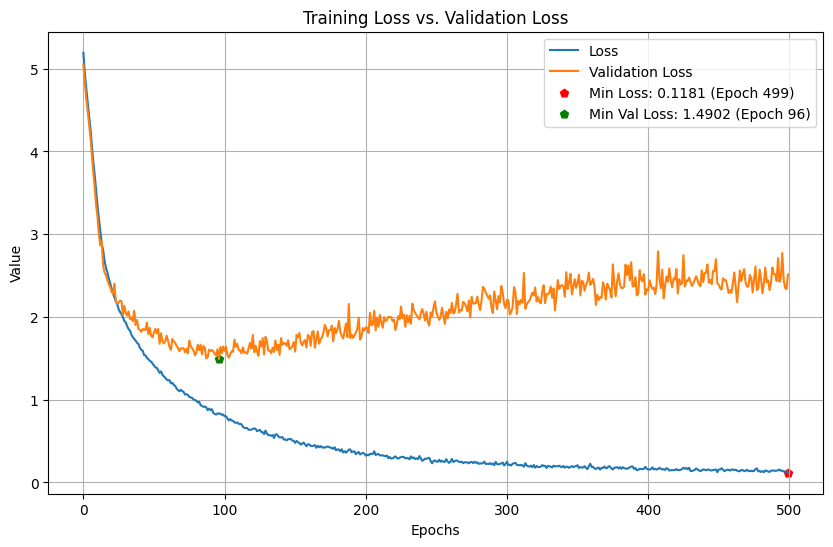

In [131]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

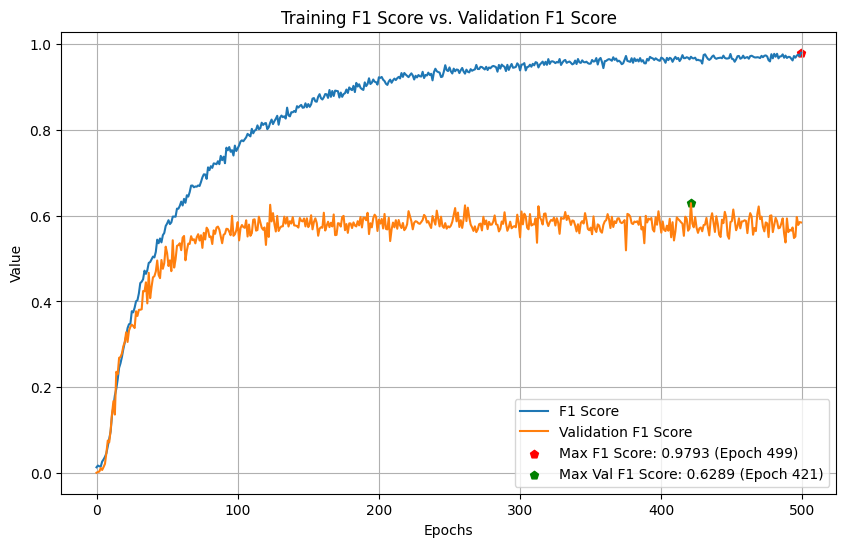

In [132]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [133]:
reconstructed_model = tf.keras.models.load_model("1 1D-CNN + 1 GRU Trial 717")

In [134]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 116, 150)          897900    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 120)               12120     
                                                      

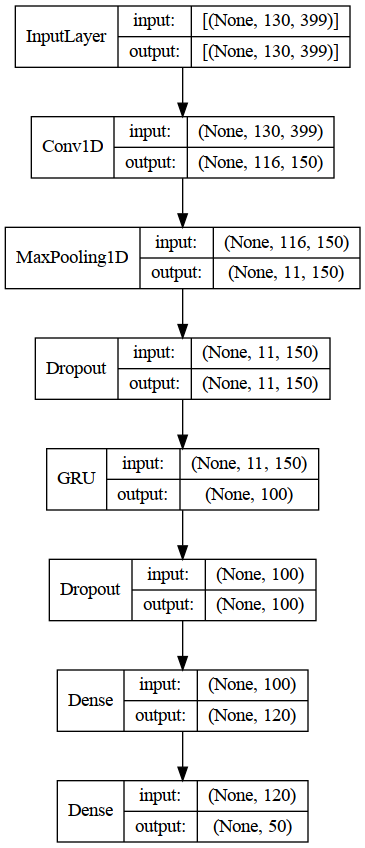

In [135]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

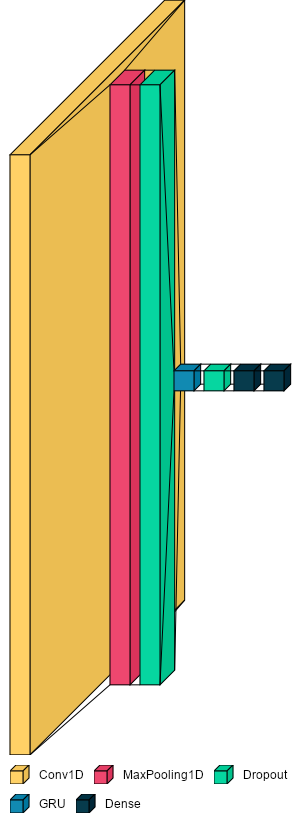

In [136]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [137]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 2.2838 - f1_score: 0.6289


[2.283757209777832, 0.628909707069397]

In [138]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 32ms/step - loss: 0.0551 - f1_score: 1.0000


[0.05510687083005905, 1.0]

In [139]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.615     0.800     0.696        10
         BEE      0.429     0.300     0.353        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      1.000     0.167     0.286         6
      CANCER      0.875     0.875     0.875         8
   CHRISTMAS      0.750     1.000     0.857         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.500     0.667     0.571         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      1.000     0.500     0.667         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.333    

### 1 1D-CNN + 1 GRU Trial 722

In [122]:
best_model = tuner.get_best_models(num_models=6)[5]

2023-09-17 13:19:49.922931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 13:19:49.997604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-17 13:16:56.852631: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 16ms/step - loss: 0.4927 - f1_score: 0.8692


[0.49272581934928894, 0.8691571950912476]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 18ms/step - loss: 1.2218 - f1_score: 0.6788


[1.221798300743103, 0.678809642791748]

In [123]:
bestHP = tuner.get_best_hyperparameters(num_trials=4)[3]

In [124]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 722/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [125]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500


2023-09-17 13:20:06.268035: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-17 13:20:06.917417: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f48cc6fe870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 13:20:06.917444: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-17 13:20:06.927989: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 13:20:07.081098: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.3032 - f1_score: 0.0161

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 21s 597ms/step - loss: 4.3032 - f1_score: 0.0161 - val_loss: 4.1787 - val_f1_score: 7.5949e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.2828 - f1_score: 0.0162

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 349ms/step - loss: 4.2828 - f1_score: 0.0162 - val_loss: 4.1592 - val_f1_score: 0.0017
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.2588 - f1_score: 0.0202

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 336ms/step - loss: 4.2588 - f1_score: 0.0202 - val_loss: 4.1681 - val_f1_score: 0.0021
Epoch 4/500
28/28 [==============================] - 2s 84ms/step - loss: 4.2351 - f1_score: 0.0171 - val_loss: 4.1271 - val_f1_score: 0.0012
Epoch 5/500
28/28 [==============================] - 2s 84ms/step - loss: 4.2262 - f1_score: 0.0187 - val_loss: 4.1158 - val_f1_score: 7.2727e-04
Epoch 6/500
28/28 [==============================] - ETA: 0s - loss: 4.2065 - f1_score: 0.0168

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 365ms/step - loss: 4.2065 - f1_score: 0.0168 - val_loss: 4.1162 - val_f1_score: 0.0049
Epoch 7/500
28/28 [==============================] - 2s 84ms/step - loss: 4.1949 - f1_score: 0.0172 - val_loss: 4.1342 - val_f1_score: 4.9080e-04
Epoch 8/500
28/28 [==============================] - 2s 84ms/step - loss: 4.1986 - f1_score: 0.0213 - val_loss: 4.0959 - val_f1_score: 0.0014
Epoch 9/500
28/28 [==============================] - 2s 84ms/step - loss: 4.1549 - f1_score: 0.0211 - val_loss: 4.0758 - val_f1_score: 0.0036
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 4.1467 - f1_score: 0.0182

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 339ms/step - loss: 4.1467 - f1_score: 0.0182 - val_loss: 4.0492 - val_f1_score: 0.0050
Epoch 11/500
28/28 [==============================] - 2s 84ms/step - loss: 4.1236 - f1_score: 0.0216 - val_loss: 4.0893 - val_f1_score: 0.0043
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 4.1075 - f1_score: 0.0244

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 382ms/step - loss: 4.1075 - f1_score: 0.0244 - val_loss: 4.0652 - val_f1_score: 0.0068
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 4.0947 - f1_score: 0.0241

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 333ms/step - loss: 4.0947 - f1_score: 0.0241 - val_loss: 4.0002 - val_f1_score: 0.0118
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 4.0564 - f1_score: 0.0316

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 315ms/step - loss: 4.0564 - f1_score: 0.0316 - val_loss: 3.9723 - val_f1_score: 0.0203
Epoch 15/500
28/28 [==============================] - 2s 84ms/step - loss: 4.0223 - f1_score: 0.0320 - val_loss: 3.9410 - val_f1_score: 0.0093
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.9773 - f1_score: 0.0354

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 338ms/step - loss: 3.9773 - f1_score: 0.0354 - val_loss: 3.8515 - val_f1_score: 0.0227
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.9419 - f1_score: 0.0339

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 338ms/step - loss: 3.9419 - f1_score: 0.0339 - val_loss: 3.7765 - val_f1_score: 0.0265
Epoch 18/500
28/28 [==============================] - 2s 86ms/step - loss: 3.8608 - f1_score: 0.0397 - val_loss: 3.7019 - val_f1_score: 0.0244
Epoch 19/500
28/28 [==============================] - 2s 85ms/step - loss: 3.8006 - f1_score: 0.0406 - val_loss: 3.6150 - val_f1_score: 0.0221
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 3.7429 - f1_score: 0.0436

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 385ms/step - loss: 3.7429 - f1_score: 0.0436 - val_loss: 3.5343 - val_f1_score: 0.0412
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.6861 - f1_score: 0.0522

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 350ms/step - loss: 3.6861 - f1_score: 0.0522 - val_loss: 3.4988 - val_f1_score: 0.0477
Epoch 22/500
28/28 [==============================] - 2s 85ms/step - loss: 3.6347 - f1_score: 0.0536 - val_loss: 3.4158 - val_f1_score: 0.0472
Epoch 23/500
28/28 [==============================] - 2s 85ms/step - loss: 3.5914 - f1_score: 0.0507 - val_loss: 3.3899 - val_f1_score: 0.0432
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 3.5472 - f1_score: 0.0603

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 375ms/step - loss: 3.5472 - f1_score: 0.0603 - val_loss: 3.2994 - val_f1_score: 0.0593
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 3.4858 - f1_score: 0.0678

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 343ms/step - loss: 3.4858 - f1_score: 0.0678 - val_loss: 3.2402 - val_f1_score: 0.0752
Epoch 26/500
28/28 [==============================] - 2s 85ms/step - loss: 3.4303 - f1_score: 0.0723 - val_loss: 3.2216 - val_f1_score: 0.0738
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 3.3738 - f1_score: 0.0767

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 344ms/step - loss: 3.3738 - f1_score: 0.0767 - val_loss: 3.1855 - val_f1_score: 0.0890
Epoch 28/500
28/28 [==============================] - 2s 85ms/step - loss: 3.3442 - f1_score: 0.0828 - val_loss: 3.1948 - val_f1_score: 0.0754
Epoch 29/500
28/28 [==============================] - 2s 86ms/step - loss: 3.3046 - f1_score: 0.0928 - val_loss: 3.0976 - val_f1_score: 0.0776
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 3.2569 - f1_score: 0.0986

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 410ms/step - loss: 3.2569 - f1_score: 0.0986 - val_loss: 3.0424 - val_f1_score: 0.1101
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 3.2264 - f1_score: 0.1094

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 367ms/step - loss: 3.2264 - f1_score: 0.1094 - val_loss: 3.0181 - val_f1_score: 0.1246
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 3.1801 - f1_score: 0.1171

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 350ms/step - loss: 3.1801 - f1_score: 0.1171 - val_loss: 3.0061 - val_f1_score: 0.1369
Epoch 33/500
28/28 [==============================] - 2s 85ms/step - loss: 3.1123 - f1_score: 0.1248 - val_loss: 2.9222 - val_f1_score: 0.1276
Epoch 34/500
28/28 [==============================] - ETA: 0s - loss: 3.0526 - f1_score: 0.1473

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 345ms/step - loss: 3.0526 - f1_score: 0.1473 - val_loss: 2.8352 - val_f1_score: 0.1586
Epoch 35/500
28/28 [==============================] - 2s 84ms/step - loss: 2.9900 - f1_score: 0.1581 - val_loss: 2.8598 - val_f1_score: 0.1500
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.9594 - f1_score: 0.1590

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 346ms/step - loss: 2.9594 - f1_score: 0.1590 - val_loss: 2.7248 - val_f1_score: 0.1638
Epoch 37/500
28/28 [==============================] - 2s 85ms/step - loss: 2.9086 - f1_score: 0.1631 - val_loss: 2.8363 - val_f1_score: 0.1180
Epoch 38/500
28/28 [==============================] - 2s 85ms/step - loss: 2.8487 - f1_score: 0.1782 - val_loss: 2.7419 - val_f1_score: 0.1463
Epoch 39/500
28/28 [==============================] - 2s 86ms/step - loss: 2.8452 - f1_score: 0.1653 - val_loss: 2.7772 - val_f1_score: 0.1241
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 2.8039 - f1_score: 0.1879

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 417ms/step - loss: 2.8039 - f1_score: 0.1879 - val_loss: 2.5718 - val_f1_score: 0.2082
Epoch 41/500
28/28 [==============================] - 2s 85ms/step - loss: 2.7515 - f1_score: 0.1895 - val_loss: 2.5555 - val_f1_score: 0.1885
Epoch 42/500
28/28 [==============================] - 2s 85ms/step - loss: 2.7079 - f1_score: 0.2036 - val_loss: 2.5544 - val_f1_score: 0.1970
Epoch 43/500
28/28 [==============================] - 2s 85ms/step - loss: 2.7166 - f1_score: 0.2090 - val_loss: 2.5979 - val_f1_score: 0.1707
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.6573 - f1_score: 0.2279

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 391ms/step - loss: 2.6573 - f1_score: 0.2279 - val_loss: 2.5800 - val_f1_score: 0.2097
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 2.6502 - f1_score: 0.2099

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 374ms/step - loss: 2.6502 - f1_score: 0.2099 - val_loss: 2.5318 - val_f1_score: 0.2365
Epoch 46/500
28/28 [==============================] - 2s 86ms/step - loss: 2.6219 - f1_score: 0.2324 - val_loss: 2.5258 - val_f1_score: 0.2091
Epoch 47/500
28/28 [==============================] - 2s 86ms/step - loss: 2.5681 - f1_score: 0.2378 - val_loss: 2.4328 - val_f1_score: 0.2215
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 2.5477 - f1_score: 0.2401

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 406ms/step - loss: 2.5477 - f1_score: 0.2401 - val_loss: 2.4681 - val_f1_score: 0.2586
Epoch 49/500
28/28 [==============================] - 2s 86ms/step - loss: 2.5344 - f1_score: 0.2516 - val_loss: 2.4488 - val_f1_score: 0.2370
Epoch 50/500
28/28 [==============================] - 2s 87ms/step - loss: 2.5414 - f1_score: 0.2361 - val_loss: 2.3907 - val_f1_score: 0.2537
Epoch 51/500
28/28 [==============================] - 2s 90ms/step - loss: 2.4977 - f1_score: 0.2520 - val_loss: 2.4868 - val_f1_score: 0.2438
Epoch 52/500
28/28 [==============================] - 2s 87ms/step - loss: 2.4678 - f1_score: 0.2640 - val_loss: 2.3885 - val_f1_score: 0.2323
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.4603 - f1_score: 0.2545

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 441ms/step - loss: 2.4603 - f1_score: 0.2545 - val_loss: 2.3666 - val_f1_score: 0.2756
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 2.4165 - f1_score: 0.2821

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 369ms/step - loss: 2.4165 - f1_score: 0.2821 - val_loss: 2.4177 - val_f1_score: 0.2915
Epoch 55/500
28/28 [==============================] - 2s 85ms/step - loss: 2.4019 - f1_score: 0.2805 - val_loss: 2.3297 - val_f1_score: 0.2517
Epoch 56/500
28/28 [==============================] - 2s 86ms/step - loss: 2.3666 - f1_score: 0.2796 - val_loss: 2.3386 - val_f1_score: 0.2753
Epoch 57/500
28/28 [==============================] - ETA: 0s - loss: 2.3449 - f1_score: 0.2949

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 423ms/step - loss: 2.3449 - f1_score: 0.2949 - val_loss: 2.3350 - val_f1_score: 0.3070
Epoch 58/500
28/28 [==============================] - 2s 87ms/step - loss: 2.3270 - f1_score: 0.2971 - val_loss: 2.2229 - val_f1_score: 0.2995
Epoch 59/500
28/28 [==============================] - 2s 87ms/step - loss: 2.3134 - f1_score: 0.3007 - val_loss: 2.2697 - val_f1_score: 0.3042
Epoch 60/500
28/28 [==============================] - 2s 87ms/step - loss: 2.2742 - f1_score: 0.3180 - val_loss: 2.2608 - val_f1_score: 0.2932
Epoch 61/500
28/28 [==============================] - 2s 86ms/step - loss: 2.2697 - f1_score: 0.3173 - val_loss: 2.1802 - val_f1_score: 0.3034
Epoch 62/500
28/28 [==============================] - 2s 88ms/step - loss: 2.2793 - f1_score: 0.3107 - val_loss: 2.1719 - val_f1_score: 0.2998
Epoch 63/500
28/28 [==============================] - ETA: 0s - loss: 2.2256 - f1_score: 0.3257

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 406ms/step - loss: 2.2256 - f1_score: 0.3257 - val_loss: 2.1656 - val_f1_score: 0.3104
Epoch 64/500
28/28 [==============================] - 2s 86ms/step - loss: 2.2405 - f1_score: 0.3324 - val_loss: 2.2788 - val_f1_score: 0.3033
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 2.1989 - f1_score: 0.3352

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 445ms/step - loss: 2.1989 - f1_score: 0.3352 - val_loss: 2.1276 - val_f1_score: 0.3531
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 2.1770 - f1_score: 0.3389

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 345ms/step - loss: 2.1770 - f1_score: 0.3389 - val_loss: 2.1010 - val_f1_score: 0.3576
Epoch 67/500
28/28 [==============================] - 2s 87ms/step - loss: 2.1618 - f1_score: 0.3337 - val_loss: 2.1842 - val_f1_score: 0.3028
Epoch 68/500
28/28 [==============================] - 2s 86ms/step - loss: 2.1286 - f1_score: 0.3569 - val_loss: 2.2970 - val_f1_score: 0.3187
Epoch 69/500
28/28 [==============================] - 2s 86ms/step - loss: 2.1136 - f1_score: 0.3512 - val_loss: 2.0867 - val_f1_score: 0.3473
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 2.1095 - f1_score: 0.3680

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 376ms/step - loss: 2.1095 - f1_score: 0.3680 - val_loss: 2.0862 - val_f1_score: 0.3649
Epoch 71/500
28/28 [==============================] - 2s 86ms/step - loss: 2.0775 - f1_score: 0.3627 - val_loss: 2.1455 - val_f1_score: 0.3360
Epoch 72/500
28/28 [==============================] - ETA: 0s - loss: 2.0757 - f1_score: 0.3662

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 422ms/step - loss: 2.0757 - f1_score: 0.3662 - val_loss: 2.0265 - val_f1_score: 0.4077
Epoch 73/500
28/28 [==============================] - 2s 85ms/step - loss: 2.0555 - f1_score: 0.3805 - val_loss: 2.0592 - val_f1_score: 0.3932
Epoch 74/500
28/28 [==============================] - 2s 88ms/step - loss: 2.0107 - f1_score: 0.3871 - val_loss: 2.0563 - val_f1_score: 0.3937
Epoch 75/500
28/28 [==============================] - 2s 87ms/step - loss: 2.0169 - f1_score: 0.3960 - val_loss: 2.0852 - val_f1_score: 0.3720
Epoch 76/500
28/28 [==============================] - ETA: 0s - loss: 1.9867 - f1_score: 0.3811

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 439ms/step - loss: 1.9867 - f1_score: 0.3811 - val_loss: 1.9315 - val_f1_score: 0.4209
Epoch 77/500
28/28 [==============================] - 2s 86ms/step - loss: 1.9958 - f1_score: 0.3811 - val_loss: 2.0875 - val_f1_score: 0.3550
Epoch 78/500
28/28 [==============================] - ETA: 0s - loss: 1.9737 - f1_score: 0.4090

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 360ms/step - loss: 1.9737 - f1_score: 0.4090 - val_loss: 1.8987 - val_f1_score: 0.4302
Epoch 79/500
28/28 [==============================] - 2s 85ms/step - loss: 1.9519 - f1_score: 0.3987 - val_loss: 1.9143 - val_f1_score: 0.4014
Epoch 80/500
28/28 [==============================] - ETA: 0s - loss: 1.9339 - f1_score: 0.4055

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 446ms/step - loss: 1.9339 - f1_score: 0.4055 - val_loss: 1.8782 - val_f1_score: 0.4605
Epoch 81/500
28/28 [==============================] - 2s 85ms/step - loss: 1.9045 - f1_score: 0.4209 - val_loss: 1.9159 - val_f1_score: 0.4342
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 1.8842 - f1_score: 0.4127

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 383ms/step - loss: 1.8842 - f1_score: 0.4127 - val_loss: 1.8515 - val_f1_score: 0.4607
Epoch 83/500
28/28 [==============================] - 2s 87ms/step - loss: 1.9023 - f1_score: 0.4310 - val_loss: 1.8215 - val_f1_score: 0.4431
Epoch 84/500
28/28 [==============================] - ETA: 0s - loss: 1.8764 - f1_score: 0.4261

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 457ms/step - loss: 1.8764 - f1_score: 0.4261 - val_loss: 1.8101 - val_f1_score: 0.4776
Epoch 85/500
28/28 [==============================] - 2s 85ms/step - loss: 1.8708 - f1_score: 0.4358 - val_loss: 1.8595 - val_f1_score: 0.4475
Epoch 86/500
28/28 [==============================] - 2s 85ms/step - loss: 1.8431 - f1_score: 0.4281 - val_loss: 1.8147 - val_f1_score: 0.4628
Epoch 87/500
28/28 [==============================] - ETA: 0s - loss: 1.8305 - f1_score: 0.4468

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 381ms/step - loss: 1.8305 - f1_score: 0.4468 - val_loss: 1.7687 - val_f1_score: 0.4832
Epoch 88/500
28/28 [==============================] - 2s 86ms/step - loss: 1.8062 - f1_score: 0.4459 - val_loss: 1.7794 - val_f1_score: 0.4797
Epoch 89/500
28/28 [==============================] - 2s 85ms/step - loss: 1.8099 - f1_score: 0.4511 - val_loss: 1.8010 - val_f1_score: 0.4704
Epoch 90/500
28/28 [==============================] - 2s 86ms/step - loss: 1.7987 - f1_score: 0.4534 - val_loss: 1.8010 - val_f1_score: 0.4450
Epoch 91/500
28/28 [==============================] - 2s 85ms/step - loss: 1.7974 - f1_score: 0.4507 - val_loss: 1.7615 - val_f1_score: 0.4815
Epoch 92/500
28/28 [==============================] - 2s 86ms/step - loss: 1.7810 - f1_score: 0.4523 - val_loss: 1.7521 - val_f1_score: 0.4804
Epoch 93/500
28/28 [==============================] - ETA: 0s - loss: 1.7350 - f1_score: 0.4743

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 381ms/step - loss: 1.7350 - f1_score: 0.4743 - val_loss: 1.7653 - val_f1_score: 0.4889
Epoch 94/500
28/28 [==============================] - 2s 85ms/step - loss: 1.7329 - f1_score: 0.4653 - val_loss: 1.7767 - val_f1_score: 0.4814
Epoch 95/500
28/28 [==============================] - ETA: 0s - loss: 1.7194 - f1_score: 0.4661

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 392ms/step - loss: 1.7194 - f1_score: 0.4661 - val_loss: 1.7195 - val_f1_score: 0.5178
Epoch 96/500
28/28 [==============================] - 2s 85ms/step - loss: 1.7028 - f1_score: 0.4728 - val_loss: 1.6416 - val_f1_score: 0.5051
Epoch 97/500
28/28 [==============================] - 2s 86ms/step - loss: 1.6927 - f1_score: 0.4767 - val_loss: 1.7135 - val_f1_score: 0.4744
Epoch 98/500
28/28 [==============================] - 2s 86ms/step - loss: 1.7111 - f1_score: 0.4886 - val_loss: 1.6809 - val_f1_score: 0.5025
Epoch 99/500
28/28 [==============================] - 2s 86ms/step - loss: 1.6921 - f1_score: 0.4766 - val_loss: 1.7747 - val_f1_score: 0.4603
Epoch 100/500
28/28 [==============================] - ETA: 0s - loss: 1.6418 - f1_score: 0.4925

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 445ms/step - loss: 1.6418 - f1_score: 0.4925 - val_loss: 1.6042 - val_f1_score: 0.5453
Epoch 101/500
28/28 [==============================] - 2s 85ms/step - loss: 1.6418 - f1_score: 0.4970 - val_loss: 1.6371 - val_f1_score: 0.5141
Epoch 102/500
28/28 [==============================] - 2s 85ms/step - loss: 1.6345 - f1_score: 0.5042 - val_loss: 1.7105 - val_f1_score: 0.4852
Epoch 103/500
28/28 [==============================] - 2s 86ms/step - loss: 1.6262 - f1_score: 0.5054 - val_loss: 1.7584 - val_f1_score: 0.4884
Epoch 104/500
28/28 [==============================] - 2s 87ms/step - loss: 1.6029 - f1_score: 0.5049 - val_loss: 1.6455 - val_f1_score: 0.5117
Epoch 105/500
28/28 [==============================] - 2s 87ms/step - loss: 1.6026 - f1_score: 0.5101 - val_loss: 1.6028 - val_f1_score: 0.5398
Epoch 106/500
28/28 [==============================] - 2s 88ms/step - loss: 1.5906 - f1_score: 0.5166 - val_loss: 1.6272 - val_f1_score: 0.5230
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 390ms/step - loss: 1.5488 - f1_score: 0.5313 - val_loss: 1.5796 - val_f1_score: 0.5578
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 1.5515 - f1_score: 0.5231

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 384ms/step - loss: 1.5515 - f1_score: 0.5231 - val_loss: 1.5622 - val_f1_score: 0.5607
Epoch 110/500
28/28 [==============================] - 2s 85ms/step - loss: 1.5482 - f1_score: 0.5220 - val_loss: 1.7176 - val_f1_score: 0.5028
Epoch 111/500
28/28 [==============================] - 2s 86ms/step - loss: 1.5332 - f1_score: 0.5276 - val_loss: 1.5462 - val_f1_score: 0.5498
Epoch 112/500
28/28 [==============================] - 2s 86ms/step - loss: 1.5069 - f1_score: 0.5402 - val_loss: 1.6129 - val_f1_score: 0.5184
Epoch 113/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4921 - f1_score: 0.5363 - val_loss: 1.5637 - val_f1_score: 0.5566
Epoch 114/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4843 - f1_score: 0.5563 - val_loss: 1.4964 - val_f1_score: 0.5603
Epoch 115/500
28/28 [==============================] - ETA: 0s - loss: 1.4839 - f1_score: 0.5403

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 22s 821ms/step - loss: 1.4839 - f1_score: 0.5403 - val_loss: 1.5014 - val_f1_score: 0.5635
Epoch 116/500
28/28 [==============================] - 2s 85ms/step - loss: 1.4866 - f1_score: 0.5423 - val_loss: 1.5651 - val_f1_score: 0.5570
Epoch 117/500
28/28 [==============================] - ETA: 0s - loss: 1.4655 - f1_score: 0.5525

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 386ms/step - loss: 1.4655 - f1_score: 0.5525 - val_loss: 1.4706 - val_f1_score: 0.5826
Epoch 118/500
28/28 [==============================] - 2s 85ms/step - loss: 1.4602 - f1_score: 0.5658 - val_loss: 1.6123 - val_f1_score: 0.5300
Epoch 119/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4609 - f1_score: 0.5533 - val_loss: 1.4838 - val_f1_score: 0.5452
Epoch 120/500
28/28 [==============================] - 2s 85ms/step - loss: 1.4397 - f1_score: 0.5621 - val_loss: 1.5137 - val_f1_score: 0.5786
Epoch 121/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4032 - f1_score: 0.5729 - val_loss: 1.4788 - val_f1_score: 0.5563
Epoch 122/500
28/28 [==============================] - 2s 87ms/step - loss: 1.4166 - f1_score: 0.5667 - val_loss: 1.4970 - val_f1_score: 0.5435
Epoch 123/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4016 - f1_score: 0.5676 - val_loss: 1.5008 - val_f1_score: 0.5595
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 418ms/step - loss: 1.4012 - f1_score: 0.5661 - val_loss: 1.4218 - val_f1_score: 0.5914
Epoch 127/500
28/28 [==============================] - ETA: 0s - loss: 1.3724 - f1_score: 0.5796

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 345ms/step - loss: 1.3724 - f1_score: 0.5796 - val_loss: 1.3833 - val_f1_score: 0.5948
Epoch 128/500
28/28 [==============================] - 2s 86ms/step - loss: 1.3621 - f1_score: 0.5755 - val_loss: 1.5351 - val_f1_score: 0.5557
Epoch 129/500
28/28 [==============================] - 2s 85ms/step - loss: 1.3506 - f1_score: 0.5803 - val_loss: 1.4752 - val_f1_score: 0.5836
Epoch 130/500
28/28 [==============================] - 2s 86ms/step - loss: 1.3660 - f1_score: 0.5680 - val_loss: 1.4269 - val_f1_score: 0.5865
Epoch 131/500
28/28 [==============================] - 2s 86ms/step - loss: 1.3396 - f1_score: 0.5842 - val_loss: 1.5199 - val_f1_score: 0.5631
Epoch 132/500
28/28 [==============================] - ETA: 0s - loss: 1.3397 - f1_score: 0.5800

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 420ms/step - loss: 1.3397 - f1_score: 0.5800 - val_loss: 1.4334 - val_f1_score: 0.6059
Epoch 133/500
28/28 [==============================] - 2s 85ms/step - loss: 1.3237 - f1_score: 0.5901 - val_loss: 1.5005 - val_f1_score: 0.5902
Epoch 134/500
28/28 [==============================] - ETA: 0s - loss: 1.3192 - f1_score: 0.5900

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 420ms/step - loss: 1.3192 - f1_score: 0.5900 - val_loss: 1.3824 - val_f1_score: 0.6096
Epoch 135/500
28/28 [==============================] - 2s 85ms/step - loss: 1.3316 - f1_score: 0.5930 - val_loss: 1.4658 - val_f1_score: 0.5757
Epoch 136/500
28/28 [==============================] - 2s 86ms/step - loss: 1.3365 - f1_score: 0.5876 - val_loss: 1.4239 - val_f1_score: 0.5970
Epoch 137/500
28/28 [==============================] - ETA: 0s - loss: 1.2747 - f1_score: 0.6086

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 403ms/step - loss: 1.2747 - f1_score: 0.6086 - val_loss: 1.4200 - val_f1_score: 0.6136
Epoch 138/500
28/28 [==============================] - 2s 86ms/step - loss: 1.2791 - f1_score: 0.5994 - val_loss: 1.3414 - val_f1_score: 0.6014
Epoch 139/500
28/28 [==============================] - ETA: 0s - loss: 1.2528 - f1_score: 0.6192

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 391ms/step - loss: 1.2528 - f1_score: 0.6192 - val_loss: 1.3251 - val_f1_score: 0.6207
Epoch 140/500
28/28 [==============================] - 2s 85ms/step - loss: 1.2700 - f1_score: 0.6129 - val_loss: 1.3686 - val_f1_score: 0.6168
Epoch 141/500
28/28 [==============================] - 2s 86ms/step - loss: 1.2730 - f1_score: 0.6075 - val_loss: 1.3862 - val_f1_score: 0.6044
Epoch 142/500
28/28 [==============================] - ETA: 0s - loss: 1.2388 - f1_score: 0.6160

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 358ms/step - loss: 1.2388 - f1_score: 0.6160 - val_loss: 1.4103 - val_f1_score: 0.6243
Epoch 143/500
28/28 [==============================] - 2s 85ms/step - loss: 1.2516 - f1_score: 0.6149 - val_loss: 1.4122 - val_f1_score: 0.6116
Epoch 144/500
28/28 [==============================] - 2s 86ms/step - loss: 1.2011 - f1_score: 0.6319 - val_loss: 1.3695 - val_f1_score: 0.6169
Epoch 145/500
28/28 [==============================] - ETA: 0s - loss: 1.2266 - f1_score: 0.6192

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 9s 335ms/step - loss: 1.2266 - f1_score: 0.6192 - val_loss: 1.2617 - val_f1_score: 0.6312
Epoch 146/500
28/28 [==============================] - 2s 86ms/step - loss: 1.2434 - f1_score: 0.6155 - val_loss: 1.4086 - val_f1_score: 0.5978
Epoch 147/500
28/28 [==============================] - ETA: 0s - loss: 1.2716 - f1_score: 0.6040

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 453ms/step - loss: 1.2716 - f1_score: 0.6040 - val_loss: 1.3602 - val_f1_score: 0.6446
Epoch 148/500
28/28 [==============================] - 2s 85ms/step - loss: 1.2122 - f1_score: 0.6298 - val_loss: 1.3785 - val_f1_score: 0.6068
Epoch 149/500
28/28 [==============================] - 2s 85ms/step - loss: 1.2511 - f1_score: 0.6144 - val_loss: 1.4187 - val_f1_score: 0.5964
Epoch 150/500
28/28 [==============================] - 2s 86ms/step - loss: 1.1926 - f1_score: 0.6302 - val_loss: 1.4582 - val_f1_score: 0.5822
Epoch 151/500
28/28 [==============================] - 2s 86ms/step - loss: 1.1948 - f1_score: 0.6332 - val_loss: 1.2982 - val_f1_score: 0.6297
Epoch 152/500
28/28 [==============================] - 2s 86ms/step - loss: 1.2107 - f1_score: 0.6116 - val_loss: 1.2681 - val_f1_score: 0.6060
Epoch 153/500
28/28 [==============================] - ETA: 0s - loss: 1.1922 - f1_score: 0.6207

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 10s 360ms/step - loss: 1.1922 - f1_score: 0.6207 - val_loss: 1.2905 - val_f1_score: 0.6580
Epoch 154/500
28/28 [==============================] - 2s 85ms/step - loss: 1.1747 - f1_score: 0.6382 - val_loss: 1.4569 - val_f1_score: 0.5912
Epoch 155/500
28/28 [==============================] - 2s 85ms/step - loss: 1.1535 - f1_score: 0.6471 - val_loss: 1.3493 - val_f1_score: 0.6204
Epoch 156/500
28/28 [==============================] - 2s 86ms/step - loss: 1.1632 - f1_score: 0.6321 - val_loss: 1.3540 - val_f1_score: 0.6312
Epoch 157/500
28/28 [==============================] - 2s 87ms/step - loss: 1.1499 - f1_score: 0.6372 - val_loss: 1.3418 - val_f1_score: 0.6318
Epoch 158/500
28/28 [==============================] - 2s 87ms/step - loss: 1.1682 - f1_score: 0.6364 - val_loss: 1.3269 - val_f1_score: 0.6234
Epoch 159/500
28/28 [==============================] - 2s 88ms/step - loss: 1.1714 - f1_score: 0.6284 - val_loss: 1.3836 - val_f1_score: 0.6223
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 11s 422ms/step - loss: 1.0927 - f1_score: 0.6610 - val_loss: 1.2335 - val_f1_score: 0.6654
Epoch 172/500
28/28 [==============================] - 2s 86ms/step - loss: 1.0828 - f1_score: 0.6652 - val_loss: 1.3131 - val_f1_score: 0.6122
Epoch 173/500
28/28 [==============================] - 2s 86ms/step - loss: 1.0405 - f1_score: 0.6677 - val_loss: 1.2712 - val_f1_score: 0.6338
Epoch 174/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0851 - f1_score: 0.6552 - val_loss: 1.2690 - val_f1_score: 0.6367
Epoch 175/500
28/28 [==============================] - 2s 88ms/step - loss: 1.0765 - f1_score: 0.6556 - val_loss: 1.2445 - val_f1_score: 0.6514
Epoch 176/500
28/28 [==============================] - 2s 88ms/step - loss: 1.0735 - f1_score: 0.6635 - val_loss: 1.3733 - val_f1_score: 0.6285
Epoch 177/500
28/28 [==============================] - 2s 88ms/step - loss: 1.0575 - f1_score: 0.6741 - val_loss: 1.2856 - val_f1_score: 0.6417
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 455ms/step - loss: 1.0263 - f1_score: 0.6715 - val_loss: 1.1978 - val_f1_score: 0.6784
Epoch 182/500
28/28 [==============================] - 2s 88ms/step - loss: 1.0245 - f1_score: 0.6721 - val_loss: 1.2064 - val_f1_score: 0.6437
Epoch 183/500
28/28 [==============================] - 2s 86ms/step - loss: 1.0296 - f1_score: 0.6757 - val_loss: 1.1921 - val_f1_score: 0.6763
Epoch 184/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0412 - f1_score: 0.6755 - val_loss: 1.2081 - val_f1_score: 0.6507
Epoch 185/500
28/28 [==============================] - 2s 87ms/step - loss: 0.9771 - f1_score: 0.6927 - val_loss: 1.2787 - val_f1_score: 0.6750
Epoch 186/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0422 - f1_score: 0.6719 - val_loss: 1.1965 - val_f1_score: 0.6587
Epoch 187/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0087 - f1_score: 0.6860 - val_loss: 1.1274 - val_f1_score: 0.6754
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 429ms/step - loss: 0.8984 - f1_score: 0.7203 - val_loss: 1.1685 - val_f1_score: 0.6850
Epoch 205/500
28/28 [==============================] - 2s 86ms/step - loss: 0.9041 - f1_score: 0.7179 - val_loss: 1.1772 - val_f1_score: 0.6648
Epoch 206/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8920 - f1_score: 0.7190 - val_loss: 1.1988 - val_f1_score: 0.6658
Epoch 207/500
28/28 [==============================] - 2s 88ms/step - loss: 0.9237 - f1_score: 0.7231 - val_loss: 1.2448 - val_f1_score: 0.6483
Epoch 208/500
28/28 [==============================] - 2s 88ms/step - loss: 0.8842 - f1_score: 0.7193 - val_loss: 1.2206 - val_f1_score: 0.6631
Epoch 209/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8992 - f1_score: 0.7229 - val_loss: 1.2869 - val_f1_score: 0.6425
Epoch 210/500
28/28 [==============================] - 3s 91ms/step - loss: 0.9103 - f1_score: 0.7225 - val_loss: 1.2077 - val_f1_score: 0.6715
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 447ms/step - loss: 0.8425 - f1_score: 0.7366 - val_loss: 1.1436 - val_f1_score: 0.6955
Epoch 221/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8293 - f1_score: 0.7451 - val_loss: 1.2256 - val_f1_score: 0.6888
Epoch 222/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8415 - f1_score: 0.7292 - val_loss: 1.1663 - val_f1_score: 0.6914
Epoch 223/500
28/28 [==============================] - 2s 88ms/step - loss: 0.8293 - f1_score: 0.7387 - val_loss: 1.2061 - val_f1_score: 0.6704
Epoch 224/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8555 - f1_score: 0.7336 - val_loss: 1.2618 - val_f1_score: 0.6533
Epoch 225/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8366 - f1_score: 0.7427 - val_loss: 1.1963 - val_f1_score: 0.6689
Epoch 226/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8360 - f1_score: 0.7247 - val_loss: 1.1799 - val_f1_score: 0.6744
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 437ms/step - loss: 0.7780 - f1_score: 0.7574 - val_loss: 1.1151 - val_f1_score: 0.7150
Epoch 236/500
28/28 [==============================] - 2s 86ms/step - loss: 0.8005 - f1_score: 0.7506 - val_loss: 1.1970 - val_f1_score: 0.6716
Epoch 237/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8076 - f1_score: 0.7476 - val_loss: 1.2771 - val_f1_score: 0.6572
Epoch 238/500
28/28 [==============================] - 2s 88ms/step - loss: 0.7928 - f1_score: 0.7473 - val_loss: 1.1430 - val_f1_score: 0.6823
Epoch 239/500
28/28 [==============================] - 3s 90ms/step - loss: 0.7716 - f1_score: 0.7599 - val_loss: 1.2858 - val_f1_score: 0.6352
Epoch 240/500
28/28 [==============================] - 3s 91ms/step - loss: 0.8019 - f1_score: 0.7456 - val_loss: 1.1923 - val_f1_score: 0.6700
Epoch 241/500
28/28 [==============================] - 3s 91ms/step - loss: 0.7804 - f1_score: 0.7577 - val_loss: 1.2353 - val_f1_score: 0.6861
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 460ms/step - loss: 0.6621 - f1_score: 0.7929 - val_loss: 1.0893 - val_f1_score: 0.7185
Epoch 281/500
28/28 [==============================] - 2s 86ms/step - loss: 0.6623 - f1_score: 0.7865 - val_loss: 1.1265 - val_f1_score: 0.6857
Epoch 282/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6793 - f1_score: 0.7846 - val_loss: 1.2733 - val_f1_score: 0.6580
Epoch 283/500
28/28 [==============================] - 2s 88ms/step - loss: 0.6740 - f1_score: 0.7846 - val_loss: 1.1479 - val_f1_score: 0.6624
Epoch 284/500
28/28 [==============================] - 2s 88ms/step - loss: 0.6611 - f1_score: 0.7910 - val_loss: 1.0695 - val_f1_score: 0.6962
Epoch 285/500
28/28 [==============================] - 2s 88ms/step - loss: 0.6492 - f1_score: 0.7906 - val_loss: 1.1804 - val_f1_score: 0.6763
Epoch 286/500
28/28 [==============================] - 2s 89ms/step - loss: 0.6500 - f1_score: 0.8011 - val_loss: 1.2368 - val_f1_score: 0.6762
Epoc

Epoch 337/500
28/28 [==============================] - 3s 91ms/step - loss: 0.5602 - f1_score: 0.8286 - val_loss: 1.2201 - val_f1_score: 0.6921
Epoch 338/500
28/28 [==============================] - 3s 90ms/step - loss: 0.5696 - f1_score: 0.8182 - val_loss: 1.2247 - val_f1_score: 0.6624
Epoch 339/500
28/28 [==============================] - 3s 94ms/step - loss: 0.5422 - f1_score: 0.8345 - val_loss: 1.2032 - val_f1_score: 0.6912
Epoch 340/500
28/28 [==============================] - ETA: 0s - loss: 0.5518 - f1_score: 0.8301

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 12s 430ms/step - loss: 0.5518 - f1_score: 0.8301 - val_loss: 1.1144 - val_f1_score: 0.7189
Epoch 341/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5421 - f1_score: 0.8260 - val_loss: 1.3186 - val_f1_score: 0.6646
Epoch 342/500
28/28 [==============================] - 2s 88ms/step - loss: 0.5269 - f1_score: 0.8423 - val_loss: 1.3098 - val_f1_score: 0.6585
Epoch 343/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5249 - f1_score: 0.8422 - val_loss: 1.2039 - val_f1_score: 0.6656
Epoch 344/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5437 - f1_score: 0.8300 - val_loss: 1.3202 - val_f1_score: 0.6552
Epoch 345/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5691 - f1_score: 0.8168 - val_loss: 1.2939 - val_f1_score: 0.6585
Epoch 346/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5250 - f1_score: 0.8431 - val_loss: 1.1926 - val_f1_score: 0.6847
Epoc

Epoch 397/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4707 - f1_score: 0.8559 - val_loss: 1.3928 - val_f1_score: 0.6469
Epoch 398/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4441 - f1_score: 0.8661 - val_loss: 1.3176 - val_f1_score: 0.6506
Epoch 399/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4460 - f1_score: 0.8579 - val_loss: 1.2388 - val_f1_score: 0.6847
Epoch 400/500
28/28 [==============================] - 3s 92ms/step - loss: 0.4794 - f1_score: 0.8548 - val_loss: 1.3496 - val_f1_score: 0.6641
Epoch 401/500
28/28 [==============================] - 3s 90ms/step - loss: 0.4703 - f1_score: 0.8578 - val_loss: 1.2629 - val_f1_score: 0.6712
Epoch 402/500
28/28 [==============================] - 3s 91ms/step - loss: 0.4512 - f1_score: 0.8595 - val_loss: 1.2487 - val_f1_score: 0.6878
Epoch 403/500
28/28 [==============================] - 3s 90ms/step - loss: 0.4434 - f1_score: 0.8699 - val_loss: 1.3691 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722/assets


28/28 [==============================] - 13s 484ms/step - loss: 0.4288 - f1_score: 0.8620 - val_loss: 1.0799 - val_f1_score: 0.7367
Epoch 416/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4336 - f1_score: 0.8642 - val_loss: 1.2129 - val_f1_score: 0.6958
Epoch 417/500
28/28 [==============================] - 2s 89ms/step - loss: 0.4356 - f1_score: 0.8651 - val_loss: 1.3611 - val_f1_score: 0.6760
Epoch 418/500
28/28 [==============================] - 2s 89ms/step - loss: 0.4179 - f1_score: 0.8753 - val_loss: 1.2342 - val_f1_score: 0.6938
Epoch 419/500
28/28 [==============================] - 2s 89ms/step - loss: 0.4424 - f1_score: 0.8600 - val_loss: 1.1908 - val_f1_score: 0.6822
Epoch 420/500
28/28 [==============================] - 2s 89ms/step - loss: 0.4259 - f1_score: 0.8692 - val_loss: 1.3335 - val_f1_score: 0.6530
Epoch 421/500
28/28 [==============================] - 3s 90ms/step - loss: 0.4525 - f1_score: 0.8604 - val_loss: 1.3545 - val_f1_score: 0.6566
Epoc

Epoch 472/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3706 - f1_score: 0.8923 - val_loss: 1.4099 - val_f1_score: 0.6638
Epoch 473/500
28/28 [==============================] - 3s 94ms/step - loss: 0.4003 - f1_score: 0.8805 - val_loss: 1.4747 - val_f1_score: 0.6481
Epoch 474/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3705 - f1_score: 0.8863 - val_loss: 1.2791 - val_f1_score: 0.6799
Epoch 475/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3736 - f1_score: 0.8894 - val_loss: 1.2566 - val_f1_score: 0.6916
Epoch 476/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3853 - f1_score: 0.8831 - val_loss: 1.4132 - val_f1_score: 0.6521
Epoch 477/500
28/28 [==============================] - 3s 91ms/step - loss: 0.3845 - f1_score: 0.8758 - val_loss: 1.3624 - val_f1_score: 0.6405
Epoch 478/500
28/28 [==============================] - 3s 92ms/step - loss: 0.3964 - f1_score: 0.8764 - val_loss: 1.2736 - val_f1_score:

In [126]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.625     0.769         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.692     0.900     0.783        10
         BEE      0.500     0.200     0.286        10
        BELT      0.667     1.000     0.800         4
        BITE      0.778     0.875     0.824         8
   BREAKFAST      0.600     1.000     0.750         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      0.545     1.000     0.706         6
    CONFUSED      0.571     0.667     0.615         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.200     0.167     0.182         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.667     0.333     0.444         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.500    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 722/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [128]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 722/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.359604  0.893685  1.298336      0.674821
496  0.333113  0.900814  1.412384      0.647118
497  0.350062  0.893293  1.384183      0.646391
498  0.338324  0.892717  1.440888      0.640762
499  0.352888  0.894293  1.389706      0.648604

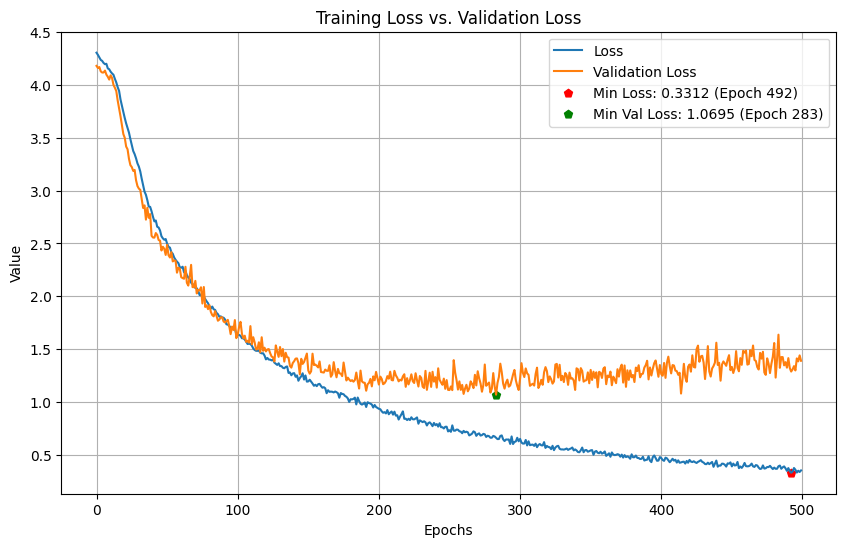

In [129]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

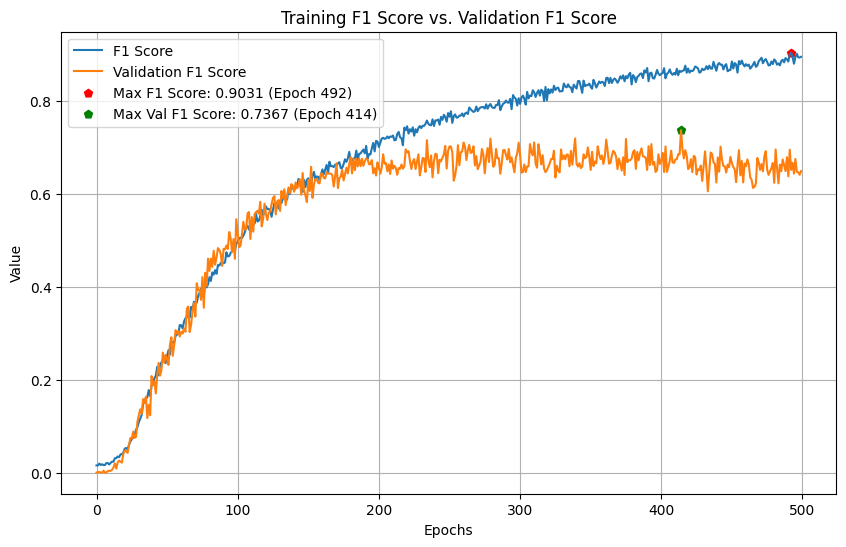

In [130]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [131]:
reconstructed_model = tf.keras.models.load_model("1 1D-CNN + 1 GRU Trial 722")

In [132]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 175)          349300    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 175)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 175)            0         
                                                                 
 lstm_1 (LSTM)               (None, 200)               300800    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 70)                14070     
                                                      

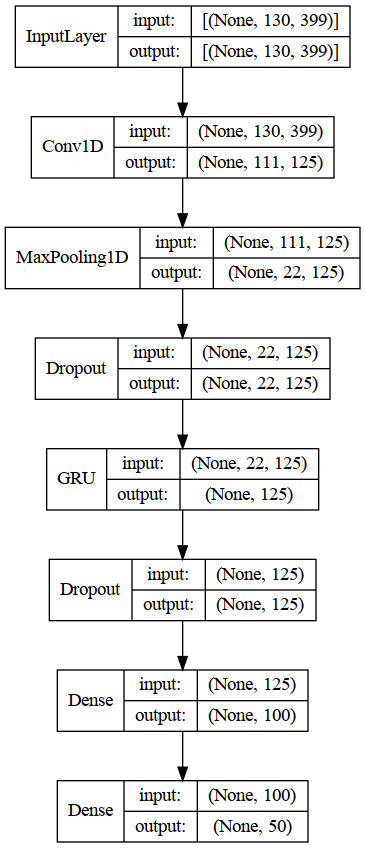

In [132]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

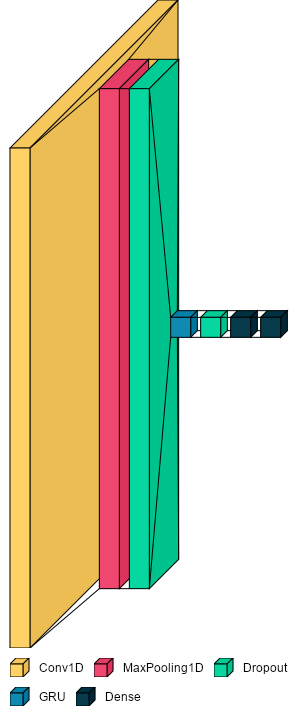

In [133]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [134]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.0799 - f1_score: 0.7367


[1.0799285173416138, 0.7366651892662048]

In [135]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 29ms/step - loss: 0.1594 - f1_score: 0.9734


[0.15944387018680573, 0.9733548164367676]

In [136]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.667     0.667     0.667         6
  BASKETBALL      0.818     0.900     0.857        10
         BEE      0.571     0.400     0.471        10
        BELT      1.000     0.750     0.857         4
        BITE      0.875     0.875     0.875         8
   BREAKFAST      0.571     0.667     0.615         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      1.000     0.500     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.417     0.833     0.556         6
      DECIDE      0.857     1.000     0.923         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      1.000     0.667     0.800         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.500    

In [137]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1D-CNN + 1 GRU Trial 722 Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [139]:
act_function = mish
model = Sequential()
model.add(
    Conv1D(filters=150,
           kernel_size=15,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=10))
model.add(Dropout(.55))
model.add(
    GRU(units=150,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.00043122634871936203)))
model.add(Dropout(.7))
model.add(Dense(units=110, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.00021882052801027956),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 116, 150)          897900    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 150)           0         
                                                                 
 gru_3 (GRU)                 (None, 150)               135900    
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 110)               16610     
                                                      

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 19s 564ms/step - loss: 4.1127 - f1_score: 0.0167 - val_loss: 4.0059 - val_f1_score: 0.0050
Epoch 2/500
28/28 [==============================] - 3s 108ms/step - loss: 4.0276 - f1_score: 0.0178 - val_loss: 4.0042 - val_f1_score: 7.5949e-04
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.0165 - f1_score: 0.0176

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 387ms/step - loss: 4.0165 - f1_score: 0.0176 - val_loss: 3.9943 - val_f1_score: 0.0068
Epoch 4/500
28/28 [==============================] - 3s 108ms/step - loss: 3.9990 - f1_score: 0.0204 - val_loss: 3.9883 - val_f1_score: 0.0062
Epoch 5/500
28/28 [==============================] - 3s 108ms/step - loss: 3.9896 - f1_score: 0.0201 - val_loss: 3.9784 - val_f1_score: 0.0029
Epoch 6/500
28/28 [==============================] - 3s 109ms/step - loss: 3.9726 - f1_score: 0.0205 - val_loss: 3.9640 - val_f1_score: 0.0030
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 3.9559 - f1_score: 0.0187

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 418ms/step - loss: 3.9559 - f1_score: 0.0187 - val_loss: 3.9340 - val_f1_score: 0.0102
Epoch 8/500
28/28 [==============================] - 3s 109ms/step - loss: 3.9284 - f1_score: 0.0225 - val_loss: 3.8911 - val_f1_score: 0.0043
Epoch 9/500
28/28 [==============================] - 3s 109ms/step - loss: 3.8864 - f1_score: 0.0202 - val_loss: 3.8323 - val_f1_score: 0.0037
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.8209 - f1_score: 0.0285

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 392ms/step - loss: 3.8209 - f1_score: 0.0285 - val_loss: 3.7343 - val_f1_score: 0.0110
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.7642 - f1_score: 0.0253

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 402ms/step - loss: 3.7642 - f1_score: 0.0253 - val_loss: 3.6630 - val_f1_score: 0.0118
Epoch 12/500
28/28 [==============================] - 3s 109ms/step - loss: 3.7303 - f1_score: 0.0308 - val_loss: 3.6080 - val_f1_score: 0.0096
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.6920 - f1_score: 0.0318

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 407ms/step - loss: 3.6920 - f1_score: 0.0318 - val_loss: 3.5726 - val_f1_score: 0.0160
Epoch 14/500
28/28 [==============================] - 3s 109ms/step - loss: 3.6680 - f1_score: 0.0265 - val_loss: 3.5801 - val_f1_score: 0.0102
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.6423 - f1_score: 0.0371

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 389ms/step - loss: 3.6423 - f1_score: 0.0371 - val_loss: 3.5282 - val_f1_score: 0.0189
Epoch 16/500
28/28 [==============================] - 3s 110ms/step - loss: 3.6303 - f1_score: 0.0325 - val_loss: 3.5151 - val_f1_score: 0.0132
Epoch 17/500
28/28 [==============================] - 3s 111ms/step - loss: 3.5954 - f1_score: 0.0317 - val_loss: 3.4811 - val_f1_score: 0.0161
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.5870 - f1_score: 0.0376

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 403ms/step - loss: 3.5870 - f1_score: 0.0376 - val_loss: 3.4945 - val_f1_score: 0.0435
Epoch 19/500
28/28 [==============================] - ETA: 0s - loss: 3.5789 - f1_score: 0.0444

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 451ms/step - loss: 3.5789 - f1_score: 0.0444 - val_loss: 3.4431 - val_f1_score: 0.0480
Epoch 20/500
28/28 [==============================] - 3s 110ms/step - loss: 3.5587 - f1_score: 0.0407 - val_loss: 3.4314 - val_f1_score: 0.0380
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 3.5329 - f1_score: 0.0425

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 430ms/step - loss: 3.5329 - f1_score: 0.0425 - val_loss: 3.4125 - val_f1_score: 0.0631
Epoch 22/500
28/28 [==============================] - 3s 109ms/step - loss: 3.5086 - f1_score: 0.0449 - val_loss: 3.3846 - val_f1_score: 0.0457
Epoch 23/500
28/28 [==============================] - 3s 109ms/step - loss: 3.4816 - f1_score: 0.0475 - val_loss: 3.3431 - val_f1_score: 0.0492
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 3.4648 - f1_score: 0.0592

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 404ms/step - loss: 3.4648 - f1_score: 0.0592 - val_loss: 3.3272 - val_f1_score: 0.0650
Epoch 25/500
28/28 [==============================] - 3s 109ms/step - loss: 3.4356 - f1_score: 0.0645 - val_loss: 3.2823 - val_f1_score: 0.0644
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 3.3955 - f1_score: 0.0591

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 408ms/step - loss: 3.3955 - f1_score: 0.0591 - val_loss: 3.2124 - val_f1_score: 0.0721
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 3.3755 - f1_score: 0.0661

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 365ms/step - loss: 3.3755 - f1_score: 0.0661 - val_loss: 3.1721 - val_f1_score: 0.0735
Epoch 28/500
28/28 [==============================] - ETA: 0s - loss: 3.3596 - f1_score: 0.0634

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 400ms/step - loss: 3.3596 - f1_score: 0.0634 - val_loss: 3.1643 - val_f1_score: 0.0747
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 3.3266 - f1_score: 0.0745

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 413ms/step - loss: 3.3266 - f1_score: 0.0745 - val_loss: 3.1435 - val_f1_score: 0.1106
Epoch 30/500
28/28 [==============================] - 3s 109ms/step - loss: 3.3166 - f1_score: 0.0709 - val_loss: 3.1439 - val_f1_score: 0.1035
Epoch 31/500
28/28 [==============================] - 3s 108ms/step - loss: 3.2964 - f1_score: 0.0842 - val_loss: 3.0907 - val_f1_score: 0.0844
Epoch 32/500
28/28 [==============================] - 3s 110ms/step - loss: 3.2686 - f1_score: 0.0869 - val_loss: 3.0398 - val_f1_score: 0.1034
Epoch 33/500
28/28 [==============================] - 3s 109ms/step - loss: 3.2458 - f1_score: 0.0832 - val_loss: 3.0323 - val_f1_score: 0.1075
Epoch 34/500
28/28 [==============================] - 3s 109ms/step - loss: 3.2305 - f1_score: 0.0817 - val_loss: 3.0082 - val_f1_score: 0.1021
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 3.2118 - f1_score: 0.0895

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 402ms/step - loss: 3.2118 - f1_score: 0.0895 - val_loss: 2.9629 - val_f1_score: 0.1287
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 3.1710 - f1_score: 0.0936

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 375ms/step - loss: 3.1710 - f1_score: 0.0936 - val_loss: 2.9522 - val_f1_score: 0.1326
Epoch 37/500
28/28 [==============================] - 3s 108ms/step - loss: 3.1480 - f1_score: 0.0999 - val_loss: 3.0241 - val_f1_score: 0.0776
Epoch 38/500
28/28 [==============================] - 3s 109ms/step - loss: 3.1508 - f1_score: 0.0883 - val_loss: 2.9185 - val_f1_score: 0.1011
Epoch 39/500
28/28 [==============================] - 3s 109ms/step - loss: 3.1205 - f1_score: 0.1089 - val_loss: 2.8779 - val_f1_score: 0.0904
Epoch 40/500
28/28 [==============================] - ETA: 0s - loss: 3.0811 - f1_score: 0.1058

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 417ms/step - loss: 3.0811 - f1_score: 0.1058 - val_loss: 2.9454 - val_f1_score: 0.1330
Epoch 41/500
28/28 [==============================] - 3s 109ms/step - loss: 3.0747 - f1_score: 0.1034 - val_loss: 2.8788 - val_f1_score: 0.0895
Epoch 42/500
28/28 [==============================] - 3s 110ms/step - loss: 3.0571 - f1_score: 0.1168 - val_loss: 2.8148 - val_f1_score: 0.1191
Epoch 43/500
28/28 [==============================] - 3s 109ms/step - loss: 3.0350 - f1_score: 0.1157 - val_loss: 2.8419 - val_f1_score: 0.1223
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 3.0258 - f1_score: 0.1139

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 454ms/step - loss: 3.0258 - f1_score: 0.1139 - val_loss: 2.7739 - val_f1_score: 0.1399
Epoch 45/500
28/28 [==============================] - 3s 109ms/step - loss: 2.9918 - f1_score: 0.1169 - val_loss: 2.7721 - val_f1_score: 0.1117
Epoch 46/500
28/28 [==============================] - 3s 110ms/step - loss: 2.9657 - f1_score: 0.1286 - val_loss: 2.7517 - val_f1_score: 0.1145
Epoch 47/500
28/28 [==============================] - 3s 109ms/step - loss: 2.9689 - f1_score: 0.1264 - val_loss: 2.7360 - val_f1_score: 0.1308
Epoch 48/500
28/28 [==============================] - 3s 111ms/step - loss: 2.9504 - f1_score: 0.1287 - val_loss: 2.7433 - val_f1_score: 0.1250
Epoch 49/500
28/28 [==============================] - 3s 111ms/step - loss: 2.9102 - f1_score: 0.1422 - val_loss: 2.7691 - val_f1_score: 0.1319
Epoch 50/500
28/28 [==============================] - 3s 111ms/step - loss: 2.9185 - f1_score: 0.1448 - val_loss: 2.7090 - val_f1_score: 0.1337
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 455ms/step - loss: 2.8460 - f1_score: 0.1495 - val_loss: 2.6827 - val_f1_score: 0.1615
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.8669 - f1_score: 0.1430

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 398ms/step - loss: 2.8669 - f1_score: 0.1430 - val_loss: 2.6681 - val_f1_score: 0.1624
Epoch 54/500
28/28 [==============================] - 3s 109ms/step - loss: 2.8697 - f1_score: 0.1407 - val_loss: 2.7197 - val_f1_score: 0.1464
Epoch 55/500
28/28 [==============================] - 3s 109ms/step - loss: 2.8132 - f1_score: 0.1654 - val_loss: 2.6210 - val_f1_score: 0.1364
Epoch 56/500
28/28 [==============================] - 3s 109ms/step - loss: 2.8463 - f1_score: 0.1402 - val_loss: 2.7557 - val_f1_score: 0.1307
Epoch 57/500
28/28 [==============================] - 3s 109ms/step - loss: 2.8332 - f1_score: 0.1547 - val_loss: 2.6290 - val_f1_score: 0.1475
Epoch 58/500
28/28 [==============================] - ETA: 0s - loss: 2.7914 - f1_score: 0.1518

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 416ms/step - loss: 2.7914 - f1_score: 0.1518 - val_loss: 2.5900 - val_f1_score: 0.1851
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 2.8070 - f1_score: 0.1496

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 364ms/step - loss: 2.8070 - f1_score: 0.1496 - val_loss: 2.6407 - val_f1_score: 0.1854
Epoch 60/500
28/28 [==============================] - 3s 109ms/step - loss: 2.7796 - f1_score: 0.1654 - val_loss: 2.6543 - val_f1_score: 0.1341
Epoch 61/500
28/28 [==============================] - 3s 109ms/step - loss: 2.7716 - f1_score: 0.1539 - val_loss: 2.5889 - val_f1_score: 0.1736
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 2.7760 - f1_score: 0.1583

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 37s 1s/step - loss: 2.7760 - f1_score: 0.1583 - val_loss: 2.6067 - val_f1_score: 0.1869
Epoch 63/500
28/28 [==============================] - 3s 109ms/step - loss: 2.7650 - f1_score: 0.1632 - val_loss: 2.6015 - val_f1_score: 0.1711
Epoch 64/500
28/28 [==============================] - 3s 109ms/step - loss: 2.7644 - f1_score: 0.1668 - val_loss: 2.6193 - val_f1_score: 0.1747
Epoch 65/500
28/28 [==============================] - ETA: 0s - loss: 2.7016 - f1_score: 0.1614

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 444ms/step - loss: 2.7016 - f1_score: 0.1614 - val_loss: 2.6571 - val_f1_score: 0.1974
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 2.6931 - f1_score: 0.1801

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 10s 380ms/step - loss: 2.6931 - f1_score: 0.1801 - val_loss: 2.5715 - val_f1_score: 0.2311
Epoch 67/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6985 - f1_score: 0.1762 - val_loss: 2.5604 - val_f1_score: 0.2080
Epoch 68/500
28/28 [==============================] - 3s 109ms/step - loss: 2.7252 - f1_score: 0.1761 - val_loss: 2.6227 - val_f1_score: 0.1945
Epoch 69/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6942 - f1_score: 0.1717 - val_loss: 2.6065 - val_f1_score: 0.1964
Epoch 70/500
28/28 [==============================] - 3s 110ms/step - loss: 2.6854 - f1_score: 0.1877 - val_loss: 2.5937 - val_f1_score: 0.1978
Epoch 71/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6869 - f1_score: 0.1774 - val_loss: 2.4949 - val_f1_score: 0.2292
Epoch 72/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6715 - f1_score: 0.1840 - val_loss: 2.5820 - val_f1_score: 0.1918
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 406ms/step - loss: 2.5902 - f1_score: 0.1996 - val_loss: 2.5271 - val_f1_score: 0.2436
Epoch 79/500
28/28 [==============================] - 3s 110ms/step - loss: 2.6023 - f1_score: 0.1929 - val_loss: 2.4520 - val_f1_score: 0.2012
Epoch 80/500
28/28 [==============================] - 3s 110ms/step - loss: 2.5988 - f1_score: 0.1929 - val_loss: 2.5157 - val_f1_score: 0.2229
Epoch 81/500
28/28 [==============================] - 3s 109ms/step - loss: 2.6172 - f1_score: 0.1945 - val_loss: 2.4968 - val_f1_score: 0.2113
Epoch 82/500
28/28 [==============================] - ETA: 0s - loss: 2.5616 - f1_score: 0.2085

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 29s 1s/step - loss: 2.5616 - f1_score: 0.2085 - val_loss: 2.4554 - val_f1_score: 0.2457
Epoch 83/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5784 - f1_score: 0.1989 - val_loss: 2.5495 - val_f1_score: 0.2184
Epoch 84/500
28/28 [==============================] - 3s 108ms/step - loss: 2.5316 - f1_score: 0.2155 - val_loss: 2.4410 - val_f1_score: 0.2064
Epoch 85/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5261 - f1_score: 0.2100 - val_loss: 2.4569 - val_f1_score: 0.2399
Epoch 86/500
28/28 [==============================] - ETA: 0s - loss: 2.5075 - f1_score: 0.2163

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 467ms/step - loss: 2.5075 - f1_score: 0.2163 - val_loss: 2.4110 - val_f1_score: 0.2499
Epoch 87/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5263 - f1_score: 0.2182 - val_loss: 2.4244 - val_f1_score: 0.2285
Epoch 88/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5087 - f1_score: 0.2158 - val_loss: 2.4230 - val_f1_score: 0.2447
Epoch 89/500
28/28 [==============================] - 3s 109ms/step - loss: 2.5042 - f1_score: 0.2218 - val_loss: 2.4817 - val_f1_score: 0.2413
Epoch 90/500
28/28 [==============================] - 3s 109ms/step - loss: 2.4886 - f1_score: 0.2050 - val_loss: 2.4554 - val_f1_score: 0.2189
Epoch 91/500
28/28 [==============================] - ETA: 0s - loss: 2.4818 - f1_score: 0.2332

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 454ms/step - loss: 2.4818 - f1_score: 0.2332 - val_loss: 2.4213 - val_f1_score: 0.2679
Epoch 92/500
28/28 [==============================] - 3s 109ms/step - loss: 2.4996 - f1_score: 0.2169 - val_loss: 2.4131 - val_f1_score: 0.2429
Epoch 93/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4880 - f1_score: 0.2185 - val_loss: 2.3868 - val_f1_score: 0.2678
Epoch 94/500
28/28 [==============================] - 3s 110ms/step - loss: 2.5056 - f1_score: 0.2129 - val_loss: 2.4813 - val_f1_score: 0.2207
Epoch 95/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4757 - f1_score: 0.2263 - val_loss: 2.4676 - val_f1_score: 0.2433
Epoch 96/500
28/28 [==============================] - 3s 109ms/step - loss: 2.4390 - f1_score: 0.2366 - val_loss: 2.3874 - val_f1_score: 0.2500
Epoch 97/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4522 - f1_score: 0.2375 - val_loss: 2.3751 - val_f1_score: 0.2281
Epoc

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 404ms/step - loss: 2.4157 - f1_score: 0.2446 - val_loss: 2.3670 - val_f1_score: 0.2851
Epoch 101/500
28/28 [==============================] - 3s 109ms/step - loss: 2.4243 - f1_score: 0.2445 - val_loss: 2.4001 - val_f1_score: 0.2399
Epoch 102/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4089 - f1_score: 0.2517 - val_loss: 2.4066 - val_f1_score: 0.2724
Epoch 103/500
28/28 [==============================] - 3s 112ms/step - loss: 2.3895 - f1_score: 0.2471 - val_loss: 2.3386 - val_f1_score: 0.2825
Epoch 104/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4160 - f1_score: 0.2380 - val_loss: 2.4869 - val_f1_score: 0.2742
Epoch 105/500
28/28 [==============================] - 3s 110ms/step - loss: 2.4041 - f1_score: 0.2596 - val_loss: 2.4470 - val_f1_score: 0.2530
Epoch 106/500
28/28 [==============================] - ETA: 0s - loss: 2.3875 - f1_score: 0.2519

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 14s 528ms/step - loss: 2.3875 - f1_score: 0.2519 - val_loss: 2.3649 - val_f1_score: 0.2953
Epoch 107/500
28/28 [==============================] - 3s 109ms/step - loss: 2.3937 - f1_score: 0.2546 - val_loss: 2.3230 - val_f1_score: 0.2722
Epoch 108/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3791 - f1_score: 0.2591 - val_loss: 2.3415 - val_f1_score: 0.2607
Epoch 109/500
28/28 [==============================] - ETA: 0s - loss: 2.3691 - f1_score: 0.2486

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 415ms/step - loss: 2.3691 - f1_score: 0.2486 - val_loss: 2.3415 - val_f1_score: 0.3128
Epoch 110/500
28/28 [==============================] - 3s 109ms/step - loss: 2.3913 - f1_score: 0.2637 - val_loss: 2.5390 - val_f1_score: 0.2705
Epoch 111/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3725 - f1_score: 0.2464 - val_loss: 2.4235 - val_f1_score: 0.2641
Epoch 112/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3678 - f1_score: 0.2616 - val_loss: 2.3652 - val_f1_score: 0.2547
Epoch 113/500
28/28 [==============================] - 3s 111ms/step - loss: 2.3410 - f1_score: 0.2721 - val_loss: 2.3663 - val_f1_score: 0.2509
Epoch 114/500
28/28 [==============================] - 3s 113ms/step - loss: 2.3327 - f1_score: 0.2553 - val_loss: 2.3481 - val_f1_score: 0.2860
Epoch 115/500
28/28 [==============================] - 3s 110ms/step - loss: 2.3278 - f1_score: 0.2644 - val_loss: 2.3594 - val_f1_score: 0.259

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 436ms/step - loss: 2.2705 - f1_score: 0.2772 - val_loss: 2.2636 - val_f1_score: 0.3254
Epoch 123/500
28/28 [==============================] - 3s 110ms/step - loss: 2.2797 - f1_score: 0.2945 - val_loss: 2.3721 - val_f1_score: 0.2853
Epoch 124/500
28/28 [==============================] - 3s 113ms/step - loss: 2.2889 - f1_score: 0.2789 - val_loss: 2.2715 - val_f1_score: 0.2876
Epoch 125/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2662 - f1_score: 0.2939 - val_loss: 2.2990 - val_f1_score: 0.3080
Epoch 126/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2830 - f1_score: 0.2693 - val_loss: 2.4100 - val_f1_score: 0.2890
Epoch 127/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2625 - f1_score: 0.2738 - val_loss: 2.2817 - val_f1_score: 0.3010
Epoch 128/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2467 - f1_score: 0.2848 - val_loss: 2.5058 - val_f1_score: 0.235

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 460ms/step - loss: 2.2130 - f1_score: 0.2972 - val_loss: 2.3401 - val_f1_score: 0.3254
Epoch 136/500
28/28 [==============================] - 3s 110ms/step - loss: 2.2296 - f1_score: 0.3011 - val_loss: 2.2648 - val_f1_score: 0.2824
Epoch 137/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1892 - f1_score: 0.3063 - val_loss: 2.3671 - val_f1_score: 0.2900
Epoch 138/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1894 - f1_score: 0.3057 - val_loss: 2.2504 - val_f1_score: 0.3071
Epoch 139/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2009 - f1_score: 0.2948 - val_loss: 2.2474 - val_f1_score: 0.3039
Epoch 140/500
28/28 [==============================] - 3s 111ms/step - loss: 2.2106 - f1_score: 0.2999 - val_loss: 2.3699 - val_f1_score: 0.2782
Epoch 141/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1921 - f1_score: 0.3156 - val_loss: 2.3397 - val_f1_score: 0.308

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 460ms/step - loss: 2.1663 - f1_score: 0.3094 - val_loss: 2.2281 - val_f1_score: 0.3271
Epoch 149/500
28/28 [==============================] - 3s 109ms/step - loss: 2.1690 - f1_score: 0.3122 - val_loss: 2.4263 - val_f1_score: 0.2921
Epoch 150/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1278 - f1_score: 0.3299 - val_loss: 2.2956 - val_f1_score: 0.3067
Epoch 151/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1927 - f1_score: 0.3082 - val_loss: 2.3505 - val_f1_score: 0.2963
Epoch 152/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1257 - f1_score: 0.3164 - val_loss: 2.2741 - val_f1_score: 0.2957
Epoch 153/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1687 - f1_score: 0.3204 - val_loss: 2.4462 - val_f1_score: 0.3120
Epoch 154/500
28/28 [==============================] - 3s 110ms/step - loss: 2.1327 - f1_score: 0.3088 - val_loss: 2.3469 - val_f1_score: 0.304

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 411ms/step - loss: 2.1261 - f1_score: 0.3262 - val_loss: 2.2020 - val_f1_score: 0.3414
Epoch 159/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1378 - f1_score: 0.3233 - val_loss: 2.2772 - val_f1_score: 0.3294
Epoch 160/500
28/28 [==============================] - 3s 112ms/step - loss: 2.1164 - f1_score: 0.3302 - val_loss: 2.2250 - val_f1_score: 0.3371
Epoch 161/500
28/28 [==============================] - 3s 112ms/step - loss: 2.0961 - f1_score: 0.3295 - val_loss: 2.2953 - val_f1_score: 0.3001
Epoch 162/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1385 - f1_score: 0.3197 - val_loss: 2.2731 - val_f1_score: 0.3215
Epoch 163/500
28/28 [==============================] - 3s 111ms/step - loss: 2.1113 - f1_score: 0.3241 - val_loss: 2.2055 - val_f1_score: 0.3396
Epoch 164/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0672 - f1_score: 0.3331 - val_loss: 2.3022 - val_f1_score: 0.308

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 428ms/step - loss: 2.0542 - f1_score: 0.3460 - val_loss: 2.2318 - val_f1_score: 0.3463
Epoch 179/500
28/28 [==============================] - ETA: 0s - loss: 2.0648 - f1_score: 0.3408

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 428ms/step - loss: 2.0648 - f1_score: 0.3408 - val_loss: 2.1726 - val_f1_score: 0.3472
Epoch 180/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0370 - f1_score: 0.3366 - val_loss: 2.3718 - val_f1_score: 0.2968
Epoch 181/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0509 - f1_score: 0.3429 - val_loss: 2.2333 - val_f1_score: 0.3163
Epoch 182/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0155 - f1_score: 0.3682 - val_loss: 2.2429 - val_f1_score: 0.3129
Epoch 183/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0319 - f1_score: 0.3526 - val_loss: 2.2832 - val_f1_score: 0.3246
Epoch 184/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0625 - f1_score: 0.3464 - val_loss: 2.3292 - val_f1_score: 0.3112
Epoch 185/500
28/28 [==============================] - 3s 111ms/step - loss: 2.0407 - f1_score: 0.3502 - val_loss: 2.2923 - val_f1_score: 0.339

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 430ms/step - loss: 2.0517 - f1_score: 0.3563 - val_loss: 2.2263 - val_f1_score: 0.3490
Epoch 187/500
28/28 [==============================] - ETA: 0s - loss: 2.0374 - f1_score: 0.3541

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 11s 402ms/step - loss: 2.0374 - f1_score: 0.3541 - val_loss: 2.1779 - val_f1_score: 0.3543
Epoch 188/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0405 - f1_score: 0.3357 - val_loss: 2.3029 - val_f1_score: 0.3130
Epoch 189/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0221 - f1_score: 0.3682 - val_loss: 2.2412 - val_f1_score: 0.3226
Epoch 190/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0333 - f1_score: 0.3545 - val_loss: 2.2575 - val_f1_score: 0.3335
Epoch 191/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0184 - f1_score: 0.3624 - val_loss: 2.2037 - val_f1_score: 0.3466
Epoch 192/500
28/28 [==============================] - 3s 110ms/step - loss: 2.0166 - f1_score: 0.3450 - val_loss: 2.2747 - val_f1_score: 0.3242
Epoch 193/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9978 - f1_score: 0.3540 - val_loss: 2.1972 - val_f1_score: 0.297

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 493ms/step - loss: 1.9957 - f1_score: 0.3504 - val_loss: 2.2116 - val_f1_score: 0.3643
Epoch 199/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9940 - f1_score: 0.3700 - val_loss: 2.2181 - val_f1_score: 0.3187
Epoch 200/500
28/28 [==============================] - 3s 113ms/step - loss: 1.9822 - f1_score: 0.3467 - val_loss: 2.2438 - val_f1_score: 0.3288
Epoch 201/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9915 - f1_score: 0.3653 - val_loss: 2.2660 - val_f1_score: 0.3438
Epoch 202/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9836 - f1_score: 0.3591 - val_loss: 2.2793 - val_f1_score: 0.3169
Epoch 203/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9808 - f1_score: 0.3668 - val_loss: 2.2726 - val_f1_score: 0.3210
Epoch 204/500
28/28 [==============================] - 3s 114ms/step - loss: 1.9564 - f1_score: 0.3695 - val_loss: 2.3417 - val_f1_score: 0.328

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 450ms/step - loss: 1.9285 - f1_score: 0.3708 - val_loss: 2.1482 - val_f1_score: 0.3844
Epoch 226/500
28/28 [==============================] - 3s 110ms/step - loss: 1.9336 - f1_score: 0.3744 - val_loss: 2.2425 - val_f1_score: 0.3284
Epoch 227/500
28/28 [==============================] - 3s 111ms/step - loss: 1.8892 - f1_score: 0.3907 - val_loss: 2.3571 - val_f1_score: 0.3102
Epoch 228/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9000 - f1_score: 0.3908 - val_loss: 2.4205 - val_f1_score: 0.3022
Epoch 229/500
28/28 [==============================] - 3s 112ms/step - loss: 1.9007 - f1_score: 0.3852 - val_loss: 2.2642 - val_f1_score: 0.3301
Epoch 230/500
28/28 [==============================] - 3s 111ms/step - loss: 1.9013 - f1_score: 0.3923 - val_loss: 2.3165 - val_f1_score: 0.3373
Epoch 231/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8866 - f1_score: 0.3980 - val_loss: 2.1943 - val_f1_score: 0.350

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 473ms/step - loss: 1.7604 - f1_score: 0.4278 - val_loss: 2.1739 - val_f1_score: 0.4088
Epoch 289/500
28/28 [==============================] - 3s 110ms/step - loss: 1.7776 - f1_score: 0.4254 - val_loss: 2.2835 - val_f1_score: 0.3763
Epoch 290/500
28/28 [==============================] - 3s 111ms/step - loss: 1.7697 - f1_score: 0.4230 - val_loss: 2.2609 - val_f1_score: 0.3523
Epoch 291/500
28/28 [==============================] - 3s 115ms/step - loss: 1.7754 - f1_score: 0.4211 - val_loss: 2.1870 - val_f1_score: 0.3601
Epoch 292/500
28/28 [==============================] - 3s 111ms/step - loss: 1.7638 - f1_score: 0.4289 - val_loss: 2.1902 - val_f1_score: 0.3642
Epoch 293/500
28/28 [==============================] - 3s 112ms/step - loss: 1.8207 - f1_score: 0.4165 - val_loss: 2.2951 - val_f1_score: 0.3721
Epoch 294/500
28/28 [==============================] - 3s 111ms/step - loss: 1.7534 - f1_score: 0.4371 - val_loss: 2.1006 - val_f1_score: 0.374

28/28 [==============================] - 3s 113ms/step - loss: 1.5921 - f1_score: 0.4811 - val_loss: 2.2293 - val_f1_score: 0.3927
Epoch 401/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5575 - f1_score: 0.4991 - val_loss: 2.0896 - val_f1_score: 0.3714
Epoch 402/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5905 - f1_score: 0.4933 - val_loss: 2.3254 - val_f1_score: 0.3548
Epoch 403/500
28/28 [==============================] - 3s 112ms/step - loss: 1.6124 - f1_score: 0.4847 - val_loss: 2.0844 - val_f1_score: 0.4044
Epoch 404/500
28/28 [==============================] - 3s 114ms/step - loss: 1.5779 - f1_score: 0.4921 - val_loss: 2.2675 - val_f1_score: 0.3851
Epoch 405/500
28/28 [==============================] - 3s 113ms/step - loss: 1.5502 - f1_score: 0.4973 - val_loss: 2.2357 - val_f1_score: 0.3986
Epoch 406/500
28/28 [==============================] - 3s 114ms/step - loss: 1.5698 - f1_score: 0.4958 - val_loss: 2.2432 - val_f1_score: 0.3666

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 13s 483ms/step - loss: 1.5898 - f1_score: 0.4721 - val_loss: 2.3276 - val_f1_score: 0.4172
Epoch 423/500
28/28 [==============================] - 3s 111ms/step - loss: 1.5694 - f1_score: 0.4912 - val_loss: 2.2771 - val_f1_score: 0.3510
Epoch 424/500
28/28 [==============================] - 3s 114ms/step - loss: 1.5679 - f1_score: 0.5005 - val_loss: 2.2250 - val_f1_score: 0.3966
Epoch 425/500
28/28 [==============================] - 3s 113ms/step - loss: 1.5719 - f1_score: 0.4847 - val_loss: 2.1908 - val_f1_score: 0.3929
Epoch 426/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5756 - f1_score: 0.5002 - val_loss: 2.2376 - val_f1_score: 0.3784
Epoch 427/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5458 - f1_score: 0.5023 - val_loss: 2.2383 - val_f1_score: 0.3879
Epoch 428/500
28/28 [==============================] - 3s 112ms/step - loss: 1.5624 - f1_score: 0.4770 - val_loss: 2.3522 - val_f1_score: 0.368

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 14s 515ms/step - loss: 1.4675 - f1_score: 0.5308 - val_loss: 2.1723 - val_f1_score: 0.4207
Epoch 495/500
28/28 [==============================] - 3s 110ms/step - loss: 1.4943 - f1_score: 0.5239 - val_loss: 2.2169 - val_f1_score: 0.3968
Epoch 496/500
28/28 [==============================] - 3s 111ms/step - loss: 1.5582 - f1_score: 0.5036 - val_loss: 2.2740 - val_f1_score: 0.3966
Epoch 497/500
28/28 [==============================] - 3s 111ms/step - loss: 1.4795 - f1_score: 0.5206 - val_loss: 2.2818 - val_f1_score: 0.3711
Epoch 498/500
28/28 [==============================] - 3s 112ms/step - loss: 1.4720 - f1_score: 0.5245 - val_loss: 2.5083 - val_f1_score: 0.3613
Epoch 499/500
28/28 [==============================] - ETA: 0s - loss: 1.4783 - f1_score: 0.5323

INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


INFO:tensorflow:Assets written to: 1 1D-CNN + 1 GRU Trial 722 Mish/assets


28/28 [==============================] - 12s 436ms/step - loss: 1.4783 - f1_score: 0.5323 - val_loss: 2.1568 - val_f1_score: 0.4246
Epoch 500/500
28/28 [==============================] - 3s 110ms/step - loss: 1.5468 - f1_score: 0.5115 - val_loss: 2.2231 - val_f1_score: 0.4211


In [141]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1D-CNN + 1 GRU Trial 722 Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [142]:
hist_df = pd.read_csv('1 1D-CNN + 1 GRU Trial 722 Mish/history.csv',
                      index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  1.558240  0.503602  2.274049      0.396593
496  1.479465  0.520557  2.281791      0.371081
497  1.471968  0.524543  2.508329      0.361290
498  1.478252  0.532272  2.156772      0.424551
499  1.546807  0.511469  2.223134      0.421123

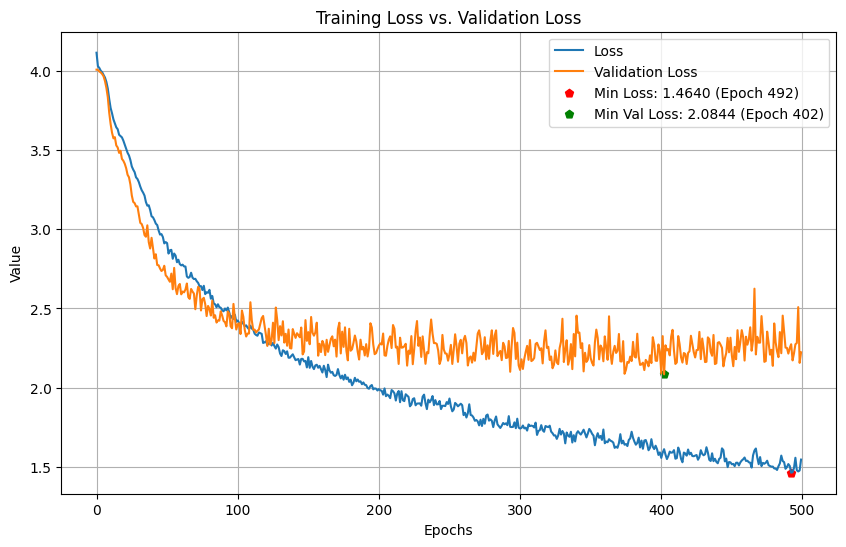

In [143]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

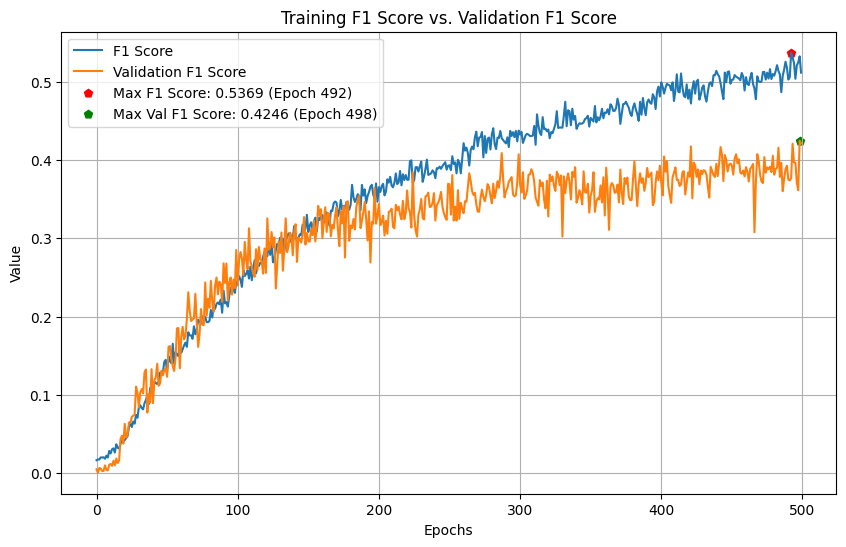

In [144]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [145]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

         AXE      0.000     0.000     0.000         8
    BACKPACK      0.000     0.000     0.000         6
  BASKETBALL      0.000     0.000     0.000        10
         BEE      0.000     0.000     0.000        10
        BELT      0.000     0.000     0.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.000     0.000     0.000         8
   CHRISTMAS      0.000     0.000     0.000         6
    CONFUSED      0.000     0.000     0.000         6
        DARK      0.000     0.000     0.000         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.000     0.000     0.000         6
      DEMAND      0.000     0.000     0.000         8
     DEVELOP      0.021     0.667     0.040         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.000    

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
reconstructed_model = tf.keras.models.load_model(
    "1 1D-CNN + 1 GRU Trial 722 Mish")

In [147]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 116, 150)          897900    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 150)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 11, 150)           0         
                                                                 
 gru_3 (GRU)                 (None, 150)               135900    
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 110)               16610     
                                                      

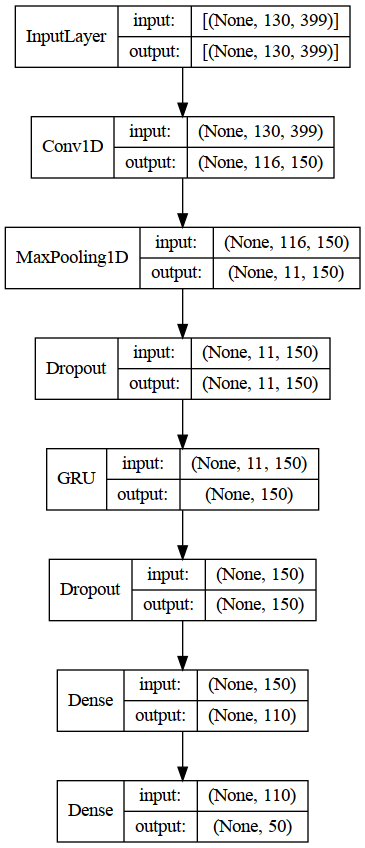

In [148]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

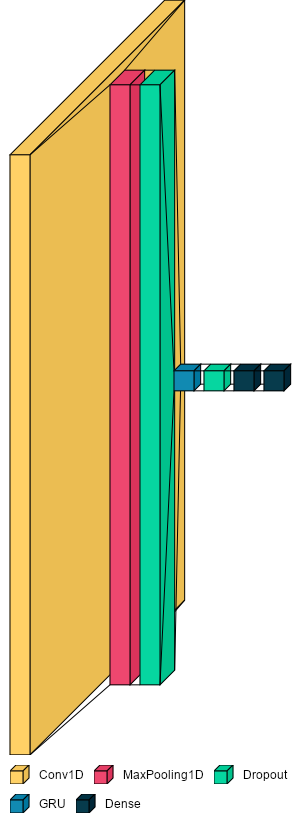

In [149]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [150]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 2.1568 - f1_score: 0.4246


[2.156771421432495, 0.4245505928993225]

In [151]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 16ms/step - loss: 0.9273 - f1_score: 0.7344


[0.9273212552070618, 0.734393835067749]

In [152]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

         AXE      0.333     0.125     0.182         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      1.000     0.600     0.750        10
         BEE      0.250     0.100     0.143        10
        BELT      0.800     1.000     0.889         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.500     0.333     0.400         6
      CANCER      0.417     0.625     0.500         8
   CHRISTMAS      0.545     1.000     0.706         6
    CONFUSED      0.667     0.333     0.444         6
        DARK      0.600     0.750     0.667         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.500     0.500     0.500         6
      DEMAND      0.571     0.500     0.533         8
     DEVELOP      0.286     0.333     0.308         6
      DINNER      1.000     0.375     0.545         8
         DOG      0.200    

## Hyperparameter Tuning 2 1D CNN Layer + 1 GRU

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_591901/3109640001.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='elu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[3, 4, 5, 6, 7, 8, 9, 10],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[3, 4, 5, 6, 7, 8, 9, 10],
                default=5,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_2',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=5,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            GRU(units=hp.Int('units_1',
                             min_value=50,
                             max_value=200,
                             step=25,
                             default=100),
                return_sequences=False,
                kernel_regularizer=regularizers.l2(
                    hp.Float('regularizer',
                             min_value=1e-4,
                             max_value=1e-2,
                             sampling='LOG',
                             default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='2_1D_CNN+1_GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_1D_CNN+1_GRU/tuner0.json


In [261]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
dense_activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
filters_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_va

In [122]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [124]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 711 Complete [00h 06m 56s]
val_f1_score: 0.6260823607444763

Best val_f1_score So Far: 0.7622158825397491
Total elapsed time: 10h 39m 49s
INFO:tensorflow:Oracle triggered exit


In [125]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [126]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 100)          359200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 125)           0         
                                                                 
 gru (GRU)                   (None, 75)                4

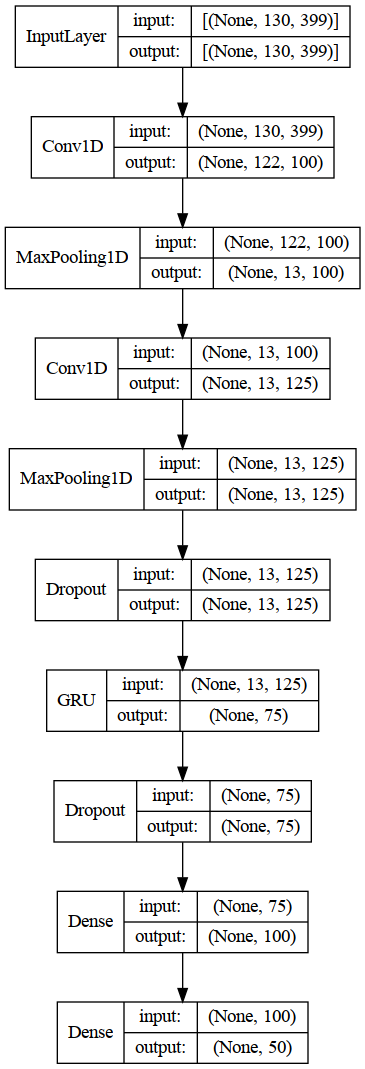

In [127]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

In [128]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_1D_CNN+1_GRU
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0705 summary
Hyperparameters:
dense_activation: selu
filters_1: 100
kernel_1: 9
pool_1: 9
filters_2: 125
kernel_2: 1
pool_2: 1
dropout_1: 0.7000000000000001
units_1: 75
regularizer: 0.0023285010665210285
dropout_2: 0.5
units_2: 100
learning_rate: 0.0003730278430367326
tuner/epochs: 300
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7622158825397491

Trial 0700 summary
Hyperparameters:
dense_activation: mish
filters_1: 200
kernel_1: 4
pool_1: 8
filters_2: 200
kernel_2: 2
pool_2: 1
dropout_1: 0.30000000000000004
units_1: 175
regularizer: 0.001308287664940752
dropout_2: 0.6000000000000001
units_2: 100
learning_rate: 0.00016060165691337782
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0698
Score: 0.7525536119937897

Trial 0584 summary
Hyperparameters:
dense_acti

In [129]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 63ms/step - loss: 1.0408 - f1_score: 0.7682


In [130]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 10ms/step - loss: 0.2381 - f1_score: 0.9420


In [131]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.714     1.000     0.833        10
         BEE      1.000     0.600     0.750        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      1.000     1.000     1.000         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.833     0.833     0.833         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.444     0.667     0.533         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.857     1.000     0.923         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.444     

In [132]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [133]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [148]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 8s 91ms/step - loss: 4.6899 - f1_score: 0.0200 - val_loss: 4.3610 - val_f1_score: 0.0033
Epoch 2/500
28/28 [==============================] - 2s 60ms/step - loss: 4.5943 - f1_score: 0.0226 - val_loss: 4.3263 - val_f1_score: 0.0022
Epoch 3/500
28/28 [==============================] - 2s 58ms/step - loss: 4.5703 - f1_score: 0.0168 - val_loss: 4.2791 - val_f1_score: 7.2727e-04
Epoch 4/500
28/28 [==============================] - 2s 58ms/step - loss: 4.4969 - f1_score: 0.0180 - val_loss: 4.2815 - val_f1_score: 0.0012
Epoch 5/500
28/28 [==============================] - 2s 62ms/step - loss: 4.4082 - f1_score: 0.0187 - val_loss: 4.1996 - val_f1_score: 0.0057
Epoch 6/500
28/28 [==============================] - 2s 60ms/step - loss: 4.3963 - f1_score: 0.0204 - val_loss: 4.2216 - val_f1_score: 0.0034
Epoch 7/500
28/28 [==============================] - 2s 60ms/step - loss: 4.3782 - f1_score: 0.0181 - val_loss

28/28 [==============================] - 2s 63ms/step - loss: 2.2681 - f1_score: 0.3240 - val_loss: 2.1951 - val_f1_score: 0.3618
Epoch 59/500
28/28 [==============================] - 2s 74ms/step - loss: 2.2777 - f1_score: 0.3290 - val_loss: 2.0963 - val_f1_score: 0.3826
Epoch 60/500
28/28 [==============================] - 2s 64ms/step - loss: 2.2039 - f1_score: 0.3446 - val_loss: 2.1352 - val_f1_score: 0.3796
Epoch 61/500
28/28 [==============================] - 2s 63ms/step - loss: 2.2003 - f1_score: 0.3512 - val_loss: 2.0214 - val_f1_score: 0.4213
Epoch 62/500
28/28 [==============================] - 2s 68ms/step - loss: 2.1691 - f1_score: 0.3527 - val_loss: 2.0430 - val_f1_score: 0.4027
Epoch 63/500
28/28 [==============================] - 2s 64ms/step - loss: 2.1384 - f1_score: 0.3755 - val_loss: 2.0193 - val_f1_score: 0.4318
Epoch 64/500
28/28 [==============================] - 2s 64ms/step - loss: 2.1130 - f1_score: 0.3826 - val_loss: 2.0020 - val_f1_score: 0.4065
Epoch 65/500

Epoch 172/500
28/28 [==============================] - 2s 75ms/step - loss: 0.8426 - f1_score: 0.7478 - val_loss: 1.3826 - val_f1_score: 0.6504
Epoch 173/500
28/28 [==============================] - 2s 76ms/step - loss: 0.8561 - f1_score: 0.7366 - val_loss: 1.0981 - val_f1_score: 0.7200
Epoch 174/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8408 - f1_score: 0.7402 - val_loss: 1.1601 - val_f1_score: 0.7217
Epoch 175/500
28/28 [==============================] - 2s 74ms/step - loss: 0.8567 - f1_score: 0.7407 - val_loss: 1.2480 - val_f1_score: 0.6884
Epoch 176/500
28/28 [==============================] - 2s 79ms/step - loss: 0.8413 - f1_score: 0.7430 - val_loss: 1.1858 - val_f1_score: 0.6982
Epoch 177/500
28/28 [==============================] - 2s 65ms/step - loss: 0.8270 - f1_score: 0.7436 - val_loss: 1.1821 - val_f1_score: 0.7060
Epoch 178/500
28/28 [==============================] - 2s 64ms/step - loss: 0.8543 - f1_score: 0.7406 - val_loss: 1.1389 - val_f1_score:

Epoch 229/500
28/28 [==============================] - 2s 72ms/step - loss: 0.6383 - f1_score: 0.7990 - val_loss: 1.1412 - val_f1_score: 0.7188
Epoch 230/500
28/28 [==============================] - 2s 65ms/step - loss: 0.6401 - f1_score: 0.8044 - val_loss: 1.2654 - val_f1_score: 0.6968
Epoch 231/500
28/28 [==============================] - 2s 73ms/step - loss: 0.6213 - f1_score: 0.8105 - val_loss: 1.2526 - val_f1_score: 0.6841
Epoch 232/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6539 - f1_score: 0.7949 - val_loss: 1.0764 - val_f1_score: 0.7234
Epoch 233/500
28/28 [==============================] - 2s 71ms/step - loss: 0.6349 - f1_score: 0.8098 - val_loss: 1.1069 - val_f1_score: 0.7358
Epoch 234/500
28/28 [==============================] - 2s 73ms/step - loss: 0.6220 - f1_score: 0.8118 - val_loss: 1.1146 - val_f1_score: 0.7111
Epoch 235/500
28/28 [==============================] - 2s 64ms/step - loss: 0.6136 - f1_score: 0.8154 - val_loss: 1.0794 - val_f1_score:

Epoch 286/500
28/28 [==============================] - 2s 66ms/step - loss: 0.4773 - f1_score: 0.8552 - val_loss: 1.0169 - val_f1_score: 0.7603
Epoch 287/500
28/28 [==============================] - 2s 76ms/step - loss: 0.4738 - f1_score: 0.8553 - val_loss: 1.1475 - val_f1_score: 0.7357
Epoch 288/500
28/28 [==============================] - 2s 66ms/step - loss: 0.4837 - f1_score: 0.8500 - val_loss: 1.1564 - val_f1_score: 0.7336
Epoch 289/500
28/28 [==============================] - 2s 65ms/step - loss: 0.5077 - f1_score: 0.8475 - val_loss: 1.1914 - val_f1_score: 0.7199
Epoch 290/500
28/28 [==============================] - 2s 78ms/step - loss: 0.4848 - f1_score: 0.8528 - val_loss: 1.2077 - val_f1_score: 0.7264
Epoch 291/500
28/28 [==============================] - 2s 68ms/step - loss: 0.4931 - f1_score: 0.8414 - val_loss: 1.1511 - val_f1_score: 0.7263
Epoch 292/500
28/28 [==============================] - 2s 74ms/step - loss: 0.5045 - f1_score: 0.8488 - val_loss: 1.1305 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU/assets


28/28 [==============================] - 13s 462ms/step - loss: 0.4694 - f1_score: 0.8568 - val_loss: 1.0642 - val_f1_score: 0.7820
Epoch 312/500
28/28 [==============================] - 2s 59ms/step - loss: 0.4322 - f1_score: 0.8723 - val_loss: 1.3283 - val_f1_score: 0.6924
Epoch 313/500
28/28 [==============================] - 2s 66ms/step - loss: 0.4460 - f1_score: 0.8639 - val_loss: 1.2016 - val_f1_score: 0.7139
Epoch 314/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4812 - f1_score: 0.8486 - val_loss: 1.2074 - val_f1_score: 0.7007
Epoch 315/500
28/28 [==============================] - 2s 60ms/step - loss: 0.4502 - f1_score: 0.8639 - val_loss: 1.2290 - val_f1_score: 0.6890
Epoch 316/500
28/28 [==============================] - 2s 67ms/step - loss: 0.4430 - f1_score: 0.8592 - val_loss: 1.1120 - val_f1_score: 0.7581
Epoch 317/500
28/28 [==============================] - 2s 61ms/step - loss: 0.4216 - f1_score: 0.8702 - val_loss: 1.1045 - val_f1_score: 0.7710
Epoc

Epoch 368/500
28/28 [==============================] - 2s 68ms/step - loss: 0.3665 - f1_score: 0.8884 - val_loss: 1.0920 - val_f1_score: 0.7385
Epoch 369/500
28/28 [==============================] - 2s 64ms/step - loss: 0.3836 - f1_score: 0.8846 - val_loss: 1.2445 - val_f1_score: 0.7373
Epoch 370/500
28/28 [==============================] - 2s 65ms/step - loss: 0.3522 - f1_score: 0.8950 - val_loss: 1.3243 - val_f1_score: 0.7185
Epoch 371/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3726 - f1_score: 0.8905 - val_loss: 1.2930 - val_f1_score: 0.7170
Epoch 372/500
28/28 [==============================] - 2s 65ms/step - loss: 0.3655 - f1_score: 0.8971 - val_loss: 1.1829 - val_f1_score: 0.7592
Epoch 373/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3627 - f1_score: 0.8977 - val_loss: 1.2843 - val_f1_score: 0.7368
Epoch 374/500
28/28 [==============================] - 2s 70ms/step - loss: 0.3568 - f1_score: 0.8896 - val_loss: 1.2712 - val_f1_score:

Epoch 425/500
28/28 [==============================] - 2s 65ms/step - loss: 0.3447 - f1_score: 0.9001 - val_loss: 1.8338 - val_f1_score: 0.6202
Epoch 426/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3321 - f1_score: 0.8953 - val_loss: 1.2358 - val_f1_score: 0.7545
Epoch 427/500
28/28 [==============================] - 2s 66ms/step - loss: 0.3283 - f1_score: 0.9066 - val_loss: 1.2502 - val_f1_score: 0.7302
Epoch 428/500
28/28 [==============================] - 2s 71ms/step - loss: 0.3253 - f1_score: 0.9047 - val_loss: 1.2704 - val_f1_score: 0.7726
Epoch 429/500
28/28 [==============================] - 2s 66ms/step - loss: 0.3604 - f1_score: 0.8930 - val_loss: 1.2832 - val_f1_score: 0.7191
Epoch 430/500
28/28 [==============================] - 2s 66ms/step - loss: 0.2900 - f1_score: 0.9192 - val_loss: 1.2139 - val_f1_score: 0.7573
Epoch 431/500
28/28 [==============================] - 2s 76ms/step - loss: 0.3068 - f1_score: 0.9070 - val_loss: 1.0471 - val_f1_score:

Epoch 482/500
28/28 [==============================] - 2s 69ms/step - loss: 0.3082 - f1_score: 0.9116 - val_loss: 1.2563 - val_f1_score: 0.7422
Epoch 483/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2747 - f1_score: 0.9200 - val_loss: 1.2359 - val_f1_score: 0.7437
Epoch 484/500
28/28 [==============================] - 2s 63ms/step - loss: 0.2439 - f1_score: 0.9353 - val_loss: 1.3536 - val_f1_score: 0.7290
Epoch 485/500
28/28 [==============================] - 2s 74ms/step - loss: 0.3307 - f1_score: 0.9022 - val_loss: 1.2720 - val_f1_score: 0.7240
Epoch 486/500


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



28/28 [==============================] - 2s 84ms/step - loss: 0.2771 - f1_score: 0.9210 - val_loss: 1.2898 - val_f1_score: 0.7470
Epoch 488/500
28/28 [==============================] - 2s 83ms/step - loss: 0.2776 - f1_score: 0.9195 - val_loss: 1.2921 - val_f1_score: 0.7454
Epoch 489/500
28/28 [==============================] - 2s 88ms/step - loss: 0.2780 - f1_score: 0.9162 - val_loss: 1.2752 - val_f1_score: 0.7360
Epoch 490/500
28/28 [==============================] - 2s 84ms/step - loss: 0.2813 - f1_score: 0.9189 - val_loss: 1.2732 - val_f1_score: 0.7284
Epoch 491/500
28/28 [==============================] - 2s 75ms/step - loss: 0.2419 - f1_score: 0.9293 - val_loss: 1.2519 - val_f1_score: 0.7454
Epoch 492/500
28/28 [==============================] - 2s 68ms/step - loss: 0.2602 - f1_score: 0.9254 - val_loss: 1.2657 - val_f1_score: 0.7093
Epoch 493/500
28/28 [==============================] - 2s 69ms/step - loss: 0.2693 - f1_score: 0.9224 - val_loss: 1.2619 - val_f1_score: 0.7353
Epoch 

In [149]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.875     0.875     0.875         8
    BACKPACK      0.625     0.833     0.714         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.700     0.824        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.750     0.857         8
   BREAKFAST      1.000     1.000     1.000         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      1.000     0.333     0.500         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.667     

In [150]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 GRU/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [151]:
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.250501  0.926209  1.221245      0.731050
496  0.300468  0.908172  1.323396      0.715862
497  0.277054  0.921428  1.234635      0.762694
498  0.260211  0.923331  1.247010      0.747196
499  0.300107  0.909601  1.370833      0.738937

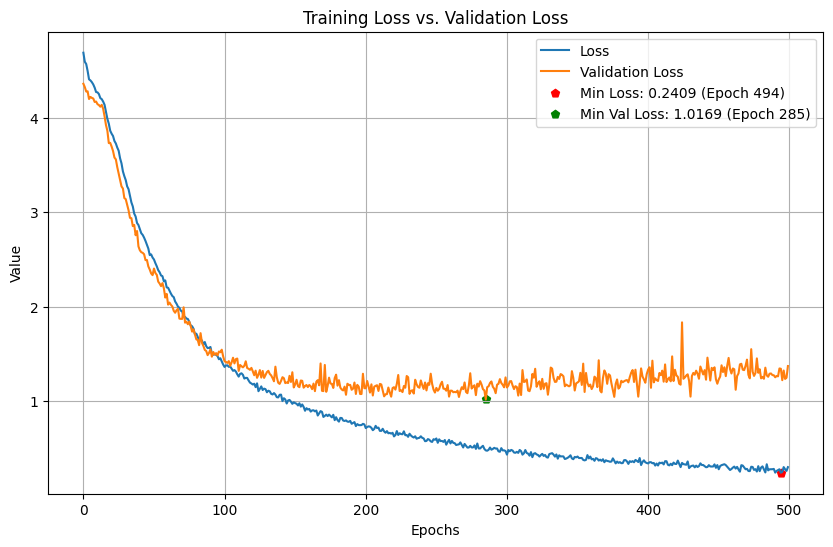

In [152]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

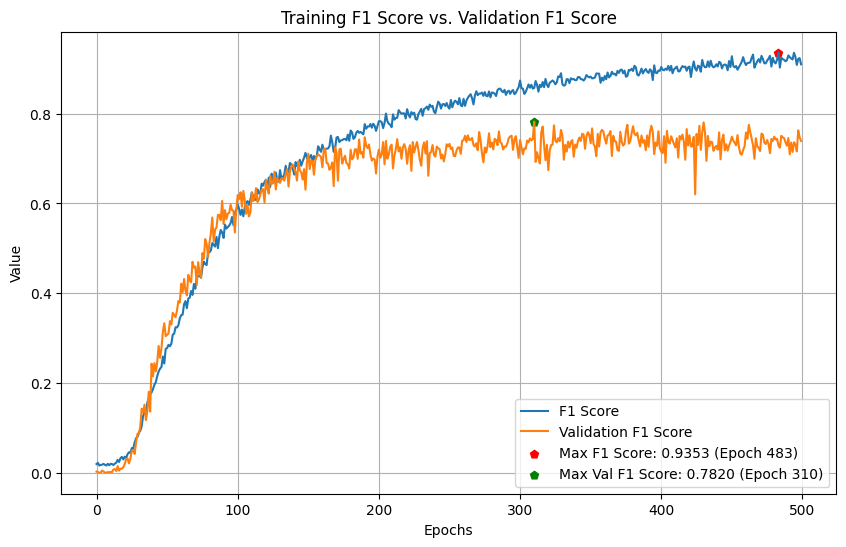

In [153]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [119]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

2023-09-11 08:08:36.168100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 08:08:37.343243: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1561 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [120]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 122, 100)          359200    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 13, 100)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 125)           12625     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 13, 125)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 125)           0         
                                                                 
 gru_3 (GRU)                 (None, 75)               

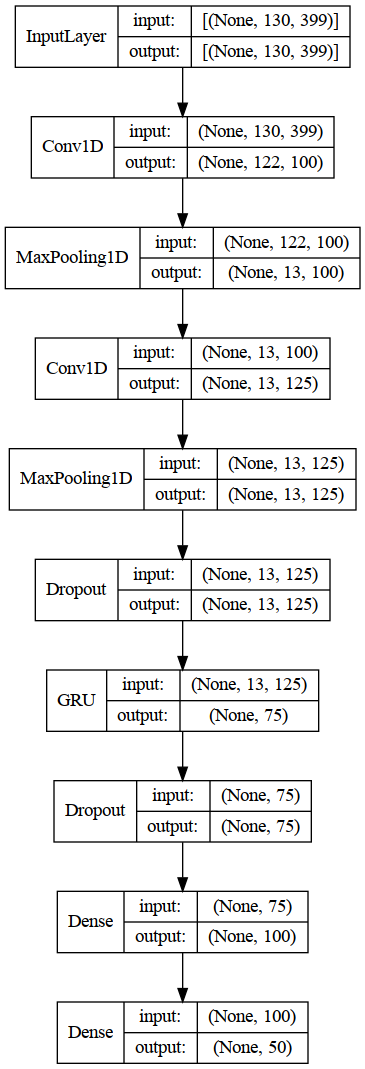

In [121]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

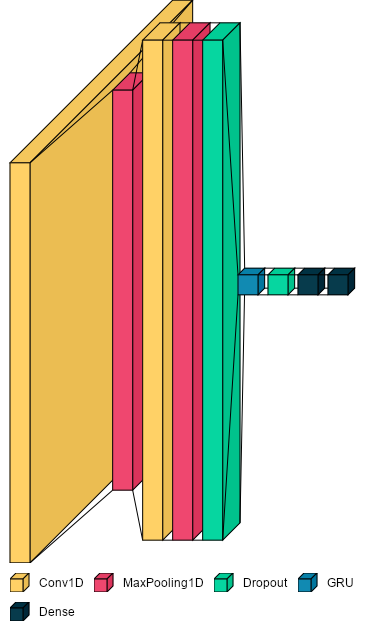

In [122]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [123]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-11 08:08:52.883001: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 10s 19ms/step - loss: 1.0642 - f1_score: 0.7820


[1.0641664266586304, 0.7819815278053284]

In [124]:
reconstructed_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 12ms/step - loss: 0.1385 - f1_score: 0.9771


[0.1384536623954773, 0.9770539999008179]

In [125]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.500     0.667     0.571         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.889     0.800     0.842        10
        BELT      0.667     1.000     0.800         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      1.000     0.833     0.909         6
      CANCER      1.000     1.000     1.000         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.750     1.000     0.857         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.667     0.333     0.444         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.667     

In [119]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 GRU Mish/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [120]:
act_function = mish
model = Sequential()
model.add(
    Conv1D(filters=100,
           kernel_size=9,
           activation=act_function,
           input_shape=(130, 399)))
model.add(MaxPooling1D(pool_size=9))
model.add(Conv1D(filters=1265, kernel_size=1, activation=act_function))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(.7))
model.add(
    GRU(units=75,
        return_sequences=False,
        kernel_regularizer=regularizers.l2(.0023285010665210285)))
model.add(Dropout(.5))
model.add(Dense(units=100, activation=act_function))
model.add(Dense(50, activation='softmax'))

model.compile(tf.optimizers.experimental.Nadam(.0003730278430367326),
              loss='categorical_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
model.summary()
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

2023-09-17 10:57:32.962856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 10:57:33.031991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 100)          359200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 1265)          127765    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 1265)         0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 1265)          0         
                                                                 
 gru (GRU)                   (None, 75)                3

2023-09-17 10:57:38.399877: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-17 10:57:39.036955: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f341d5890c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 10:57:39.036988: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-17 10:57:39.047191: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 10:57:39.225458: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.7370 - f1_score: 0.0160

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 18s 443ms/step - loss: 4.7370 - f1_score: 0.0160 - val_loss: 4.6173 - val_f1_score: 4.9383e-04
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.5286 - f1_score: 0.0124

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 332ms/step - loss: 4.5286 - f1_score: 0.0124 - val_loss: 4.4371 - val_f1_score: 7.2727e-04
Epoch 3/500
28/28 [==============================] - ETA: 0s - loss: 4.3691 - f1_score: 0.0146

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 355ms/step - loss: 4.3691 - f1_score: 0.0146 - val_loss: 4.3035 - val_f1_score: 9.6677e-04
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.2554 - f1_score: 0.0153

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 361ms/step - loss: 4.2554 - f1_score: 0.0153 - val_loss: 4.2101 - val_f1_score: 0.0013
Epoch 5/500
28/28 [==============================] - ETA: 0s - loss: 4.1665 - f1_score: 0.0163

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 384ms/step - loss: 4.1665 - f1_score: 0.0163 - val_loss: 4.1255 - val_f1_score: 0.0048
Epoch 6/500
28/28 [==============================] - 2s 80ms/step - loss: 4.0701 - f1_score: 0.0128 - val_loss: 3.9964 - val_f1_score: 0.0038
Epoch 7/500
28/28 [==============================] - 2s 80ms/step - loss: 3.9012 - f1_score: 0.0209 - val_loss: 3.8284 - val_f1_score: 0.0039
Epoch 8/500
28/28 [==============================] - 2s 81ms/step - loss: 3.7809 - f1_score: 0.0231 - val_loss: 3.6863 - val_f1_score: 0.0040
Epoch 9/500
28/28 [==============================] - ETA: 0s - loss: 3.6893 - f1_score: 0.0303

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 369ms/step - loss: 3.6893 - f1_score: 0.0303 - val_loss: 3.6269 - val_f1_score: 0.0132
Epoch 10/500
28/28 [==============================] - 2s 81ms/step - loss: 3.6175 - f1_score: 0.0326 - val_loss: 3.5051 - val_f1_score: 0.0096
Epoch 11/500
28/28 [==============================] - ETA: 0s - loss: 3.5367 - f1_score: 0.0457

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 360ms/step - loss: 3.5367 - f1_score: 0.0457 - val_loss: 3.4997 - val_f1_score: 0.0136
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.4526 - f1_score: 0.0444

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 353ms/step - loss: 3.4526 - f1_score: 0.0444 - val_loss: 3.3835 - val_f1_score: 0.0273
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.3893 - f1_score: 0.0575

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 384ms/step - loss: 3.3893 - f1_score: 0.0575 - val_loss: 3.3209 - val_f1_score: 0.0435
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.3238 - f1_score: 0.0678

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 395ms/step - loss: 3.3238 - f1_score: 0.0678 - val_loss: 3.2943 - val_f1_score: 0.0704
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.2718 - f1_score: 0.0769

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 343ms/step - loss: 3.2718 - f1_score: 0.0769 - val_loss: 3.1532 - val_f1_score: 0.0784
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.2098 - f1_score: 0.0718

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 330ms/step - loss: 3.2098 - f1_score: 0.0718 - val_loss: 3.1071 - val_f1_score: 0.1000
Epoch 17/500
28/28 [==============================] - 2s 81ms/step - loss: 3.1328 - f1_score: 0.0952 - val_loss: 3.0329 - val_f1_score: 0.0776
Epoch 18/500
28/28 [==============================] - 2s 80ms/step - loss: 3.0845 - f1_score: 0.1126 - val_loss: 3.0100 - val_f1_score: 0.0855
Epoch 19/500
28/28 [==============================] - 2s 81ms/step - loss: 3.0143 - f1_score: 0.1169 - val_loss: 2.9954 - val_f1_score: 0.0787
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.9701 - f1_score: 0.1244

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 369ms/step - loss: 2.9701 - f1_score: 0.1244 - val_loss: 2.8706 - val_f1_score: 0.1086
Epoch 21/500
28/28 [==============================] - ETA: 0s - loss: 2.9288 - f1_score: 0.1245

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 396ms/step - loss: 2.9288 - f1_score: 0.1245 - val_loss: 2.8084 - val_f1_score: 0.1418
Epoch 22/500
28/28 [==============================] - ETA: 0s - loss: 2.8691 - f1_score: 0.1510

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 29s 1s/step - loss: 2.8691 - f1_score: 0.1510 - val_loss: 2.7675 - val_f1_score: 0.1526
Epoch 23/500
28/28 [==============================] - 2s 80ms/step - loss: 2.8429 - f1_score: 0.1630 - val_loss: 2.7729 - val_f1_score: 0.1295
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 2.8108 - f1_score: 0.1619

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 350ms/step - loss: 2.8108 - f1_score: 0.1619 - val_loss: 2.7188 - val_f1_score: 0.1636
Epoch 25/500
28/28 [==============================] - ETA: 0s - loss: 2.7418 - f1_score: 0.1788

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 335ms/step - loss: 2.7418 - f1_score: 0.1788 - val_loss: 2.6834 - val_f1_score: 0.1985
Epoch 26/500
28/28 [==============================] - 2s 80ms/step - loss: 2.7145 - f1_score: 0.1807 - val_loss: 2.6042 - val_f1_score: 0.1938
Epoch 27/500
28/28 [==============================] - 2s 81ms/step - loss: 2.6665 - f1_score: 0.1941 - val_loss: 2.7275 - val_f1_score: 0.1544
Epoch 28/500
28/28 [==============================] - 2s 80ms/step - loss: 2.6462 - f1_score: 0.2076 - val_loss: 2.6000 - val_f1_score: 0.1885
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.6195 - f1_score: 0.2082

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 45s 2s/step - loss: 2.6195 - f1_score: 0.2082 - val_loss: 2.5583 - val_f1_score: 0.2152
Epoch 30/500
28/28 [==============================] - ETA: 0s - loss: 2.5583 - f1_score: 0.2301

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 334ms/step - loss: 2.5583 - f1_score: 0.2301 - val_loss: 2.4994 - val_f1_score: 0.2363
Epoch 31/500
28/28 [==============================] - 2s 80ms/step - loss: 2.5259 - f1_score: 0.2378 - val_loss: 2.5686 - val_f1_score: 0.1964
Epoch 32/500
28/28 [==============================] - ETA: 0s - loss: 2.4932 - f1_score: 0.2366

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 420ms/step - loss: 2.4932 - f1_score: 0.2366 - val_loss: 2.4139 - val_f1_score: 0.2613
Epoch 33/500
28/28 [==============================] - 2s 80ms/step - loss: 2.4570 - f1_score: 0.2506 - val_loss: 2.5075 - val_f1_score: 0.2164
Epoch 34/500
28/28 [==============================] - 2s 80ms/step - loss: 2.4074 - f1_score: 0.2657 - val_loss: 2.4780 - val_f1_score: 0.2314
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.4075 - f1_score: 0.2719

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 35s 1s/step - loss: 2.4075 - f1_score: 0.2719 - val_loss: 2.4191 - val_f1_score: 0.2652
Epoch 36/500
28/28 [==============================] - ETA: 0s - loss: 2.3652 - f1_score: 0.2702

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 8s 307ms/step - loss: 2.3652 - f1_score: 0.2702 - val_loss: 2.3671 - val_f1_score: 0.2688
Epoch 37/500
28/28 [==============================] - ETA: 0s - loss: 2.3279 - f1_score: 0.2825

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 354ms/step - loss: 2.3279 - f1_score: 0.2825 - val_loss: 2.3311 - val_f1_score: 0.2823
Epoch 38/500
28/28 [==============================] - 2s 80ms/step - loss: 2.3610 - f1_score: 0.2852 - val_loss: 2.3262 - val_f1_score: 0.2710
Epoch 39/500
28/28 [==============================] - ETA: 0s - loss: 2.2955 - f1_score: 0.2986

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 358ms/step - loss: 2.2955 - f1_score: 0.2986 - val_loss: 2.2789 - val_f1_score: 0.3274
Epoch 40/500
28/28 [==============================] - 2s 80ms/step - loss: 2.2628 - f1_score: 0.2973 - val_loss: 2.2557 - val_f1_score: 0.3266
Epoch 41/500
28/28 [==============================] - 2s 80ms/step - loss: 2.2465 - f1_score: 0.3027 - val_loss: 2.2419 - val_f1_score: 0.3024
Epoch 42/500
28/28 [==============================] - 2s 80ms/step - loss: 2.2204 - f1_score: 0.3122 - val_loss: 2.2596 - val_f1_score: 0.3198
Epoch 43/500
28/28 [==============================] - 2s 81ms/step - loss: 2.1861 - f1_score: 0.3215 - val_loss: 2.2349 - val_f1_score: 0.2941
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 2.1697 - f1_score: 0.3400

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 370ms/step - loss: 2.1697 - f1_score: 0.3400 - val_loss: 2.2495 - val_f1_score: 0.3344
Epoch 45/500
28/28 [==============================] - 2s 80ms/step - loss: 2.1554 - f1_score: 0.3392 - val_loss: 2.1676 - val_f1_score: 0.3253
Epoch 46/500
28/28 [==============================] - 2s 81ms/step - loss: 2.1331 - f1_score: 0.3444 - val_loss: 2.2197 - val_f1_score: 0.3268
Epoch 47/500
28/28 [==============================] - 2s 82ms/step - loss: 2.1126 - f1_score: 0.3539 - val_loss: 2.1526 - val_f1_score: 0.3332
Epoch 48/500
28/28 [==============================] - ETA: 0s - loss: 2.1021 - f1_score: 0.3414

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 360ms/step - loss: 2.1021 - f1_score: 0.3414 - val_loss: 2.1678 - val_f1_score: 0.3448
Epoch 49/500
28/28 [==============================] - 2s 80ms/step - loss: 2.0807 - f1_score: 0.3673 - val_loss: 2.1922 - val_f1_score: 0.3306
Epoch 50/500
28/28 [==============================] - 2s 81ms/step - loss: 2.1259 - f1_score: 0.3454 - val_loss: 2.2226 - val_f1_score: 0.3228
Epoch 51/500
28/28 [==============================] - ETA: 0s - loss: 2.0651 - f1_score: 0.3522

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 350ms/step - loss: 2.0651 - f1_score: 0.3522 - val_loss: 2.1923 - val_f1_score: 0.3574
Epoch 52/500
28/28 [==============================] - ETA: 0s - loss: 2.0379 - f1_score: 0.3626

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 25s 923ms/step - loss: 2.0379 - f1_score: 0.3626 - val_loss: 2.1768 - val_f1_score: 0.3663
Epoch 53/500
28/28 [==============================] - ETA: 0s - loss: 2.0300 - f1_score: 0.3640

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 9s 315ms/step - loss: 2.0300 - f1_score: 0.3640 - val_loss: 2.1415 - val_f1_score: 0.3695
Epoch 54/500
28/28 [==============================] - 2s 80ms/step - loss: 1.9992 - f1_score: 0.3818 - val_loss: 2.1922 - val_f1_score: 0.3479
Epoch 55/500
28/28 [==============================] - 2s 80ms/step - loss: 1.9860 - f1_score: 0.3847 - val_loss: 2.1035 - val_f1_score: 0.3673
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 1.9741 - f1_score: 0.3840

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 358ms/step - loss: 1.9741 - f1_score: 0.3840 - val_loss: 2.0701 - val_f1_score: 0.3819
Epoch 57/500
28/28 [==============================] - 2s 80ms/step - loss: 1.9532 - f1_score: 0.3929 - val_loss: 2.1120 - val_f1_score: 0.3674
Epoch 58/500
28/28 [==============================] - 2s 82ms/step - loss: 1.9262 - f1_score: 0.4092 - val_loss: 2.2125 - val_f1_score: 0.3781
Epoch 59/500
28/28 [==============================] - 2s 82ms/step - loss: 1.9226 - f1_score: 0.4156 - val_loss: 2.0873 - val_f1_score: 0.3733
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 1.9143 - f1_score: 0.4065

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 11s 403ms/step - loss: 1.9143 - f1_score: 0.4065 - val_loss: 2.1051 - val_f1_score: 0.4028
Epoch 61/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8875 - f1_score: 0.4148 - val_loss: 2.1251 - val_f1_score: 0.3658
Epoch 62/500
28/28 [==============================] - 2s 80ms/step - loss: 1.8943 - f1_score: 0.4144 - val_loss: 2.1837 - val_f1_score: 0.3881
Epoch 63/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8785 - f1_score: 0.4256 - val_loss: 2.0870 - val_f1_score: 0.3645
Epoch 64/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8589 - f1_score: 0.4150 - val_loss: 2.1380 - val_f1_score: 0.3643
Epoch 65/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8500 - f1_score: 0.4248 - val_loss: 2.1708 - val_f1_score: 0.3813
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.8625 - f1_score: 0.4181

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 10s 379ms/step - loss: 1.8625 - f1_score: 0.4181 - val_loss: 2.0488 - val_f1_score: 0.4292
Epoch 67/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8233 - f1_score: 0.4338 - val_loss: 2.1245 - val_f1_score: 0.3738
Epoch 68/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8239 - f1_score: 0.4286 - val_loss: 2.2117 - val_f1_score: 0.3633
Epoch 69/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8096 - f1_score: 0.4365 - val_loss: 2.3795 - val_f1_score: 0.3505
Epoch 70/500
28/28 [==============================] - 2s 81ms/step - loss: 1.8217 - f1_score: 0.4337 - val_loss: 2.1578 - val_f1_score: 0.4086
Epoch 71/500
28/28 [==============================] - 2s 81ms/step - loss: 1.7845 - f1_score: 0.4422 - val_loss: 2.0371 - val_f1_score: 0.3978
Epoch 72/500
28/28 [==============================] - 2s 81ms/step - loss: 1.7871 - f1_score: 0.4497 - val_loss: 2.1286 - val_f1_score: 0.3978
Epoch 73/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 425ms/step - loss: 1.5272 - f1_score: 0.5163 - val_loss: 2.1296 - val_f1_score: 0.4296
Epoch 100/500
28/28 [==============================] - 2s 81ms/step - loss: 1.5000 - f1_score: 0.5282 - val_loss: 2.2345 - val_f1_score: 0.3878
Epoch 101/500
28/28 [==============================] - 2s 81ms/step - loss: 1.5115 - f1_score: 0.5203 - val_loss: 2.2230 - val_f1_score: 0.3955
Epoch 102/500
28/28 [==============================] - 2s 82ms/step - loss: 1.5083 - f1_score: 0.5308 - val_loss: 2.2008 - val_f1_score: 0.4066
Epoch 103/500
28/28 [==============================] - 2s 82ms/step - loss: 1.4896 - f1_score: 0.5428 - val_loss: 2.0937 - val_f1_score: 0.4208
Epoch 104/500
28/28 [==============================] - 2s 82ms/step - loss: 1.4922 - f1_score: 0.5320 - val_loss: 2.2077 - val_f1_score: 0.4094
Epoch 105/500
28/28 [==============================] - 2s 82ms/step - loss: 1.5163 - f1_score: 0.5261 - val_loss: 2.1362 - val_f1_score: 0.4194
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 439ms/step - loss: 1.4045 - f1_score: 0.5619 - val_loss: 2.2104 - val_f1_score: 0.4427
Epoch 117/500
28/28 [==============================] - 2s 82ms/step - loss: 1.3964 - f1_score: 0.5601 - val_loss: 2.2329 - val_f1_score: 0.4269
Epoch 118/500
28/28 [==============================] - 2s 82ms/step - loss: 1.3869 - f1_score: 0.5711 - val_loss: 2.1664 - val_f1_score: 0.4342
Epoch 119/500
28/28 [==============================] - 2s 82ms/step - loss: 1.3950 - f1_score: 0.5616 - val_loss: 2.1658 - val_f1_score: 0.4368
Epoch 120/500
28/28 [==============================] - 2s 82ms/step - loss: 1.3628 - f1_score: 0.5783 - val_loss: 2.4075 - val_f1_score: 0.3981
Epoch 121/500
28/28 [==============================] - 2s 84ms/step - loss: 1.3778 - f1_score: 0.5759 - val_loss: 2.1535 - val_f1_score: 0.4214
Epoch 122/500
28/28 [==============================] - 2s 84ms/step - loss: 1.3722 - f1_score: 0.5665 - val_loss: 2.2420 - val_f1_score: 0.4032
Epoc

Epoch 173/500
28/28 [==============================] - 2s 85ms/step - loss: 1.0900 - f1_score: 0.6767 - val_loss: 2.4186 - val_f1_score: 0.4156
Epoch 174/500
28/28 [==============================] - 2s 89ms/step - loss: 1.0824 - f1_score: 0.6578 - val_loss: 2.6096 - val_f1_score: 0.4016
Epoch 175/500
28/28 [==============================] - 2s 86ms/step - loss: 1.0737 - f1_score: 0.6623 - val_loss: 2.5501 - val_f1_score: 0.3945
Epoch 176/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0703 - f1_score: 0.6641 - val_loss: 2.4874 - val_f1_score: 0.4117
Epoch 177/500
28/28 [==============================] - 2s 87ms/step - loss: 1.0754 - f1_score: 0.6750 - val_loss: 2.4185 - val_f1_score: 0.4137
Epoch 178/500
28/28 [==============================] - 2s 84ms/step - loss: 1.0905 - f1_score: 0.6644 - val_loss: 2.4174 - val_f1_score: 0.3956
Epoch 179/500
28/28 [==============================] - 2s 84ms/step - loss: 1.0422 - f1_score: 0.6727 - val_loss: 2.4261 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 12s 447ms/step - loss: 1.0463 - f1_score: 0.6825 - val_loss: 2.4169 - val_f1_score: 0.4499
Epoch 185/500
28/28 [==============================] - 2s 82ms/step - loss: 1.0234 - f1_score: 0.6815 - val_loss: 2.6884 - val_f1_score: 0.3855
Epoch 186/500
28/28 [==============================] - 2s 82ms/step - loss: 1.0246 - f1_score: 0.6850 - val_loss: 2.3413 - val_f1_score: 0.4067
Epoch 187/500
28/28 [==============================] - 2s 82ms/step - loss: 1.0271 - f1_score: 0.6897 - val_loss: 2.4802 - val_f1_score: 0.4033
Epoch 188/500
28/28 [==============================] - 2s 83ms/step - loss: 1.0297 - f1_score: 0.6792 - val_loss: 2.4705 - val_f1_score: 0.4164
Epoch 189/500
28/28 [==============================] - 2s 83ms/step - loss: 1.0166 - f1_score: 0.6893 - val_loss: 2.5708 - val_f1_score: 0.3865
Epoch 190/500
28/28 [==============================] - 2s 83ms/step - loss: 1.0110 - f1_score: 0.6809 - val_loss: 2.5061 - val_f1_score: 0.4119
Epoc

Epoch 241/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8047 - f1_score: 0.7620 - val_loss: 2.7459 - val_f1_score: 0.4092
Epoch 242/500
28/28 [==============================] - 2s 86ms/step - loss: 0.7946 - f1_score: 0.7573 - val_loss: 2.7932 - val_f1_score: 0.4127
Epoch 243/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8091 - f1_score: 0.7492 - val_loss: 2.7812 - val_f1_score: 0.3919
Epoch 244/500
28/28 [==============================] - 3s 92ms/step - loss: 0.8235 - f1_score: 0.7539 - val_loss: 2.7906 - val_f1_score: 0.4097
Epoch 245/500
28/28 [==============================] - 3s 94ms/step - loss: 0.7747 - f1_score: 0.7657 - val_loss: 2.7319 - val_f1_score: 0.4128
Epoch 246/500
28/28 [==============================] - 3s 90ms/step - loss: 0.8149 - f1_score: 0.7566 - val_loss: 2.7466 - val_f1_score: 0.4008
Epoch 247/500
28/28 [==============================] - 2s 87ms/step - loss: 0.8041 - f1_score: 0.7650 - val_loss: 2.6283 - val_f1_score:

Epoch 298/500
28/28 [==============================] - 2s 84ms/step - loss: 0.6525 - f1_score: 0.8097 - val_loss: 3.0292 - val_f1_score: 0.4326
Epoch 299/500
28/28 [==============================] - 2s 85ms/step - loss: 0.6944 - f1_score: 0.7938 - val_loss: 3.0275 - val_f1_score: 0.4233
Epoch 300/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6542 - f1_score: 0.8178 - val_loss: 3.0562 - val_f1_score: 0.4305
Epoch 301/500
28/28 [==============================] - 2s 86ms/step - loss: 0.6422 - f1_score: 0.8167 - val_loss: 3.0471 - val_f1_score: 0.4307
Epoch 302/500
28/28 [==============================] - 2s 85ms/step - loss: 0.6758 - f1_score: 0.7986 - val_loss: 3.1666 - val_f1_score: 0.4122
Epoch 303/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6540 - f1_score: 0.8126 - val_loss: 3.0733 - val_f1_score: 0.4190
Epoch 304/500
28/28 [==============================] - 2s 89ms/step - loss: 0.6617 - f1_score: 0.8125 - val_loss: 3.0346 - val_f1_score:

Epoch 355/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5586 - f1_score: 0.8464 - val_loss: 3.3534 - val_f1_score: 0.4139
Epoch 356/500
28/28 [==============================] - 2s 87ms/step - loss: 0.5461 - f1_score: 0.8449 - val_loss: 3.2167 - val_f1_score: 0.4346
Epoch 357/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5565 - f1_score: 0.8439 - val_loss: 3.3182 - val_f1_score: 0.4349
Epoch 358/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5409 - f1_score: 0.8498 - val_loss: 3.3991 - val_f1_score: 0.4380
Epoch 359/500
28/28 [==============================] - 2s 87ms/step - loss: 0.5635 - f1_score: 0.8448 - val_loss: 3.2095 - val_f1_score: 0.4344
Epoch 360/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5776 - f1_score: 0.8366 - val_loss: 3.3203 - val_f1_score: 0.4290
Epoch 361/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5474 - f1_score: 0.8429 - val_loss: 3.4664 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 13s 490ms/step - loss: 0.5085 - f1_score: 0.8619 - val_loss: 3.3786 - val_f1_score: 0.4514
Epoch 384/500
28/28 [==============================] - 2s 87ms/step - loss: 0.4808 - f1_score: 0.8729 - val_loss: 3.4980 - val_f1_score: 0.4140
Epoch 385/500
28/28 [==============================] - 2s 84ms/step - loss: 0.4892 - f1_score: 0.8685 - val_loss: 3.4666 - val_f1_score: 0.4155
Epoch 386/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5284 - f1_score: 0.8491 - val_loss: 3.4880 - val_f1_score: 0.4206
Epoch 387/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5207 - f1_score: 0.8559 - val_loss: 3.4374 - val_f1_score: 0.4332
Epoch 388/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5000 - f1_score: 0.8665 - val_loss: 3.3558 - val_f1_score: 0.4220
Epoch 389/500
28/28 [==============================] - 2s 87ms/step - loss: 0.4881 - f1_score: 0.8641 - val_loss: 3.4617 - val_f1_score: 0.4117
Epoc

Epoch 440/500
28/28 [==============================] - 2s 87ms/step - loss: 0.4994 - f1_score: 0.8632 - val_loss: 3.4836 - val_f1_score: 0.4353
Epoch 441/500
28/28 [==============================] - 2s 89ms/step - loss: 0.4265 - f1_score: 0.8890 - val_loss: 3.4703 - val_f1_score: 0.4412
Epoch 442/500
28/28 [==============================] - 2s 88ms/step - loss: 0.4489 - f1_score: 0.8879 - val_loss: 3.9817 - val_f1_score: 0.3998
Epoch 443/500
28/28 [==============================] - 2s 87ms/step - loss: 0.4917 - f1_score: 0.8736 - val_loss: 3.7699 - val_f1_score: 0.3956
Epoch 444/500
28/28 [==============================] - 2s 88ms/step - loss: 0.4477 - f1_score: 0.8783 - val_loss: 3.5979 - val_f1_score: 0.4147
Epoch 445/500
28/28 [==============================] - 2s 88ms/step - loss: 0.4586 - f1_score: 0.8772 - val_loss: 3.6685 - val_f1_score: 0.4107
Epoch 446/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4525 - f1_score: 0.8778 - val_loss: 3.7366 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 GRU Mish/assets


28/28 [==============================] - 16s 572ms/step - loss: 0.4231 - f1_score: 0.8945 - val_loss: 3.6099 - val_f1_score: 0.4629
Epoch 452/500
28/28 [==============================] - 2s 83ms/step - loss: 0.4305 - f1_score: 0.8879 - val_loss: 3.6634 - val_f1_score: 0.4338
Epoch 453/500
28/28 [==============================] - 2s 83ms/step - loss: 0.4946 - f1_score: 0.8698 - val_loss: 3.9984 - val_f1_score: 0.4271
Epoch 454/500
28/28 [==============================] - 2s 87ms/step - loss: 0.4798 - f1_score: 0.8657 - val_loss: 3.5677 - val_f1_score: 0.4416
Epoch 455/500
28/28 [==============================] - 2s 88ms/step - loss: 0.4643 - f1_score: 0.8751 - val_loss: 3.6248 - val_f1_score: 0.4457
Epoch 456/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5325 - f1_score: 0.8511 - val_loss: 3.6608 - val_f1_score: 0.4177
Epoch 457/500
28/28 [==============================] - 2s 85ms/step - loss: 0.4539 - f1_score: 0.8828 - val_loss: 3.7489 - val_f1_score: 0.4441
Epoc

In [121]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

         AXE      0.833     0.625     0.714         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.875     0.700     0.778        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     1.000     1.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.333     0.500     0.400         8
   CHRISTMAS      0.500     0.667     0.571         6
    CONFUSED      0.222     0.333     0.267         6
        DARK      1.000     0.750     0.857         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.750     0.500     0.600         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.286     0.333     0.308         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.286    

In [122]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 GRU Mish/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [124]:
hist_df = pd.read_csv('2 1DCNN + 1 GRU Mish/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.419776  0.891804  3.898187      0.431453
496  0.386257  0.905040  3.875715      0.419560
497  0.391138  0.901491  3.952640      0.412126
498  0.395500  0.905607  3.739040      0.433954
499  0.386382  0.899518  3.872027      0.438089

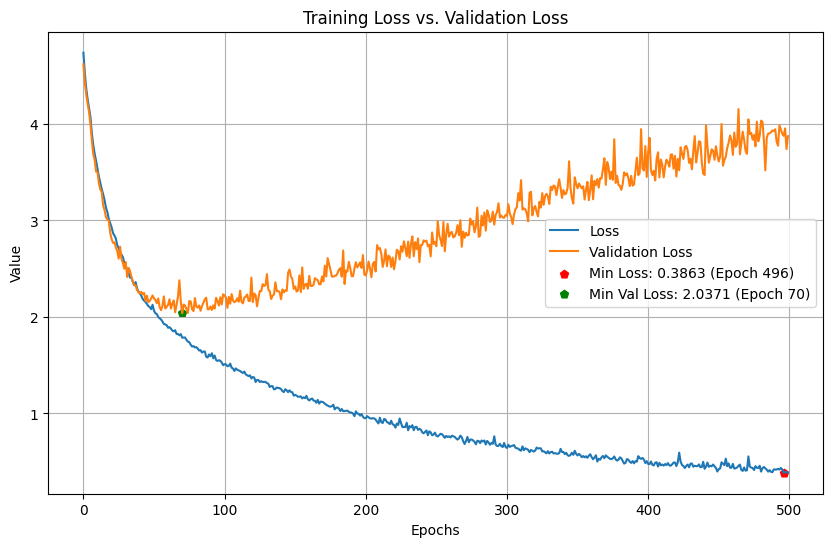

In [125]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

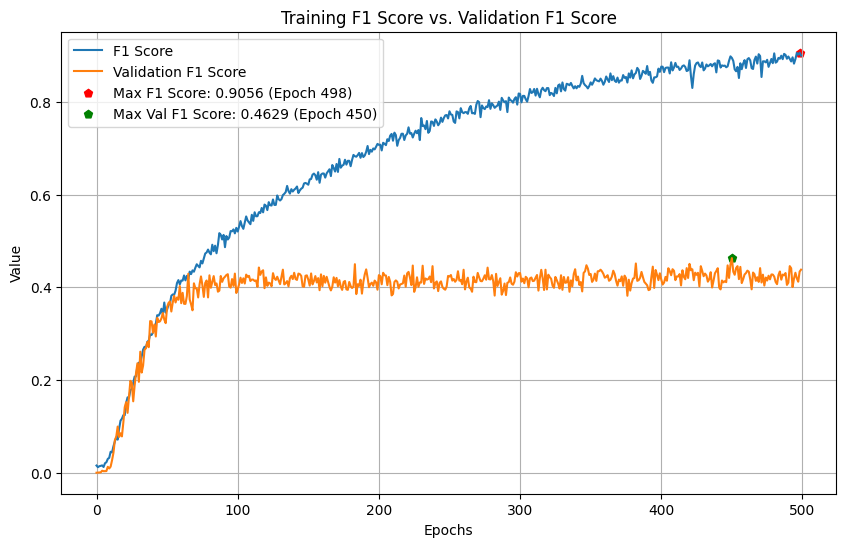

In [126]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [125]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU Mish")

2023-09-23 17:38:53.578964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 17:38:53.640026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [126]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 100)          359200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 1265)          127765    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 1265)         0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 1265)          0         
                                                                 
 gru (GRU)                   (None, 75)                3

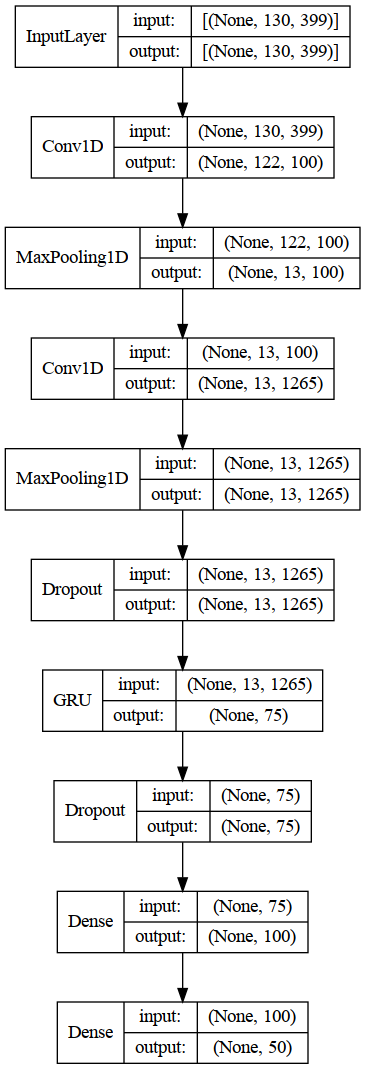

In [127]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [128]:
reconstructed_model.evaluate(Xval, Yval)

2023-09-23 17:39:31.101680: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


11/11 [==============================] - 1s 16ms/step - loss: 3.6099 - f1_score: 0.4629


[3.6098763942718506, 0.4629427194595337]

In [129]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-23 17:39:33.483345: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-23 17:39:33.961509: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 13ms/step - loss: 0.2054 - f1_score: 0.9752


[0.2054452747106552, 0.9751793146133423]

In [130]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         AXE      0.833     0.625     0.714         8
    BACKPACK      0.667     1.000     0.800         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     1.000     1.000         4
        BITE      0.000     0.000     0.000         8
   BREAKFAST      0.000     0.000     0.000         6
      CANCER      0.462     0.750     0.571         8
   CHRISTMAS      0.500     0.333     0.400         6
    CONFUSED      0.250     0.333     0.286         6
        DARK      1.000     0.750     0.857         4
        DEAF      0.000     0.000     0.000         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.333     0.500     0.400         6
      DINNER      0.000     0.000     0.000         8
         DOG      0.400    

### 2 1D-CNN + 1 GRU Trial 698

In [122]:
best_model = tuner.get_best_models(num_models=8)[7]

2023-09-17 15:05:03.641424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 15:05:03.711362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [123]:
best_model.evaluate(Xtrain, Ytrain)

2023-09-17 15:02:08.433261: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


84/84 [==============================] - 2s 14ms/step - loss: 0.6389 - f1_score: 0.8507


[0.6388570070266724, 0.8506678938865662]

In [124]:
best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 18ms/step - loss: 1.2167 - f1_score: 0.7151


[1.2167245149612427, 0.7151216268539429]

In [123]:
bestHP = tuner.get_best_hyperparameters(num_trials=8)[7]

In [124]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1D-CNN + 1 GRU Trial 698/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [125]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500


2023-09-17 15:05:23.392967: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2023-09-17 15:05:23.886487: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x33d5a490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 15:05:23.886515: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-09-17 15:05:23.894201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 15:05:24.030220: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 [==============================] - ETA: 0s - loss: 4.3060 - f1_score: 0.0155

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 23s 708ms/step - loss: 4.3060 - f1_score: 0.0155 - val_loss: 4.2643 - val_f1_score: 0.0023
Epoch 2/500
28/28 [==============================] - ETA: 0s - loss: 4.2598 - f1_score: 0.0168

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 324ms/step - loss: 4.2598 - f1_score: 0.0168 - val_loss: 4.2376 - val_f1_score: 0.0044
Epoch 3/500
28/28 [==============================] - 2s 69ms/step - loss: 4.2194 - f1_score: 0.0195 - val_loss: 4.2021 - val_f1_score: 0.0031
Epoch 4/500
28/28 [==============================] - ETA: 0s - loss: 4.1897 - f1_score: 0.0172

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 313ms/step - loss: 4.1897 - f1_score: 0.0172 - val_loss: 4.1743 - val_f1_score: 0.0078
Epoch 5/500
28/28 [==============================] - 2s 68ms/step - loss: 4.1626 - f1_score: 0.0164 - val_loss: 4.1438 - val_f1_score: 0.0032
Epoch 6/500
28/28 [==============================] - 2s 68ms/step - loss: 4.1241 - f1_score: 0.0206 - val_loss: 4.0999 - val_f1_score: 0.0078
Epoch 7/500
28/28 [==============================] - ETA: 0s - loss: 4.0746 - f1_score: 0.0253

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 318ms/step - loss: 4.0746 - f1_score: 0.0253 - val_loss: 4.0348 - val_f1_score: 0.0147
Epoch 8/500
28/28 [==============================] - ETA: 0s - loss: 3.9914 - f1_score: 0.0268

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 358ms/step - loss: 3.9914 - f1_score: 0.0268 - val_loss: 3.9240 - val_f1_score: 0.0205
Epoch 9/500
28/28 [==============================] - 2s 69ms/step - loss: 3.9017 - f1_score: 0.0300 - val_loss: 3.8117 - val_f1_score: 0.0111
Epoch 10/500
28/28 [==============================] - ETA: 0s - loss: 3.8208 - f1_score: 0.0385

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 317ms/step - loss: 3.8208 - f1_score: 0.0385 - val_loss: 3.7274 - val_f1_score: 0.0259
Epoch 11/500
28/28 [==============================] - 2s 69ms/step - loss: 3.7375 - f1_score: 0.0477 - val_loss: 3.6419 - val_f1_score: 0.0227
Epoch 12/500
28/28 [==============================] - ETA: 0s - loss: 3.6616 - f1_score: 0.0527

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 348ms/step - loss: 3.6616 - f1_score: 0.0527 - val_loss: 3.5457 - val_f1_score: 0.0367
Epoch 13/500
28/28 [==============================] - ETA: 0s - loss: 3.5684 - f1_score: 0.0579

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 8s 307ms/step - loss: 3.5684 - f1_score: 0.0579 - val_loss: 3.3881 - val_f1_score: 0.0478
Epoch 14/500
28/28 [==============================] - ETA: 0s - loss: 3.4560 - f1_score: 0.0707

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 326ms/step - loss: 3.4560 - f1_score: 0.0707 - val_loss: 3.3013 - val_f1_score: 0.0543
Epoch 15/500
28/28 [==============================] - ETA: 0s - loss: 3.3763 - f1_score: 0.0787

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 334ms/step - loss: 3.3763 - f1_score: 0.0787 - val_loss: 3.1803 - val_f1_score: 0.0816
Epoch 16/500
28/28 [==============================] - ETA: 0s - loss: 3.2794 - f1_score: 0.0985

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 347ms/step - loss: 3.2794 - f1_score: 0.0985 - val_loss: 3.0867 - val_f1_score: 0.1030
Epoch 17/500
28/28 [==============================] - ETA: 0s - loss: 3.1814 - f1_score: 0.1180

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 19s 711ms/step - loss: 3.1814 - f1_score: 0.1180 - val_loss: 3.0297 - val_f1_score: 0.1158
Epoch 18/500
28/28 [==============================] - ETA: 0s - loss: 3.0862 - f1_score: 0.1265

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 8s 312ms/step - loss: 3.0862 - f1_score: 0.1265 - val_loss: 2.8815 - val_f1_score: 0.1253
Epoch 19/500
28/28 [==============================] - 2s 69ms/step - loss: 3.0152 - f1_score: 0.1512 - val_loss: 2.8935 - val_f1_score: 0.1196
Epoch 20/500
28/28 [==============================] - ETA: 0s - loss: 2.9304 - f1_score: 0.1577

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 360ms/step - loss: 2.9304 - f1_score: 0.1577 - val_loss: 2.8125 - val_f1_score: 0.1810
Epoch 21/500
28/28 [==============================] - 2s 69ms/step - loss: 2.8819 - f1_score: 0.1693 - val_loss: 2.7164 - val_f1_score: 0.1792
Epoch 22/500
28/28 [==============================] - 2s 69ms/step - loss: 2.8137 - f1_score: 0.1857 - val_loss: 2.6735 - val_f1_score: 0.1803
Epoch 23/500
28/28 [==============================] - ETA: 0s - loss: 2.7653 - f1_score: 0.1948

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 361ms/step - loss: 2.7653 - f1_score: 0.1948 - val_loss: 2.6496 - val_f1_score: 0.1993
Epoch 24/500
28/28 [==============================] - ETA: 0s - loss: 2.7068 - f1_score: 0.2180

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 355ms/step - loss: 2.7068 - f1_score: 0.2180 - val_loss: 2.6054 - val_f1_score: 0.2401
Epoch 25/500
28/28 [==============================] - 2s 70ms/step - loss: 2.6651 - f1_score: 0.2282 - val_loss: 2.5432 - val_f1_score: 0.2330
Epoch 26/500
28/28 [==============================] - ETA: 0s - loss: 2.5998 - f1_score: 0.2398

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 346ms/step - loss: 2.5998 - f1_score: 0.2398 - val_loss: 2.5381 - val_f1_score: 0.2441
Epoch 27/500
28/28 [==============================] - ETA: 0s - loss: 2.5781 - f1_score: 0.2476

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 328ms/step - loss: 2.5781 - f1_score: 0.2476 - val_loss: 2.4789 - val_f1_score: 0.2546
Epoch 28/500
28/28 [==============================] - 2s 69ms/step - loss: 2.5115 - f1_score: 0.2565 - val_loss: 2.5387 - val_f1_score: 0.2371
Epoch 29/500
28/28 [==============================] - ETA: 0s - loss: 2.4906 - f1_score: 0.2655

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 333ms/step - loss: 2.4906 - f1_score: 0.2655 - val_loss: 2.3785 - val_f1_score: 0.2982
Epoch 30/500
28/28 [==============================] - 2s 69ms/step - loss: 2.4536 - f1_score: 0.2873 - val_loss: 2.4348 - val_f1_score: 0.2781
Epoch 31/500
28/28 [==============================] - ETA: 0s - loss: 2.4077 - f1_score: 0.2761

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 366ms/step - loss: 2.4077 - f1_score: 0.2761 - val_loss: 2.3107 - val_f1_score: 0.3459
Epoch 32/500
28/28 [==============================] - 2s 69ms/step - loss: 2.3648 - f1_score: 0.3060 - val_loss: 2.3131 - val_f1_score: 0.3202
Epoch 33/500
28/28 [==============================] - 2s 70ms/step - loss: 2.3418 - f1_score: 0.3126 - val_loss: 2.3467 - val_f1_score: 0.3078
Epoch 34/500
28/28 [==============================] - 2s 70ms/step - loss: 2.3090 - f1_score: 0.3231 - val_loss: 2.2365 - val_f1_score: 0.3283
Epoch 35/500
28/28 [==============================] - ETA: 0s - loss: 2.2598 - f1_score: 0.3207

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 399ms/step - loss: 2.2598 - f1_score: 0.3207 - val_loss: 2.2124 - val_f1_score: 0.3477
Epoch 36/500
28/28 [==============================] - 2s 70ms/step - loss: 2.2137 - f1_score: 0.3501 - val_loss: 2.1827 - val_f1_score: 0.3441
Epoch 37/500
28/28 [==============================] - 2s 70ms/step - loss: 2.1865 - f1_score: 0.3583 - val_loss: 2.2442 - val_f1_score: 0.3403
Epoch 38/500
28/28 [==============================] - ETA: 0s - loss: 2.1337 - f1_score: 0.3685

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 9s 345ms/step - loss: 2.1337 - f1_score: 0.3685 - val_loss: 2.1596 - val_f1_score: 0.3942
Epoch 39/500
28/28 [==============================] - 2s 69ms/step - loss: 2.1363 - f1_score: 0.3657 - val_loss: 2.1413 - val_f1_score: 0.3870
Epoch 40/500
28/28 [==============================] - 2s 70ms/step - loss: 2.0784 - f1_score: 0.3869 - val_loss: 2.0868 - val_f1_score: 0.3669
Epoch 41/500
28/28 [==============================] - ETA: 0s - loss: 2.0562 - f1_score: 0.3896

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 400ms/step - loss: 2.0562 - f1_score: 0.3896 - val_loss: 2.0732 - val_f1_score: 0.4089
Epoch 42/500
28/28 [==============================] - 2s 70ms/step - loss: 2.0213 - f1_score: 0.3978 - val_loss: 2.0570 - val_f1_score: 0.4050
Epoch 43/500
28/28 [==============================] - 2s 70ms/step - loss: 1.9977 - f1_score: 0.4025 - val_loss: 2.0539 - val_f1_score: 0.4071
Epoch 44/500
28/28 [==============================] - ETA: 0s - loss: 1.9697 - f1_score: 0.4183

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 357ms/step - loss: 1.9697 - f1_score: 0.4183 - val_loss: 2.0524 - val_f1_score: 0.4371
Epoch 45/500
28/28 [==============================] - ETA: 0s - loss: 1.9492 - f1_score: 0.4237

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 350ms/step - loss: 1.9492 - f1_score: 0.4237 - val_loss: 2.0098 - val_f1_score: 0.4528
Epoch 46/500
28/28 [==============================] - 2s 69ms/step - loss: 1.9094 - f1_score: 0.4399 - val_loss: 2.0283 - val_f1_score: 0.4049
Epoch 47/500
28/28 [==============================] - ETA: 0s - loss: 1.8874 - f1_score: 0.4466

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 16s 589ms/step - loss: 1.8874 - f1_score: 0.4466 - val_loss: 1.9515 - val_f1_score: 0.4529
Epoch 48/500
28/28 [==============================] - 2s 70ms/step - loss: 1.8629 - f1_score: 0.4456 - val_loss: 2.0134 - val_f1_score: 0.4324
Epoch 49/500
28/28 [==============================] - ETA: 0s - loss: 1.8464 - f1_score: 0.4588

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 12s 429ms/step - loss: 1.8464 - f1_score: 0.4588 - val_loss: 1.9242 - val_f1_score: 0.4675
Epoch 50/500
28/28 [==============================] - 2s 69ms/step - loss: 1.8124 - f1_score: 0.4610 - val_loss: 1.9470 - val_f1_score: 0.4527
Epoch 51/500
28/28 [==============================] - 2s 69ms/step - loss: 1.7717 - f1_score: 0.4770 - val_loss: 1.9465 - val_f1_score: 0.4250
Epoch 52/500
28/28 [==============================] - 2s 69ms/step - loss: 1.7714 - f1_score: 0.4664 - val_loss: 1.9172 - val_f1_score: 0.4517
Epoch 53/500
28/28 [==============================] - 2s 69ms/step - loss: 1.7212 - f1_score: 0.4928 - val_loss: 1.8925 - val_f1_score: 0.4582
Epoch 54/500
28/28 [==============================] - ETA: 0s - loss: 1.6979 - f1_score: 0.4962

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 402ms/step - loss: 1.6979 - f1_score: 0.4962 - val_loss: 1.9029 - val_f1_score: 0.4725
Epoch 55/500
28/28 [==============================] - ETA: 0s - loss: 1.6733 - f1_score: 0.4987

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 392ms/step - loss: 1.6733 - f1_score: 0.4987 - val_loss: 1.8314 - val_f1_score: 0.4804
Epoch 56/500
28/28 [==============================] - ETA: 0s - loss: 1.6658 - f1_score: 0.5104

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 383ms/step - loss: 1.6658 - f1_score: 0.5104 - val_loss: 1.7832 - val_f1_score: 0.5054
Epoch 57/500
28/28 [==============================] - 2s 69ms/step - loss: 1.6092 - f1_score: 0.5275 - val_loss: 1.8262 - val_f1_score: 0.4837
Epoch 58/500
28/28 [==============================] - 2s 73ms/step - loss: 1.5767 - f1_score: 0.5355 - val_loss: 1.8942 - val_f1_score: 0.4762
Epoch 59/500
28/28 [==============================] - ETA: 0s - loss: 1.5910 - f1_score: 0.5273

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 355ms/step - loss: 1.5910 - f1_score: 0.5273 - val_loss: 1.7652 - val_f1_score: 0.5075
Epoch 60/500
28/28 [==============================] - ETA: 0s - loss: 1.5562 - f1_score: 0.5353

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 371ms/step - loss: 1.5562 - f1_score: 0.5353 - val_loss: 1.7416 - val_f1_score: 0.5314
Epoch 61/500
28/28 [==============================] - 2s 69ms/step - loss: 1.5130 - f1_score: 0.5583 - val_loss: 1.7400 - val_f1_score: 0.5245
Epoch 62/500
28/28 [==============================] - ETA: 0s - loss: 1.5113 - f1_score: 0.5570

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 362ms/step - loss: 1.5113 - f1_score: 0.5570 - val_loss: 1.6869 - val_f1_score: 0.5439
Epoch 63/500
28/28 [==============================] - 2s 71ms/step - loss: 1.4859 - f1_score: 0.5663 - val_loss: 1.6824 - val_f1_score: 0.5424
Epoch 64/500
28/28 [==============================] - 2s 70ms/step - loss: 1.4793 - f1_score: 0.5669 - val_loss: 1.7128 - val_f1_score: 0.5295
Epoch 65/500
28/28 [==============================] - 2s 70ms/step - loss: 1.4233 - f1_score: 0.5773 - val_loss: 1.6673 - val_f1_score: 0.5323
Epoch 66/500
28/28 [==============================] - ETA: 0s - loss: 1.4242 - f1_score: 0.5839

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 356ms/step - loss: 1.4242 - f1_score: 0.5839 - val_loss: 1.6349 - val_f1_score: 0.5518
Epoch 67/500
28/28 [==============================] - ETA: 0s - loss: 1.4112 - f1_score: 0.5931

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 395ms/step - loss: 1.4112 - f1_score: 0.5931 - val_loss: 1.6761 - val_f1_score: 0.5587
Epoch 68/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3867 - f1_score: 0.6024 - val_loss: 1.7110 - val_f1_score: 0.5452
Epoch 69/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3733 - f1_score: 0.5930 - val_loss: 1.6556 - val_f1_score: 0.5573
Epoch 70/500
28/28 [==============================] - ETA: 0s - loss: 1.3546 - f1_score: 0.5999

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 399ms/step - loss: 1.3546 - f1_score: 0.5999 - val_loss: 1.5593 - val_f1_score: 0.5927
Epoch 71/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3221 - f1_score: 0.6078 - val_loss: 1.5836 - val_f1_score: 0.5695
Epoch 72/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3087 - f1_score: 0.6197 - val_loss: 1.5970 - val_f1_score: 0.5824
Epoch 73/500
28/28 [==============================] - 2s 70ms/step - loss: 1.3024 - f1_score: 0.6210 - val_loss: 1.6886 - val_f1_score: 0.5484
Epoch 74/500
28/28 [==============================] - 2s 70ms/step - loss: 1.2950 - f1_score: 0.6169 - val_loss: 1.5712 - val_f1_score: 0.5893
Epoch 75/500
28/28 [==============================] - 2s 70ms/step - loss: 1.2560 - f1_score: 0.6279 - val_loss: 1.5130 - val_f1_score: 0.5838
Epoch 76/500
28/28 [==============================] - 2s 70ms/step - loss: 1.2203 - f1_score: 0.6507 - val_loss: 1.5622 - val_f1_score: 0.5789
Epoch 77/5

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 350ms/step - loss: 1.2173 - f1_score: 0.6433 - val_loss: 1.4863 - val_f1_score: 0.6158
Epoch 79/500
28/28 [==============================] - 2s 70ms/step - loss: 1.2073 - f1_score: 0.6504 - val_loss: 1.4767 - val_f1_score: 0.5858
Epoch 80/500
28/28 [==============================] - 2s 70ms/step - loss: 1.1972 - f1_score: 0.6554 - val_loss: 1.4611 - val_f1_score: 0.6114
Epoch 81/500
28/28 [==============================] - 2s 71ms/step - loss: 1.1794 - f1_score: 0.6789 - val_loss: 1.4734 - val_f1_score: 0.6073
Epoch 82/500
28/28 [==============================] - 2s 71ms/step - loss: 1.1433 - f1_score: 0.6833 - val_loss: 1.4986 - val_f1_score: 0.6114
Epoch 83/500
28/28 [==============================] - ETA: 0s - loss: 1.1600 - f1_score: 0.6670

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 410ms/step - loss: 1.1600 - f1_score: 0.6670 - val_loss: 1.4419 - val_f1_score: 0.6446
Epoch 84/500
28/28 [==============================] - 2s 70ms/step - loss: 1.1281 - f1_score: 0.6632 - val_loss: 1.4868 - val_f1_score: 0.6221
Epoch 85/500
28/28 [==============================] - 2s 71ms/step - loss: 1.1237 - f1_score: 0.6766 - val_loss: 1.4731 - val_f1_score: 0.6122
Epoch 86/500
28/28 [==============================] - 2s 71ms/step - loss: 1.0996 - f1_score: 0.6873 - val_loss: 1.4665 - val_f1_score: 0.6156
Epoch 87/500
28/28 [==============================] - 2s 71ms/step - loss: 1.0688 - f1_score: 0.6978 - val_loss: 1.4159 - val_f1_score: 0.6230
Epoch 88/500
28/28 [==============================] - 2s 71ms/step - loss: 1.0697 - f1_score: 0.6958 - val_loss: 1.5356 - val_f1_score: 0.5666
Epoch 89/500
28/28 [==============================] - 2s 71ms/step - loss: 1.0570 - f1_score: 0.7011 - val_loss: 1.4305 - val_f1_score: 0.6366
Epoch 90/5

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 378ms/step - loss: 1.0487 - f1_score: 0.6986 - val_loss: 1.3906 - val_f1_score: 0.6600
Epoch 91/500
28/28 [==============================] - 2s 70ms/step - loss: 1.0488 - f1_score: 0.7031 - val_loss: 1.4210 - val_f1_score: 0.5933
Epoch 92/500
28/28 [==============================] - 2s 70ms/step - loss: 1.0204 - f1_score: 0.7114 - val_loss: 1.4168 - val_f1_score: 0.6103
Epoch 93/500
28/28 [==============================] - 2s 71ms/step - loss: 1.0163 - f1_score: 0.7093 - val_loss: 1.3995 - val_f1_score: 0.6131
Epoch 94/500
28/28 [==============================] - 2s 70ms/step - loss: 0.9971 - f1_score: 0.7172 - val_loss: 1.3825 - val_f1_score: 0.6210
Epoch 95/500
28/28 [==============================] - 2s 70ms/step - loss: 0.9950 - f1_score: 0.7199 - val_loss: 1.4678 - val_f1_score: 0.6142
Epoch 96/500
28/28 [==============================] - 2s 74ms/step - loss: 0.9631 - f1_score: 0.7297 - val_loss: 1.4160 - val_f1_score: 0.6169
Epoch 97/5

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 423ms/step - loss: 0.9044 - f1_score: 0.7417 - val_loss: 1.3312 - val_f1_score: 0.6618
Epoch 102/500
28/28 [==============================] - 2s 70ms/step - loss: 0.9075 - f1_score: 0.7409 - val_loss: 1.4020 - val_f1_score: 0.6269
Epoch 103/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8943 - f1_score: 0.7456 - val_loss: 1.3994 - val_f1_score: 0.6267
Epoch 104/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8905 - f1_score: 0.7494 - val_loss: 1.3654 - val_f1_score: 0.6536
Epoch 105/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8697 - f1_score: 0.7653 - val_loss: 1.3199 - val_f1_score: 0.6485
Epoch 106/500
28/28 [==============================] - 2s 69ms/step - loss: 0.8688 - f1_score: 0.7613 - val_loss: 1.3524 - val_f1_score: 0.6578
Epoch 107/500
28/28 [==============================] - ETA: 0s - loss: 0.8684 - f1_score: 0.7591

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 12s 428ms/step - loss: 0.8684 - f1_score: 0.7591 - val_loss: 1.3263 - val_f1_score: 0.6685
Epoch 108/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8220 - f1_score: 0.7680 - val_loss: 1.3808 - val_f1_score: 0.6355
Epoch 109/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8320 - f1_score: 0.7634 - val_loss: 1.3119 - val_f1_score: 0.6534
Epoch 110/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8280 - f1_score: 0.7677 - val_loss: 1.4235 - val_f1_score: 0.6506
Epoch 111/500
28/28 [==============================] - 2s 71ms/step - loss: 0.8294 - f1_score: 0.7698 - val_loss: 1.3656 - val_f1_score: 0.6611
Epoch 112/500
28/28 [==============================] - 2s 70ms/step - loss: 0.8041 - f1_score: 0.7774 - val_loss: 1.4291 - val_f1_score: 0.6207
Epoch 113/500
28/28 [==============================] - 2s 71ms/step - loss: 0.7949 - f1_score: 0.7829 - val_loss: 1.3628 - val_f1_score: 0.6675
Epoc

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 379ms/step - loss: 0.7496 - f1_score: 0.7915 - val_loss: 1.3188 - val_f1_score: 0.6729
Epoch 117/500
28/28 [==============================] - 2s 72ms/step - loss: 0.7488 - f1_score: 0.7935 - val_loss: 1.2779 - val_f1_score: 0.6669
Epoch 118/500
28/28 [==============================] - 2s 70ms/step - loss: 0.7421 - f1_score: 0.7927 - val_loss: 1.3394 - val_f1_score: 0.6390
Epoch 119/500
28/28 [==============================] - ETA: 0s - loss: 0.7270 - f1_score: 0.8024

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 363ms/step - loss: 0.7270 - f1_score: 0.8024 - val_loss: 1.3016 - val_f1_score: 0.6761
Epoch 120/500
28/28 [==============================] - 2s 69ms/step - loss: 0.7491 - f1_score: 0.7935 - val_loss: 1.2963 - val_f1_score: 0.6580
Epoch 121/500
28/28 [==============================] - 2s 70ms/step - loss: 0.7118 - f1_score: 0.8114 - val_loss: 1.2994 - val_f1_score: 0.6648
Epoch 122/500
28/28 [==============================] - ETA: 0s - loss: 0.7254 - f1_score: 0.8019

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 15s 550ms/step - loss: 0.7254 - f1_score: 0.8019 - val_loss: 1.2919 - val_f1_score: 0.6846
Epoch 123/500
28/28 [==============================] - 2s 69ms/step - loss: 0.7065 - f1_score: 0.8171 - val_loss: 1.3605 - val_f1_score: 0.6729
Epoch 124/500
28/28 [==============================] - 2s 69ms/step - loss: 0.6917 - f1_score: 0.8098 - val_loss: 1.3187 - val_f1_score: 0.6699
Epoch 125/500
28/28 [==============================] - 2s 69ms/step - loss: 0.6642 - f1_score: 0.8181 - val_loss: 1.3706 - val_f1_score: 0.6429
Epoch 126/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6788 - f1_score: 0.8177 - val_loss: 1.2788 - val_f1_score: 0.6767
Epoch 127/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6773 - f1_score: 0.8229 - val_loss: 1.3095 - val_f1_score: 0.6686
Epoch 128/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6704 - f1_score: 0.8219 - val_loss: 1.4807 - val_f1_score: 0.6495
Epoc

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 10s 363ms/step - loss: 0.6194 - f1_score: 0.8285 - val_loss: 1.2971 - val_f1_score: 0.6967
Epoch 135/500
28/28 [==============================] - 2s 70ms/step - loss: 0.6113 - f1_score: 0.8358 - val_loss: 1.2822 - val_f1_score: 0.6882
Epoch 136/500
28/28 [==============================] - ETA: 0s - loss: 0.6131 - f1_score: 0.8351

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 408ms/step - loss: 0.6131 - f1_score: 0.8351 - val_loss: 1.2825 - val_f1_score: 0.7059
Epoch 137/500
28/28 [==============================] - 2s 71ms/step - loss: 0.5782 - f1_score: 0.8543 - val_loss: 1.3908 - val_f1_score: 0.6610
Epoch 138/500
28/28 [==============================] - 2s 72ms/step - loss: 0.5939 - f1_score: 0.8481 - val_loss: 1.2764 - val_f1_score: 0.6985
Epoch 139/500
28/28 [==============================] - 2s 72ms/step - loss: 0.5970 - f1_score: 0.8418 - val_loss: 1.3084 - val_f1_score: 0.6733
Epoch 140/500
28/28 [==============================] - 2s 73ms/step - loss: 0.5736 - f1_score: 0.8562 - val_loss: 1.3166 - val_f1_score: 0.6719
Epoch 141/500
28/28 [==============================] - 2s 71ms/step - loss: 0.5661 - f1_score: 0.8506 - val_loss: 1.3064 - val_f1_score: 0.6819
Epoch 142/500
28/28 [==============================] - 2s 71ms/step - loss: 0.5455 - f1_score: 0.8563 - val_loss: 1.2797 - val_f1_score: 0.6575
Epoc

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 13s 471ms/step - loss: 0.4220 - f1_score: 0.8933 - val_loss: 1.3843 - val_f1_score: 0.7066
Epoch 170/500
28/28 [==============================] - 2s 71ms/step - loss: 0.4245 - f1_score: 0.8976 - val_loss: 1.2902 - val_f1_score: 0.6910
Epoch 171/500
28/28 [==============================] - ETA: 0s - loss: 0.4250 - f1_score: 0.8999

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 11s 396ms/step - loss: 0.4250 - f1_score: 0.8999 - val_loss: 1.2098 - val_f1_score: 0.7249
Epoch 172/500
28/28 [==============================] - 2s 71ms/step - loss: 0.4086 - f1_score: 0.9035 - val_loss: 1.3207 - val_f1_score: 0.7013
Epoch 173/500
28/28 [==============================] - 2s 72ms/step - loss: 0.4057 - f1_score: 0.9102 - val_loss: 1.3761 - val_f1_score: 0.6524
Epoch 174/500
28/28 [==============================] - 2s 72ms/step - loss: 0.4071 - f1_score: 0.9013 - val_loss: 1.2815 - val_f1_score: 0.7066
Epoch 175/500
28/28 [==============================] - 2s 72ms/step - loss: 0.4105 - f1_score: 0.8983 - val_loss: 1.3115 - val_f1_score: 0.6943
Epoch 176/500
28/28 [==============================] - 2s 72ms/step - loss: 0.3881 - f1_score: 0.9137 - val_loss: 1.3280 - val_f1_score: 0.6914
Epoch 177/500
28/28 [==============================] - 2s 72ms/step - loss: 0.3808 - f1_score: 0.9064 - val_loss: 1.3824 - val_f1_score: 0.6570
Epoc

Epoch 228/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2420 - f1_score: 0.9547 - val_loss: 1.3895 - val_f1_score: 0.6936
Epoch 229/500
28/28 [==============================] - 2s 72ms/step - loss: 0.2318 - f1_score: 0.9582 - val_loss: 1.3816 - val_f1_score: 0.7025
Epoch 230/500
28/28 [==============================] - 2s 74ms/step - loss: 0.2383 - f1_score: 0.9547 - val_loss: 1.3698 - val_f1_score: 0.6954
Epoch 231/500
28/28 [==============================] - 2s 76ms/step - loss: 0.2377 - f1_score: 0.9557 - val_loss: 1.3755 - val_f1_score: 0.7079
Epoch 232/500
28/28 [==============================] - 2s 74ms/step - loss: 0.2256 - f1_score: 0.9582 - val_loss: 1.4751 - val_f1_score: 0.6884
Epoch 233/500
28/28 [==============================] - 2s 75ms/step - loss: 0.2186 - f1_score: 0.9657 - val_loss: 1.5014 - val_f1_score: 0.7045
Epoch 234/500
28/28 [==============================] - 2s 73ms/step - loss: 0.2365 - f1_score: 0.9510 - val_loss: 1.4537 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


INFO:tensorflow:Assets written to: 2 1D-CNN + 1 GRU Trial 698/assets


28/28 [==============================] - 14s 509ms/step - loss: 0.2211 - f1_score: 0.9599 - val_loss: 1.3137 - val_f1_score: 0.7387
Epoch 238/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2146 - f1_score: 0.9612 - val_loss: 1.5006 - val_f1_score: 0.6713
Epoch 239/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2082 - f1_score: 0.9687 - val_loss: 1.4343 - val_f1_score: 0.7017
Epoch 240/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2433 - f1_score: 0.9504 - val_loss: 1.4233 - val_f1_score: 0.7025
Epoch 241/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2235 - f1_score: 0.9567 - val_loss: 1.4888 - val_f1_score: 0.6989
Epoch 242/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2200 - f1_score: 0.9618 - val_loss: 1.4996 - val_f1_score: 0.6875
Epoch 243/500
28/28 [==============================] - 2s 71ms/step - loss: 0.2425 - f1_score: 0.9498 - val_loss: 1.4386 - val_f1_score: 0.6972
Epoc

Epoch 294/500
28/28 [==============================] - 2s 74ms/step - loss: 0.1679 - f1_score: 0.9706 - val_loss: 1.5124 - val_f1_score: 0.7045
Epoch 295/500
28/28 [==============================] - 2s 75ms/step - loss: 0.1586 - f1_score: 0.9748 - val_loss: 1.5455 - val_f1_score: 0.6973
Epoch 296/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1533 - f1_score: 0.9796 - val_loss: 1.5782 - val_f1_score: 0.6897
Epoch 297/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1503 - f1_score: 0.9765 - val_loss: 1.4938 - val_f1_score: 0.6980
Epoch 298/500
28/28 [==============================] - 2s 72ms/step - loss: 0.1486 - f1_score: 0.9780 - val_loss: 1.4987 - val_f1_score: 0.6988
Epoch 299/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1467 - f1_score: 0.9785 - val_loss: 1.6040 - val_f1_score: 0.6736
Epoch 300/500
28/28 [==============================] - 2s 74ms/step - loss: 0.1380 - f1_score: 0.9813 - val_loss: 1.6051 - val_f1_score:

Epoch 351/500
28/28 [==============================] - 2s 74ms/step - loss: 0.1282 - f1_score: 0.9777 - val_loss: 1.7645 - val_f1_score: 0.6723
Epoch 352/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1149 - f1_score: 0.9840 - val_loss: 1.6234 - val_f1_score: 0.6901
Epoch 353/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1149 - f1_score: 0.9848 - val_loss: 1.7597 - val_f1_score: 0.6577
Epoch 354/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1118 - f1_score: 0.9865 - val_loss: 1.6266 - val_f1_score: 0.7102
Epoch 355/500
28/28 [==============================] - 2s 76ms/step - loss: 0.1108 - f1_score: 0.9867 - val_loss: 1.7048 - val_f1_score: 0.6907
Epoch 356/500
28/28 [==============================] - 2s 84ms/step - loss: 0.1091 - f1_score: 0.9861 - val_loss: 1.5832 - val_f1_score: 0.6901
Epoch 357/500
28/28 [==============================] - 2s 78ms/step - loss: 0.1113 - f1_score: 0.9854 - val_loss: 1.6432 - val_f1_score:

Epoch 408/500
28/28 [==============================] - 2s 78ms/step - loss: 0.0957 - f1_score: 0.9888 - val_loss: 1.8860 - val_f1_score: 0.6784
Epoch 409/500
28/28 [==============================] - 2s 79ms/step - loss: 0.0896 - f1_score: 0.9865 - val_loss: 1.7238 - val_f1_score: 0.7093
Epoch 410/500
28/28 [==============================] - 2s 78ms/step - loss: 0.0977 - f1_score: 0.9872 - val_loss: 1.6443 - val_f1_score: 0.7123
Epoch 411/500
28/28 [==============================] - 2s 77ms/step - loss: 0.0962 - f1_score: 0.9867 - val_loss: 1.8248 - val_f1_score: 0.6936
Epoch 412/500
28/28 [==============================] - 2s 75ms/step - loss: 0.1051 - f1_score: 0.9815 - val_loss: 1.6310 - val_f1_score: 0.6983
Epoch 413/500
28/28 [==============================] - 2s 73ms/step - loss: 0.1213 - f1_score: 0.9784 - val_loss: 1.7564 - val_f1_score: 0.6856
Epoch 414/500
28/28 [==============================] - 2s 76ms/step - loss: 0.0990 - f1_score: 0.9864 - val_loss: 1.7293 - val_f1_score:

Epoch 465/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0995 - f1_score: 0.9827 - val_loss: 1.7648 - val_f1_score: 0.7036
Epoch 466/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0828 - f1_score: 0.9872 - val_loss: 1.7580 - val_f1_score: 0.6931
Epoch 467/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0846 - f1_score: 0.9883 - val_loss: 1.7529 - val_f1_score: 0.6843
Epoch 468/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0735 - f1_score: 0.9912 - val_loss: 1.6994 - val_f1_score: 0.7045
Epoch 469/500
28/28 [==============================] - 2s 73ms/step - loss: 0.0760 - f1_score: 0.9918 - val_loss: 1.6837 - val_f1_score: 0.6972
Epoch 470/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0691 - f1_score: 0.9942 - val_loss: 1.8803 - val_f1_score: 0.6597
Epoch 471/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0804 - f1_score: 0.9897 - val_loss: 1.7402 - val_f1_score:

In [126]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

         AXE      0.800     1.000     0.889         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      1.000     1.000     1.000        10
         BEE      0.778     0.700     0.737        10
        BELT      0.800     1.000     0.889         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      1.000     0.667     0.800         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.571     0.667     0.615         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.800     0.667     0.727         6
      DEMAND      1.000     0.750     0.857         8
     DEVELOP      0.600     0.500     0.545         6
      DINNER      0.714     0.625     0.667         8
         DOG      0.500    

In [127]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1D-CNN + 1 GRU Trial 698/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [128]:
hist_df = pd.read_csv('2 1D-CNN + 1 GRU Trial 698/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.076451  0.988074  1.863722      0.672334
496  0.070669  0.991913  1.895288      0.695279
497  0.074715  0.990478  1.784943      0.703256
498  0.066731  0.990053  1.797919      0.705461
499  0.065315  0.993155  1.659775      0.697256

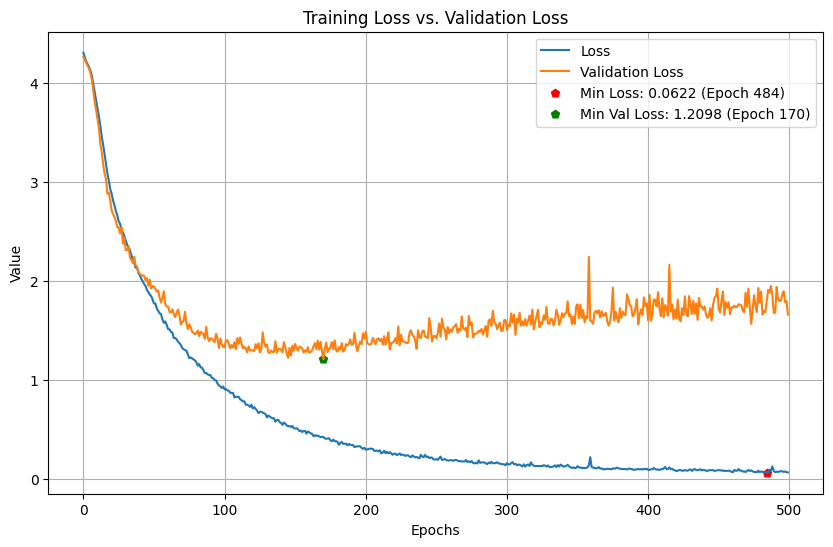

In [129]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

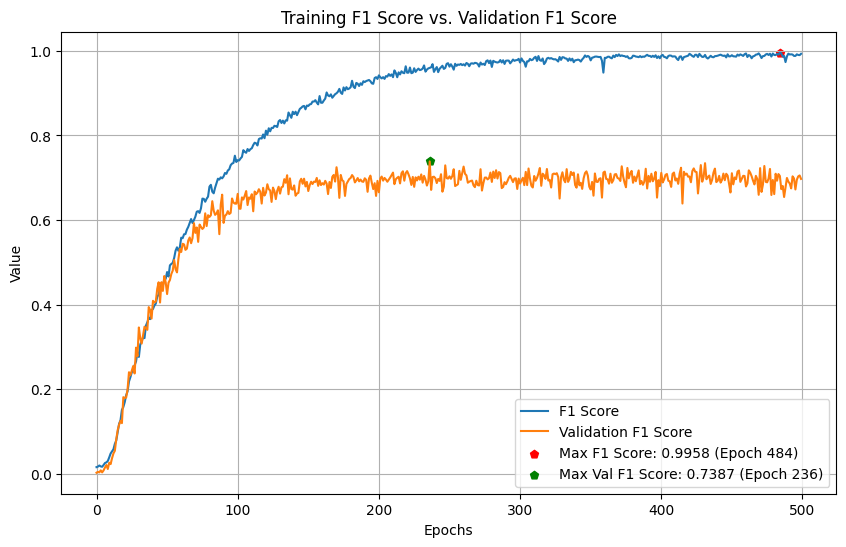

In [130]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [131]:
reconstructed_model = tf.keras.models.load_model("2 1D-CNN + 1 GRU Trial 698")

In [132]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 127, 200)          319400    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 15, 200)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 200)           80200     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 14, 200)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 175)              

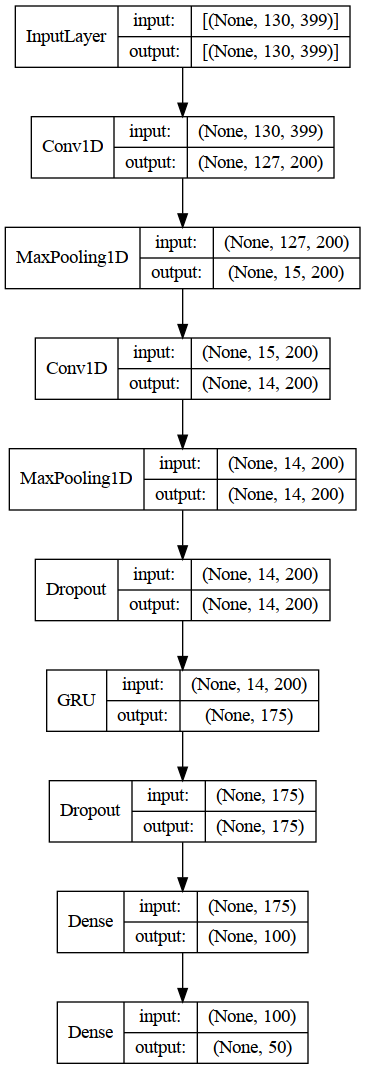

In [133]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

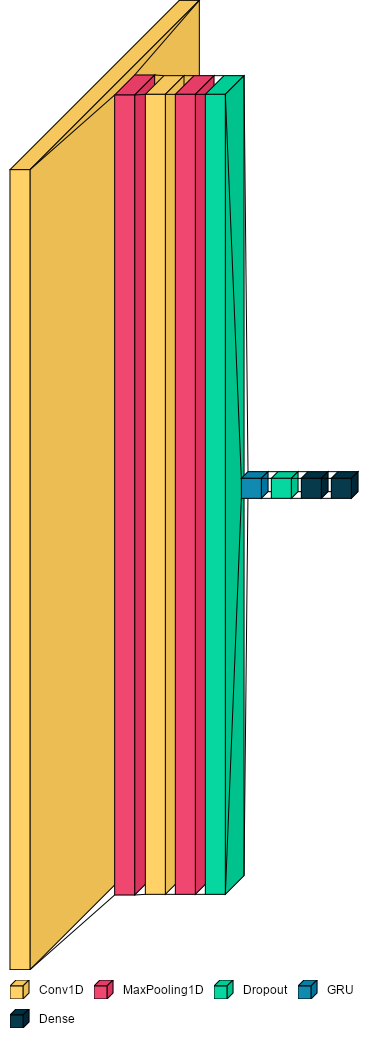

In [134]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [135]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.3137 - f1_score: 0.7387


[1.3137201070785522, 0.7386768460273743]

In [136]:
reconstructed_model.evaluate(Xtrain, Ytrain, batch_size=96)

28/28 [==============================] - 1s 31ms/step - loss: 0.1068 - f1_score: 0.9985


[0.10675598680973053, 0.9985218644142151]

In [137]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.714     0.833     0.769         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.778     0.700     0.737        10
        BELT      0.800     1.000     0.889         4
        BITE      0.750     0.375     0.500         8
   BREAKFAST      1.000     0.667     0.800         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.600     1.000     0.750         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.333     0.333     0.333         6
      DECIDE      0.667     0.667     0.667         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      0.700     0.875     0.778         8
         DOG      0.375    

## Hyperparameter Tuning 1 1D CNN Layer + 1 LSTM

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_999463/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='gelu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[5, 10, 15, 20],
                       default=20,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[5, 10, 15, 20],
                default=20,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='1_1D_CNN+1_LSTM',
    overwrite=False)

2023-09-12 23:18:08.144326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 23:18:08.574514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
pool_1 (Choice)
{'default': 20, 'conditions': [], 'values': [5, 10, 15, 20], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_2 (Float)
{'default': 0.7, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_2 

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 18m 53s]
val_f1_score: 0.4777938723564148

Best val_f1_score So Far: 0.6883143484592438
Total elapsed time: 14h 07m 33s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 111, 100)          798100    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 100)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense (Dense)               (None, 100)               15100     
                                                        

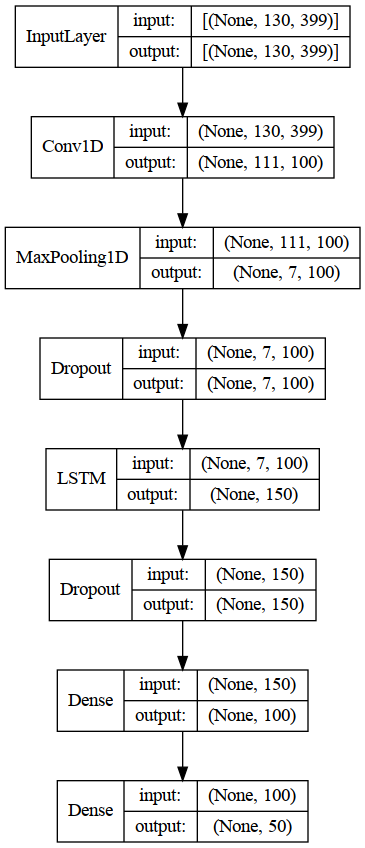

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

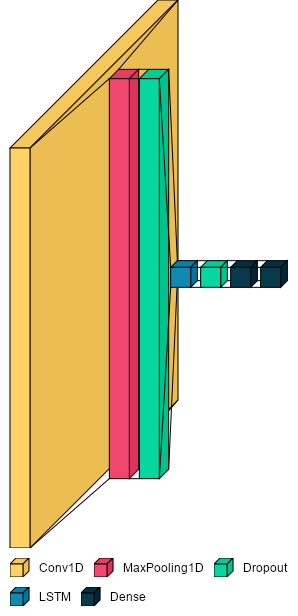

In [129]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [130]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/1_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0717 summary
Hyperparameters:
dense_activation: selu
filters_1: 100
kernel_1: 20
pool_1: 15
dropout_1: 0.55
units_1: 150
regularizer: 0.0024305409582891496
dropout_2: 0.5
units_2: 100
learning_rate: 0.00010335966296352788
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0705
Score: 0.6883143484592438

Trial 0714 summary
Hyperparameters:
dense_activation: elu
filters_1: 200
kernel_1: 10
pool_1: 5
dropout_1: 0.65
units_1: 125
regularizer: 0.0034365682734906543
dropout_2: 0.1
units_2: 110
learning_rate: 0.00015386971155916857
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0711
Score: 0.6740089356899261

Trial 0670 summary
Hyperparameters:
dense_activation: mish
filters_1: 175
kernel_1: 5
pool_1: 15
dropout_1: 0.4
units_1: 200
regularize

In [131]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 55ms/step - loss: 1.3643 - f1_score: 0.6908


In [132]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 17ms/step - loss: 0.4791 - f1_score: 0.9052


In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.333     0.200     0.250        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.375     0.545         8
   BREAKFAST      0.500     0.667     0.571         6
      CANCER      0.667     1.000     0.800         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      1.000     0.333     0.500         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.250     0.167     0.200         6
      DECIDE      0.714     0.833     0.769         6
      DEMAND      1.000     0.875     0.933         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      0.667     1.000     0.800         8
         DOG      0.222    

In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='1 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [137]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 7s 112ms/step - loss: 4.4356 - f1_score: 0.0184 - val_loss: 4.3240 - val_f1_score: 0.0030
Epoch 2/500
28/28 [==============================] - 2s 81ms/step - loss: 4.4153 - f1_score: 0.0198 - val_loss: 4.3213 - val_f1_score: 0.0013
Epoch 3/500
28/28 [==============================] - 2s 82ms/step - loss: 4.3907 - f1_score: 0.0162 - val_loss: 4.3019 - val_f1_score: 0.0017
Epoch 4/500
28/28 [==============================] - 2s 82ms/step - loss: 4.3770 - f1_score: 0.0186 - val_loss: 4.2881 - val_f1_score: 0.0145
Epoch 5/500
28/28 [==============================] - 2s 82ms/step - loss: 4.3678 - f1_score: 0.0217 - val_loss: 4.2829 - val_f1_score: 0.0030
Epoch 6/500
28/28 [==============================] - 2s 83ms/step - loss: 4.3621 - f1_score: 0.0207 - val_loss: 4.2636 - val_f1_score: 0.0075
Epoch 7/500
28/28 [==============================] - 2s 82ms/step - loss: 4.3277 - f1_score: 0.0168 - val_loss: 4

28/28 [==============================] - 2s 89ms/step - loss: 1.8796 - f1_score: 0.4589 - val_loss: 1.9215 - val_f1_score: 0.4580
Epoch 116/500
28/28 [==============================] - 2s 87ms/step - loss: 1.8425 - f1_score: 0.4828 - val_loss: 1.9344 - val_f1_score: 0.4433
Epoch 117/500
28/28 [==============================] - 3s 91ms/step - loss: 1.8589 - f1_score: 0.4586 - val_loss: 1.9798 - val_f1_score: 0.4654
Epoch 118/500
28/28 [==============================] - 2s 86ms/step - loss: 1.8143 - f1_score: 0.4752 - val_loss: 1.9789 - val_f1_score: 0.4458
Epoch 119/500
28/28 [==============================] - 2s 88ms/step - loss: 1.8454 - f1_score: 0.4732 - val_loss: 1.9421 - val_f1_score: 0.4571
Epoch 120/500
28/28 [==============================] - 2s 86ms/step - loss: 1.8021 - f1_score: 0.4796 - val_loss: 1.9461 - val_f1_score: 0.4666
Epoch 121/500
28/28 [==============================] - 2s 89ms/step - loss: 1.8181 - f1_score: 0.4822 - val_loss: 1.8714 - val_f1_score: 0.4723
Epoch 

Epoch 172/500
28/28 [==============================] - 2s 88ms/step - loss: 1.4245 - f1_score: 0.5880 - val_loss: 1.7363 - val_f1_score: 0.5342
Epoch 173/500
28/28 [==============================] - 3s 91ms/step - loss: 1.4114 - f1_score: 0.5913 - val_loss: 1.6339 - val_f1_score: 0.5663
Epoch 174/500
28/28 [==============================] - 2s 85ms/step - loss: 1.4216 - f1_score: 0.5882 - val_loss: 1.5643 - val_f1_score: 0.5711
Epoch 175/500
28/28 [==============================] - 3s 91ms/step - loss: 1.4175 - f1_score: 0.5955 - val_loss: 1.6618 - val_f1_score: 0.5738
Epoch 176/500
28/28 [==============================] - 2s 86ms/step - loss: 1.4189 - f1_score: 0.5870 - val_loss: 1.6897 - val_f1_score: 0.5576
Epoch 177/500
28/28 [==============================] - 2s 87ms/step - loss: 1.4320 - f1_score: 0.5857 - val_loss: 1.6154 - val_f1_score: 0.5493
Epoch 178/500
28/28 [==============================] - 2s 87ms/step - loss: 1.4147 - f1_score: 0.5928 - val_loss: 1.5737 - val_f1_score:

Epoch 229/500
28/28 [==============================] - 2s 89ms/step - loss: 1.1392 - f1_score: 0.6606 - val_loss: 1.4678 - val_f1_score: 0.6151
Epoch 230/500
28/28 [==============================] - 3s 94ms/step - loss: 1.1634 - f1_score: 0.6623 - val_loss: 1.4755 - val_f1_score: 0.6098
Epoch 231/500
28/28 [==============================] - 3s 91ms/step - loss: 1.1148 - f1_score: 0.6866 - val_loss: 1.4578 - val_f1_score: 0.6318
Epoch 232/500
28/28 [==============================] - 2s 89ms/step - loss: 1.1170 - f1_score: 0.6709 - val_loss: 1.4112 - val_f1_score: 0.6308
Epoch 233/500
28/28 [==============================] - 2s 87ms/step - loss: 1.1192 - f1_score: 0.6800 - val_loss: 1.4321 - val_f1_score: 0.6444
Epoch 234/500
28/28 [==============================] - 2s 89ms/step - loss: 1.1275 - f1_score: 0.6814 - val_loss: 1.4605 - val_f1_score: 0.6202
Epoch 235/500
28/28 [==============================] - 2s 87ms/step - loss: 1.1117 - f1_score: 0.6816 - val_loss: 1.4811 - val_f1_score:

Epoch 286/500
28/28 [==============================] - 2s 86ms/step - loss: 0.9193 - f1_score: 0.7321 - val_loss: 1.3456 - val_f1_score: 0.6739
Epoch 287/500
28/28 [==============================] - 2s 89ms/step - loss: 0.9212 - f1_score: 0.7352 - val_loss: 1.3385 - val_f1_score: 0.6710
Epoch 288/500
28/28 [==============================] - 2s 87ms/step - loss: 0.9005 - f1_score: 0.7512 - val_loss: 1.3558 - val_f1_score: 0.6702
Epoch 289/500
28/28 [==============================] - 2s 88ms/step - loss: 0.9403 - f1_score: 0.7193 - val_loss: 1.3808 - val_f1_score: 0.6310
Epoch 290/500
28/28 [==============================] - 2s 88ms/step - loss: 0.8969 - f1_score: 0.7360 - val_loss: 1.3583 - val_f1_score: 0.6593
Epoch 291/500
28/28 [==============================] - 2s 88ms/step - loss: 0.9146 - f1_score: 0.7437 - val_loss: 1.3972 - val_f1_score: 0.6158
Epoch 292/500
28/28 [==============================] - 2s 87ms/step - loss: 0.9279 - f1_score: 0.7317 - val_loss: 1.4241 - val_f1_score:

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 452ms/step - loss: 0.8773 - f1_score: 0.7468 - val_loss: 1.3107 - val_f1_score: 0.6966
Epoch 303/500
28/28 [==============================] - 2s 84ms/step - loss: 0.8741 - f1_score: 0.7599 - val_loss: 1.3828 - val_f1_score: 0.6639
Epoch 304/500
28/28 [==============================] - 2s 83ms/step - loss: 0.9145 - f1_score: 0.7453 - val_loss: 1.3253 - val_f1_score: 0.6853
Epoch 305/500
28/28 [==============================] - 2s 86ms/step - loss: 0.8884 - f1_score: 0.7427 - val_loss: 1.3883 - val_f1_score: 0.6204
Epoch 306/500
28/28 [==============================] - 2s 85ms/step - loss: 0.8657 - f1_score: 0.7506 - val_loss: 1.3681 - val_f1_score: 0.6678
Epoch 307/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8670 - f1_score: 0.7553 - val_loss: 1.2898 - val_f1_score: 0.6903
Epoch 308/500
28/28 [==============================] - 2s 89ms/step - loss: 0.8367 - f1_score: 0.7616 - val_loss: 1.3511 - val_f1_score: 0.6699
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 463ms/step - loss: 0.7636 - f1_score: 0.7828 - val_loss: 1.2866 - val_f1_score: 0.7006
Epoch 353/500
28/28 [==============================] - 2s 83ms/step - loss: 0.7588 - f1_score: 0.7717 - val_loss: 1.3445 - val_f1_score: 0.6599
Epoch 354/500
28/28 [==============================] - 2s 88ms/step - loss: 0.7406 - f1_score: 0.7923 - val_loss: 1.3391 - val_f1_score: 0.6839
Epoch 355/500
28/28 [==============================] - 2s 84ms/step - loss: 0.7447 - f1_score: 0.7800 - val_loss: 1.3296 - val_f1_score: 0.6670
Epoch 356/500
28/28 [==============================] - 2s 87ms/step - loss: 0.7257 - f1_score: 0.7920 - val_loss: 1.3993 - val_f1_score: 0.6650
Epoch 357/500
28/28 [==============================] - 2s 85ms/step - loss: 0.7646 - f1_score: 0.7785 - val_loss: 1.3337 - val_f1_score: 0.6670
Epoch 358/500
28/28 [==============================] - 2s 85ms/step - loss: 0.7592 - f1_score: 0.7862 - val_loss: 1.3081 - val_f1_score: 0.6917
Epoc

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 455ms/step - loss: 0.6820 - f1_score: 0.8082 - val_loss: 1.2712 - val_f1_score: 0.7115
Epoch 378/500
28/28 [==============================] - 2s 84ms/step - loss: 0.6966 - f1_score: 0.8023 - val_loss: 1.2612 - val_f1_score: 0.6901
Epoch 379/500
28/28 [==============================] - 2s 84ms/step - loss: 0.7164 - f1_score: 0.7946 - val_loss: 1.2773 - val_f1_score: 0.6789
Epoch 380/500
28/28 [==============================] - 2s 85ms/step - loss: 0.6783 - f1_score: 0.8108 - val_loss: 1.3269 - val_f1_score: 0.6718
Epoch 381/500
28/28 [==============================] - 2s 86ms/step - loss: 0.7105 - f1_score: 0.7973 - val_loss: 1.2831 - val_f1_score: 0.6672
Epoch 382/500
28/28 [==============================] - 2s 85ms/step - loss: 0.6983 - f1_score: 0.8045 - val_loss: 1.2948 - val_f1_score: 0.7023
Epoch 383/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6866 - f1_score: 0.7981 - val_loss: 1.3218 - val_f1_score: 0.6554
Epoc

Epoch 434/500
28/28 [==============================] - 2s 89ms/step - loss: 0.6101 - f1_score: 0.8288 - val_loss: 1.3585 - val_f1_score: 0.6594
Epoch 435/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5994 - f1_score: 0.8242 - val_loss: 1.3180 - val_f1_score: 0.6906
Epoch 436/500
28/28 [==============================] - 2s 88ms/step - loss: 0.6171 - f1_score: 0.8337 - val_loss: 1.2721 - val_f1_score: 0.6772
Epoch 437/500
28/28 [==============================] - 2s 86ms/step - loss: 0.6110 - f1_score: 0.8244 - val_loss: 1.2700 - val_f1_score: 0.6864
Epoch 438/500
28/28 [==============================] - 2s 88ms/step - loss: 0.5842 - f1_score: 0.8291 - val_loss: 1.2658 - val_f1_score: 0.6967
Epoch 439/500
28/28 [==============================] - 2s 88ms/step - loss: 0.5965 - f1_score: 0.8266 - val_loss: 1.3007 - val_f1_score: 0.6761
Epoch 440/500
28/28 [==============================] - 2s 87ms/step - loss: 0.6048 - f1_score: 0.8314 - val_loss: 1.2901 - val_f1_score:

Epoch 491/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5176 - f1_score: 0.8555 - val_loss: 1.3295 - val_f1_score: 0.6945
Epoch 492/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5239 - f1_score: 0.8536 - val_loss: 1.3537 - val_f1_score: 0.6642
Epoch 493/500
28/28 [==============================] - 2s 89ms/step - loss: 0.5186 - f1_score: 0.8505 - val_loss: 1.3682 - val_f1_score: 0.6644
Epoch 494/500
28/28 [==============================] - 2s 86ms/step - loss: 0.5145 - f1_score: 0.8633 - val_loss: 1.3180 - val_f1_score: 0.7008
Epoch 495/500
28/28 [==============================] - ETA: 0s - loss: 0.5023 - f1_score: 0.8624

INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 1 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 458ms/step - loss: 0.5023 - f1_score: 0.8624 - val_loss: 1.3088 - val_f1_score: 0.7160
Epoch 496/500
28/28 [==============================] - 2s 83ms/step - loss: 0.5329 - f1_score: 0.8574 - val_loss: 1.2885 - val_f1_score: 0.7037
Epoch 497/500
28/28 [==============================] - 2s 85ms/step - loss: 0.5134 - f1_score: 0.8633 - val_loss: 1.3344 - val_f1_score: 0.6937
Epoch 498/500
28/28 [==============================] - 2s 84ms/step - loss: 0.4917 - f1_score: 0.8663 - val_loss: 1.3113 - val_f1_score: 0.6939
Epoch 499/500
28/28 [==============================] - 2s 86ms/step - loss: 0.4993 - f1_score: 0.8677 - val_loss: 1.3438 - val_f1_score: 0.6734
Epoch 500/500
28/28 [==============================] - 2s 85ms/step - loss: 0.4917 - f1_score: 0.8689 - val_loss: 1.5052 - val_f1_score: 0.6657


In [139]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '1 1DCNN + 1 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [140]:
hist_df = pd.read_csv('1 1DCNN + 1 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.532888  0.857369  1.288532      0.703691
496  0.513433  0.863328  1.334399      0.693652
497  0.491707  0.866338  1.311290      0.693930
498  0.499303  0.867664  1.343791      0.673372
499  0.491679  0.868873  1.505212      0.665673

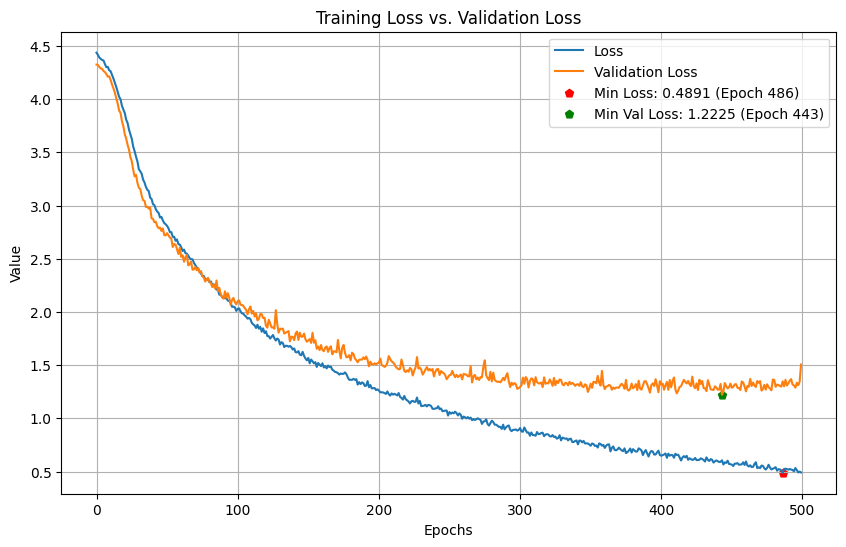

In [141]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

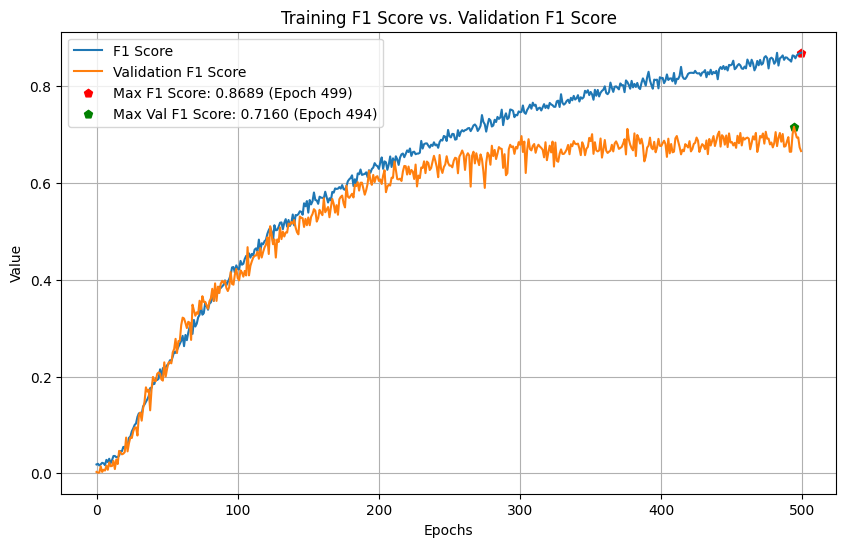

In [142]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [138]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

         AXE      1.000     0.750     0.857         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      0.000     0.000     0.000        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      0.400     0.667     0.500         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      0.857     1.000     0.923         6
    CONFUSED      0.333     0.667     0.444         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.429     0.500     0.462         6
      DECIDE      0.600     0.500     0.545         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      0.833     0.625     0.714         8
         DOG      0.750    

In [131]:
reconstructed_model = tf.keras.models.load_model("1 1DCNN + 1 LSTM")

In [132]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 111, 100)          798100    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 100)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               150600    
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                      

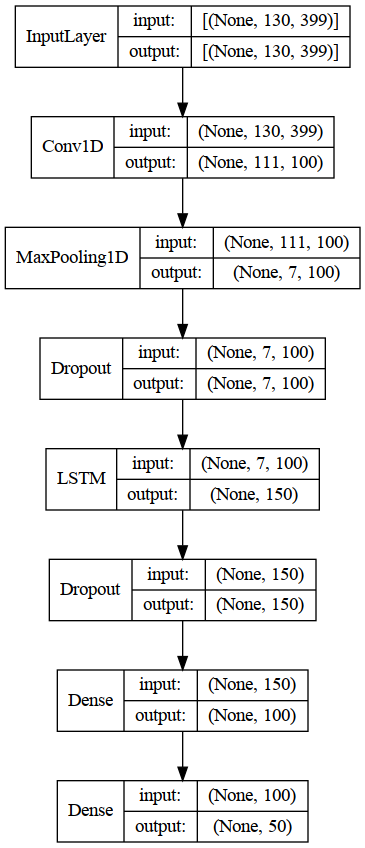

In [133]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

In [134]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 15ms/step - loss: 1.3088 - f1_score: 0.7160


[1.3088107109069824, 0.7160443067550659]

In [135]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-23 17:44:11.761292: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.
2023-09-23 17:44:12.232962: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 14ms/step - loss: 0.1758 - f1_score: 0.9853


[0.17579667270183563, 0.9852896332740784]

In [136]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         AXE      0.889     1.000     0.941         8
    BACKPACK      0.600     1.000     0.750         6
  BASKETBALL      0.833     1.000     0.909        10
         BEE      1.000     0.100     0.182        10
        BELT      1.000     1.000     1.000         4
        BITE      1.000     0.875     0.933         8
   BREAKFAST      0.500     0.833     0.625         6
      CANCER      0.889     1.000     0.941         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.400     0.667     0.500         6
        DARK      0.667     1.000     0.800         4
        DEAF      0.364     0.667     0.471         6
      DECIDE      0.500     0.333     0.400         6
      DEMAND      0.857     0.750     0.800         8
     DEVELOP      0.800     0.667     0.727         6
      DINNER      0.727     1.000     0.842         8
         DOG      0.667    

## Hyperparameter Tuning 2 1D CNN Layer + 1 LSTM

In [119]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_1254069/1222377179.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [120]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import keras_tuner
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa


class HyperModel(HyperModel):

    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice(
            'dense_activation',
            values=['selu', 'mish', 'gelu', 'elu', 'relu'],
            default='relu')
        model = Sequential()
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_1',
                       values=[3, 4, 5, 6, 7, 8, 9, 10],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_1',
                values=[3, 4, 5, 6, 7, 8, 9, 10],
                default=5,
            )))
        model.add(
            Conv1D(filters=hp.Int('filters_1',
                                  min_value=50,
                                  max_value=200,
                                  step=25,
                                  default=150),
                   kernel_size=hp.Choice(
                       'kernel_2',
                       values=[1, 2, 3, 4, 5],
                       default=5,
                   ),
                   activation=act_function,
                   input_shape=self.input_shape))
        model.add(
            MaxPooling1D(pool_size=hp.Choice(
                'pool_2',
                values=[1, 2, 3, 4, 5],
                default=5,
            )))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.9,
                default=0.8,
                step=0.05,
            )))
        model.add(
            LSTM(units=hp.Int('units_1',
                              min_value=50,
                              max_value=200,
                              step=25,
                              default=100),
                 return_sequences=False,
                 kernel_regularizer=regularizers.l2(
                     hp.Float('regularizer',
                              min_value=1e-4,
                              max_value=1e-2,
                              sampling='LOG',
                              default=.001))))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.9,
                default=0.7,
                step=0.05,
            )))
        model.add(
            Dense(units=hp.Int('units_2',
                               min_value=70,
                               max_value=120,
                               step=10,
                               default=80),
                  activation=act_function))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            tf.optimizers.experimental.Nadam(
                hp.Float('learning_rate',
                         min_value=1e-4,
                         max_value=1e-2,
                         sampling='LOG',
                         default=.00062198175395800846)),
            loss='categorical_crossentropy',
            metrics=[tfa.metrics.F1Score(num_classes=50, average='macro')])
        return model


hypermodel = HyperModel(input_shape=(130, 399), num_classes=50)

In [121]:
HYPERBAND_MAX_EPOCHS = 300
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective=keras_tuner.Objective("val_f1_score", direction="max"),
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='/media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/',
    project_name='2_1D_CNN+1_LSTM',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_1D_CNN+1_LSTM/tuner0.json


In [122]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['selu', 'mish', 'gelu', 'elu', 'relu'], 'ordered': False}
filters_1 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
kernel_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pool_1 (Choice)
{'default': 5, 'conditions': [], 'values': [3, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
kernel_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
pool_2 (Choice)
{'default': 5, 'conditions': [], 'values': [1, 2, 3, 4, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.8, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.05, 'sampling': 'linear'}
units_1 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
regularizer (Float)
{'default': 0.001, 'conditions': [], 

In [123]:
es = EarlyStopping(monitor="val_f1_score",
                   patience=30,
                   restore_best_weights=True,
                   mode="max")

In [125]:
tuner.search(Xtrain,
             Ytrain,
             epochs=1000,
             validation_data=(Xval, Yval),
             batch_size=96,
             callbacks=[es])

Trial 725 Complete [00h 04m 43s]
val_f1_score: 0.5450175553560257

Best val_f1_score So Far: 0.7170855700969696
Total elapsed time: 04h 17m 57s
INFO:tensorflow:Oracle triggered exit


In [126]:
best_model = tuner.get_best_models(num_models=10)[0]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=100.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 125)          149750    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 125)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 125)           78250     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 125)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 125)            0         
                                                                 
 lstm (LSTM)                 (None, 50)                3

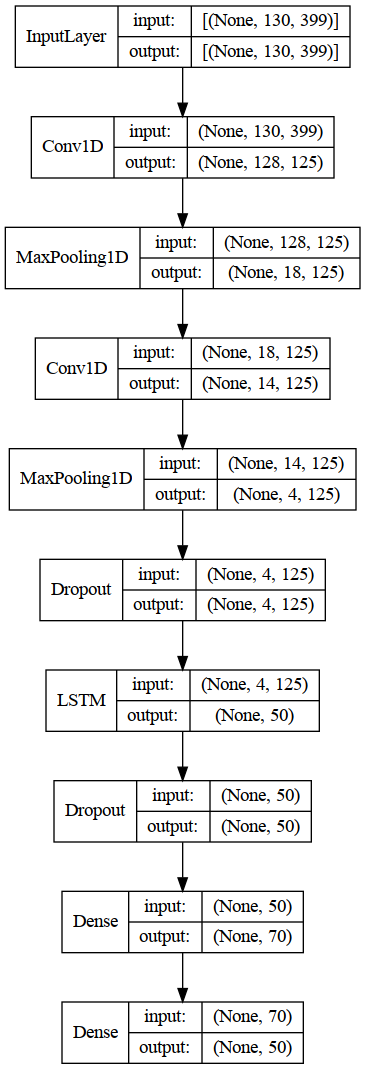

In [128]:
plot_model(best_model, show_shapes=True, show_layer_names=False)

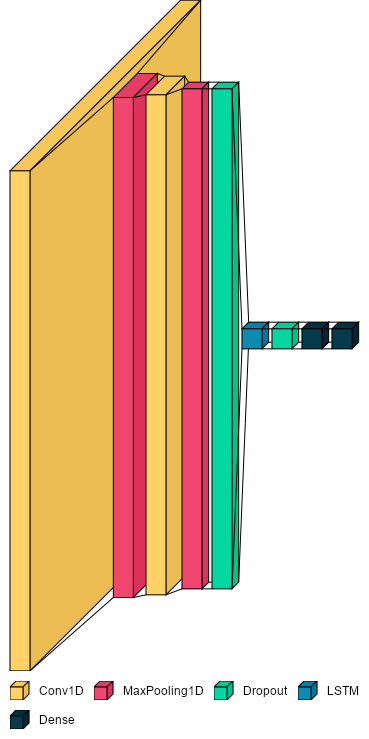

In [129]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(best_model, legend=True, font=font)

In [130]:
tuner.results_summary()

Results summary
Results in /media/kristian/HDD/ASL_Citizen/CSPNext/hyperband/2_1D_CNN+1_LSTM
Showing 10 best trials
Objective(name="val_f1_score", direction="max")

Trial 0670 summary
Hyperparameters:
dense_activation: mish
filters_1: 125
kernel_1: 3
pool_1: 7
kernel_2: 5
pool_2: 3
dropout_1: 0.25
units_1: 50
regularizer: 0.0003910489889455808
dropout_2: 0.30000000000000004
units_2: 70
learning_rate: 0.0007539027884617362
tuner/epochs: 300
tuner/initial_epoch: 100
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0666
Score: 0.7170855700969696

Trial 0666 summary
Hyperparameters:
dense_activation: mish
filters_1: 125
kernel_1: 3
pool_1: 7
kernel_2: 5
pool_2: 3
dropout_1: 0.25
units_1: 50
regularizer: 0.0003910489889455808
dropout_2: 0.30000000000000004
units_2: 70
learning_rate: 0.0007539027884617362
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0653
Score: 0.7117784321308136

Trial 0426 summary
Hyperparameters:
dense_activation: gelu
filters_1

In [131]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 13ms/step - loss: 1.4066 - f1_score: 0.7179


In [132]:
loss, accuracy = best_model.evaluate(Xtrain, Ytrain)

84/84 [==============================] - 1s 10ms/step - loss: 0.0779 - f1_score: 1.0000


In [133]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(best_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.769     1.000     0.870        10
         BEE      0.714     0.500     0.588        10
        BELT      1.000     1.000     1.000         4
        BITE      0.714     0.625     0.667         8
   BREAKFAST      0.667     0.333     0.444         6
      CANCER      0.800     1.000     0.889         8
   CHRISTMAS      0.833     0.833     0.833         6
    CONFUSED      0.667     0.667     0.667         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.667     0.333     0.444         6
      DECIDE      1.000     1.000     1.000         6
      DEMAND      1.000     0.500     0.667         8
     DEVELOP      0.667     0.667     0.667         6
      DINNER      1.000     0.750     0.857         8
         DOG      0.111     

In [134]:
bestHP = tuner.get_best_hyperparameters(num_trials=10)[0]

In [135]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='2 1DCNN + 1 LSTM/',
    monitor='val_f1_score',
    mode='max',
    save_best_only=True)

In [137]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain,
                    y=Ytrain,
                    validation_data=(Xval, Yval),
                    batch_size=96,
                    epochs=500,
                    verbose=1,
                    callbacks=[model_checkpoint_callback])

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 7s 78ms/step - loss: 3.9809 - f1_score: 0.0137 - val_loss: 3.9679 - val_f1_score: 0.0011
Epoch 2/500
28/28 [==============================] - 1s 44ms/step - loss: 3.9669 - f1_score: 0.0120 - val_loss: 3.9486 - val_f1_score: 9.7859e-04
Epoch 3/500
28/28 [==============================] - 1s 44ms/step - loss: 3.9469 - f1_score: 0.0133 - val_loss: 3.9275 - val_f1_score: 0.0037
Epoch 4/500
28/28 [==============================] - 1s 45ms/step - loss: 3.8871 - f1_score: 0.0173 - val_loss: 3.7740 - val_f1_score: 0.0160
Epoch 5/500
28/28 [==============================] - 1s 45ms/step - loss: 3.7029 - f1_score: 0.0230 - val_loss: 3.5648 - val_f1_score: 0.0218
Epoch 6/500
28/28 [==============================] - 1s 44ms/step - loss: 3.4790 - f1_score: 0.0423 - val_loss: 3.4204 - val_f1_score: 0.0237
Epoch 7/500
28/28 [==============================] - 1s 44ms/step - loss: 3.2767 - f1_score: 0.0639 - val_loss

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 450ms/step - loss: 0.6737 - f1_score: 0.8015 - val_loss: 1.3422 - val_f1_score: 0.6897
Epoch 57/500
28/28 [==============================] - 1s 44ms/step - loss: 0.6888 - f1_score: 0.7971 - val_loss: 1.4094 - val_f1_score: 0.6478
Epoch 58/500
27/28 [===========================>..] - ETA: 0s - loss: 0.6551 - f1_score: 0.7986

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 9s 347ms/step - loss: 0.6575 - f1_score: 0.7975 - val_loss: 1.3844 - val_f1_score: 0.6907
Epoch 59/500
28/28 [==============================] - 1s 44ms/step - loss: 0.6356 - f1_score: 0.8100 - val_loss: 1.3858 - val_f1_score: 0.6580
Epoch 60/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5998 - f1_score: 0.8285 - val_loss: 1.4325 - val_f1_score: 0.6193
Epoch 61/500
28/28 [==============================] - 1s 45ms/step - loss: 0.6222 - f1_score: 0.8151 - val_loss: 1.3884 - val_f1_score: 0.6629
Epoch 62/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5943 - f1_score: 0.8197 - val_loss: 1.3109 - val_f1_score: 0.6868
Epoch 63/500
28/28 [==============================] - 1s 44ms/step - loss: 0.6005 - f1_score: 0.8270 - val_loss: 1.4039 - val_f1_score: 0.6248
Epoch 64/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5786 - f1_score: 0.8259

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 364ms/step - loss: 0.5775 - f1_score: 0.8267 - val_loss: 1.2824 - val_f1_score: 0.6912
Epoch 65/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5603 - f1_score: 0.8341 - val_loss: 1.3403 - val_f1_score: 0.6640
Epoch 66/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5347 - f1_score: 0.8409 - val_loss: 1.4247 - val_f1_score: 0.6415
Epoch 67/500
27/28 [===========================>..] - ETA: 0s - loss: 0.5292 - f1_score: 0.8468

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 373ms/step - loss: 0.5286 - f1_score: 0.8483 - val_loss: 1.3040 - val_f1_score: 0.7020
Epoch 68/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5221 - f1_score: 0.8457 - val_loss: 1.3631 - val_f1_score: 0.6742
Epoch 69/500
28/28 [==============================] - 1s 44ms/step - loss: 0.5376 - f1_score: 0.8395 - val_loss: 1.3264 - val_f1_score: 0.6920
Epoch 70/500
28/28 [==============================] - 1s 44ms/step - loss: 0.4961 - f1_score: 0.8564 - val_loss: 1.3551 - val_f1_score: 0.6463
Epoch 71/500
28/28 [==============================] - 1s 46ms/step - loss: 0.4736 - f1_score: 0.8608 - val_loss: 1.3778 - val_f1_score: 0.6766
Epoch 72/500
28/28 [==============================] - 1s 44ms/step - loss: 0.4934 - f1_score: 0.8508 - val_loss: 1.4823 - val_f1_score: 0.6551
Epoch 73/500
28/28 [==============================] - 1s 44ms/step - loss: 0.4904 - f1_score: 0.8619 - val_loss: 1.3914 - val_f1_score: 0.6519
Epoch 74/5

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 10s 380ms/step - loss: 0.3931 - f1_score: 0.8912 - val_loss: 1.3462 - val_f1_score: 0.7203
Epoch 84/500
28/28 [==============================] - 1s 43ms/step - loss: 0.3831 - f1_score: 0.8936 - val_loss: 1.5060 - val_f1_score: 0.6345
Epoch 85/500
28/28 [==============================] - 1s 44ms/step - loss: 0.3834 - f1_score: 0.8997 - val_loss: 1.4220 - val_f1_score: 0.6624
Epoch 86/500
28/28 [==============================] - 1s 44ms/step - loss: 0.3781 - f1_score: 0.8958 - val_loss: 1.5307 - val_f1_score: 0.6368
Epoch 87/500
28/28 [==============================] - 1s 45ms/step - loss: 0.3571 - f1_score: 0.9069 - val_loss: 1.5358 - val_f1_score: 0.6360
Epoch 88/500
28/28 [==============================] - 1s 44ms/step - loss: 0.3651 - f1_score: 0.8988 - val_loss: 1.5857 - val_f1_score: 0.6333
Epoch 89/500
28/28 [==============================] - 1s 44ms/step - loss: 0.3529 - f1_score: 0.9062 - val_loss: 1.5619 - val_f1_score: 0.6540
Epoch 90/5

28/28 [==============================] - 1s 45ms/step - loss: 0.1859 - f1_score: 0.9606 - val_loss: 1.6252 - val_f1_score: 0.6656
Epoch 141/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1916 - f1_score: 0.9547 - val_loss: 1.5401 - val_f1_score: 0.6833
Epoch 142/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1903 - f1_score: 0.9585 - val_loss: 1.6200 - val_f1_score: 0.6596
Epoch 143/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1942 - f1_score: 0.9537 - val_loss: 1.6841 - val_f1_score: 0.6516
Epoch 144/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1880 - f1_score: 0.9572 - val_loss: 1.5128 - val_f1_score: 0.6820
Epoch 145/500
28/28 [==============================] - 1s 45ms/step - loss: 0.2129 - f1_score: 0.9425 - val_loss: 1.6529 - val_f1_score: 0.6613
Epoch 146/500
28/28 [==============================] - 1s 45ms/step - loss: 0.2395 - f1_score: 0.9361 - val_loss: 1.5059 - val_f1_score: 0.6809
Epoch 

Epoch 197/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1329 - f1_score: 0.9720 - val_loss: 1.6496 - val_f1_score: 0.6594
Epoch 198/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1264 - f1_score: 0.9745 - val_loss: 1.7966 - val_f1_score: 0.6607
Epoch 199/500
28/28 [==============================] - 1s 46ms/step - loss: 0.1308 - f1_score: 0.9677 - val_loss: 1.8132 - val_f1_score: 0.6765
Epoch 200/500
28/28 [==============================] - 2s 54ms/step - loss: 0.1603 - f1_score: 0.9606 - val_loss: 1.6273 - val_f1_score: 0.6785
Epoch 201/500
28/28 [==============================] - 1s 52ms/step - loss: 0.1520 - f1_score: 0.9664 - val_loss: 1.8385 - val_f1_score: 0.6467
Epoch 202/500
28/28 [==============================] - 2s 57ms/step - loss: 0.1588 - f1_score: 0.9630 - val_loss: 1.8703 - val_f1_score: 0.6413
Epoch 203/500
28/28 [==============================] - 2s 56ms/step - loss: 0.1550 - f1_score: 0.9668 - val_loss: 1.8251 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 12s 441ms/step - loss: 0.1271 - f1_score: 0.9702 - val_loss: 1.7001 - val_f1_score: 0.7232
Epoch 221/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1319 - f1_score: 0.9698 - val_loss: 1.9265 - val_f1_score: 0.6663
Epoch 222/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1248 - f1_score: 0.9755 - val_loss: 2.1418 - val_f1_score: 0.6429
Epoch 223/500
28/28 [==============================] - 1s 44ms/step - loss: 0.1646 - f1_score: 0.9601 - val_loss: 2.0957 - val_f1_score: 0.6511
Epoch 224/500
28/28 [==============================] - 1s 47ms/step - loss: 0.1506 - f1_score: 0.9617 - val_loss: 1.7578 - val_f1_score: 0.6885
Epoch 225/500
28/28 [==============================] - 1s 47ms/step - loss: 0.1342 - f1_score: 0.9710 - val_loss: 1.8540 - val_f1_score: 0.6587
Epoch 226/500
28/28 [==============================] - 1s 46ms/step - loss: 0.1196 - f1_score: 0.9752 - val_loss: 1.8548 - val_f1_score: 0.6699
Epoc

Epoch 277/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0983 - f1_score: 0.9823 - val_loss: 1.8973 - val_f1_score: 0.6681
Epoch 278/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0917 - f1_score: 0.9818 - val_loss: 1.8696 - val_f1_score: 0.6739
Epoch 279/500
28/28 [==============================] - 1s 51ms/step - loss: 0.1134 - f1_score: 0.9745 - val_loss: 2.0174 - val_f1_score: 0.6826
Epoch 280/500
28/28 [==============================] - 1s 50ms/step - loss: 0.1078 - f1_score: 0.9782 - val_loss: 1.8406 - val_f1_score: 0.6771
Epoch 281/500
28/28 [==============================] - 1s 47ms/step - loss: 0.1133 - f1_score: 0.9780 - val_loss: 1.8213 - val_f1_score: 0.6626
Epoch 282/500
28/28 [==============================] - 1s 47ms/step - loss: 0.1038 - f1_score: 0.9776 - val_loss: 2.0671 - val_f1_score: 0.6387
Epoch 283/500
28/28 [==============================] - 1s 52ms/step - loss: 0.0904 - f1_score: 0.9861 - val_loss: 1.9008 - val_f1_score:

Epoch 334/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1068 - f1_score: 0.9779 - val_loss: 1.8440 - val_f1_score: 0.7096
Epoch 335/500
28/28 [==============================] - 1s 46ms/step - loss: 0.1109 - f1_score: 0.9763 - val_loss: 1.9484 - val_f1_score: 0.7108
Epoch 336/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1115 - f1_score: 0.9729 - val_loss: 1.7687 - val_f1_score: 0.7058
Epoch 337/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0858 - f1_score: 0.9840 - val_loss: 1.8176 - val_f1_score: 0.7005
Epoch 338/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0817 - f1_score: 0.9880 - val_loss: 1.8456 - val_f1_score: 0.7101
Epoch 339/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1017 - f1_score: 0.9789 - val_loss: 2.0383 - val_f1_score: 0.6705
Epoch 340/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0981 - f1_score: 0.9793 - val_loss: 1.9608 - val_f1_score:

Epoch 391/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0705 - f1_score: 0.9884 - val_loss: 2.0024 - val_f1_score: 0.6957
Epoch 392/500
28/28 [==============================] - 1s 51ms/step - loss: 0.0898 - f1_score: 0.9791 - val_loss: 2.0331 - val_f1_score: 0.6722
Epoch 393/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0835 - f1_score: 0.9803 - val_loss: 2.1148 - val_f1_score: 0.6939
Epoch 394/500
28/28 [==============================] - 1s 50ms/step - loss: 0.0889 - f1_score: 0.9800 - val_loss: 2.1409 - val_f1_score: 0.6483
Epoch 395/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0709 - f1_score: 0.9894 - val_loss: 1.9806 - val_f1_score: 0.6966
Epoch 396/500
28/28 [==============================] - 1s 46ms/step - loss: 0.1002 - f1_score: 0.9735 - val_loss: 2.0693 - val_f1_score: 0.6888
Epoch 397/500
28/28 [==============================] - 1s 45ms/step - loss: 0.1093 - f1_score: 0.9735 - val_loss: 2.0000 - val_f1_score:

Epoch 448/500
28/28 [==============================] - 2s 56ms/step - loss: 0.0965 - f1_score: 0.9774 - val_loss: 2.1836 - val_f1_score: 0.6733
Epoch 449/500
28/28 [==============================] - 3s 96ms/step - loss: 0.0968 - f1_score: 0.9791 - val_loss: 2.0155 - val_f1_score: 0.6937
Epoch 450/500
28/28 [==============================] - 2s 74ms/step - loss: 0.0856 - f1_score: 0.9771 - val_loss: 1.9881 - val_f1_score: 0.6755
Epoch 451/500
28/28 [==============================] - 2s 64ms/step - loss: 0.0768 - f1_score: 0.9843 - val_loss: 1.9516 - val_f1_score: 0.6791
Epoch 452/500
28/28 [==============================] - 2s 60ms/step - loss: 0.0776 - f1_score: 0.9827 - val_loss: 2.0388 - val_f1_score: 0.7035
Epoch 453/500
28/28 [==============================] - 1s 53ms/step - loss: 0.0828 - f1_score: 0.9792 - val_loss: 2.0324 - val_f1_score: 0.6759
Epoch 454/500
28/28 [==============================] - 2s 55ms/step - loss: 0.1020 - f1_score: 0.9774 - val_loss: 2.2051 - val_f1_score:

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 13s 487ms/step - loss: 0.0723 - f1_score: 0.9864 - val_loss: 1.7508 - val_f1_score: 0.7237
Epoch 467/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0664 - f1_score: 0.9884 - val_loss: 2.1435 - val_f1_score: 0.7025
Epoch 468/500
28/28 [==============================] - 1s 48ms/step - loss: 0.0603 - f1_score: 0.9894 - val_loss: 1.8909 - val_f1_score: 0.7096
Epoch 469/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0520 - f1_score: 0.9922 - val_loss: 2.0262 - val_f1_score: 0.6963
Epoch 470/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0648 - f1_score: 0.9873 - val_loss: 2.1175 - val_f1_score: 0.6814
Epoch 471/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0750 - f1_score: 0.9864 - val_loss: 1.8964 - val_f1_score: 0.7171
Epoch 472/500
28/28 [==============================] - 1s 47ms/step - loss: 0.0707 - f1_score: 0.9864 - val_loss: 2.0560 - val_f1_score: 0.6959
Epoc

INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


INFO:tensorflow:Assets written to: 2 1DCNN + 1 LSTM/assets


28/28 [==============================] - 11s 397ms/step - loss: 0.0846 - f1_score: 0.9828 - val_loss: 1.8662 - val_f1_score: 0.7381
Epoch 481/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0732 - f1_score: 0.9843 - val_loss: 1.9357 - val_f1_score: 0.6882
Epoch 482/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0705 - f1_score: 0.9899 - val_loss: 2.0426 - val_f1_score: 0.6763
Epoch 483/500
28/28 [==============================] - 1s 45ms/step - loss: 0.0588 - f1_score: 0.9923 - val_loss: 2.1107 - val_f1_score: 0.6805
Epoch 484/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0686 - f1_score: 0.9857 - val_loss: 2.1499 - val_f1_score: 0.6887
Epoch 485/500
28/28 [==============================] - 1s 46ms/step - loss: 0.0732 - f1_score: 0.9834 - val_loss: 2.0775 - val_f1_score: 0.7069
Epoch 486/500
28/28 [==============================] - 1s 44ms/step - loss: 0.0605 - f1_score: 0.9888 - val_loss: 1.9203 - val_f1_score: 0.7226
Epoc

In [138]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.429     0.500     0.462         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.667     0.200     0.308        10
        BELT      0.571     1.000     0.727         4
        BITE      0.500     0.375     0.429         8
   BREAKFAST      0.385     0.833     0.526         6
      CANCER      1.000     0.750     0.857         8
   CHRISTMAS      1.000     1.000     1.000         6
    CONFUSED      0.600     0.500     0.545         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.200     0.167     0.182         6
      DECIDE      1.000     0.333     0.500         6
      DEMAND      1.000     0.625     0.769         8
     DEVELOP      0.571     0.667     0.615         6
      DINNER      0.857     0.750     0.800         8
         DOG      0.500     

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(History.history)

hist_csv_file = '2 1DCNN + 1 LSTM/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [140]:
hist_df = pd.read_csv('2 1DCNN + 1 LSTM/history.csv', index_col=0)
hist_df.tail()

loss  f1_score  val_loss  val_f1_score
495  0.065869  0.986549  1.929171      0.715875
496  0.061536  0.989471  2.096670      0.704284
497  0.071398  0.987126  2.179244      0.670726
498  0.086115  0.977866  2.036255      0.644118
499  0.081999  0.981726  2.393304      0.643122

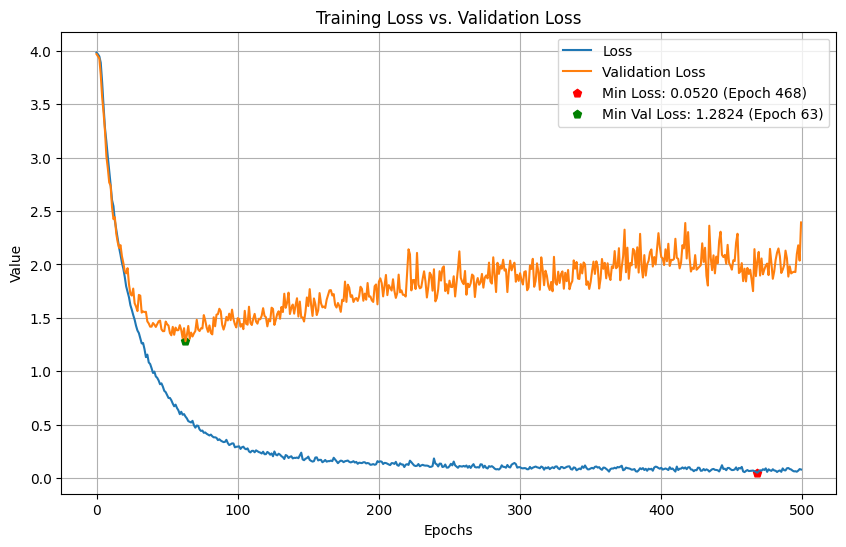

In [141]:
# Find the epoch with the lowest loss and validation loss
min_loss_epoch = hist_df['loss'].idxmin()
min_val_loss_epoch = hist_df['val_loss'].idxmin()

min_loss = hist_df['loss'][min_loss_epoch]
min_val_loss = hist_df['val_loss'][min_val_loss_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.loss, label='Loss')
plt.plot(epochs, hist_df.val_loss, label='Validation Loss')
plt.scatter(min_loss_epoch,
            min_loss,
            c='red',
            marker='p',
            label=f'Min Loss: {min_loss:.4f} (Epoch {min_loss_epoch})')
plt.scatter(
    min_val_loss_epoch,
    min_val_loss,
    c='green',
    marker='p',
    label=f'Min Val Loss: {min_val_loss:.4f} (Epoch {min_val_loss_epoch})')

plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

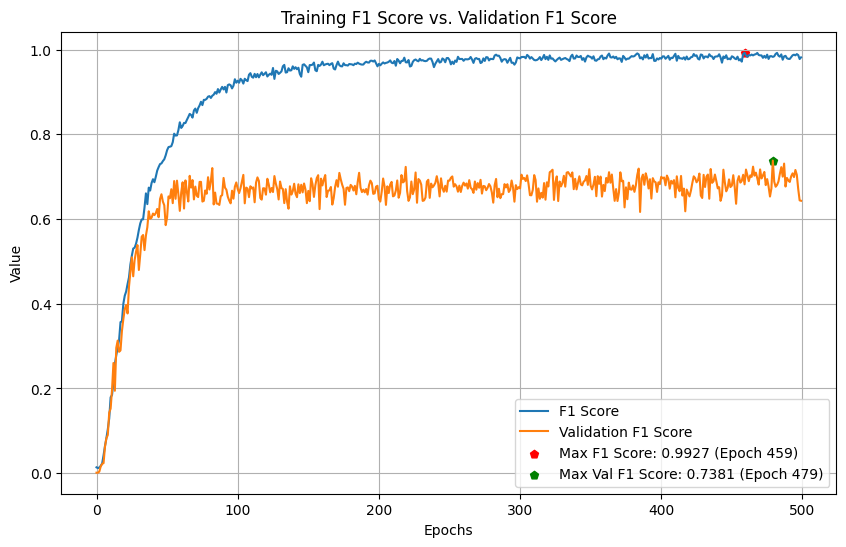

In [142]:
# Find the epoch with the highest F1 Score and Validation F1 Score
max_f1_epoch = hist_df['f1_score'].idxmax()
max_val_f1_epoch = hist_df['val_f1_score'].idxmax()

max_f1 = hist_df['f1_score'][max_f1_epoch]
max_val_f1 = hist_df['val_f1_score'][max_val_f1_epoch]

# Plotting
epochs = range(0, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, hist_df.f1_score, label='F1 Score')
plt.plot(epochs, hist_df.val_f1_score, label='Validation F1 Score')
plt.scatter(max_f1_epoch,
            max_f1,
            c='red',
            marker='p',
            label=f'Max F1 Score: {max_f1:.4f} (Epoch {max_f1_epoch})')
plt.scatter(
    max_val_f1_epoch,
    max_val_f1,
    c='green',
    marker='p',
    label=f'Max Val F1 Score: {max_val_f1:.4f} (Epoch {max_val_f1_epoch})')

plt.title('Training F1 Score vs. Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [138]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 LSTM")

In [139]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 128, 125)          149750    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 18, 125)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 14, 125)           78250     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 125)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 125)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)               

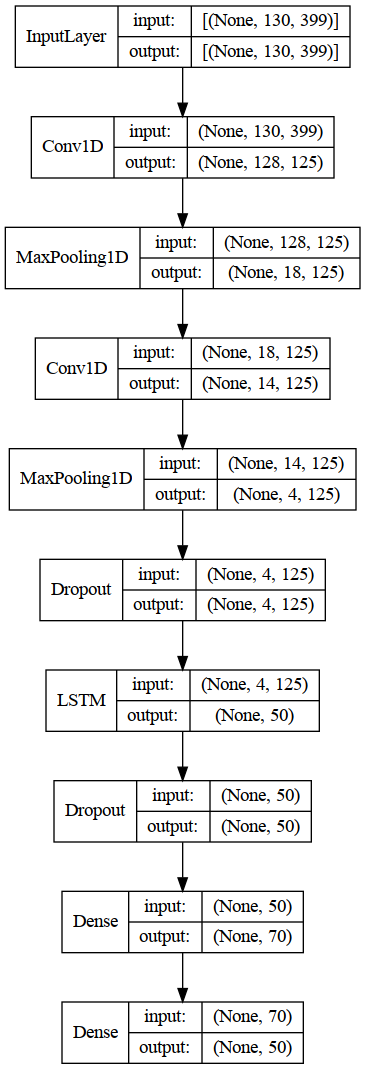

In [140]:
plot_model(reconstructed_model, show_shapes=True, show_layer_names=False)

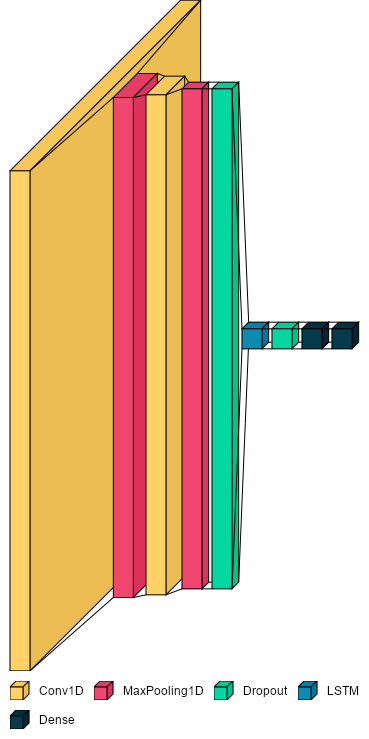

In [141]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(reconstructed_model, legend=True, font=font)

In [142]:
reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 12ms/step - loss: 1.8662 - f1_score: 0.7381


[1.8662282228469849, 0.7380902171134949]

In [143]:
reconstructed_model.evaluate(Xtrain, Ytrain)

2023-09-23 17:48:32.684997: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 555216480 exceeds 10% of free system memory.


84/84 [==============================] - 1s 10ms/step - loss: 0.0281 - f1_score: 1.0000


[0.028070375323295593, 1.0]

In [144]:
print(
    classification_report(np.argmax(Yval, axis=1),
                          np.argmax(reconstructed_model.predict(Xval), axis=1),
                          digits=3,
                          target_names=label_map))

11/11 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

         AXE      1.000     1.000     1.000         8
    BACKPACK      0.750     1.000     0.857         6
  BASKETBALL      0.909     1.000     0.952        10
         BEE      0.625     0.500     0.556        10
        BELT      1.000     1.000     1.000         4
        BITE      0.857     0.750     0.800         8
   BREAKFAST      0.750     0.500     0.600         6
      CANCER      1.000     0.875     0.933         8
   CHRISTMAS      1.000     0.833     0.909         6
    CONFUSED      0.667     1.000     0.800         6
        DARK      1.000     1.000     1.000         4
        DEAF      0.571     0.667     0.615         6
      DECIDE      1.000     0.667     0.800         6
      DEMAND      0.800     0.500     0.615         8
     DEVELOP      0.750     0.500     0.600         6
      DINNER      1.000     0.875     0.933         8
         DOG      0.333     

# Test in Custom Dataset

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report


from mmpose.apis import Pose2DInferencer, init_model
import cv2

import pandas as pd
import torch

from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [146]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [147]:
def extract_keypoints_from_file_flip(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        frame = cv2.resize(frame, (640, 480))
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=False,
                                      return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)

In [125]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='cspnext-m_udp_8xb64-210e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

09/23 17:59:39 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
09/23 17:59:40 - mmengine - WARNING - The current default scope "mmpose" is not "mmdet", `init_default_scope` will force set the currentdefault scope to "mmdet".
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [126]:
words = [
    'AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE', 'BREAKFAST',
    'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF', 'DECIDE', 'DEMAND',
    'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG', 'EAT', 'EDIT', 'ELEVATOR',
    'FINE', 'FLOAT', 'FOREIGNER', 'GUESS', 'HALLOWEEN', 'HOSPITAL',
    'HURDLE/TRIP', 'JEWELRY', 'KNIGHT', 'LOCK', 'LUNCH', 'MAPLE', 'MEAT',
    'MECHANIC', 'MICROSCOPE', 'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR',
    'RIVER', 'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
    'WHATFOR'
]

In [127]:
label_map = {label: num for num, label in enumerate(words)}

In [128]:
inv_label_map = {v: k for k, v in label_map.items()}

In [141]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [142]:
signs_df = pd.read_csv('/home/kristian/cct_gdrive/DAP/Signs_DF.csv')

In [143]:
signs_df.head()

path Gloss             file  \
0  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_1.mp4   
1  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_2.mp4   
2  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_3.mp4   
3  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_4.mp4   
4  file:/home/kristian/Capstone/Sign_Videos_DF/AX...   AXE  AXE_video_5.mp4   

   Frequency  Frames  FPS  Length  Width  Height  
0          5     130   24       5    640     480  
1          5     130   24       5    640     480  
2          5     130   24       5    640     480  
3          5     130   24       5    640     480  
4          5     130   24       5    640     480

In [144]:
signs_df.tail()

path    Gloss  \
245  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
246  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
247  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
248  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
249  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   

                    file  Frequency  Frames  FPS  Length  Width  Height  
245  WHATFOR_video_4.mp4          5     130   24       5    640     480  
246  WHATFOR_video_1.mp4          5     130   24       5    640     480  
247  WHATFOR_video_2.mp4          5     130   24       5    640     480  
248  WHATFOR_video_3.mp4          5     130   24       5    640     480  
249  WHATFOR_video_5.mp4          5     130   24       5    640     480

In [145]:
signs_df.describe()

Frequency  Frames    FPS  Length  Width  Height
count      250.0   250.0  250.0   250.0  250.0   250.0
mean         5.0   130.0   24.0     5.0  640.0   480.0
std          0.0     0.0    0.0     0.0    0.0     0.0
min          5.0   130.0   24.0     5.0  640.0   480.0
25%          5.0   130.0   24.0     5.0  640.0   480.0
50%          5.0   130.0   24.0     5.0  640.0   480.0
75%          5.0   130.0   24.0     5.0  640.0   480.0
max          5.0   130.0   24.0     5.0  640.0   480.0

In [146]:
cap = cv2.VideoCapture(signs_df.path[249])
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Display the annotated frame
        cv2.imshow("Custom ASL", frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [147]:
signs_df.path[1]

'file:/home/kristian/Capstone/Sign_Videos_DF/AXE/AXE_video_2.mp4'

In [ ]:
extract_keypoints_from_file(signs_df.path[1]).shape

In [20]:
#tqdm.pandas()
#keypoints_series = signs_df['path'].progress_apply(extract_keypoints_from_file)
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints.npy", keypoints_series)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [43:13<00:00, 10.37s/it]


In [21]:
#tqdm.pandas()
#keypoints_series = signs_df['path'].progress_apply(extract_keypoints_from_file_flip)
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/RTMPose/sign_videos_keypoints_flip.npy", keypoints_series)

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [42:16<00:00, 10.15s/it]


In [63]:
sign_keypoints = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/CspNext/sign_videos_keypoints.npy",
    allow_pickle=True)
sign_keypoints_flip = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/CspNext/sign_videos_keypoints_flip.npy",
    allow_pickle=True)

print('Sign Keypoints Shape:', sign_keypoints.shape)
print('Sign_FLIP Kepoints Shape:', sign_keypoints_flip.shape)

Sign Keypoints Shape: (250,)
Sign_FLIP Kepoints Shape: (250,)


In [64]:
max_len = 130

In [65]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(sign_keypoints), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(sign_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

sign_keypoints = keypoints_np
print('Sign Keypoints Shape:', sign_keypoints.shape)

Sign Keypoints Shape: (250, 130, 399)


In [66]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(sign_keypoints_flip), max_len, 399))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(sign_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

sign_keypoints_flip = keypoints_np
print('Sign_flip Keypoints Shape:', sign_keypoints_flip.shape)

Sign_flip Keypoints Shape: (250, 130, 399)


In [153]:
signs_df['Cat_label'] = signs_df['Gloss'].map(label_map)

In [154]:
signs_df.tail(20)

path    Gloss  \
230  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
231  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
232  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
233  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
234  file:/home/kristian/Capstone/Sign_Videos_DF/SQ...  SQUEEZE   
235  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
236  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
237  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
238  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
239  file:/home/kristian/Capstone/Sign_Videos_DF/TH...     THEY   
240  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
241  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
242  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
243  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
244  file:/home/kristian/Capstone/Sign_Videos_DF/TW...    TWINS   
245  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
246  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
247  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
248  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   
249  file:/home/kristian/Capstone/Sign_Videos_DF/WH...  WHATFOR   

                    file  Frequency  Frames  FPS  Length  Width  Height  \
230  SQUEEZE_video_5.mp4          5     130   24       5    640     480   
231  SQUEEZE_video_3.mp4          5     130   24       5    640     480   
232  SQUEEZE_video_4.mp4          5     130   24       5    640     480   
233  SQUEEZE_video_1.mp4          5     130   24       5    640     480   
234  SQUEEZE_video_2.mp4          5     130   24       5    640     480   
235     THEY_video_1.mp4          5     130   24       5    640     480   
236     THEY_video_2.mp4          5     130   24       5    640     480   
237     THEY_video_3.mp4          5     130   24       5    640     480   
238     THEY_video_4.mp4          5     130   24       5    640     480   
239     THEY_video_5.mp4          5     130   24       5    640     480   
240    TWINS_video_5.mp4          5     130   24       5    640     480   
241    TWINS_video_4.mp4          5     130   24       5    640     480   
242    TWINS_video_2.mp4          5     130   24       5    640     480   
243    TWINS_video_1.mp4          5     130   24       5    640     480   
244    TWINS_video_3.mp4          5     130   24       5    640     480   
245  WHATFOR_video_4.mp4          5     130   24       5    640     480   
246  WHATFOR_video_1.mp4          5     130   24       5    640     480   
247  WHATFOR_video_2.mp4          5     130   24       5    640     480   
248  WHATFOR_video_3.mp4          5     130   24       5    640     480   
249  WHATFOR_video_5.mp4          5     130   24       5    640     480   

     Cat_label  
230         46  
231         46  
232         46  
233         46  
234         46  
235         47  
236         47  
237         47  
238         47  
239         47  
240         48  
241         48  
242         48  
243         48  
244         48  
245         49  
246         49  
247         49  
248         49  
249         49

In [155]:
sign_labels = signs_df['Cat_label'].to_numpy()

In [156]:
sign_labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37,
       37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40,
       40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44,
       44, 44, 44, 44, 45

In [157]:
#np.save("/home/kristian/Capstone/keypoints/Custom_Dataset/Mediapipe/sign_videos_labels.npy", sign_labels)

In [68]:
sign_labels = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/CspNext/sign_videos_labels.npy"
)
sign_labels_flip = np.load(
    "/home/kristian/Capstone/keypoints/Custom_Dataset/CspNext/sign_videos_labels.npy"
)

In [69]:
from pickle import load

scaler = load(open('scaler.pkl', 'rb'))

num_samples, num_frames, num_keypoints = sign_keypoints.shape
sign_keypoints = sign_keypoints.reshape(num_samples, -1)

# Transform the data
sign_keypoints = scaler.transform(sign_keypoints)

# Reshape the scaled data back to the original shape
sign_keypoints = sign_keypoints.reshape(num_samples, num_frames, num_keypoints)

In [70]:
from pickle import load

scaler = load(open('scaler.pkl', 'rb'))

num_samples, num_frames, num_keypoints = sign_keypoints_flip.shape
sign_keypoints_flip = sign_keypoints_flip.reshape(num_samples, -1)

# Transform the data
sign_keypoints_flip = scaler.transform(sign_keypoints_flip)

# Reshape the scaled data back to the original shape
sign_keypoints_flip = sign_keypoints_flip.reshape(num_samples, num_frames,
                                                  num_keypoints)

In [85]:
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")

In [83]:
reconstructed_model.evaluate(sign_keypoints, to_categorical(sign_labels, 50))

8/8 [==============================] - 0s 9ms/step - loss: 2.2993 - f1_score: 0.4926


[2.2993221282958984, 0.49258917570114136]

In [84]:
print(
    classification_report(sign_labels,
                          np.argmax(
                              reconstructed_model.predict(sign_keypoints),
                              axis=1),
                          digits=3,
                          target_names=label_map))

8/8 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         AXE      0.800     0.800     0.800         5
    BACKPACK      0.083     0.200     0.118         5
  BASKETBALL      0.667     0.400     0.500         5
         BEE      0.625     1.000     0.769         5
        BELT      1.000     0.800     0.889         5
        BITE      0.000     0.000     0.000         5
   BREAKFAST      0.000     0.000     0.000         5
      CANCER      0.000     0.000     0.000         5
   CHRISTMAS      0.714     1.000     0.833         5
    CONFUSED      0.500     0.400     0.444         5
        DARK      0.833     1.000     0.909         5
        DEAF      1.000     1.000     1.000         5
      DECIDE      0.714     1.000     0.833         5
      DEMAND      0.000     0.000     0.000         5
     DEVELOP      0.000     0.000     0.000         5
      DINNER      0.833     1.000     0.909         5
         DOG      0.833     1.

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Realtime Implementation

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD, Nadam
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn.metrics import classification_report


from mmpose.apis import Pose2DInferencer, init_model
import cv2
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [130]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

In [131]:
from pickle import load
import time

scaler = load(open('scaler.pkl', 'rb'))
reconstructed_model = tf.keras.models.load_model("2 1DCNN + 1 GRU")
#reconstructed_model = tf.keras.models.load_model("2 1D-CNN + 1 GRU Trial 698")

2023-09-23 18:00:10.237450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 18:00:10.239074: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1557 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [132]:
inferencer = Pose2DInferencer(
    device='cuda',
    model='cspnext-m_udp_8xb64-210e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/cspnext-m_udp-coco-wholebody_pt-in1k_210e-256x192-320fa258_20230123.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth


In [133]:
words = [
    'AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE', 'BREAKFAST',
    'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF', 'DECIDE', 'DEMAND',
    'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG', 'EAT', 'EDIT', 'ELEVATOR',
    'FINE', 'FLOAT', 'FOREIGNER', 'GUESS', 'HALLOWEEN', 'HOSPITAL',
    'HURDLE/TRIP', 'JEWELRY', 'KNIGHT', 'LOCK', 'LUNCH', 'MAPLE', 'MEAT',
    'MECHANIC', 'MICROSCOPE', 'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR',
    'RIVER', 'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
    'WHATFOR'
]

In [134]:
label_map = {label: num for num, label in enumerate(words)}

In [135]:
inv_label_map = {v: k for k, v in label_map.items()}

In [149]:
tf.random.set_seed(5)
tf.keras.utils.set_random_seed(5)

In [150]:
signs_df = pd.read_csv('/home/kristian/cct_gdrive/DAP/Signs_DF.csv')

signs_df = signs_df.sample(frac=1).reset_index(drop=True)

num_clips_to_concatenate = 10

video_clips = []

# Loop through the shuffled DataFrame and add video clips
for index, row in signs_df.iterrows():
    if len(video_clips) >= num_clips_to_concatenate:
        break

    path = row['path']  # Get the video path from the DataFrame
    gloss_label = row['Gloss']  # Get the gloss label from the DataFrame
    cap = cv2.VideoCapture(path)

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Add gloss label
        text_position = (10, frame.shape[0] - 50)
        cv2.putText(frame, f'Gloss: {gloss_label}', text_position,
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        frames.append(frame)

    cap.release()

    if len(frames) > 0:
        video_clips.append(frames)

# Concatenate the video clips
if len(video_clips) > 0:
    concatenated_clip = cv2.VideoWriter(
        'concatenated_video5.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 24,
        (frames[0].shape[1], frames[0].shape[0]))
    for clip_frames in video_clips:
        for frame in clip_frames:
            concatenated_clip.write(frame)
    concatenated_clip.release()

    # Play the concatenated video
    cap_concatenated = cv2.VideoCapture('concatenated_video5.mp4')
    while True:
        ret, frame = cap_concatenated.read()
        if not ret:
            break
        cv2.imshow("Concatenated Video", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
    cap_concatenated.release()
    cv2.destroyAllWindows()
else:
    print("No video clips to concatenate.")

In [151]:
#path = valdf.Path[40]
#print(path)
#path = '/home/kristian/ASL_Citizen/videos/7246944741037324-CONFUSED.mp4'

#path = 0
#path = '/home/kristian/Capstone/Sign_Videos_DF/BASKETBALL/BASKETBALL_video_1.mp4'
path = 'concatenated_video5.mp4'
cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
#print(frames_from_file(path))
print(path)
sequence = [np.zeros(399)] * 130
inference_times = []
predictions = ['None']
threshold = 0.8
i = 0
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = 0
total_inference_time = 0
writer= cv2.VideoWriter('test5.avi', cv2.VideoWriter_fourcc(*'XVID'), 24, (width,height))

cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        fps = cap.get(cv2.CAP_PROP_FPS)
        start_time = time.time()

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result_generator = inferencer(frame,
                                      show=False,
                                      return_vis=True,
                                      return_datasample=False)
        result = next(result_generator)

        # Extract the keypoints from the results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133,
                                                                        2):
            keypoint = np.array(
                result['predictions'][0][0]['keypoints']).flatten()
            keypoint = np.append(
                np.array(result['predictions'][0][0]['keypoint_scores']),
                keypoint)
        else:
            keypoint = np.zeros(399)

        # Initialize an empty list to store the keypoints for each frame
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence = scaler.inverse_transform(sequence).reshape(130, 399)
        sequence = sequence.tolist()
        sequence.append(keypoint)
        sequence.pop(0)  # Remove the oldest element
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence = scaler.transform(sequence).reshape(130, 399)
        sequence = sequence.tolist()

        i = i + 1
        if i == fps / 2:
            i = 0
            res = reconstructed_model.predict(np.expand_dims(sequence,
                                                             axis=0))[0]
            if res[np.argmax(res)] > threshold:
                print(inv_label_map[np.argmax(res)])
                predictions.append(inv_label_map[np.argmax(res)])

        # Calculate inference time for this frame
        end_time = time.time()
        inference_time = end_time - start_time
        inference_times.append(inference_time)

        image_array = cv2.cvtColor(result['visualization'][0],
                                   cv2.COLOR_RGB2BGR)

        #Write prediction and time
        image_array = cv2.putText(image_array,
                                  f'Inference Time: {inference_time:.2f} sec',
                                  (10, image_array.shape[0] - 10),
                                  cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0),
                                  2)

        image_array = cv2.putText(image_array,
                                  'Last Prediction:' + predictions[-1],
                                  (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                                  (0, 255, 0), 2)

        writer.write(image_array)
        cv2.imshow("CSPNext Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

# Calculate average inference time
average_inference_time = np.mean(inference_times)
print(f'Average Inference Time: {average_inference_time:.2f} seconds')

Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   

Average Inference Time: 0.13 seconds


In [ ]:
cap.release()
cv2.destroyAllWindows()

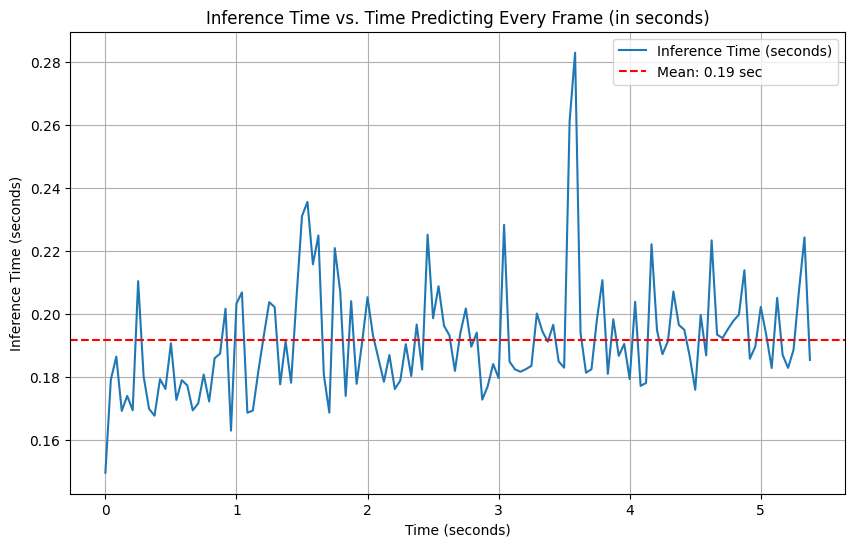

In [66]:
import matplotlib.pyplot as plt
import numpy as np

time_intervals = [i / fps for i in range(len(inference_times))]

mean_inference_time = np.mean(inference_times)

plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inference_times, label='Inference Time (seconds)')
plt.axhline(mean_inference_time,
            color='red',
            linestyle='--',
            label=f'Mean: {mean_inference_time:.2f} sec')

plt.xlabel('Time (seconds)')
plt.ylabel('Inference Time (seconds)')
plt.legend()

plt.title('Inference Time vs. Time Predicting Every Frame (in seconds)')
plt.grid()
plt.show()

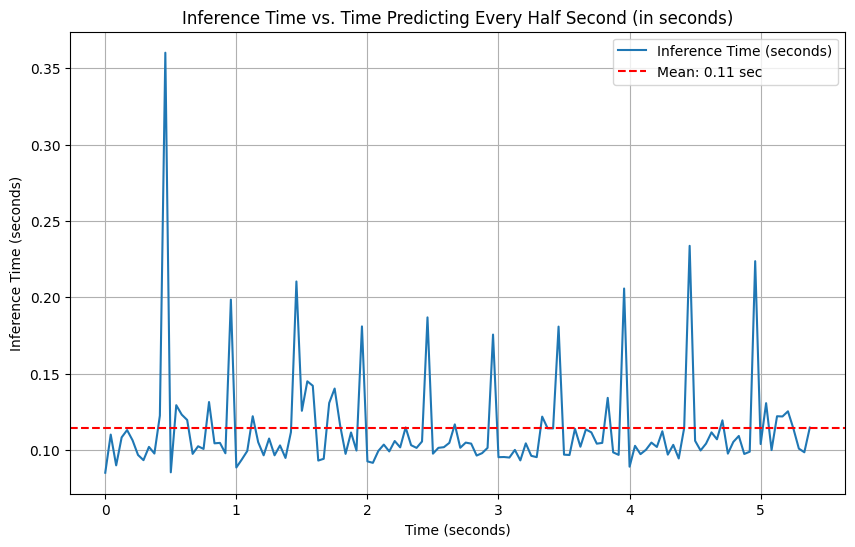

In [64]:
import matplotlib.pyplot as plt
import numpy as np

time_intervals = [i / fps for i in range(len(inference_times))]

mean_inference_time = np.mean(inference_times)

plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inference_times, label='Inference Time (seconds)')
plt.axhline(mean_inference_time,
            color='red',
            linestyle='--',
            label=f'Mean: {mean_inference_time:.2f} sec')

plt.xlabel('Time (seconds)')
plt.ylabel('Inference Time (seconds)')
plt.legend()

plt.title('Inference Time vs. Time Predicting Every Half Second (in seconds)')
plt.grid()
plt.show()